In [1]:

import numpy as np
import pandas as pd 



#all required libraries imported 

Import required libraries (not allowed: scikit-learn or any other libraries with inbuilt functions that help to implement ML methods).


In [2]:
data=pd.read_csv("C:/Users/viraj/Code_a/ML_Prof_Alina/Assignment_1/datasets (1)/datasets/penguins.csv")#reading the File
#pd.set_option('display.max_rows', None)

Read, preprocess, and print the main statistics about the dataset (you can reuse
your code from Assignment 0 with a proper citation)


In [3]:
data.head()  #showcasing the first 5  rows of the dataset

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

In [4]:
data.isnull().sum() #checking th enull values

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [5]:
data=data.dropna()  #deleting the rows having NAN values

In [6]:
data.info() #showcasing the Datatype of elements of the columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [7]:
data.describe()  #The main statistics of the dataSet

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      333.000000     333.000000         333.000000   333.000000   
mean        43.992793      17.164865         200.966967  4207.057057   
std          5.468668       1.969235          14.015765   805.215802   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.500000      15.600000         190.000000  3550.000000   
50%         44.500000      17.300000         197.000000  4050.000000   
75%         48.600000      18.700000         213.000000  4775.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   333.000000  
mean   2008.042042  
std       0.812944  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000

In [8]:
d1=data.species.describe()   
d2=data.island.describe() 
d3=data.sex.describe() 
print(d1,d2,d3)

count        333
unique         3
top       Adelie
freq         146
Name: species, dtype: object count        333
unique         3
top       Biscoe
freq         163
Name: island, dtype: object count      333
unique       2
top       male
freq       168
Name: sex, dtype: object


In [9]:
for col in data.columns:
    print(col)  #printing the column names

species
island
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
sex
year


## Convert features with string datatype to categorical (species, island, sex).

Example: suppose you have a dataset that contains information about movies,
with the following features: title (string), director (string), genre (string). You need
to convert these features of string datatype to categorical features. This can be
done by assigning a unique numerical value to each unique string value in each
categorical feature.

In [10]:
#Here Species,islands and sex has datatype as sting 

data[['species','island','sex']] = data[['species','island','sex']].astype('category')

In [11]:
data['sex'] = pd.factorize(data['sex'])[0]
data['island'] = pd.factorize(data['island'])[0]
data['species'] = pd.factorize(data['species'])[0]

#converting Categorical value into numerical value

In [12]:
data.info() #here we could see the datatype has been changed of the following 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int64  
 1   island             333 non-null    int64  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int64  
 7   year               333 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 23.4 KB


In [13]:
print(data.dtypes)

species                int64
island                 int64
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int64
year                   int64
dtype: object


In [14]:
data.shape

(333, 8)

## 4. Normalize non-categorical features (bill_length_mm, bill_depth_mm,flipper_length_mm, body_mass_g).

a. Find the min and max values for each column.

b. Rescale dataset columns to the range from 0 to 1



Why do we do this? Normalization is to transform features to be on a similar
scale. This improves the performance and training stability of the model.

###### Note: normalize() is not allowed as it is a part of scikit-learn library.

In [15]:
data.head()

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0        0       0            39.1           18.7              181.0   
1        0       0            39.5           17.4              186.0   
2        0       0            40.3           18.0              195.0   
4        0       0            36.7           19.3              193.0   
5        0       0            39.3           20.6              190.0   

   body_mass_g  sex  year  
0       3750.0    0  2007  
1       3800.0    1  2007  
2       3250.0    1  2007  
4       3450.0    1  2007  
5       3650.0    0  2007

In [16]:
#a. Find the min and max values for each column.

bill_length_mm_min , bill_length_mm_max = min(data['bill_length_mm']),max(data['bill_length_mm'])

bill_depth_mm_min ,  bill_depth_mm_max = min(data['bill_depth_mm']) ,max(data['bill_depth_mm'])

flipper_length__mm_min ,flipper_length_mm_max = min(data['flipper_length_mm']) , max(data['flipper_length_mm'])
 
body_mass_g_min , body_mass_g_max = min(data['body_mass_g']) , max(data['body_mass_g'])
 


In [17]:
data1=data

In [18]:
#b. Rescale dataset columns to the range from 0 to 1

data1['bill_length_mm'] = (data1['bill_length_mm'] - bill_length_mm_min) / (bill_length_mm_max - bill_length_mm_min)
data1['bill_depth_mm']  = (data1['bill_depth_mm']  - bill_depth_mm_min)  / (bill_depth_mm_max  - bill_depth_mm_min)
data1['flipper_length_mm'] = (data1['flipper_length_mm'] - flipper_length__mm_min)/(flipper_length_mm_max - flipper_length__mm_min)
data1['body_mass_g'] = (data1['body_mass_g'] - body_mass_g_min)/(body_mass_g_max - body_mass_g_min)


In [19]:
data1

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0          0       0        0.254545       0.666667           0.152542   
1          0       0        0.269091       0.511905           0.237288   
2          0       0        0.298182       0.583333           0.389831   
4          0       0        0.167273       0.738095           0.355932   
5          0       0        0.261818       0.892857           0.305085   
..       ...     ...             ...            ...                ...   
339        2       2        0.861818       0.797619           0.593220   
340        2       2        0.414545       0.595238           0.508475   
341        2       2        0.636364       0.607143           0.355932   
342        2       2        0.680000       0.702381           0.644068   
343        2       2        0.658182       0.666667           0.440678   

     body_mass_g  sex  year  
0       0.291667    0  2007  
1       0.305556    1  2007  
2       0.152778    1  2007  
4       0.208333    1  2007  
5       0.263889    0  2007  
..           ...  ...   ...  
339     0.361111    0  2009  
340     0.194444    1  2009  
341     0.298611    0  2009  
342     0.388889    0  2009  
343     0.298611    1  2009  

[333 rows x 8 columns]

## 5. Choose your target Y. For this dataset, there are several options:
a. We can use a binary classifier to predict which gender a penguin belongs to (female or male). In this case, column sex can be used as Y (target)


b. We can use a binary classifier to predict if a penguin’s location is Torgersen island or not. In this case, column island can be used as Y (target) 



In [20]:
#**Step 5 - Choosing target**

#Here we have chosen species as the target, rest all are the inputs.

## Create the data matrices for X (input) and Y (target) in a shape,X = 𝑁 x 𝑑 and Y = 𝑁 x 1, were 𝑁 is a number of data samples and 𝑑 has a number of features. 


In [21]:
data1

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0          0       0        0.254545       0.666667           0.152542   
1          0       0        0.269091       0.511905           0.237288   
2          0       0        0.298182       0.583333           0.389831   
4          0       0        0.167273       0.738095           0.355932   
5          0       0        0.261818       0.892857           0.305085   
..       ...     ...             ...            ...                ...   
339        2       2        0.861818       0.797619           0.593220   
340        2       2        0.414545       0.595238           0.508475   
341        2       2        0.636364       0.607143           0.355932   
342        2       2        0.680000       0.702381           0.644068   
343        2       2        0.658182       0.666667           0.440678   

     body_mass_g  sex  year  
0       0.291667    0  2007  
1       0.305556    1  2007  
2       0.152778    1  2007  
4       0.208333    1  2007  
5       0.263889    0  2007  
..           ...  ...   ...  
339     0.361111    0  2009  
340     0.194444    1  2009  
341     0.298611    0  2009  
342     0.388889    0  2009  
343     0.298611    1  2009  

[333 rows x 8 columns]

In [22]:
data

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0          0       0        0.254545       0.666667           0.152542   
1          0       0        0.269091       0.511905           0.237288   
2          0       0        0.298182       0.583333           0.389831   
4          0       0        0.167273       0.738095           0.355932   
5          0       0        0.261818       0.892857           0.305085   
..       ...     ...             ...            ...                ...   
339        2       2        0.861818       0.797619           0.593220   
340        2       2        0.414545       0.595238           0.508475   
341        2       2        0.636364       0.607143           0.355932   
342        2       2        0.680000       0.702381           0.644068   
343        2       2        0.658182       0.666667           0.440678   

     body_mass_g  sex  year  
0       0.291667    0  2007  
1       0.305556    1  2007  
2       0.152778    1  2007  
4       0.208333    1  2007  
5       0.263889    0  2007  
..           ...  ...   ...  
339     0.361111    0  2009  
340     0.194444    1  2009  
341     0.298611    0  2009  
342     0.388889    0  2009  
343     0.298611    1  2009  

[333 rows x 8 columns]

In [23]:
data1['sex'] = pd.factorize(data1['sex'])[0]
data1['island'] = pd.factorize(data1['island'])[0]
data1['species'] = pd.factorize(data1['species'])[0]

In [24]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int64  
 1   island             333 non-null    int64  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int64  
 7   year               333 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 23.4 KB


In [25]:
import random
data1 = data1.sample(frac = 1)

In [26]:
data2_except_sex_X=data1[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
data2_except_sex_X.shape

(333, 4)

In [27]:
data3_sex_column_Y=data1['sex']
print(data3_sex_column_Y.shape)
data3_sex_column_Y=data3_sex_column_Y.astype(int)
#print(data3_sex_column_Y.dtype)

(333,)


## Divide the dataset into training and test, as 80% training, 20% testing dataset.


In [28]:
import random
random.seed(46)

train_size = int(len(data2_except_sex_X) * 0.8)

X_train = data2_except_sex_X[0:train_size]
Y_train = data3_sex_column_Y[0:train_size]

X_test = data2_except_sex_X[train_size : ]
Y_test = data3_sex_column_Y[train_size : ]

#test = df[train_size:]

## Print the shape of your X_train, y_train, X_test, y_test


In [29]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(266, 4)
(266,)
(67, 4)
(67,)


## The Recommended structure of the code for defining logistic regression:


In [30]:
import math
class LogitRegression():
    
    def __init__(self, learning_rate = 0.001, iterations = 10000):
        # Takes as an input hyperparameters: learning rate and the number of iterations.
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.losses = []
    
    def sigmoid(self, x):
        # Defining the sigmoid function.
        x = np.float64(x)
        sigma = 1/(1 + np.exp(-x))
        return sigma
    
    def cost(self, y, y_pred):
        # Defining the loss function.
        N = len(y)
       # cost = -(1/N) * [y*math.log(y_pred) + (1-y)*math.log(1-y_pred)]
        cost = -(1/N) * (y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
        return cost
        
    def gradient(self, n, X, y, y_pred):
        # Defining gradient function.
        dw = (1 / n) * np.dot(X.T, (y_pred - y))
        db = (1 / n) * np.sum(y_pred - y)
        return dw, db
    
    def fit(self, X, y):
        n, no_feature  = X.shape
        self.weights = np.random.uniform(0, 1, 4)
        self.bias = 0
        for i in range(self.iterations):
            y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
            dw, db = self.gradient(n, X, y, y_pred)
            loss = self.cost(y, y_pred)
            print(f"Iteration {i}: loss = {np.mean(loss)}")
            self.losses.append(loss)
            # update weights and bias
            self.weights -= self.learning_rate*dw
            self.bias -= self.learning_rate*db
    
    def predict(self, X):
        y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_sex = [1 if i >= 0.5 else 0 for i in y_pred]
        return y_sex

## Train the model:
a. Define a model by calling LogitRegression class and passing
hyperparameters, e.g.
model = LogitRegression(learning_rate, iterations)
b. Train the model, by calling fit function and passing your training dataset,
e.g
model.fit(X_train, y_train)
c. Suggested hyperparameters:
Note: You can try different learning rates and number of iterations to
improve your accuracy (accuracy of greater than 64% is expected)
learning_rate=1e-3
iterations=100000
weights = np.random.uniform(0, 1)


In [31]:
import warnings
warnings.filterwarnings('ignore')

model = LogitRegression(0.001, 100000)
model.fit(X_train, Y_train)

Iteration 0: loss = 0.003193301975105265
Iteration 1: loss = 0.003192847538133251
Iteration 2: loss = 0.003192393449863612
Iteration 3: loss = 0.0031919397100851105
Iteration 4: loss = 0.003191486318586528
Iteration 5: loss = 0.0031910332751566685
Iteration 6: loss = 0.0031905805795843525
Iteration 7: loss = 0.003190128231658426
Iteration 8: loss = 0.003189676231167754
Iteration 9: loss = 0.003189224577901221
Iteration 10: loss = 0.0031887732716477358
Iteration 11: loss = 0.0031883223121962276
Iteration 12: loss = 0.0031878716993356477
Iteration 13: loss = 0.0031874214328549678
Iteration 14: loss = 0.003186971512543184
Iteration 15: loss = 0.003186521938189314
Iteration 16: loss = 0.0031860727095823966
Iteration 17: loss = 0.0031856238265114954
Iteration 18: loss = 0.003185175288765696
Iteration 19: loss = 0.0031847270961341064
Iteration 20: loss = 0.0031842792484058587
Iteration 21: loss = 0.0031838317453701088
Iteration 22: loss = 0.0031833845868160355
Iteration 23: loss = 0.00318293

Iteration 194: loss = 0.0031114177175299183
Iteration 195: loss = 0.003111027008727003
Iteration 196: loss = 0.0031106366082364074
Iteration 197: loss = 0.0031102465158540336
Iteration 198: loss = 0.0031098567313758364
Iteration 199: loss = 0.0031094672545978245
Iteration 200: loss = 0.0031090780853160554
Iteration 201: loss = 0.0031086892233266406
Iteration 202: loss = 0.0031083006684257445
Iteration 203: loss = 0.0031079124204095826
Iteration 204: loss = 0.0031075244790744246
Iteration 205: loss = 0.0031071368442165907
Iteration 206: loss = 0.003106749515632457
Iteration 207: loss = 0.00310636249311845
Iteration 208: loss = 0.00310597577647105
Iteration 209: loss = 0.003105589365486792
Iteration 210: loss = 0.0031052032599622626
Iteration 211: loss = 0.003104817459694103
Iteration 212: loss = 0.0031044319644790083
Iteration 213: loss = 0.003104046774113726
Iteration 214: loss = 0.0031036618883950587
Iteration 215: loss = 0.003103277307119864
Iteration 216: loss = 0.003102893030085052

Iteration 381: loss = 0.0030435009361353474
Iteration 382: loss = 0.0030431643941053015
Iteration 383: loss = 0.003042828123255788
Iteration 384: loss = 0.0030424921233944894
Iteration 385: loss = 0.0030421563943291608
Iteration 386: loss = 0.0030418209358676293
Iteration 387: loss = 0.0030414857478177973
Iteration 388: loss = 0.003041150829987637
Iteration 389: loss = 0.0030408161821851966
Iteration 390: loss = 0.003040481804218597
Iteration 391: loss = 0.00304014769589603
Iteration 392: loss = 0.0030398138570257643
Iteration 393: loss = 0.0030394802874161397
Iteration 394: loss = 0.00303914698687557
Iteration 395: loss = 0.0030388139552125445
Iteration 396: loss = 0.0030384811922356232
Iteration 397: loss = 0.0030381486977534423
Iteration 398: loss = 0.0030378164715747107
Iteration 399: loss = 0.0030374845135082112
Iteration 400: loss = 0.003037152823362803
Iteration 401: loss = 0.0030368214009474158
Iteration 402: loss = 0.003036490246071057
Iteration 403: loss = 0.00303615935854280

Iteration 595: loss = 0.0029773581485039212
Iteration 596: loss = 0.0029770753799288636
Iteration 597: loss = 0.0029767928431604575
Iteration 598: loss = 0.002976510538023615
Iteration 599: loss = 0.002976228464343334
Iteration 600: loss = 0.0029759466219447003
Iteration 601: loss = 0.002975665010652886
Iteration 602: loss = 0.0029753836302931483
Iteration 603: loss = 0.0029751024806908334
Iteration 604: loss = 0.0029748215616713742
Iteration 605: loss = 0.002974540873060289
Iteration 606: loss = 0.002974260414683184
Iteration 607: loss = 0.0029739801863657525
Iteration 608: loss = 0.0029737001879337754
Iteration 609: loss = 0.0029734204192131183
Iteration 610: loss = 0.0029731408800297357
Iteration 611: loss = 0.00297286157020967
Iteration 612: loss = 0.0029725824895790493
Iteration 613: loss = 0.0029723036379640895
Iteration 614: loss = 0.0029720250151910946
Iteration 615: loss = 0.002971746621086452
Iteration 616: loss = 0.002971468455476644
Iteration 617: loss = 0.00297119051818823

Iteration 792: loss = 0.002925913641167754
Iteration 793: loss = 0.0029256732691308484
Iteration 794: loss = 0.002925433096123155
Iteration 795: loss = 0.002925193121987248
Iteration 796: loss = 0.0029249533465657944
Iteration 797: loss = 0.0029247137697015527
Iteration 798: loss = 0.0029244743912373713
Iteration 799: loss = 0.002924235211016193
Iteration 800: loss = 0.00292399622888105
Iteration 801: loss = 0.0029237574446750675
Iteration 802: loss = 0.0029235188582414627
Iteration 803: loss = 0.002923280469423541
Iteration 804: loss = 0.0029230422780647048
Iteration 805: loss = 0.0029228042840084446
Iteration 806: loss = 0.002922566487098343
Iteration 807: loss = 0.0029223288871780767
Iteration 808: loss = 0.00292209148409141
Iteration 809: loss = 0.002921854277682204
Iteration 810: loss = 0.002921617267794405
Iteration 811: loss = 0.002921380454272059
Iteration 812: loss = 0.002921143836959297
Iteration 813: loss = 0.0029209074157003447
Iteration 814: loss = 0.002920671190339521
Ite

Iteration 982: loss = 0.0028836442220392202
Iteration 983: loss = 0.0028834389423142456
Iteration 984: loss = 0.0028832338333565246
Iteration 985: loss = 0.0028830288950260643
Iteration 986: loss = 0.0028828241271829642
Iteration 987: loss = 0.0028826195296874123
Iteration 988: loss = 0.002882415102399691
Iteration 989: loss = 0.002882210845180171
Iteration 990: loss = 0.002882006757889316
Iteration 991: loss = 0.0028818028403876793
Iteration 992: loss = 0.0028815990925359076
Iteration 993: loss = 0.002881395514194735
Iteration 994: loss = 0.0028811921052249905
Iteration 995: loss = 0.002880988865487592
Iteration 996: loss = 0.002880785794843548
Iteration 997: loss = 0.0028805828931539584
Iteration 998: loss = 0.0028803801602800168
Iteration 999: loss = 0.0028801775960830035
Iteration 1000: loss = 0.0028799752004242925
Iteration 1001: loss = 0.002879772973165347
Iteration 1002: loss = 0.002879570914167724
Iteration 1003: loss = 0.0028793690232930677
Iteration 1004: loss = 0.00287916730

Iteration 1188: loss = 0.002844767939210381
Iteration 1189: loss = 0.0028445950112439386
Iteration 1190: loss = 0.002844422227105451
Iteration 1191: loss = 0.0028442495866732977
Iteration 1192: loss = 0.0028440770898259466
Iteration 1193: loss = 0.002843904736441949
Iteration 1194: loss = 0.0028437325263999456
Iteration 1195: loss = 0.0028435604595786618
Iteration 1196: loss = 0.002843388535856911
Iteration 1197: loss = 0.0028432167551135923
Iteration 1198: loss = 0.0028430451172276904
Iteration 1199: loss = 0.0028428736220782787
Iteration 1200: loss = 0.0028427022695445155
Iteration 1201: loss = 0.0028425310595056445
Iteration 1202: loss = 0.0028423599918409983
Iteration 1203: loss = 0.0028421890664299936
Iteration 1204: loss = 0.0028420182831521345
Iteration 1205: loss = 0.002841847641887011
Iteration 1206: loss = 0.0028416771425143
Iteration 1207: loss = 0.002841506784913763
Iteration 1208: loss = 0.00284133656896525
Iteration 1209: loss = 0.002841166494548694
Iteration 1210: loss =

Iteration 1388: loss = 0.0028128903120988825
Iteration 1389: loss = 0.002812743841250085
Iteration 1390: loss = 0.0028125974915875684
Iteration 1391: loss = 0.002812451263006392
Iteration 1392: loss = 0.0028123051554016947
Iteration 1393: loss = 0.002812159168668695
Iteration 1394: loss = 0.0028120133027026914
Iteration 1395: loss = 0.0028118675573990614
Iteration 1396: loss = 0.0028117219326532633
Iteration 1397: loss = 0.0028115764283608347
Iteration 1398: loss = 0.002811431044417392
Iteration 1399: loss = 0.0028112857807186314
Iteration 1400: loss = 0.0028111406371603303
Iteration 1401: loss = 0.0028109956136383426
Iteration 1402: loss = 0.0028108507100486043
Iteration 1403: loss = 0.0028107059262871296
Iteration 1404: loss = 0.0028105612622500117
Iteration 1405: loss = 0.0028104167178334243
Iteration 1406: loss = 0.002810272292933619
Iteration 1407: loss = 0.002810127987446928
Iteration 1408: loss = 0.0028099838012697618
Iteration 1409: loss = 0.002809839734298611
Iteration 1410: l

Iteration 1597: loss = 0.002784760663138176
Iteration 1598: loss = 0.002784637355925313
Iteration 1599: loss = 0.0027845141496421824
Iteration 1600: loss = 0.0027843910441996632
Iteration 1601: loss = 0.0027842680395087083
Iteration 1602: loss = 0.002784145135480341
Iteration 1603: loss = 0.002784022332025656
Iteration 1604: loss = 0.0027838996290558186
Iteration 1605: loss = 0.002783777026482066
Iteration 1606: loss = 0.0027836545242157073
Iteration 1607: loss = 0.0027835321221681216
Iteration 1608: loss = 0.0027834098202507594
Iteration 1609: loss = 0.0027832876183751425
Iteration 1610: loss = 0.0027831655164528633
Iteration 1611: loss = 0.0027830435143955863
Iteration 1612: loss = 0.002782921612115045
Iteration 1613: loss = 0.002782799809523046
Iteration 1614: loss = 0.0027826781065314657
Iteration 1615: loss = 0.002782556503052251
Iteration 1616: loss = 0.0027824349989974194
Iteration 1617: loss = 0.0027823135942790607
Iteration 1618: loss = 0.002782192288809334
Iteration 1619: los

Iteration 1813: loss = 0.0027603284208741513
Iteration 1814: loss = 0.0027602249597018028
Iteration 1815: loss = 0.0027601215817978568
Iteration 1816: loss = 0.0027600182870876427
Iteration 1817: loss = 0.0027599150754965495
Iteration 1818: loss = 0.0027598119469500297
Iteration 1819: loss = 0.0027597089013735995
Iteration 1820: loss = 0.0027596059386928357
Iteration 1821: loss = 0.002759503058833377
Iteration 1822: loss = 0.002759400261720925
Iteration 1823: loss = 0.0027592975472812437
Iteration 1824: loss = 0.0027591949154401585
Iteration 1825: loss = 0.0027590923661235563
Iteration 1826: loss = 0.002758989899257387
Iteration 1827: loss = 0.0027588875147676628
Iteration 1828: loss = 0.0027587852125804556
Iteration 1829: loss = 0.0027586829926219006
Iteration 1830: loss = 0.002758580854818195
Iteration 1831: loss = 0.0027584787990955974
Iteration 1832: loss = 0.002758376825380428
Iteration 1833: loss = 0.0027582749335990694
Iteration 1834: loss = 0.0027581731236779638
Iteration 1835:

Iteration 2030: loss = 0.002739708848632131
Iteration 2031: loss = 0.002739621807644862
Iteration 2032: loss = 0.002739534835113358
Iteration 2033: loss = 0.0027394479309755053
Iteration 2034: loss = 0.0027393610951692454
Iteration 2035: loss = 0.0027392743276325737
Iteration 2036: loss = 0.0027391876283035365
Iteration 2037: loss = 0.002739100997120237
Iteration 2038: loss = 0.0027390144340208285
Iteration 2039: loss = 0.002738927938943519
Iteration 2040: loss = 0.0027388415118265695
Iteration 2041: loss = 0.002738755152608295
Iteration 2042: loss = 0.0027386688612270624
Iteration 2043: loss = 0.002738582637621294
Iteration 2044: loss = 0.002738496481729461
Iteration 2045: loss = 0.002738410393490092
Iteration 2046: loss = 0.0027383243728417656
Iteration 2047: loss = 0.002738238419723115
Iteration 2048: loss = 0.002738152534072826
Iteration 2049: loss = 0.002738066715829637
Iteration 2050: loss = 0.0027379809649323394
Iteration 2051: loss = 0.0027378952813197775
Iteration 2052: loss =

Iteration 2265: loss = 0.002721010172002597
Iteration 2266: loss = 0.0027209376197529236
Iteration 2267: loss = 0.0027208651227508688
Iteration 2268: loss = 0.0027207926809458376
Iteration 2269: loss = 0.002720720294287282
Iteration 2270: loss = 0.002720647962724698
Iteration 2271: loss = 0.002720575686207626
Iteration 2272: loss = 0.0027205034646856515
Iteration 2273: loss = 0.0027204312981084044
Iteration 2274: loss = 0.002720359186425559
Iteration 2275: loss = 0.0027202871295868335
Iteration 2276: loss = 0.002720215127541991
Iteration 2277: loss = 0.002720143180240839
Iteration 2278: loss = 0.0027200712876332307
Iteration 2279: loss = 0.0027199994496690605
Iteration 2280: loss = 0.00271992766629827
Iteration 2281: loss = 0.0027198559374708438
Iteration 2282: loss = 0.00271978426313681
Iteration 2283: loss = 0.0027197126432462427
Iteration 2284: loss = 0.00271964107774926
Iteration 2285: loss = 0.0027195695665960216
Iteration 2286: loss = 0.0027194981097367343
Iteration 2287: loss = 

Iteration 2452: loss = 0.002708351595426722
Iteration 2453: loss = 0.0027082885408197762
Iteration 2454: loss = 0.0027082255327395555
Iteration 2455: loss = 0.0027081625711432274
Iteration 2456: loss = 0.0027080996559879977
Iteration 2457: loss = 0.002708036787231111
Iteration 2458: loss = 0.0027079739648298512
Iteration 2459: loss = 0.0027079111887415384
Iteration 2460: loss = 0.002707848458923533
Iteration 2461: loss = 0.002707785775333232
Iteration 2462: loss = 0.002707723137928072
Iteration 2463: loss = 0.0027076605466655273
Iteration 2464: loss = 0.0027075980015031096
Iteration 2465: loss = 0.002707535502398369
Iteration 2466: loss = 0.0027074730493088957
Iteration 2467: loss = 0.002707410642192315
Iteration 2468: loss = 0.002707348281006292
Iteration 2469: loss = 0.002707285965708529
Iteration 2470: loss = 0.002707223696256768
Iteration 2471: loss = 0.0027071614726087855
Iteration 2472: loss = 0.002707099294722399
Iteration 2473: loss = 0.0027070371625554633
Iteration 2474: loss 

Iteration 2690: loss = 0.0026945665812411227
Iteration 2691: loss = 0.002694513473210507
Iteration 2692: loss = 0.002694460402528184
Iteration 2693: loss = 0.0026944073691596154
Iteration 2694: loss = 0.0026943543730702925
Iteration 2695: loss = 0.0026943014142257393
Iteration 2696: loss = 0.00269424849259151
Iteration 2697: loss = 0.0026941956081331917
Iteration 2698: loss = 0.0026941427608164026
Iteration 2699: loss = 0.0026940899506067892
Iteration 2700: loss = 0.002694037177470034
Iteration 2701: loss = 0.002693984441371848
Iteration 2702: loss = 0.002693931742277973
Iteration 2703: loss = 0.002693879080154184
Iteration 2704: loss = 0.0026938264549662846
Iteration 2705: loss = 0.002693773866680112
Iteration 2706: loss = 0.0026937213152615335
Iteration 2707: loss = 0.002693668800676447
Iteration 2708: loss = 0.0026936163228907825
Iteration 2709: loss = 0.0026935638818704997
Iteration 2710: loss = 0.002693511477581591
Iteration 2711: loss = 0.002693459109990078
Iteration 2712: loss =

Iteration 2925: loss = 0.002683043072183128
Iteration 2926: loss = 0.002682997855245974
Iteration 2927: loss = 0.0026829526683495404
Iteration 2928: loss = 0.0026829075114659733
Iteration 2929: loss = 0.0026828623845674476
Iteration 2930: loss = 0.0026828172876261626
Iteration 2931: loss = 0.0026827722206143423
Iteration 2932: loss = 0.0026827271835042367
Iteration 2933: loss = 0.002682682176268123
Iteration 2934: loss = 0.0026826371988783004
Iteration 2935: loss = 0.0026825922513070977
Iteration 2936: loss = 0.0026825473335268663
Iteration 2937: loss = 0.002682502445509983
Iteration 2938: loss = 0.0026824575872288516
Iteration 2939: loss = 0.002682412758655901
Iteration 2940: loss = 0.0026823679597635848
Iteration 2941: loss = 0.0026823231905243818
Iteration 2942: loss = 0.002682278450910797
Iteration 2943: loss = 0.0026822337408953607
Iteration 2944: loss = 0.0026821890604506273
Iteration 2945: loss = 0.0026821444095491767
Iteration 2946: loss = 0.002682099788163616
Iteration 2947: l

Iteration 3170: loss = 0.0026727990056398874
Iteration 3171: loss = 0.0026727603750258126
Iteration 3172: loss = 0.002672721768342361
Iteration 3173: loss = 0.002672683185567324
Iteration 3174: loss = 0.002672644626678514
Iteration 3175: loss = 0.0026726060916537637
Iteration 3176: loss = 0.002672567580470926
Iteration 3177: loss = 0.0026725290931078755
Iteration 3178: loss = 0.002672490629542506
Iteration 3179: loss = 0.002672452189752732
Iteration 3180: loss = 0.0026724137737164874
Iteration 3181: loss = 0.00267237538141173
Iteration 3182: loss = 0.0026723370128164357
Iteration 3183: loss = 0.0026722986679086004
Iteration 3184: loss = 0.0026722603466662405
Iteration 3185: loss = 0.002672222049067395
Iteration 3186: loss = 0.0026721837750901213
Iteration 3187: loss = 0.002672145524712495
Iteration 3188: loss = 0.0026721072979126186
Iteration 3189: loss = 0.0026720690946686076
Iteration 3190: loss = 0.0026720309149586025
Iteration 3191: loss = 0.002671992758760762
Iteration 3192: loss 

Iteration 3415: loss = 0.0026639989123553305
Iteration 3416: loss = 0.0026639655281776573
Iteration 3417: loss = 0.0026639321630623227
Iteration 3418: loss = 0.002663898816991645
Iteration 3419: loss = 0.00266386548994796
Iteration 3420: loss = 0.002663832181913617
Iteration 3421: loss = 0.0026637988928709853
Iteration 3422: loss = 0.0026637656228024474
Iteration 3423: loss = 0.0026637323716904053
Iteration 3424: loss = 0.0026636991395172756
Iteration 3425: loss = 0.0026636659262654905
Iteration 3426: loss = 0.002663632731917501
Iteration 3427: loss = 0.0026635995564557717
Iteration 3428: loss = 0.002663566399862787
Iteration 3429: loss = 0.002663533262121043
Iteration 3430: loss = 0.0026635001432130565
Iteration 3431: loss = 0.0026634670431213586
Iteration 3432: loss = 0.0026634339618284973
Iteration 3433: loss = 0.002663400899317036
Iteration 3434: loss = 0.0026633678555695543
Iteration 3435: loss = 0.0026633348305686497
Iteration 3436: loss = 0.0026633018242969344
Iteration 3437: lo

Iteration 3606: loss = 0.002657949064096675
Iteration 3607: loss = 0.002657919018050158
Iteration 3608: loss = 0.0026578889879713325
Iteration 3609: loss = 0.002657858973845404
Iteration 3610: loss = 0.002657828975657597
Iteration 3611: loss = 0.0026577989933931445
Iteration 3612: loss = 0.0026577690270372972
Iteration 3613: loss = 0.0026577390765753174
Iteration 3614: loss = 0.002657709141992482
Iteration 3615: loss = 0.002657679223274082
Iteration 3616: loss = 0.0026576493204054216
Iteration 3617: loss = 0.0026576194333718176
Iteration 3618: loss = 0.0026575895621586037
Iteration 3619: loss = 0.0026575597067511245
Iteration 3620: loss = 0.002657529867134739
Iteration 3621: loss = 0.0026575000432948206
Iteration 3622: loss = 0.0026574702352167557
Iteration 3623: loss = 0.0026574404428859446
Iteration 3624: loss = 0.0026574106662878008
Iteration 3625: loss = 0.0026573809054077522
Iteration 3626: loss = 0.0026573511602312407
Iteration 3627: loss = 0.002657321430743719
Iteration 3628: lo

Iteration 3852: loss = 0.0026510046382899792
Iteration 3853: loss = 0.002650978106612006
Iteration 3854: loss = 0.002650951587650004
Iteration 3855: loss = 0.0026509250813922247
Iteration 3856: loss = 0.0026508985878269313
Iteration 3857: loss = 0.002650872106942399
Iteration 3858: loss = 0.002650845638726912
Iteration 3859: loss = 0.0026508191831687675
Iteration 3860: loss = 0.0026507927402562716
Iteration 3861: loss = 0.002650766309977744
Iteration 3862: loss = 0.002650739892321513
Iteration 3863: loss = 0.0026507134872759187
Iteration 3864: loss = 0.0026506870948293125
Iteration 3865: loss = 0.0026506607149700554
Iteration 3866: loss = 0.0026506343476865217
Iteration 3867: loss = 0.0026506079929670945
Iteration 3868: loss = 0.002650581650800168
Iteration 3869: loss = 0.002650555321174149
Iteration 3870: loss = 0.0026505290040774528
Iteration 3871: loss = 0.0026505026994985068
Iteration 3872: loss = 0.002650476407425749
Iteration 3873: loss = 0.00265045012784763
Iteration 3874: loss 

Iteration 4074: loss = 0.002645406449896866
Iteration 4075: loss = 0.002645382471821996
Iteration 4076: loss = 0.002645358504107707
Iteration 4077: loss = 0.0026453345467444623
Iteration 4078: loss = 0.0026453105997227312
Iteration 4079: loss = 0.0026452866630329933
Iteration 4080: loss = 0.0026452627366657386
Iteration 4081: loss = 0.002645238820611463
Iteration 4082: loss = 0.0026452149148606745
Iteration 4083: loss = 0.0026451910194038868
Iteration 4084: loss = 0.002645167134231625
Iteration 4085: loss = 0.0026451432593344224
Iteration 4086: loss = 0.0026451193947028204
Iteration 4087: loss = 0.0026450955403273706
Iteration 4088: loss = 0.0026450716961986323
Iteration 4089: loss = 0.002645047862307174
Iteration 4090: loss = 0.0026450240386435733
Iteration 4091: loss = 0.002645000225198417
Iteration 4092: loss = 0.002644976421962299
Iteration 4093: loss = 0.002644952628925825
Iteration 4094: loss = 0.002644928846079606
Iteration 4095: loss = 0.0026449050734142655
Iteration 4096: loss

Iteration 4266: loss = 0.0026409820290058915
Iteration 4267: loss = 0.002640959875221863
Iteration 4268: loss = 0.0026409377301219155
Iteration 4269: loss = 0.002640915593698085
Iteration 4270: loss = 0.0026408934659424123
Iteration 4271: loss = 0.0026408713468469513
Iteration 4272: loss = 0.002640849236403758
Iteration 4273: loss = 0.0026408271346048976
Iteration 4274: loss = 0.0026408050414424454
Iteration 4275: loss = 0.00264078295690848
Iteration 4276: loss = 0.0026407608809950905
Iteration 4277: loss = 0.002640738813694371
Iteration 4278: loss = 0.002640716754998426
Iteration 4279: loss = 0.0026406947048993653
Iteration 4280: loss = 0.002640672663389305
Iteration 4281: loss = 0.0026406506304603723
Iteration 4282: loss = 0.002640628606104698
Iteration 4283: loss = 0.002640606590314423
Iteration 4284: loss = 0.002640584583081694
Iteration 4285: loss = 0.0026405625843986657
Iteration 4286: loss = 0.0026405405942575
Iteration 4287: loss = 0.0026405186126503663
Iteration 4288: loss = 0

Iteration 4455: loss = 0.0026369407976335876
Iteration 4456: loss = 0.0026369201515815447
Iteration 4457: loss = 0.002636899512833774
Iteration 4458: loss = 0.002636878881383608
Iteration 4459: loss = 0.002636858257224383
Iteration 4460: loss = 0.0026368376403494436
Iteration 4461: loss = 0.002636817030752141
Iteration 4462: loss = 0.0026367964284258307
Iteration 4463: loss = 0.0026367758333638767
Iteration 4464: loss = 0.0026367552455596474
Iteration 4465: loss = 0.002636734665006518
Iteration 4466: loss = 0.002636714091697872
Iteration 4467: loss = 0.0026366935256270938
Iteration 4468: loss = 0.0026366729667875806
Iteration 4469: loss = 0.0026366524151727306
Iteration 4470: loss = 0.0026366318707759513
Iteration 4471: loss = 0.0026366113335906543
Iteration 4472: loss = 0.00263659080361026
Iteration 4473: loss = 0.0026365702808281914
Iteration 4474: loss = 0.0026365497652378806
Iteration 4475: loss = 0.002636529256832766
Iteration 4476: loss = 0.002636508755606289
Iteration 4477: loss

Iteration 4693: loss = 0.002632219026690821
Iteration 4694: loss = 0.00263219994414846
Iteration 4695: loss = 0.002632180867487567
Iteration 4696: loss = 0.00263216179670281
Iteration 4697: loss = 0.002632142731788862
Iteration 4698: loss = 0.0026321236727404
Iteration 4699: loss = 0.0026321046195521077
Iteration 4700: loss = 0.0026320855722186723
Iteration 4701: loss = 0.002632066530734787
Iteration 4702: loss = 0.0026320474950951495
Iteration 4703: loss = 0.0026320284652944625
Iteration 4704: loss = 0.002632009441327433
Iteration 4705: loss = 0.0026319904231887747
Iteration 4706: loss = 0.0026319714108732056
Iteration 4707: loss = 0.002631952404375447
Iteration 4708: loss = 0.002631933403690228
Iteration 4709: loss = 0.002631914408812279
Iteration 4710: loss = 0.00263189541973634
Iteration 4711: loss = 0.0026318764364571517
Iteration 4712: loss = 0.002631857458969462
Iteration 4713: loss = 0.002631838487268023
Iteration 4714: loss = 0.0026318195213475924
Iteration 4715: loss = 0.0026

Iteration 4890: loss = 0.0026285669161263854
Iteration 4891: loss = 0.0026285488952960583
Iteration 4892: loss = 0.002628530879387762
Iteration 4893: loss = 0.0026285128683970647
Iteration 4894: loss = 0.0026284948623195394
Iteration 4895: loss = 0.0026284768611507642
Iteration 4896: loss = 0.0026284588648863186
Iteration 4897: loss = 0.0026284408735217876
Iteration 4898: loss = 0.002628422887052761
Iteration 4899: loss = 0.0026284049054748314
Iteration 4900: loss = 0.0026283869287835977
Iteration 4901: loss = 0.0026283689569746604
Iteration 4902: loss = 0.0026283509900436254
Iteration 4903: loss = 0.0026283330279861018
Iteration 4904: loss = 0.0026283150707977054
Iteration 4905: loss = 0.0026282971184740525
Iteration 4906: loss = 0.0026282791710107666
Iteration 4907: loss = 0.002628261228403473
Iteration 4908: loss = 0.002628243290647803
Iteration 4909: loss = 0.00262822535773939
Iteration 4910: loss = 0.0026282074296738738
Iteration 4911: loss = 0.002628189506446897
Iteration 4912: l

Iteration 5124: loss = 0.0026244753639391473
Iteration 5125: loss = 0.002624458382366022
Iteration 5126: loss = 0.002624441404783489
Iteration 5127: loss = 0.00262442443118799
Iteration 5128: loss = 0.0026244074615759715
Iteration 5129: loss = 0.0026243904959438813
Iteration 5130: loss = 0.0026243735342881725
Iteration 5131: loss = 0.002624356576605299
Iteration 5132: loss = 0.002624339622891722
Iteration 5133: loss = 0.0026243226731439023
Iteration 5134: loss = 0.002624305727358305
Iteration 5135: loss = 0.0026242887855313993
Iteration 5136: loss = 0.0026242718476596582
Iteration 5137: loss = 0.0026242549137395553
Iteration 5138: loss = 0.002624237983767571
Iteration 5139: loss = 0.0026242210577401867
Iteration 5140: loss = 0.0026242041356538868
Iteration 5141: loss = 0.0026241872175051615
Iteration 5142: loss = 0.0026241703032905015
Iteration 5143: loss = 0.0026241533930064028
Iteration 5144: loss = 0.002624136486649363
Iteration 5145: loss = 0.0026241195842158843
Iteration 5146: los

Iteration 5346: loss = 0.0026207972631322137
Iteration 5347: loss = 0.002620781085897552
Iteration 5348: loss = 0.0026207649119401057
Iteration 5349: loss = 0.0026207487412569868
Iteration 5350: loss = 0.0026207325738453065
Iteration 5351: loss = 0.0026207164097021823
Iteration 5352: loss = 0.002620700248824733
Iteration 5353: loss = 0.00262068409121008
Iteration 5354: loss = 0.002620667936855348
Iteration 5355: loss = 0.0026206517857576632
Iteration 5356: loss = 0.002620635637914155
Iteration 5357: loss = 0.002620619493321957
Iteration 5358: loss = 0.0026206033519782027
Iteration 5359: loss = 0.00262058721388003
Iteration 5360: loss = 0.0026205710790245806
Iteration 5361: loss = 0.002620554947408996
Iteration 5362: loss = 0.002620538819030422
Iteration 5363: loss = 0.0026205226938860082
Iteration 5364: loss = 0.0026205065719729047
Iteration 5365: loss = 0.0026204904532882655
Iteration 5366: loss = 0.002620474337829246
Iteration 5367: loss = 0.002620458225593007
Iteration 5368: loss = 

Iteration 5584: loss = 0.0026170334360696578
Iteration 5585: loss = 0.0026170179630118228
Iteration 5586: loss = 0.0026170024926145227
Iteration 5587: loss = 0.0026169870248754436
Iteration 5588: loss = 0.0026169715597922764
Iteration 5589: loss = 0.002616956097362714
Iteration 5590: loss = 0.00261694063758445
Iteration 5591: loss = 0.002616925180455182
Iteration 5592: loss = 0.002616909725972607
Iteration 5593: loss = 0.002616894274134427
Iteration 5594: loss = 0.0026168788249383455
Iteration 5595: loss = 0.002616863378382067
Iteration 5596: loss = 0.002616847934463299
Iteration 5597: loss = 0.0026168324931797513
Iteration 5598: loss = 0.002616817054529135
Iteration 5599: loss = 0.0026168016185091642
Iteration 5600: loss = 0.002616786185117555
Iteration 5601: loss = 0.002616770754352025
Iteration 5602: loss = 0.0026167553262102946
Iteration 5603: loss = 0.002616739900690086
Iteration 5604: loss = 0.0026167244777891246
Iteration 5605: loss = 0.002616709057505135
Iteration 5606: loss = 

Iteration 5802: loss = 0.0026137194918751314
Iteration 5803: loss = 0.002613704547630978
Iteration 5804: loss = 0.00261368960559119
Iteration 5805: loss = 0.0026136746657538807
Iteration 5806: loss = 0.0026136597281171668
Iteration 5807: loss = 0.0026136447926791667
Iteration 5808: loss = 0.002613629859437999
Iteration 5809: loss = 0.0026136149283917873
Iteration 5810: loss = 0.002613599999538652
Iteration 5811: loss = 0.0026135850728767184
Iteration 5812: loss = 0.0026135701484041153
Iteration 5813: loss = 0.00261355522611897
Iteration 5814: loss = 0.002613540306019412
Iteration 5815: loss = 0.0026135253881035742
Iteration 5816: loss = 0.00261351047236959
Iteration 5817: loss = 0.0026134955588155945
Iteration 5818: loss = 0.002613480647439725
Iteration 5819: loss = 0.0026134657382401202
Iteration 5820: loss = 0.002613450831214921
Iteration 5821: loss = 0.00261343592636227
Iteration 5822: loss = 0.002613421023680312
Iteration 5823: loss = 0.0026134061231671904
Iteration 5824: loss = 0.

Iteration 6023: loss = 0.0026104672194034863
Iteration 6024: loss = 0.0026104527194567976
Iteration 6025: loss = 0.0026104382213377798
Iteration 6026: loss = 0.0026104237250448984
Iteration 6027: loss = 0.0026104092305766213
Iteration 6028: loss = 0.002610394737931418
Iteration 6029: loss = 0.002610380247107758
Iteration 6030: loss = 0.0026103657581041132
Iteration 6031: loss = 0.0026103512709189577
Iteration 6032: loss = 0.0026103367855507646
Iteration 6033: loss = 0.0026103223019980104
Iteration 6034: loss = 0.002610307820259173
Iteration 6035: loss = 0.0026102933403327313
Iteration 6036: loss = 0.0026102788622171655
Iteration 6037: loss = 0.0026102643859109566
Iteration 6038: loss = 0.002610249911412589
Iteration 6039: loss = 0.0026102354387205454
Iteration 6040: loss = 0.0026102209678333134
Iteration 6041: loss = 0.0026102064987493794
Iteration 6042: loss = 0.0026101920314672332
Iteration 6043: loss = 0.0026101775659853636
Iteration 6044: loss = 0.0026101631023022634
Iteration 6045

Iteration 6263: loss = 0.002607036344242941
Iteration 6264: loss = 0.0026070222420252584
Iteration 6265: loss = 0.0026070081413052367
Iteration 6266: loss = 0.0026069940420816494
Iteration 6267: loss = 0.00260697994435327
Iteration 6268: loss = 0.0026069658481188765
Iteration 6269: loss = 0.0026069517533772453
Iteration 6270: loss = 0.002606937660127154
Iteration 6271: loss = 0.002606923568367382
Iteration 6272: loss = 0.00260690947809671
Iteration 6273: loss = 0.0026068953893139193
Iteration 6274: loss = 0.0026068813020177933
Iteration 6275: loss = 0.002606867216207115
Iteration 6276: loss = 0.0026068531318806697
Iteration 6277: loss = 0.0026068390490372444
Iteration 6278: loss = 0.0026068249676756247
Iteration 6279: loss = 0.0026068108877946006
Iteration 6280: loss = 0.0026067968093929595
Iteration 6281: loss = 0.0026067827324694945
Iteration 6282: loss = 0.0026067686570229957
Iteration 6283: loss = 0.0026067545830522564
Iteration 6284: loss = 0.002606740510556071
Iteration 6285: los

Iteration 6447: loss = 0.002604465549237492
Iteration 6448: loss = 0.0026044517030604135
Iteration 6449: loss = 0.002604437858173518
Iteration 6450: loss = 0.0026044240145757713
Iteration 6451: loss = 0.0026044101722661403
Iteration 6452: loss = 0.002604396331243595
Iteration 6453: loss = 0.0026043824915071043
Iteration 6454: loss = 0.0026043686530556388
Iteration 6455: loss = 0.0026043548158881697
Iteration 6456: loss = 0.00260434098000367
Iteration 6457: loss = 0.002604327145401112
Iteration 6458: loss = 0.0026043133120794712
Iteration 6459: loss = 0.0026042994800377236
Iteration 6460: loss = 0.0026042856492748427
Iteration 6461: loss = 0.0026042718197898077
Iteration 6462: loss = 0.002604257991581597
Iteration 6463: loss = 0.0026042441646491883
Iteration 6464: loss = 0.0026042303389915626
Iteration 6465: loss = 0.0026042165146077005
Iteration 6466: loss = 0.0026042026914965847
Iteration 6467: loss = 0.0026041888696571973
Iteration 6468: loss = 0.0026041750490885225
Iteration 6469: l

Iteration 6636: loss = 0.002601870446642067
Iteration 6637: loss = 0.002601856826970661
Iteration 6638: loss = 0.002601843208410253
Iteration 6639: loss = 0.002601829590959977
Iteration 6640: loss = 0.0026018159746189684
Iteration 6641: loss = 0.0026018023593863604
Iteration 6642: loss = 0.0026017887452612887
Iteration 6643: loss = 0.0026017751322428904
Iteration 6644: loss = 0.002601761520330302
Iteration 6645: loss = 0.0026017479095226622
Iteration 6646: loss = 0.0026017342998191093
Iteration 6647: loss = 0.002601720691218783
Iteration 6648: loss = 0.002601707083720823
Iteration 6649: loss = 0.002601693477324372
Iteration 6650: loss = 0.00260167987202857
Iteration 6651: loss = 0.0026016662678325624
Iteration 6652: loss = 0.00260165266473549
Iteration 6653: loss = 0.0026016390627364994
Iteration 6654: loss = 0.0026016254618347343
Iteration 6655: loss = 0.0026016118620293405
Iteration 6656: loss = 0.002601598263319466
Iteration 6657: loss = 0.0026015846657042583
Iteration 6658: loss = 

Iteration 6822: loss = 0.0025993554253481766
Iteration 6823: loss = 0.00259934199822279
Iteration 6824: loss = 0.002599328572060255
Iteration 6825: loss = 0.002599315146859843
Iteration 6826: loss = 0.0025993017226208235
Iteration 6827: loss = 0.00259928829934247
Iteration 6828: loss = 0.002599274877024055
Iteration 6829: loss = 0.0025992614556648507
Iteration 6830: loss = 0.0025992480352641316
Iteration 6831: loss = 0.002599234615821173
Iteration 6832: loss = 0.00259922119733525
Iteration 6833: loss = 0.0025992077798056377
Iteration 6834: loss = 0.002599194363231614
Iteration 6835: loss = 0.002599180947612455
Iteration 6836: loss = 0.00259916753294744
Iteration 6837: loss = 0.0025991541192358462
Iteration 6838: loss = 0.0025991407064769544
Iteration 6839: loss = 0.0025991272946700433
Iteration 6840: loss = 0.0025991138838143946
Iteration 6841: loss = 0.0025991004739092894
Iteration 6842: loss = 0.0025990870649540095
Iteration 6843: loss = 0.002599073656947837
Iteration 6844: loss = 0.

Iteration 7009: loss = 0.002596860547849289
Iteration 7010: loss = 0.002596847288786951
Iteration 7011: loss = 0.0025968340305621727
Iteration 7012: loss = 0.002596820773174341
Iteration 7013: loss = 0.0025968075166228426
Iteration 7014: loss = 0.0025967942609070663
Iteration 7015: loss = 0.002596781006026399
Iteration 7016: loss = 0.0025967677519802305
Iteration 7017: loss = 0.002596754498767951
Iteration 7018: loss = 0.0025967412463889492
Iteration 7019: loss = 0.0025967279948426155
Iteration 7020: loss = 0.0025967147441283422
Iteration 7021: loss = 0.00259670149424552
Iteration 7022: loss = 0.002596688245193542
Iteration 7023: loss = 0.0025966749969718005
Iteration 7024: loss = 0.0025966617495796892
Iteration 7025: loss = 0.002596648503016602
Iteration 7026: loss = 0.0025966352572819335
Iteration 7027: loss = 0.002596622012375078
Iteration 7028: loss = 0.0025966087682954327
Iteration 7029: loss = 0.002596595525042392
Iteration 7030: loss = 0.0025965822826153535
Iteration 7031: loss 

Iteration 7256: loss = 0.0025936095656175612
Iteration 7257: loss = 0.00259359649612858
Iteration 7258: loss = 0.0025935834273416495
Iteration 7259: loss = 0.0025935703592562813
Iteration 7260: loss = 0.002593557291871988
Iteration 7261: loss = 0.0025935442251882814
Iteration 7262: loss = 0.0025935311592046755
Iteration 7263: loss = 0.0025935180939206837
Iteration 7264: loss = 0.0025935050293358214
Iteration 7265: loss = 0.0025934919654496003
Iteration 7266: loss = 0.002593478902261538
Iteration 7267: loss = 0.002593465839771148
Iteration 7268: loss = 0.0025934527779779477
Iteration 7269: loss = 0.0025934397168814525
Iteration 7270: loss = 0.002593426656481179
Iteration 7271: loss = 0.0025934135967766447
Iteration 7272: loss = 0.0025934005377673684
Iteration 7273: loss = 0.002593387479452866
Iteration 7274: loss = 0.002593374421832658
Iteration 7275: loss = 0.002593361364906262
Iteration 7276: loss = 0.002593348308673199
Iteration 7277: loss = 0.002593335253132987
Iteration 7278: loss 

Iteration 7441: loss = 0.0025912031728034207
Iteration 7442: loss = 0.002591190225333507
Iteration 7443: loss = 0.0025911772784825795
Iteration 7444: loss = 0.002591164332250226
Iteration 7445: loss = 0.0025911513866360364
Iteration 7446: loss = 0.0025911384416395984
Iteration 7447: loss = 0.0025911254972605016
Iteration 7448: loss = 0.0025911125534983375
Iteration 7449: loss = 0.0025910996103526945
Iteration 7450: loss = 0.0025910866678231646
Iteration 7451: loss = 0.002591073725909338
Iteration 7452: loss = 0.0025910607846108065
Iteration 7453: loss = 0.0025910478439271616
Iteration 7454: loss = 0.002591034903857996
Iteration 7455: loss = 0.002591021964402901
Iteration 7456: loss = 0.002591009025561471
Iteration 7457: loss = 0.002590996087333299
Iteration 7458: loss = 0.002590983149717978
Iteration 7459: loss = 0.002590970212715102
Iteration 7460: loss = 0.0025909572763242656
Iteration 7461: loss = 0.0025909443405450643
Iteration 7462: loss = 0.0025909314053770924
Iteration 7463: los

Iteration 7634: loss = 0.00258871531463773
Iteration 7635: loss = 0.0025887024794335445
Iteration 7636: loss = 0.002588689644775524
Iteration 7637: loss = 0.0025886768106633245
Iteration 7638: loss = 0.0025886639770966013
Iteration 7639: loss = 0.002588651144075012
Iteration 7640: loss = 0.0025886383115982102
Iteration 7641: loss = 0.0025886254796658546
Iteration 7642: loss = 0.0025886126482776006
Iteration 7643: loss = 0.002588599817433107
Iteration 7644: loss = 0.00258858698713203
Iteration 7645: loss = 0.002588574157374028
Iteration 7646: loss = 0.002588561328158759
Iteration 7647: loss = 0.002588548499485882
Iteration 7648: loss = 0.0025885356713550556
Iteration 7649: loss = 0.0025885228437659384
Iteration 7650: loss = 0.0025885100167181902
Iteration 7651: loss = 0.002588497190211471
Iteration 7652: loss = 0.002588484364245441
Iteration 7653: loss = 0.00258847153881976
Iteration 7654: loss = 0.0025884587139340886
Iteration 7655: loss = 0.0025884458895880876
Iteration 7656: loss = 0

Iteration 7847: loss = 0.002585993225539296
Iteration 7848: loss = 0.002585980499365427
Iteration 7849: loss = 0.0025859677736710085
Iteration 7850: loss = 0.002585955048455757
Iteration 7851: loss = 0.0025859423237193898
Iteration 7852: loss = 0.0025859295994616234
Iteration 7853: loss = 0.0025859168756821754
Iteration 7854: loss = 0.0025859041523807625
Iteration 7855: loss = 0.002585891429557103
Iteration 7856: loss = 0.0025858787072109155
Iteration 7857: loss = 0.0025858659853419184
Iteration 7858: loss = 0.002585853263949829
Iteration 7859: loss = 0.0025858405430343673
Iteration 7860: loss = 0.0025858278225952508
Iteration 7861: loss = 0.0025858151026322013
Iteration 7862: loss = 0.0025858023831449362
Iteration 7863: loss = 0.0025857896641331766
Iteration 7864: loss = 0.0025857769455966424
Iteration 7865: loss = 0.0025857642275350532
Iteration 7866: loss = 0.002585751509948131
Iteration 7867: loss = 0.002585738792835595
Iteration 7868: loss = 0.002585726076197167
Iteration 7869: lo

Iteration 8035: loss = 0.002583608836301822
Iteration 8036: loss = 0.0025835961955521787
Iteration 8037: loss = 0.002583583555232995
Iteration 8038: loss = 0.002583570915344032
Iteration 8039: loss = 0.0025835582758850515
Iteration 8040: loss = 0.0025835456368558146
Iteration 8041: loss = 0.002583532998256083
Iteration 8042: loss = 0.0025835203600856203
Iteration 8043: loss = 0.0025835077223441876
Iteration 8044: loss = 0.0025834950850315477
Iteration 8045: loss = 0.002583482448147463
Iteration 8046: loss = 0.0025834698116916975
Iteration 8047: loss = 0.0025834571756640137
Iteration 8048: loss = 0.002583444540064175
Iteration 8049: loss = 0.002583431904891945
Iteration 8050: loss = 0.002583419270147088
Iteration 8051: loss = 0.002583406635829368
Iteration 8052: loss = 0.0025833940019385484
Iteration 8053: loss = 0.0025833813684743947
Iteration 8054: loss = 0.0025833687354366716
Iteration 8055: loss = 0.0025833561028251436
Iteration 8056: loss = 0.0025833434706395756
Iteration 8057: los

Iteration 8259: loss = 0.0025807876396364317
Iteration 8260: loss = 0.002580775089729359
Iteration 8261: loss = 0.002580762540204349
Iteration 8262: loss = 0.0025807499910612073
Iteration 8263: loss = 0.002580737442299738
Iteration 8264: loss = 0.002580724893919749
Iteration 8265: loss = 0.002580712345921044
Iteration 8266: loss = 0.0025806997983034304
Iteration 8267: loss = 0.0025806872510667133
Iteration 8268: loss = 0.0025806747042107004
Iteration 8269: loss = 0.0025806621577351974
Iteration 8270: loss = 0.0025806496116400107
Iteration 8271: loss = 0.002580637065924947
Iteration 8272: loss = 0.002580624520589815
Iteration 8273: loss = 0.0025806119756344205
Iteration 8274: loss = 0.002580599431058571
Iteration 8275: loss = 0.002580586886862074
Iteration 8276: loss = 0.0025805743430447384
Iteration 8277: loss = 0.002580561799606371
Iteration 8278: loss = 0.00258054925654678
Iteration 8279: loss = 0.0025805367138657747
Iteration 8280: loss = 0.002580524171563162
Iteration 8281: loss = 

Iteration 8500: loss = 0.0025777737358966134
Iteration 8501: loss = 0.002577761272821493
Iteration 8502: loss = 0.0025777488100862645
Iteration 8503: loss = 0.002577736347690772
Iteration 8504: loss = 0.0025777238856348585
Iteration 8505: loss = 0.0025777114239183686
Iteration 8506: loss = 0.002577698962541146
Iteration 8507: loss = 0.002577686501503034
Iteration 8508: loss = 0.0025776740408038775
Iteration 8509: loss = 0.0025776615804435203
Iteration 8510: loss = 0.0025776491204218075
Iteration 8511: loss = 0.0025776366607385835
Iteration 8512: loss = 0.0025776242013936927
Iteration 8513: loss = 0.0025776117423869805
Iteration 8514: loss = 0.0025775992837182913
Iteration 8515: loss = 0.0025775868253874704
Iteration 8516: loss = 0.002577574367394363
Iteration 8517: loss = 0.0025775619097388154
Iteration 8518: loss = 0.0025775494524206727
Iteration 8519: loss = 0.00257753699543978
Iteration 8520: loss = 0.0025775245387959843
Iteration 8521: loss = 0.0025775120824891307
Iteration 8522: l

Iteration 8685: loss = 0.002575473695913129
Iteration 8686: loss = 0.002575461293194681
Iteration 8687: loss = 0.002575448890789441
Iteration 8688: loss = 0.0025754364886972775
Iteration 8689: loss = 0.002575424086918057
Iteration 8690: loss = 0.0025754116854516487
Iteration 8691: loss = 0.002575399284297919
Iteration 8692: loss = 0.0025753868834567364
Iteration 8693: loss = 0.0025753744829279694
Iteration 8694: loss = 0.0025753620827114864
Iteration 8695: loss = 0.0025753496828071543
Iteration 8696: loss = 0.0025753372832148435
Iteration 8697: loss = 0.0025753248839344212
Iteration 8698: loss = 0.002575312484965756
Iteration 8699: loss = 0.0025753000863087175
Iteration 8700: loss = 0.002575287687963174
Iteration 8701: loss = 0.0025752752899289954
Iteration 8702: loss = 0.0025752628922060495
Iteration 8703: loss = 0.0025752504947942068
Iteration 8704: loss = 0.0025752380976933357
Iteration 8705: loss = 0.0025752257009033067
Iteration 8706: loss = 0.002575213304423989
Iteration 8707: lo

Iteration 8930: loss = 0.002572444087560007
Iteration 8931: loss = 0.002572431757889558
Iteration 8932: loss = 0.002572419428503155
Iteration 8933: loss = 0.002572407099400693
Iteration 8934: loss = 0.0025723947705820656
Iteration 8935: loss = 0.002572382442047166
Iteration 8936: loss = 0.0025723701137958872
Iteration 8937: loss = 0.0025723577858281243
Iteration 8938: loss = 0.0025723454581437714
Iteration 8939: loss = 0.0025723331307427226
Iteration 8940: loss = 0.0025723208036248714
Iteration 8941: loss = 0.0025723084767901136
Iteration 8942: loss = 0.0025722961502383413
Iteration 8943: loss = 0.002572283823969451
Iteration 8944: loss = 0.002572271497983337
Iteration 8945: loss = 0.0025722591722798934
Iteration 8946: loss = 0.0025722468468590146
Iteration 8947: loss = 0.002572234521720597
Iteration 8948: loss = 0.0025722221968645345
Iteration 8949: loss = 0.002572209872290722
Iteration 8950: loss = 0.0025721975479990554
Iteration 8951: loss = 0.0025721852239894297
Iteration 8952: los

Iteration 9169: loss = 0.0025695051477991103
Iteration 9170: loss = 0.002569492883190589
Iteration 9171: loss = 0.0025694806188431853
Iteration 9172: loss = 0.002569468354756813
Iteration 9173: loss = 0.0025694560909313856
Iteration 9174: loss = 0.0025694438273668177
Iteration 9175: loss = 0.0025694315640630233
Iteration 9176: loss = 0.0025694193010199168
Iteration 9177: loss = 0.002569407038237412
Iteration 9178: loss = 0.0025693947757154233
Iteration 9179: loss = 0.0025693825134538656
Iteration 9180: loss = 0.0025693702514526526
Iteration 9181: loss = 0.0025693579897116997
Iteration 9182: loss = 0.002569345728230921
Iteration 9183: loss = 0.0025693334670102317
Iteration 9184: loss = 0.002569321206049546
Iteration 9185: loss = 0.002569308945348779
Iteration 9186: loss = 0.002569296684907846
Iteration 9187: loss = 0.0025692844247266616
Iteration 9188: loss = 0.002569272164805142
Iteration 9189: loss = 0.0025692599051432004
Iteration 9190: loss = 0.0025692476457407523
Iteration 9191: lo

Iteration 9363: loss = 0.0025671306031443014
Iteration 9364: loss = 0.002567118387667505
Iteration 9365: loss = 0.002567106172436459
Iteration 9366: loss = 0.0025670939574510936
Iteration 9367: loss = 0.0025670817427113344
Iteration 9368: loss = 0.0025670695282171093
Iteration 9369: loss = 0.002567057313968346
Iteration 9370: loss = 0.002567045099964972
Iteration 9371: loss = 0.002567032886206915
Iteration 9372: loss = 0.002567020672694103
Iteration 9373: loss = 0.002567008459426463
Iteration 9374: loss = 0.002566996246403924
Iteration 9375: loss = 0.002566984033626413
Iteration 9376: loss = 0.0025669718210938595
Iteration 9377: loss = 0.0025669596088061892
Iteration 9378: loss = 0.0025669473967633322
Iteration 9379: loss = 0.0025669351849652157
Iteration 9380: loss = 0.002566922973411768
Iteration 9381: loss = 0.0025669107621029185
Iteration 9382: loss = 0.002566898551038594
Iteration 9383: loss = 0.0025668863402187243
Iteration 9384: loss = 0.002566874129643237
Iteration 9385: loss =

Iteration 9607: loss = 0.00256415714742069
Iteration 9608: loss = 0.002564144989897715
Iteration 9609: loss = 0.0025641328326045172
Iteration 9610: loss = 0.0025641206755410376
Iteration 9611: loss = 0.0025641085187072176
Iteration 9612: loss = 0.002564096362102999
Iteration 9613: loss = 0.002564084205728323
Iteration 9614: loss = 0.00256407204958313
Iteration 9615: loss = 0.0025640598936673632
Iteration 9616: loss = 0.0025640477379809627
Iteration 9617: loss = 0.002564035582523871
Iteration 9618: loss = 0.002564023427296029
Iteration 9619: loss = 0.002564011272297379
Iteration 9620: loss = 0.002563999117527863
Iteration 9621: loss = 0.002563986962987421
Iteration 9622: loss = 0.002563974808675997
Iteration 9623: loss = 0.0025639626545935316
Iteration 9624: loss = 0.0025639505007399666
Iteration 9625: loss = 0.002563938347115245
Iteration 9626: loss = 0.0025639261937193086
Iteration 9627: loss = 0.002563914040552099
Iteration 9628: loss = 0.002563901887613558
Iteration 9629: loss = 0.0

Iteration 9794: loss = 0.0025618876260609263
Iteration 9795: loss = 0.002561875510536164
Iteration 9796: loss = 0.0025618633952310204
Iteration 9797: loss = 0.002561851280145444
Iteration 9798: loss = 0.0025618391652793863
Iteration 9799: loss = 0.0025618270506327966
Iteration 9800: loss = 0.0025618149362056242
Iteration 9801: loss = 0.0025618028219978207
Iteration 9802: loss = 0.0025617907080093347
Iteration 9803: loss = 0.0025617785942401174
Iteration 9804: loss = 0.0025617664806901184
Iteration 9805: loss = 0.0025617543673592887
Iteration 9806: loss = 0.002561742254247578
Iteration 9807: loss = 0.0025617301413549368
Iteration 9808: loss = 0.0025617180286813153
Iteration 9809: loss = 0.0025617059162266636
Iteration 9810: loss = 0.002561693803990933
Iteration 9811: loss = 0.0025616816919740745
Iteration 9812: loss = 0.002561669580176037
Iteration 9813: loss = 0.0025616574685967722
Iteration 9814: loss = 0.0025616453572362306
Iteration 9815: loss = 0.002561633246094362
Iteration 9816: 

## Make a prediction on test dataset by counting how many correct/incorrect predictions your model makes and print your accuracy


In [36]:
y_pred = model.predict(X_test)

In [37]:
accuracy = np.mean(y_pred == Y_test)
print(accuracy)

0.8955223880597015


## Print out the loss values over each iteration

Iteration 0: loss = 0.0036742058757927728
Iteration 1: loss = 0.003673463606051131
Iteration 2: loss = 0.003672721822866558
Iteration 3: loss = 0.003671980526069481
Iteration 4: loss = 0.003671239715490169
Iteration 5: loss = 0.003670499390958739
Iteration 6: loss = 0.003669759552305152
Iteration 7: loss = 0.0036690201993592156
Iteration 8: loss = 0.003668281331950583
Iteration 9: loss = 0.0036675429499087556
Iteration 10: loss = 0.0036668050530630786
Iteration 11: loss = 0.0036660676412427467
Iteration 12: loss = 0.0036653307142767992
Iteration 13: loss = 0.003664594271994127
Iteration 14: loss = 0.003663858314223465
Iteration 15: loss = 0.003663122840793398
Iteration 16: loss = 0.0036623878515323585
Iteration 17: loss = 0.0036616533462686283
Iteration 18: loss = 0.003660919324830339
Iteration 19: loss = 0.003660185787045468
Iteration 20: loss = 0.003659452732741847
Iteration 21: loss = 0.003658720161747153
Iteration 22: loss = 0.0036579880738889154
Iteration 23: loss = 0.003657256468

Iteration 225: loss = 0.003519123963776459
Iteration 226: loss = 0.0035184866352514117
Iteration 227: loss = 0.0035178497517552526
Iteration 228: loss = 0.0035172133130906987
Iteration 229: loss = 0.0035165773190603757
Iteration 230: loss = 0.0035159417694668204
Iteration 231: loss = 0.0035153066641124765
Iteration 232: loss = 0.0035146720027997
Iteration 233: loss = 0.003514037785330757
Iteration 234: loss = 0.003513404011507821
Iteration 235: loss = 0.00351277068113298
Iteration 236: loss = 0.00351213779400823
Iteration 237: loss = 0.003511505349935481
Iteration 238: loss = 0.003510873348716552
Iteration 239: loss = 0.003510241790153175
Iteration 240: loss = 0.0035096106740469942
Iteration 241: loss = 0.003508980000199566
Iteration 242: loss = 0.0035083497684123602
Iteration 243: loss = 0.003507719978486757
Iteration 244: loss = 0.003507090630224053
Iteration 245: loss = 0.0035064617234254573
Iteration 246: loss = 0.0035058332578920912
Iteration 247: loss = 0.003505205233424992
Itera

Iteration 450: loss = 0.0033865620406460253
Iteration 451: loss = 0.003386019730435859
Iteration 452: loss = 0.0033854778190888
Iteration 453: loss = 0.003384936306393964
Iteration 454: loss = 0.0033843951921404365
Iteration 455: loss = 0.0033838544761172714
Iteration 456: loss = 0.003383314158113494
Iteration 457: loss = 0.0033827742379180974
Iteration 458: loss = 0.0033822347153200454
Iteration 459: loss = 0.0033816955901082722
Iteration 460: loss = 0.0033811568620716824
Iteration 461: loss = 0.003380618530999152
Iteration 462: loss = 0.003380080596679528
Iteration 463: loss = 0.0033795430589016275
Iteration 464: loss = 0.0033790059174542398
Iteration 465: loss = 0.0033784691721261265
Iteration 466: loss = 0.0033779328227060207
Iteration 467: loss = 0.0033773968689826263
Iteration 468: loss = 0.003376861310744624
Iteration 469: loss = 0.003376326147780662
Iteration 470: loss = 0.0033757913798793653
Iteration 471: loss = 0.0033752570068293305
Iteration 472: loss = 0.003374723028419128

Iteration 673: loss = 0.003275113329266917
Iteration 674: loss = 0.0032746547129156056
Iteration 675: loss = 0.003274196448062584
Iteration 676: loss = 0.00327373853449577
Iteration 677: loss = 0.0032732809720031003
Iteration 678: loss = 0.0032728237603725286
Iteration 679: loss = 0.0032723668993920284
Iteration 680: loss = 0.0032719103888495926
Iteration 681: loss = 0.003271454228533233
Iteration 682: loss = 0.0032709984182309787
Iteration 683: loss = 0.0032705429577308816
Iteration 684: loss = 0.0032700878468210105
Iteration 685: loss = 0.0032696330852894566
Iteration 686: loss = 0.0032691786729243293
Iteration 687: loss = 0.0032687246095137582
Iteration 688: loss = 0.0032682708948458964
Iteration 689: loss = 0.0032678175287089123
Iteration 690: loss = 0.003267364510891
Iteration 691: loss = 0.0032669118411803736
Iteration 692: loss = 0.0032664595193652663
Iteration 693: loss = 0.003266007545233935
Iteration 694: loss = 0.0032655559185746567
Iteration 695: loss = 0.003265104639175732

Iteration 896: loss = 0.003181158440448922
Iteration 897: loss = 0.003180773010188819
Iteration 898: loss = 0.0031803878849117322
Iteration 899: loss = 0.00318000306441395
Iteration 900: loss = 0.003179618548491819
Iteration 901: loss = 0.0031792343369417397
Iteration 902: loss = 0.003178850429560167
Iteration 903: loss = 0.00317846682614361
Iteration 904: loss = 0.0031780835264886343
Iteration 905: loss = 0.003177700530391861
Iteration 906: loss = 0.0031773178376499657
Iteration 907: loss = 0.0031769354480596784
Iteration 908: loss = 0.003176553361417789
Iteration 909: loss = 0.003176171577521138
Iteration 910: loss = 0.0031757900961666245
Iteration 911: loss = 0.003175408917151204
Iteration 912: loss = 0.0031750280402718877
Iteration 913: loss = 0.003174647465325743
Iteration 914: loss = 0.003174267192109893
Iteration 915: loss = 0.0031738872204215176
Iteration 916: loss = 0.003173507550057857
Iteration 917: loss = 0.0031731281808162017
Iteration 918: loss = 0.003172749112493904
Iter

Iteration 1084: loss = 0.0031138395166545505
Iteration 1085: loss = 0.003113507908099553
Iteration 1086: loss = 0.0031131765673211172
Iteration 1087: loss = 0.0031128454941278414
Iteration 1088: loss = 0.003112514688328396
Iteration 1089: loss = 0.003112184149731528
Iteration 1090: loss = 0.00311185387814606
Iteration 1091: loss = 0.003111523873380889
Iteration 1092: loss = 0.0031111941352449874
Iteration 1093: loss = 0.003110864663547403
Iteration 1094: loss = 0.0031105354580972587
Iteration 1095: loss = 0.0031102065187037535
Iteration 1096: loss = 0.0031098778451761613
Iteration 1097: loss = 0.003109549437323832
Iteration 1098: loss = 0.003109221294956191
Iteration 1099: loss = 0.00310889341788274
Iteration 1100: loss = 0.003108565805913056
Iteration 1101: loss = 0.003108238458856793
Iteration 1102: loss = 0.0031079113765236795
Iteration 1103: loss = 0.003107584558723521
Iteration 1104: loss = 0.0031072580052661997
Iteration 1105: loss = 0.003106931715961674
Iteration 1106: loss = 0.

Iteration 1284: loss = 0.0030526002104859754
Iteration 1285: loss = 0.003052318451573481
Iteration 1286: loss = 0.0030520369237434864
Iteration 1287: loss = 0.003051755626820951
Iteration 1288: loss = 0.003051474560630919
Iteration 1289: loss = 0.0030511937249985245
Iteration 1290: loss = 0.0030509131197489874
Iteration 1291: loss = 0.003050632744707615
Iteration 1292: loss = 0.003050352599699803
Iteration 1293: loss = 0.0030500726845510335
Iteration 1294: loss = 0.0030497929990868783
Iteration 1295: loss = 0.003049513543132994
Iteration 1296: loss = 0.0030492343165151267
Iteration 1297: loss = 0.0030489553190591098
Iteration 1298: loss = 0.0030486765505908643
Iteration 1299: loss = 0.003048398010936399
Iteration 1300: loss = 0.003048119699921811
Iteration 1301: loss = 0.0030478416173732844
Iteration 1302: loss = 0.0030475637631170913
Iteration 1303: loss = 0.0030472861369795928
Iteration 1304: loss = 0.003047008738787237
Iteration 1305: loss = 0.0030467315683665604
Iteration 1306: los

Iteration 1481: loss = 0.003001340723806621
Iteration 1482: loss = 0.003001101220468963
Iteration 1483: loss = 0.00300086191545746
Iteration 1484: loss = 0.0030006228086148492
Iteration 1485: loss = 0.0030003838997839593
Iteration 1486: loss = 0.00300014518880771
Iteration 1487: loss = 0.0029999066755291145
Iteration 1488: loss = 0.0029996683597912793
Iteration 1489: loss = 0.0029994302414373987
Iteration 1490: loss = 0.0029991923203107635
Iteration 1491: loss = 0.002998954596254755
Iteration 1492: loss = 0.0029987170691128475
Iteration 1493: loss = 0.0029984797387286044
Iteration 1494: loss = 0.002998242604945686
Iteration 1495: loss = 0.002998005667607841
Iteration 1496: loss = 0.002997768926558912
Iteration 1497: loss = 0.0029975323816428335
Iteration 1498: loss = 0.0029972960327036323
Iteration 1499: loss = 0.002997059879585427
Iteration 1500: loss = 0.0029968239221324286
Iteration 1501: loss = 0.0029965881601889412
Iteration 1502: loss = 0.0029963525935993588
Iteration 1503: loss 

Iteration 1671: loss = 0.0029592239395089177
Iteration 1672: loss = 0.0029590193982968415
Iteration 1673: loss = 0.0029588150271872616
Iteration 1674: loss = 0.002958610826040419
Iteration 1675: loss = 0.002958406794716651
Iteration 1676: loss = 0.0029582029330763823
Iteration 1677: loss = 0.0029579992409801315
Iteration 1678: loss = 0.002957795718288509
Iteration 1679: loss = 0.0029575923648622144
Iteration 1680: loss = 0.002957389180562041
Iteration 1681: loss = 0.002957186165248872
Iteration 1682: loss = 0.0029569833187836816
Iteration 1683: loss = 0.0029567806410275366
Iteration 1684: loss = 0.002956578131841595
Iteration 1685: loss = 0.0029563757910871053
Iteration 1686: loss = 0.0029561736186254077
Iteration 1687: loss = 0.002955971614317935
Iteration 1688: loss = 0.002955769778026208
Iteration 1689: loss = 0.002955568109611842
Iteration 1690: loss = 0.0029553666089365423
Iteration 1691: loss = 0.002955165275862105
Iteration 1692: loss = 0.0029549641102504178
Iteration 1693: loss

Iteration 1898: loss = 0.0029168972864925423
Iteration 1899: loss = 0.002916727947665552
Iteration 1900: loss = 0.0029165587495258672
Iteration 1901: loss = 0.002916389691953966
Iteration 1902: loss = 0.0029162207748304144
Iteration 1903: loss = 0.002916051998035862
Iteration 1904: loss = 0.0029158833614510477
Iteration 1905: loss = 0.002915714864956794
Iteration 1906: loss = 0.00291554650843401
Iteration 1907: loss = 0.0029153782917636924
Iteration 1908: loss = 0.0029152102148269216
Iteration 1909: loss = 0.0029150422775048655
Iteration 1910: loss = 0.002914874479678777
Iteration 1911: loss = 0.0029147068212299954
Iteration 1912: loss = 0.0029145393020399463
Iteration 1913: loss = 0.002914371921990139
Iteration 1914: loss = 0.002914204680962171
Iteration 1915: loss = 0.0029140375788377247
Iteration 1916: loss = 0.002913870615498568
Iteration 1917: loss = 0.002913703790826555
Iteration 1918: loss = 0.0029135371047036237
Iteration 1919: loss = 0.0029133705570118
Iteration 1920: loss = 0

Iteration 2124: loss = 0.0028819857510844166
Iteration 2125: loss = 0.002881845328800298
Iteration 2126: loss = 0.002881705022318103
Iteration 2127: loss = 0.0028815648315369045
Iteration 2128: loss = 0.0028814247563558513
Iteration 2129: loss = 0.002881284796674171
Iteration 2130: loss = 0.0028811449523911694
Iteration 2131: loss = 0.0028810052234062287
Iteration 2132: loss = 0.0028808656096188114
Iteration 2133: loss = 0.002880726110928457
Iteration 2134: loss = 0.0028805867272347803
Iteration 2135: loss = 0.0028804474584374776
Iteration 2136: loss = 0.00288030830443632
Iteration 2137: loss = 0.002880169265131158
Iteration 2138: loss = 0.00288003034042192
Iteration 2139: loss = 0.0028798915302086095
Iteration 2140: loss = 0.00287975283439131
Iteration 2141: loss = 0.002879614252870182
Iteration 2142: loss = 0.0028794757855454623
Iteration 2143: loss = 0.002879337432317467
Iteration 2144: loss = 0.002879199193086588
Iteration 2145: loss = 0.0028790610677532948
Iteration 2146: loss = 0

Iteration 2317: loss = 0.002856915057724137
Iteration 2318: loss = 0.002856795204978096
Iteration 2319: loss = 0.002856675449952473
Iteration 2320: loss = 0.0028565557925606423
Iteration 2321: loss = 0.002856436232716046
Iteration 2322: loss = 0.0028563167703321967
Iteration 2323: loss = 0.0028561974053226778
Iteration 2324: loss = 0.0028560781376011425
Iteration 2325: loss = 0.002855958967081313
Iteration 2326: loss = 0.002855839893676982
Iteration 2327: loss = 0.0028557209173020125
Iteration 2328: loss = 0.0028556020378703354
Iteration 2329: loss = 0.002855483255295953
Iteration 2330: loss = 0.002855364569492937
Iteration 2331: loss = 0.0028552459803754286
Iteration 2332: loss = 0.0028551274878576387
Iteration 2333: loss = 0.0028550090918538474
Iteration 2334: loss = 0.0028548907922784036
Iteration 2335: loss = 0.0028547725890457278
Iteration 2336: loss = 0.0028546544820703085
Iteration 2337: loss = 0.002854536471266703
Iteration 2338: loss = 0.0028544185565495396
Iteration 2339: los

Iteration 2531: loss = 0.0028333599980574354
Iteration 2532: loss = 0.0028332591923895473
Iteration 2533: loss = 0.002833158467432245
Iteration 2534: loss = 0.002833057823112928
Iteration 2535: loss = 0.0028329572593590565
Iteration 2536: loss = 0.0028328567760981527
Iteration 2537: loss = 0.0028327563732577976
Iteration 2538: loss = 0.002832656050765635
Iteration 2539: loss = 0.002832555808549369
Iteration 2540: loss = 0.002832455646536764
Iteration 2541: loss = 0.0028323555646556464
Iteration 2542: loss = 0.002832255562833901
Iteration 2543: loss = 0.0028321556409994764
Iteration 2544: loss = 0.0028320557990803795
Iteration 2545: loss = 0.002831956037004678
Iteration 2546: loss = 0.0028318563547005014
Iteration 2547: loss = 0.002831756752096038
Iteration 2548: loss = 0.0028316572291195385
Iteration 2549: loss = 0.0028315577856993126
Iteration 2550: loss = 0.002831458421763731
Iteration 2551: loss = 0.0028313591372412243
Iteration 2552: loss = 0.002831259932060284
Iteration 2553: loss

Iteration 2732: loss = 0.002814627461998784
Iteration 2733: loss = 0.002814541498501043
Iteration 2734: loss = 0.0028144556022924663
Iteration 2735: loss = 0.002814369773311891
Iteration 2736: loss = 0.0028142840114982063
Iteration 2737: loss = 0.0028141983167903556
Iteration 2738: loss = 0.002814112689127335
Iteration 2739: loss = 0.002814027128448193
Iteration 2740: loss = 0.002813941634692029
Iteration 2741: loss = 0.0028138562077979984
Iteration 2742: loss = 0.0028137708477053054
Iteration 2743: loss = 0.0028136855543532116
Iteration 2744: loss = 0.002813600327681026
Iteration 2745: loss = 0.0028135151676281136
Iteration 2746: loss = 0.00281343007413389
Iteration 2747: loss = 0.002813345047137825
Iteration 2748: loss = 0.002813260086579438
Iteration 2749: loss = 0.002813175192398304
Iteration 2750: loss = 0.0028130903645340478
Iteration 2751: loss = 0.0028130056029263477
Iteration 2752: loss = 0.0028129209075149334
Iteration 2753: loss = 0.0028128362782395876
Iteration 2754: loss =

Iteration 2964: loss = 0.002796367367968731
Iteration 2965: loss = 0.0027962954806621198
Iteration 2966: loss = 0.0027962236477920986
Iteration 2967: loss = 0.002796151869308746
Iteration 2968: loss = 0.002796080145162186
Iteration 2969: loss = 0.0027960084753025833
Iteration 2970: loss = 0.00279593685968015
Iteration 2971: loss = 0.0027958652982451415
Iteration 2972: loss = 0.0027957937909478562
Iteration 2973: loss = 0.002795722337738637
Iteration 2974: loss = 0.0027956509385678716
Iteration 2975: loss = 0.0027955795933859904
Iteration 2976: loss = 0.0027955083021434686
Iteration 2977: loss = 0.002795437064790825
Iteration 2978: loss = 0.0027953658812786223
Iteration 2979: loss = 0.0027952947515574667
Iteration 2980: loss = 0.002795223675578008
Iteration 2981: loss = 0.0027951526532909413
Iteration 2982: loss = 0.0027950816846470028
Iteration 2983: loss = 0.0027950107695969752
Iteration 2984: loss = 0.0027949399080916815
Iteration 2985: loss = 0.0027948691000819923
Iteration 2986: lo

Iteration 3192: loss = 0.00278129312788108
Iteration 3193: loss = 0.002781232442634817
Iteration 3194: loss = 0.002781171801520188
Iteration 3195: loss = 0.002781111204496477
Iteration 3196: loss = 0.0027810506515230024
Iteration 3197: loss = 0.002780990142559119
Iteration 3198: loss = 0.0027809296775642206
Iteration 3199: loss = 0.002780869256497736
Iteration 3200: loss = 0.0027808088793191293
Iteration 3201: loss = 0.002780748545987904
Iteration 3202: loss = 0.002780688256463598
Iteration 3203: loss = 0.002780628010705787
Iteration 3204: loss = 0.002780567808674081
Iteration 3205: loss = 0.0027805076503281297
Iteration 3206: loss = 0.0027804475356276166
Iteration 3207: loss = 0.002780387464532262
Iteration 3208: loss = 0.0027803274370018227
Iteration 3209: loss = 0.002780267452996093
Iteration 3210: loss = 0.0027802075124749013
Iteration 3211: loss = 0.0027801476153981137
Iteration 3212: loss = 0.0027800877617256323
Iteration 3213: loss = 0.0027800279514173954
Iteration 3214: loss = 

Iteration 3403: loss = 0.0027694062761954336
Iteration 3404: loss = 0.002769354054861019
Iteration 3405: loss = 0.0027693018698339953
Iteration 3406: loss = 0.0027692497210807395
Iteration 3407: loss = 0.0027691976085676582
Iteration 3408: loss = 0.0027691455322611884
Iteration 3409: loss = 0.002769093492127798
Iteration 3410: loss = 0.0027690414881339875
Iteration 3411: loss = 0.0027689895202462835
Iteration 3412: loss = 0.0027689375884312477
Iteration 3413: loss = 0.0027688856926554694
Iteration 3414: loss = 0.0027688338328855705
Iteration 3415: loss = 0.0027687820090882007
Iteration 3416: loss = 0.002768730221230043
Iteration 3417: loss = 0.0027686784692778094
Iteration 3418: loss = 0.002768626753198241
Iteration 3419: loss = 0.002768575072958112
Iteration 3420: loss = 0.002768523428524225
Iteration 3421: loss = 0.002768471819863414
Iteration 3422: loss = 0.002768420246942542
Iteration 3423: loss = 0.0027683687097285027
Iteration 3424: loss = 0.002768317208188222
Iteration 3425: los

Iteration 3631: loss = 0.002758377062665588
Iteration 3632: loss = 0.002758332306285388
Iteration 3633: loss = 0.0027582875792905915
Iteration 3634: loss = 0.002758242881653921
Iteration 3635: loss = 0.0027581982133481225
Iteration 3636: loss = 0.002758153574345968
Iteration 3637: loss = 0.0027581089646202556
Iteration 3638: loss = 0.0027580643841438063
Iteration 3639: loss = 0.002758019832889469
Iteration 3640: loss = 0.0027579753108301153
Iteration 3641: loss = 0.002757930817938642
Iteration 3642: loss = 0.002757886354187972
Iteration 3643: loss = 0.0027578419195510534
Iteration 3644: loss = 0.002757797514000856
Iteration 3645: loss = 0.0027577531375103793
Iteration 3646: loss = 0.0027577087900526437
Iteration 3647: loss = 0.002757664471600697
Iteration 3648: loss = 0.00275762018212761
Iteration 3649: loss = 0.00275757592160648
Iteration 3650: loss = 0.002757531690010428
Iteration 3651: loss = 0.0027574874873126
Iteration 3652: loss = 0.0027574433134861668
Iteration 3653: loss = 0.00

Iteration 3845: loss = 0.0027494270446183746
Iteration 3846: loss = 0.0027493879936640623
Iteration 3847: loss = 0.0027493489667960113
Iteration 3848: loss = 0.0027493099639918418
Iteration 3849: loss = 0.002749270985229195
Iteration 3850: loss = 0.002749232030485732
Iteration 3851: loss = 0.002749193099739136
Iteration 3852: loss = 0.0027491541929671095
Iteration 3853: loss = 0.002749115310147377
Iteration 3854: loss = 0.0027490764512576827
Iteration 3855: loss = 0.0027490376162757927
Iteration 3856: loss = 0.0027489988051794924
Iteration 3857: loss = 0.002748960017946588
Iteration 3858: loss = 0.002748921254554907
Iteration 3859: loss = 0.0027488825149822966
Iteration 3860: loss = 0.0027488437992066257
Iteration 3861: loss = 0.0027488051072057816
Iteration 3862: loss = 0.0027487664389576755
Iteration 3863: loss = 0.0027487277944402357
Iteration 3864: loss = 0.0027486891736314125
Iteration 3865: loss = 0.002748650576509177
Iteration 3866: loss = 0.00274861200305152
Iteration 3867: los

Iteration 4051: loss = 0.0027418604552000873
Iteration 4052: loss = 0.0027418259219537154
Iteration 4053: loss = 0.0027417914085959205
Iteration 4054: loss = 0.002741756915108226
Iteration 4055: loss = 0.0027417224414721724
Iteration 4056: loss = 0.0027416879876693166
Iteration 4057: loss = 0.002741653553681233
Iteration 4058: loss = 0.002741619139489514
Iteration 4059: loss = 0.002741584745075767
Iteration 4060: loss = 0.0027415503704216197
Iteration 4061: loss = 0.0027415160155087144
Iteration 4062: loss = 0.002741481680318711
Iteration 4063: loss = 0.002741447364833288
Iteration 4064: loss = 0.002741413069034138
Iteration 4065: loss = 0.0027413787929029742
Iteration 4066: loss = 0.0027413445364215232
Iteration 4067: loss = 0.0027413102995715324
Iteration 4068: loss = 0.0027412760823347635
Iteration 4069: loss = 0.002741241884692996
Iteration 4070: loss = 0.0027412077066280263
Iteration 4071: loss = 0.0027411735481216687
Iteration 4072: loss = 0.002741139409155752
Iteration 4073: los

Iteration 4289: loss = 0.002734163617720511
Iteration 4290: loss = 0.0027341333330785107
Iteration 4291: loss = 0.0027341030643799774
Iteration 4292: loss = 0.0027340728116101165
Iteration 4293: loss = 0.0027340425747541483
Iteration 4294: loss = 0.0027340123537973066
Iteration 4295: loss = 0.0027339821487248396
Iteration 4296: loss = 0.0027339519595220092
Iteration 4297: loss = 0.0027339217861740905
Iteration 4298: loss = 0.002733891628666372
Iteration 4299: loss = 0.0027338614869841576
Iteration 4300: loss = 0.0027338313611127625
Iteration 4301: loss = 0.002733801251037519
Iteration 4302: loss = 0.0027337711567437697
Iteration 4303: loss = 0.002733741078216873
Iteration 4304: loss = 0.002733711015442201
Iteration 4305: loss = 0.002733680968405138
Iteration 4306: loss = 0.0027336509370910825
Iteration 4307: loss = 0.0027336209214854487
Iteration 4308: loss = 0.0027335909215736613
Iteration 4309: loss = 0.0027335609373411603
Iteration 4310: loss = 0.0027335309687734
Iteration 4311: los

Iteration 4519: loss = 0.002727589920542328
Iteration 4520: loss = 0.00272756293960704
Iteration 4521: loss = 0.002727535971552763
Iteration 4522: loss = 0.0027275090163675717
Iteration 4523: loss = 0.002727482074039551
Iteration 4524: loss = 0.0027274551445567977
Iteration 4525: loss = 0.0027274282279074196
Iteration 4526: loss = 0.0027274013240795366
Iteration 4527: loss = 0.0027273744330612777
Iteration 4528: loss = 0.0027273475548407846
Iteration 4529: loss = 0.0027273206894062093
Iteration 4530: loss = 0.0027272938367457152
Iteration 4531: loss = 0.0027272669968474777
Iteration 4532: loss = 0.0027272401696996815
Iteration 4533: loss = 0.0027272133552905236
Iteration 4534: loss = 0.002727186553608212
Iteration 4535: loss = 0.002727159764640965
Iteration 4536: loss = 0.002727132988377013
Iteration 4537: loss = 0.0027271062248045972
Iteration 4538: loss = 0.002727079473911969
Iteration 4539: loss = 0.002727052735687391
Iteration 4540: loss = 0.0027270260101191377
Iteration 4541: loss

Iteration 4760: loss = 0.0027214340251481665
Iteration 4761: loss = 0.00272140982803929
Iteration 4762: loss = 0.0027213856412379653
Iteration 4763: loss = 0.0027213614647346803
Iteration 4764: loss = 0.002721337298519933
Iteration 4765: loss = 0.002721313142584231
Iteration 4766: loss = 0.0027212889969180885
Iteration 4767: loss = 0.002721264861512031
Iteration 4768: loss = 0.0027212407363565914
Iteration 4769: loss = 0.002721216621442312
Iteration 4770: loss = 0.002721192516759744
Iteration 4771: loss = 0.0027211684222994467
Iteration 4772: loss = 0.00272114433805199
Iteration 4773: loss = 0.0027211202640079514
Iteration 4774: loss = 0.0027210962001579177
Iteration 4775: loss = 0.0027210721464924832
Iteration 4776: loss = 0.002721048103002253
Iteration 4777: loss = 0.0027210240696778406
Iteration 4778: loss = 0.002721000046509867
Iteration 4779: loss = 0.002720976033488963
Iteration 4780: loss = 0.002720952030605769
Iteration 4781: loss = 0.0027209280378509317
Iteration 4782: loss = 

Iteration 4945: loss = 0.0027171235277476066
Iteration 4946: loss = 0.0027171010845443845
Iteration 4947: loss = 0.0027170786500328057
Iteration 4948: loss = 0.0027170562242048767
Iteration 4949: loss = 0.002717033807052611
Iteration 4950: loss = 0.0027170113985680307
Iteration 4951: loss = 0.0027169889987431633
Iteration 4952: loss = 0.0027169666075700463
Iteration 4953: loss = 0.0027169442250407233
Iteration 4954: loss = 0.002716921851147245
Iteration 4955: loss = 0.0027168994858816705
Iteration 4956: loss = 0.002716877129236066
Iteration 4957: loss = 0.002716854781202505
Iteration 4958: loss = 0.002716832441773069
Iteration 4959: loss = 0.002716810110939845
Iteration 4960: loss = 0.002716787788694931
Iteration 4961: loss = 0.00271676547503043
Iteration 4962: loss = 0.002716743169938451
Iteration 4963: loss = 0.0027167208734111144
Iteration 4964: loss = 0.002716698585440544
Iteration 4965: loss = 0.0027166763060188746
Iteration 4966: loss = 0.0027166540351382454
Iteration 4967: loss 

Iteration 5179: loss = 0.0027120927849897413
Iteration 5180: loss = 0.0027120721727226507
Iteration 5181: loss = 0.002712051567467289
Iteration 5182: loss = 0.0027120309692172414
Iteration 5183: loss = 0.0027120103779660985
Iteration 5184: loss = 0.002711989793707457
Iteration 5185: loss = 0.0027119692164349193
Iteration 5186: loss = 0.002711948646142093
Iteration 5187: loss = 0.002711928082822594
Iteration 5188: loss = 0.002711907526470042
Iteration 5189: loss = 0.002711886977078063
Iteration 5190: loss = 0.0027118664346402915
Iteration 5191: loss = 0.0027118458991503627
Iteration 5192: loss = 0.0027118253706019243
Iteration 5193: loss = 0.002711804848988625
Iteration 5194: loss = 0.0027117843343041213
Iteration 5195: loss = 0.0027117638265420764
Iteration 5196: loss = 0.0027117433256961575
Iteration 5197: loss = 0.002711722831760039
Iteration 5198: loss = 0.0027117023447274023
Iteration 5199: loss = 0.002711681864591932
Iteration 5200: loss = 0.002711661391347321
Iteration 5201: loss

Iteration 5367: loss = 0.002708334232613442
Iteration 5368: loss = 0.002708314832070995
Iteration 5369: loss = 0.0027082954374341747
Iteration 5370: loss = 0.0027082760486976053
Iteration 5371: loss = 0.0027082566658559156
Iteration 5372: loss = 0.002708237288903738
Iteration 5373: loss = 0.002708217917835712
Iteration 5374: loss = 0.002708198552646481
Iteration 5375: loss = 0.002708179193330693
Iteration 5376: loss = 0.002708159839883002
Iteration 5377: loss = 0.002708140492298067
Iteration 5378: loss = 0.0027081211505705525
Iteration 5379: loss = 0.002708101814695125
Iteration 5380: loss = 0.00270808248466646
Iteration 5381: loss = 0.0027080631604792355
Iteration 5382: loss = 0.0027080438421281353
Iteration 5383: loss = 0.0027080245296078487
Iteration 5384: loss = 0.0027080052229130685
Iteration 5385: loss = 0.0027079859220384933
Iteration 5386: loss = 0.0027079666269788274
Iteration 5387: loss = 0.00270794733772878
Iteration 5388: loss = 0.0027079280542830634
Iteration 5389: loss = 

Iteration 5598: loss = 0.0027039992472927318
Iteration 5599: loss = 0.002703981077834558
Iteration 5600: loss = 0.0027039629131650257
Iteration 5601: loss = 0.002703944753279805
Iteration 5602: loss = 0.0027039265981745743
Iteration 5603: loss = 0.0027039084478450138
Iteration 5604: loss = 0.0027038903022868067
Iteration 5605: loss = 0.0027038721614956428
Iteration 5606: loss = 0.002703854025467214
Iteration 5607: loss = 0.002703835894197217
Iteration 5608: loss = 0.002703817767681352
Iteration 5609: loss = 0.002703799645915324
Iteration 5610: loss = 0.0027037815288948413
Iteration 5611: loss = 0.0027037634166156167
Iteration 5612: loss = 0.002703745309073367
Iteration 5613: loss = 0.002703727206263813
Iteration 5614: loss = 0.002703709108182679
Iteration 5615: loss = 0.002703691014825695
Iteration 5616: loss = 0.0027036729261885922
Iteration 5617: loss = 0.0027036548422671083
Iteration 5618: loss = 0.0027036367630569836
Iteration 5619: loss = 0.002703618688553963
Iteration 5620: loss 

Iteration 5804: loss = 0.0027003515222492913
Iteration 5805: loss = 0.002700334253434365
Iteration 5806: loss = 0.002700316988597092
Iteration 5807: loss = 0.0027002997277339063
Iteration 5808: loss = 0.0027002824708412436
Iteration 5809: loss = 0.002700265217915544
Iteration 5810: loss = 0.0027002479689532503
Iteration 5811: loss = 0.0027002307239508087
Iteration 5812: loss = 0.0027002134829046706
Iteration 5813: loss = 0.0027001962458112878
Iteration 5814: loss = 0.002700179012667118
Iteration 5815: loss = 0.00270016178346862
Iteration 5816: loss = 0.0027001445582122575
Iteration 5817: loss = 0.0027001273368944968
Iteration 5818: loss = 0.0027001101195118075
Iteration 5819: loss = 0.002700092906060664
Iteration 5820: loss = 0.0027000756965375418
Iteration 5821: loss = 0.00270005849093892
Iteration 5822: loss = 0.002700041289261283
Iteration 5823: loss = 0.0027000240915011162
Iteration 5824: loss = 0.0027000068976549096
Iteration 5825: loss = 0.002699989707719156
Iteration 5826: loss 

Iteration 6032: loss = 0.0026965105646626075
Iteration 6033: loss = 0.0026964941166413296
Iteration 6034: loss = 0.0026964776718652176
Iteration 6035: loss = 0.0026964612303313905
Iteration 6036: loss = 0.0026964447920369717
Iteration 6037: loss = 0.002696428356979085
Iteration 6038: loss = 0.00269641192515486
Iteration 6039: loss = 0.002696395496561427
Iteration 6040: loss = 0.0026963790711959186
Iteration 6041: loss = 0.0026963626490554716
Iteration 6042: loss = 0.0026963462301372245
Iteration 6043: loss = 0.002696329814438319
Iteration 6044: loss = 0.002696313401955899
Iteration 6045: loss = 0.002696296992687111
Iteration 6046: loss = 0.002696280586629105
Iteration 6047: loss = 0.0026962641837790327
Iteration 6048: loss = 0.0026962477841340486
Iteration 6049: loss = 0.0026962313876913117
Iteration 6050: loss = 0.0026962149944479807
Iteration 6051: loss = 0.0026961986044012182
Iteration 6052: loss = 0.002696182217548191
Iteration 6053: loss = 0.002696165833886066
Iteration 6054: loss

Iteration 6252: loss = 0.002692965380506092
Iteration 6253: loss = 0.0026929495815321922
Iteration 6254: loss = 0.0026929337852306186
Iteration 6255: loss = 0.002692917991599029
Iteration 6256: loss = 0.0026929022006350824
Iteration 6257: loss = 0.0026928864123364387
Iteration 6258: loss = 0.002692870626700761
Iteration 6259: loss = 0.0026928548437257145
Iteration 6260: loss = 0.0026928390634089667
Iteration 6261: loss = 0.0026928232857481873
Iteration 6262: loss = 0.002692807510741048
Iteration 6263: loss = 0.0026927917383852223
Iteration 6264: loss = 0.0026927759686783863
Iteration 6265: loss = 0.002692760201618218
Iteration 6266: loss = 0.0026927444372023984
Iteration 6267: loss = 0.0026927286754286103
Iteration 6268: loss = 0.0026927129162945375
Iteration 6269: loss = 0.002692697159797868
Iteration 6270: loss = 0.00269268140593629
Iteration 6271: loss = 0.002692665654707495
Iteration 6272: loss = 0.0026926499061091765
Iteration 6273: loss = 0.0026926341601390302
Iteration 6274: los

Iteration 6468: loss = 0.002689611157739245
Iteration 6469: loss = 0.0026895958850279116
Iteration 6470: loss = 0.0026895806145303676
Iteration 6471: loss = 0.0026895653462446984
Iteration 6472: loss = 0.0026895500801689914
Iteration 6473: loss = 0.0026895348163013364
Iteration 6474: loss = 0.0026895195546398224
Iteration 6475: loss = 0.0026895042951825426
Iteration 6476: loss = 0.0026894890379275927
Iteration 6477: loss = 0.0026894737828730667
Iteration 6478: loss = 0.0026894585300170633
Iteration 6479: loss = 0.002689443279357683
Iteration 6480: loss = 0.0026894280308930253
Iteration 6481: loss = 0.0026894127846211952
Iteration 6482: loss = 0.002689397540540296
Iteration 6483: loss = 0.0026893822986484356
Iteration 6484: loss = 0.0026893670589437225
Iteration 6485: loss = 0.002689351821424266
Iteration 6486: loss = 0.002689336586088179
Iteration 6487: loss = 0.002689321352933575
Iteration 6488: loss = 0.00268930612195857
Iteration 6489: loss = 0.0026892908931612797
Iteration 6490: lo

Iteration 6677: loss = 0.002686464541533492
Iteration 6678: loss = 0.0026864496924468096
Iteration 6679: loss = 0.0026864348452102556
Iteration 6680: loss = 0.0026864199998222547
Iteration 6681: loss = 0.002686405156281234
Iteration 6682: loss = 0.0026863903145856217
Iteration 6683: loss = 0.002686375474733847
Iteration 6684: loss = 0.0026863606367243413
Iteration 6685: loss = 0.0026863458005555365
Iteration 6686: loss = 0.002686330966225867
Iteration 6687: loss = 0.0026863161337337686
Iteration 6688: loss = 0.002686301303077677
Iteration 6689: loss = 0.002686286474256032
Iteration 6690: loss = 0.002686271647267272
Iteration 6691: loss = 0.002686256822109839
Iteration 6692: loss = 0.0026862419987821753
Iteration 6693: loss = 0.002686227177282726
Iteration 6694: loss = 0.0026862123576099355
Iteration 6695: loss = 0.002686197539762252
Iteration 6696: loss = 0.0026861827237381224
Iteration 6697: loss = 0.0026861679095359975
Iteration 6698: loss = 0.0026861530971543294
Iteration 6699: loss

Iteration 6917: loss = 0.002682950428936354
Iteration 6918: loss = 0.00268293598188119
Iteration 6919: loss = 0.0026829215363373877
Iteration 6920: loss = 0.002682907092303689
Iteration 6921: loss = 0.0026828926497788367
Iteration 6922: loss = 0.0026828782087615732
Iteration 6923: loss = 0.0026828637692506443
Iteration 6924: loss = 0.0026828493312447957
Iteration 6925: loss = 0.0026828348947427745
Iteration 6926: loss = 0.0026828204597433283
Iteration 6927: loss = 0.0026828060262452076
Iteration 6928: loss = 0.0026827915942471627
Iteration 6929: loss = 0.002682777163747945
Iteration 6930: loss = 0.002682762734746308
Iteration 6931: loss = 0.0026827483072410048
Iteration 6932: loss = 0.002682733881230791
Iteration 6933: loss = 0.0026827194567144246
Iteration 6934: loss = 0.002682705033690662
Iteration 6935: loss = 0.002682690612158261
Iteration 6936: loss = 0.002682676192115982
Iteration 6937: loss = 0.002682661773562587
Iteration 6938: loss = 0.002682647356496838
Iteration 6939: loss =

Iteration 7158: loss = 0.002679509651127197
Iteration 7159: loss = 0.0026794955344669443
Iteration 7160: loss = 0.0026794814190462366
Iteration 7161: loss = 0.0026794673048640685
Iteration 7162: loss = 0.002679453191919435
Iteration 7163: loss = 0.002679439080211332
Iteration 7164: loss = 0.002679424969738758
Iteration 7165: loss = 0.0026794108605007107
Iteration 7166: loss = 0.002679396752496189
Iteration 7167: loss = 0.0026793826457241943
Iteration 7168: loss = 0.002679368540183726
Iteration 7169: loss = 0.002679354435873787
Iteration 7170: loss = 0.0026793403327933793
Iteration 7171: loss = 0.0026793262309415078
Iteration 7172: loss = 0.0026793121303171764
Iteration 7173: loss = 0.0026792980309193917
Iteration 7174: loss = 0.0026792839327471596
Iteration 7175: loss = 0.002679269835799488
Iteration 7176: loss = 0.0026792557400753853
Iteration 7177: loss = 0.002679241645573861
Iteration 7178: loss = 0.0026792275522939247
Iteration 7179: loss = 0.002679213460234589
Iteration 7180: loss

Iteration 7361: loss = 0.0026766680642092283
Iteration 7362: loss = 0.0026766541797888154
Iteration 7363: loss = 0.0026766402964218754
Iteration 7364: loss = 0.002676626414107574
Iteration 7365: loss = 0.0026766125328450806
Iteration 7366: loss = 0.002676598652633564
Iteration 7367: loss = 0.0026765847734721944
Iteration 7368: loss = 0.0026765708953601424
Iteration 7369: loss = 0.0026765570182965795
Iteration 7370: loss = 0.0026765431422806777
Iteration 7371: loss = 0.0026765292673116103
Iteration 7372: loss = 0.0026765153933885513
Iteration 7373: loss = 0.0026765015205106745
Iteration 7374: loss = 0.0026764876486771562
Iteration 7375: loss = 0.002676473777887172
Iteration 7376: loss = 0.0026764599081398987
Iteration 7377: loss = 0.002676446039434514
Iteration 7378: loss = 0.002676432171770196
Iteration 7379: loss = 0.002676418305146125
Iteration 7380: loss = 0.002676404439561479
Iteration 7381: loss = 0.00267639057501544
Iteration 7382: loss = 0.002676376711507189
Iteration 7383: loss

Iteration 7573: loss = 0.0026737468867547467
Iteration 7574: loss = 0.0026737332082078244
Iteration 7575: loss = 0.002673719530554136
Iteration 7576: loss = 0.002673705853792998
Iteration 7577: loss = 0.002673692177923726
Iteration 7578: loss = 0.0026736785029456396
Iteration 7579: loss = 0.0026736648288580565
Iteration 7580: loss = 0.002673651155660296
Iteration 7581: loss = 0.0026736374833516772
Iteration 7582: loss = 0.0026736238119315203
Iteration 7583: loss = 0.002673610141399147
Iteration 7584: loss = 0.002673596471753878
Iteration 7585: loss = 0.0026735828029950362
Iteration 7586: loss = 0.0026735691351219442
Iteration 7587: loss = 0.0026735554681339246
Iteration 7588: loss = 0.0026735418020303026
Iteration 7589: loss = 0.0026735281368104025
Iteration 7590: loss = 0.002673514472473549
Iteration 7591: loss = 0.0026735008090190684
Iteration 7592: loss = 0.002673487146446288
Iteration 7593: loss = 0.002673473484754534
Iteration 7594: loss = 0.002673459823943134
Iteration 7595: loss

Iteration 7806: loss = 0.0026705825779023014
Iteration 7807: loss = 0.0026705690902568387
Iteration 7808: loss = 0.0026705556033613247
Iteration 7809: loss = 0.0026705421172152095
Iteration 7810: loss = 0.0026705286318179423
Iteration 7811: loss = 0.0026705151471689737
Iteration 7812: loss = 0.0026705016632677546
Iteration 7813: loss = 0.0026704881801137364
Iteration 7814: loss = 0.0026704746977063713
Iteration 7815: loss = 0.0026704612160451113
Iteration 7816: loss = 0.00267044773512941
Iteration 7817: loss = 0.0026704342549587197
Iteration 7818: loss = 0.0026704207755324947
Iteration 7819: loss = 0.0026704072968501903
Iteration 7820: loss = 0.0026703938189112596
Iteration 7821: loss = 0.002670380341715161
Iteration 7822: loss = 0.002670366865261348
Iteration 7823: loss = 0.0026703533895492773
Iteration 7824: loss = 0.002670339914578407
Iteration 7825: loss = 0.0026703264403481934
Iteration 7826: loss = 0.002670312966858095
Iteration 7827: loss = 0.00267029949410757
Iteration 7828: lo

Iteration 8013: loss = 0.002667805859219012
Iteration 8014: loss = 0.0026677925157819263
Iteration 8015: loss = 0.002667779172991022
Iteration 8016: loss = 0.0026677658308458434
Iteration 8017: loss = 0.002667752489345937
Iteration 8018: loss = 0.002667739148490849
Iteration 8019: loss = 0.0026677258082801253
Iteration 8020: loss = 0.002667712468713314
Iteration 8021: loss = 0.002667699129789963
Iteration 8022: loss = 0.002667685791509618
Iteration 8023: loss = 0.00266767245387183
Iteration 8024: loss = 0.002667659116876146
Iteration 8025: loss = 0.0026676457805221154
Iteration 8026: loss = 0.0026676324448092893
Iteration 8027: loss = 0.002667619109737216
Iteration 8028: loss = 0.0026676057753054466
Iteration 8029: loss = 0.0026675924415135318
Iteration 8030: loss = 0.002667579108361023
Iteration 8031: loss = 0.002667565775847472
Iteration 8032: loss = 0.0026675524439724306
Iteration 8033: loss = 0.002667539112735451
Iteration 8034: loss = 0.0026675257821360877
Iteration 8035: loss = 0

Iteration 8230: loss = 0.002664924750077862
Iteration 8231: loss = 0.002664911536880595
Iteration 8232: loss = 0.0026648983242400894
Iteration 8233: loss = 0.0026648851121559734
Iteration 8234: loss = 0.002664871900627875
Iteration 8235: loss = 0.002664858689655423
Iteration 8236: loss = 0.0026648454792382475
Iteration 8237: loss = 0.002664832269375976
Iteration 8238: loss = 0.0026648190600682396
Iteration 8239: loss = 0.0026648058513146686
Iteration 8240: loss = 0.0026647926431148925
Iteration 8241: loss = 0.002664779435468542
Iteration 8242: loss = 0.0026647662283752487
Iteration 8243: loss = 0.002664753021834645
Iteration 8244: loss = 0.0026647398158463603
Iteration 8245: loss = 0.002664726610410029
Iteration 8246: loss = 0.0026647134055252826
Iteration 8247: loss = 0.002664700201191754
Iteration 8248: loss = 0.0026646869974090766
Iteration 8249: loss = 0.0026646737941768833
Iteration 8250: loss = 0.0026646605914948085
Iteration 8251: loss = 0.0026646473893624863
Iteration 8252: los

Iteration 8444: loss = 0.0026621092439951346
Iteration 8445: loss = 0.0026620961419940446
Iteration 8446: loss = 0.0026620830404774473
Iteration 8447: loss = 0.002662069939445038
Iteration 8448: loss = 0.0026620568388965107
Iteration 8449: loss = 0.002662043738831562
Iteration 8450: loss = 0.002662030639249887
Iteration 8451: loss = 0.002662017540151181
Iteration 8452: loss = 0.002662004441535141
Iteration 8453: loss = 0.0026619913434014625
Iteration 8454: loss = 0.0026619782457498417
Iteration 8455: loss = 0.0026619651485799765
Iteration 8456: loss = 0.002661952051891564
Iteration 8457: loss = 0.002661938955684301
Iteration 8458: loss = 0.0026619258599578865
Iteration 8459: loss = 0.0026619127647120166
Iteration 8460: loss = 0.0026618996699463915
Iteration 8461: loss = 0.002661886575660708
Iteration 8462: loss = 0.002661873481854666
Iteration 8463: loss = 0.002661860388527965
Iteration 8464: loss = 0.0026618472956803033
Iteration 8465: loss = 0.0026618342033113817
Iteration 8466: loss

Iteration 8656: loss = 0.0026593420000258
Iteration 8657: loss = 0.002659328994327549
Iteration 8658: loss = 0.0026593159890549553
Iteration 8659: loss = 0.002659302984207769
Iteration 8660: loss = 0.002659289979785738
Iteration 8661: loss = 0.0026592769757886126
Iteration 8662: loss = 0.0026592639722161416
Iteration 8663: loss = 0.002659250969068074
Iteration 8664: loss = 0.0026592379663441614
Iteration 8665: loss = 0.002659224964044153
Iteration 8666: loss = 0.002659211962167799
Iteration 8667: loss = 0.0026591989607148503
Iteration 8668: loss = 0.0026591859596850572
Iteration 8669: loss = 0.002659172959078172
Iteration 8670: loss = 0.002659159958893945
Iteration 8671: loss = 0.0026591469591321277
Iteration 8672: loss = 0.0026591339597924722
Iteration 8673: loss = 0.0026591209608747305
Iteration 8674: loss = 0.0026591079623786546
Iteration 8675: loss = 0.002659094964303997
Iteration 8676: loss = 0.0026590819666505103
Iteration 8677: loss = 0.002659068969417948
Iteration 8678: loss = 

Iteration 8882: loss = 0.0026564130810799603
Iteration 8883: loss = 0.0026564001656090228
Iteration 8884: loss = 0.002656387250512443
Iteration 8885: loss = 0.002656374335790018
Iteration 8886: loss = 0.0026563614214415426
Iteration 8887: loss = 0.0026563485074668136
Iteration 8888: loss = 0.0026563355938656274
Iteration 8889: loss = 0.0026563226806377805
Iteration 8890: loss = 0.002656309767783069
Iteration 8891: loss = 0.0026562968553012906
Iteration 8892: loss = 0.0026562839431922424
Iteration 8893: loss = 0.002656271031455721
Iteration 8894: loss = 0.0026562581200915247
Iteration 8895: loss = 0.0026562452090994506
Iteration 8896: loss = 0.002656232298479297
Iteration 8897: loss = 0.0026562193882308615
Iteration 8898: loss = 0.0026562064783539428
Iteration 8899: loss = 0.002656193568848339
Iteration 8900: loss = 0.002656180659713849
Iteration 8901: loss = 0.0026561677509502712
Iteration 8902: loss = 0.0026561548425574045
Iteration 8903: loss = 0.002656141934535048
Iteration 8904: lo

Iteration 9083: loss = 0.0026538243356762792
Iteration 9084: loss = 0.00265381149158533
Iteration 9085: loss = 0.0026537986478312333
Iteration 9086: loss = 0.002653785804413818
Iteration 9087: loss = 0.002653772961332916
Iteration 9088: loss = 0.002653760118588356
Iteration 9089: loss = 0.0026537472761799697
Iteration 9090: loss = 0.002653734434107588
Iteration 9091: loss = 0.002653721592371041
Iteration 9092: loss = 0.00265370875097016
Iteration 9093: loss = 0.002653695909904777
Iteration 9094: loss = 0.002653683069174722
Iteration 9095: loss = 0.002653670228779827
Iteration 9096: loss = 0.0026536573887199237
Iteration 9097: loss = 0.002653644548994844
Iteration 9098: loss = 0.0026536317096044195
Iteration 9099: loss = 0.0026536188705484835
Iteration 9100: loss = 0.002653606031826866
Iteration 9101: loss = 0.0026535931934394017
Iteration 9102: loss = 0.002653580355385922
Iteration 9103: loss = 0.0026535675176662596
Iteration 9104: loss = 0.0026535546802802473
Iteration 9105: loss = 0.

Iteration 9315: loss = 0.002650853201309924
Iteration 9316: loss = 0.0026508404311181726
Iteration 9317: loss = 0.0026508276612277285
Iteration 9318: loss = 0.0026508148916384554
Iteration 9319: loss = 0.002650802122350215
Iteration 9320: loss = 0.0026507893533628695
Iteration 9321: loss = 0.002650776584676283
Iteration 9322: loss = 0.0026507638162903183
Iteration 9323: loss = 0.002650751048204838
Iteration 9324: loss = 0.0026507382804197045
Iteration 9325: loss = 0.0026507255129347832
Iteration 9326: loss = 0.002650712745749936
Iteration 9327: loss = 0.0026506999788650266
Iteration 9328: loss = 0.0026506872122799194
Iteration 9329: loss = 0.002650674445994478
Iteration 9330: loss = 0.002650661680008566
Iteration 9331: loss = 0.0026506489143220476
Iteration 9332: loss = 0.0026506361489347873
Iteration 9333: loss = 0.0026506233838466493
Iteration 9334: loss = 0.0026506106190574974
Iteration 9335: loss = 0.002650597854567197
Iteration 9336: loss = 0.002650585090375613
Iteration 9337: los

Iteration 9526: loss = 0.0026481651636996173
Iteration 9527: loss = 0.0026481524542206147
Iteration 9528: loss = 0.0026481397450164967
Iteration 9529: loss = 0.0026481270360871507
Iteration 9530: loss = 0.0026481143274324635
Iteration 9531: loss = 0.002648101619052321
Iteration 9532: loss = 0.0026480889109466096
Iteration 9533: loss = 0.0026480762031152174
Iteration 9534: loss = 0.00264806349555803
Iteration 9535: loss = 0.0026480507882749357
Iteration 9536: loss = 0.00264803808126582
Iteration 9537: loss = 0.0026480253745305724
Iteration 9538: loss = 0.002648012668069078
Iteration 9539: loss = 0.0026479999618812256
Iteration 9540: loss = 0.0026479872559669023
Iteration 9541: loss = 0.002647974550325995
Iteration 9542: loss = 0.002647961844958393
Iteration 9543: loss = 0.002647949139863983
Iteration 9544: loss = 0.0026479364350426534
Iteration 9545: loss = 0.002647923730494292
Iteration 9546: loss = 0.0026479110262187877
Iteration 9547: loss = 0.002647898322216028
Iteration 9548: loss 

Iteration 9743: loss = 0.0026454134670723336
Iteration 9744: loss = 0.0026454008147457748
Iteration 9745: loss = 0.002645388162671709
Iteration 9746: loss = 0.002645375510850042
Iteration 9747: loss = 0.002645362859280681
Iteration 9748: loss = 0.0026453502079635317
Iteration 9749: loss = 0.0026453375568985015
Iteration 9750: loss = 0.0026453249060854975
Iteration 9751: loss = 0.0026453122555244275
Iteration 9752: loss = 0.002645299605215197
Iteration 9753: loss = 0.0026452869551577144
Iteration 9754: loss = 0.0026452743053518865
Iteration 9755: loss = 0.0026452616557976205
Iteration 9756: loss = 0.0026452490064948248
Iteration 9757: loss = 0.0026452363574434056
Iteration 9758: loss = 0.0026452237086432716
Iteration 9759: loss = 0.0026452110600943294
Iteration 9760: loss = 0.002645198411796488
Iteration 9761: loss = 0.002645185763749654
Iteration 9762: loss = 0.002645173115953737
Iteration 9763: loss = 0.0026451604684086436
Iteration 9764: loss = 0.0026451478211142825
Iteration 9765: l

Iteration 9943: loss = 0.0026428879089391965
Iteration 9944: loss = 0.0026428753053580668
Iteration 9945: loss = 0.0026428627020123234
Iteration 9946: loss = 0.0026428500989018906
Iteration 9947: loss = 0.0026428374960266892
Iteration 9948: loss = 0.0026428248933866414
Iteration 9949: loss = 0.002642812290981669
Iteration 9950: loss = 0.0026427996888116942
Iteration 9951: loss = 0.0026427870868766397
Iteration 9952: loss = 0.002642774485176428
Iteration 9953: loss = 0.002642761883710981
Iteration 9954: loss = 0.002642749282480222
Iteration 9955: loss = 0.0026427366814840737
Iteration 9956: loss = 0.002642724080722457
Iteration 9957: loss = 0.002642711480195296
Iteration 9958: loss = 0.0026426988799025134
Iteration 9959: loss = 0.002642686279844032
Iteration 9960: loss = 0.0026426736800197743
Iteration 9961: loss = 0.002642661080429663
Iteration 9962: loss = 0.002642648481073623
Iteration 9963: loss = 0.0026426358819515755
Iteration 9964: loss = 0.0026426232830634444
Iteration 9965: los

Iteration 10141: loss = 0.0026403968953602895
Iteration 10142: loss = 0.0026403843369485485
Iteration 10143: loss = 0.0026403717787580215
Iteration 10144: loss = 0.0026403592207886427
Iteration 10145: loss = 0.002640346663040347
Iteration 10146: loss = 0.002640334105513069
Iteration 10147: loss = 0.0026403215482067423
Iteration 10148: loss = 0.002640308991121304
Iteration 10149: loss = 0.0026402964342566886
Iteration 10150: loss = 0.0026402838776128285
Iteration 10151: loss = 0.0026402713211896613
Iteration 10152: loss = 0.00264025876498712
Iteration 10153: loss = 0.002640246209005142
Iteration 10154: loss = 0.00264023365324366
Iteration 10155: loss = 0.0026402210977026115
Iteration 10156: loss = 0.00264020854238193
Iteration 10157: loss = 0.0026401959872815518
Iteration 10158: loss = 0.0026401834324014115
Iteration 10159: loss = 0.0026401708777414453
Iteration 10160: loss = 0.0026401583233015874
Iteration 10161: loss = 0.0026401457690817757
Iteration 10162: loss = 0.002640133215081944

Iteration 10343: loss = 0.00263786450225856
Iteration 10344: loss = 0.002637851987278665
Iteration 10345: loss = 0.002637839472507874
Iteration 10346: loss = 0.0026378269579461337
Iteration 10347: loss = 0.0026378144435933873
Iteration 10348: loss = 0.0026378019294495824
Iteration 10349: loss = 0.0026377894155146632
Iteration 10350: loss = 0.0026377769017885753
Iteration 10351: loss = 0.0026377643882712644
Iteration 10352: loss = 0.0026377518749626763
Iteration 10353: loss = 0.002637739361862756
Iteration 10354: loss = 0.002637726848971449
Iteration 10355: loss = 0.002637714336288702
Iteration 10356: loss = 0.00263770182381446
Iteration 10357: loss = 0.0026376893115486687
Iteration 10358: loss = 0.0026376767994912747
Iteration 10359: loss = 0.002637664287642222
Iteration 10360: loss = 0.0026376517760014597
Iteration 10361: loss = 0.0026376392645689308
Iteration 10362: loss = 0.0026376267533445826
Iteration 10363: loss = 0.0026376142423283617
Iteration 10364: loss = 0.002637601731520213

Iteration 10540: loss = 0.0026354030223305603
Iteration 10541: loss = 0.0026353905475452856
Iteration 10542: loss = 0.002635378072959208
Iteration 10543: loss = 0.0026353655985722813
Iteration 10544: loss = 0.0026353531243844593
Iteration 10545: loss = 0.002635340650395696
Iteration 10546: loss = 0.002635328176605946
Iteration 10547: loss = 0.0026353157030151635
Iteration 10548: loss = 0.0026353032296233016
Iteration 10549: loss = 0.0026352907564303144
Iteration 10550: loss = 0.002635278283436158
Iteration 10551: loss = 0.002635265810640785
Iteration 10552: loss = 0.0026352533380441497
Iteration 10553: loss = 0.0026352408656462076
Iteration 10554: loss = 0.0026352283934469116
Iteration 10555: loss = 0.002635215921446217
Iteration 10556: loss = 0.002635203449644078
Iteration 10557: loss = 0.0026351909780404493
Iteration 10558: loss = 0.002635178506635286
Iteration 10559: loss = 0.002635166035428541
Iteration 10560: loss = 0.00263515356442017
Iteration 10561: loss = 0.0026351410936101276

Iteration 10759: loss = 0.0026326757234398845
Iteration 10760: loss = 0.002632663291245011
Iteration 10761: loss = 0.002632650859240143
Iteration 10762: loss = 0.002632638427425241
Iteration 10763: loss = 0.0026326259958002677
Iteration 10764: loss = 0.002632613564365185
Iteration 10765: loss = 0.0026326011331199548
Iteration 10766: loss = 0.002632588702064539
Iteration 10767: loss = 0.0026325762711989
Iteration 10768: loss = 0.0026325638405229994
Iteration 10769: loss = 0.002632551410036799
Iteration 10770: loss = 0.0026325389797402627
Iteration 10771: loss = 0.0026325265496333506
Iteration 10772: loss = 0.0026325141197160256
Iteration 10773: loss = 0.0026325016899882508
Iteration 10774: loss = 0.0026324892604499875
Iteration 10775: loss = 0.0026324768311011986
Iteration 10776: loss = 0.0026324644019418463
Iteration 10777: loss = 0.002632451972971892
Iteration 10778: loss = 0.0026324395441913
Iteration 10779: loss = 0.0026324271156000305
Iteration 10780: loss = 0.0026324146871980485
I

Iteration 10939: loss = 0.0026304409542497074
Iteration 10940: loss = 0.002630428555671752
Iteration 10941: loss = 0.00263041615727744
Iteration 10942: loss = 0.002630403759066739
Iteration 10943: loss = 0.0026303913610396176
Iteration 10944: loss = 0.002630378963196042
Iteration 10945: loss = 0.0026303665655359808
Iteration 10946: loss = 0.0026303541680594
Iteration 10947: loss = 0.002630341770766268
Iteration 10948: loss = 0.002630329373656552
Iteration 10949: loss = 0.002630316976730219
Iteration 10950: loss = 0.0026303045799872383
Iteration 10951: loss = 0.002630292183427575
Iteration 10952: loss = 0.0026302797870511986
Iteration 10953: loss = 0.0026302673908580763
Iteration 10954: loss = 0.0026302549948481746
Iteration 10955: loss = 0.002630242599021463
Iteration 10956: loss = 0.0026302302033779086
Iteration 10957: loss = 0.0026302178079174775
Iteration 10958: loss = 0.002630205412640139
Iteration 10959: loss = 0.0026301930175458618
Iteration 10960: loss = 0.002630180622634611
Ite

Iteration 11121: loss = 0.0026281874067557746
Iteration 11122: loss = 0.0026281750410890926
Iteration 11123: loss = 0.0026281626756005393
Iteration 11124: loss = 0.002628150310290087
Iteration 11125: loss = 0.0026281379451577073
Iteration 11126: loss = 0.002628125580203372
Iteration 11127: loss = 0.002628113215427054
Iteration 11128: loss = 0.0026281008508287243
Iteration 11129: loss = 0.0026280884864083565
Iteration 11130: loss = 0.0026280761221659206
Iteration 11131: loss = 0.0026280637581013906
Iteration 11132: loss = 0.0026280513942147383
Iteration 11133: loss = 0.002628039030505935
Iteration 11134: loss = 0.002628026666974953
Iteration 11135: loss = 0.0026280143036217654
Iteration 11136: loss = 0.002628001940446344
Iteration 11137: loss = 0.002627989577448661
Iteration 11138: loss = 0.002627977214628689
Iteration 11139: loss = 0.0026279648519863994
Iteration 11140: loss = 0.002627952489521766
Iteration 11141: loss = 0.0026279401272347597
Iteration 11142: loss = 0.00262792776512535

Iteration 11312: loss = 0.002625828765737369
Iteration 11313: loss = 0.0026258164336102874
Iteration 11314: loss = 0.002625804101656381
Iteration 11315: loss = 0.0026257917698756265
Iteration 11316: loss = 0.002625779438268001
Iteration 11317: loss = 0.002625767106833479
Iteration 11318: loss = 0.0026257547755720373
Iteration 11319: loss = 0.0026257424444836525
Iteration 11320: loss = 0.0026257301135683
Iteration 11321: loss = 0.002625717782825957
Iteration 11322: loss = 0.0026257054522565984
Iteration 11323: loss = 0.002625693121860201
Iteration 11324: loss = 0.0026256807916367414
Iteration 11325: loss = 0.002625668461586196
Iteration 11326: loss = 0.00262565613170854
Iteration 11327: loss = 0.0026256438020037507
Iteration 11328: loss = 0.0026256314724718045
Iteration 11329: loss = 0.002625619143112677
Iteration 11330: loss = 0.0026256068139263455
Iteration 11331: loss = 0.002625594484912785
Iteration 11332: loss = 0.0026255821560719735
Iteration 11333: loss = 0.0026255698274038866
It

Iteration 11493: loss = 0.0026235994493371785
Iteration 11494: loss = 0.0026235871481834925
Iteration 11495: loss = 0.002623574847198955
Iteration 11496: loss = 0.0026235625463835455
Iteration 11497: loss = 0.0026235502457372423
Iteration 11498: loss = 0.002623537945260025
Iteration 11499: loss = 0.002623525644951874
Iteration 11500: loss = 0.0026235133448127674
Iteration 11501: loss = 0.0026235010448426854
Iteration 11502: loss = 0.0026234887450416076
Iteration 11503: loss = 0.002623476445409513
Iteration 11504: loss = 0.002623464145946381
Iteration 11505: loss = 0.0026234518466521912
Iteration 11506: loss = 0.0026234395475269235
Iteration 11507: loss = 0.0026234272485705576
Iteration 11508: loss = 0.0026234149497830726
Iteration 11509: loss = 0.0026234026511644474
Iteration 11510: loss = 0.0026233903527146628
Iteration 11511: loss = 0.0026233780544336976
Iteration 11512: loss = 0.0026233657563215318
Iteration 11513: loss = 0.002623353458378145
Iteration 11514: loss = 0.00262334116060

Iteration 11707: loss = 0.0026209708256015804
Iteration 11708: loss = 0.00262095856020044
Iteration 11709: loss = 0.002620946294964384
Iteration 11710: loss = 0.0026209340298933947
Iteration 11711: loss = 0.0026209217649874545
Iteration 11712: loss = 0.0026209095002465454
Iteration 11713: loss = 0.002620897235670652
Iteration 11714: loss = 0.002620884971259755
Iteration 11715: loss = 0.002620872707013838
Iteration 11716: loss = 0.0026208604429328827
Iteration 11717: loss = 0.0026208481790168728
Iteration 11718: loss = 0.002620835915265791
Iteration 11719: loss = 0.0026208236516796195
Iteration 11720: loss = 0.002620811388258341
Iteration 11721: loss = 0.002620799125001938
Iteration 11722: loss = 0.002620786861910394
Iteration 11723: loss = 0.002620774598983692
Iteration 11724: loss = 0.002620762336221813
Iteration 11725: loss = 0.002620750073624741
Iteration 11726: loss = 0.0026207378111924593
Iteration 11727: loss = 0.0026207255489249497
Iteration 11728: loss = 0.002620713286822196
It

Iteration 11911: loss = 0.002618472078632124
Iteration 11912: loss = 0.002618459846565581
Iteration 11913: loss = 0.002618447614660834
Iteration 11914: loss = 0.0026184353829178677
Iteration 11915: loss = 0.002618423151336668
Iteration 11916: loss = 0.002618410919917219
Iteration 11917: loss = 0.0026183986886595075
Iteration 11918: loss = 0.002618386457563517
Iteration 11919: loss = 0.0026183742266292333
Iteration 11920: loss = 0.002618361995856642
Iteration 11921: loss = 0.0026183497652457273
Iteration 11922: loss = 0.002618337534796476
Iteration 11923: loss = 0.0026183253045088716
Iteration 11924: loss = 0.0026183130743829
Iteration 11925: loss = 0.0026183008444185473
Iteration 11926: loss = 0.0026182886146157982
Iteration 11927: loss = 0.0026182763849746365
Iteration 11928: loss = 0.002618264155495049
Iteration 11929: loss = 0.0026182519261770216
Iteration 11930: loss = 0.0026182396970205377
Iteration 11931: loss = 0.0026182274680255843
Iteration 11932: loss = 0.0026182152391921463


Iteration 12117: loss = 0.002615955668673396
Iteration 12118: loss = 0.00261594346963811
Iteration 12119: loss = 0.0026159312707617786
Iteration 12120: loss = 0.002615919072044389
Iteration 12121: loss = 0.0026159068734859297
Iteration 12122: loss = 0.0026158946750863867
Iteration 12123: loss = 0.0026158824768457477
Iteration 12124: loss = 0.002615870278764
Iteration 12125: loss = 0.002615858080841131
Iteration 12126: loss = 0.0026158458830771282
Iteration 12127: loss = 0.002615833685471978
Iteration 12128: loss = 0.0026158214880256684
Iteration 12129: loss = 0.0026158092907381863
Iteration 12130: loss = 0.0026157970936095203
Iteration 12131: loss = 0.0026157848966396557
Iteration 12132: loss = 0.002615772699828582
Iteration 12133: loss = 0.002615760503176285
Iteration 12134: loss = 0.0026157483066827527
Iteration 12135: loss = 0.0026157361103479717
Iteration 12136: loss = 0.002615723914171931
Iteration 12137: loss = 0.0026157117181546167
Iteration 12138: loss = 0.0026156995222960167
I

Iteration 12333: loss = 0.002613324347649546
Iteration 12334: loss = 0.002613312182667081
Iteration 12335: loss = 0.0026133000178410193
Iteration 12336: loss = 0.0026132878531713497
Iteration 12337: loss = 0.0026132756886580615
Iteration 12338: loss = 0.002613263524301144
Iteration 12339: loss = 0.0026132513601005857
Iteration 12340: loss = 0.0026132391960563763
Iteration 12341: loss = 0.0026132270321685036
Iteration 12342: loss = 0.0026132148684369586
Iteration 12343: loss = 0.00261320270486173
Iteration 12344: loss = 0.002613190541442806
Iteration 12345: loss = 0.0026131783781801763
Iteration 12346: loss = 0.0026131662150738304
Iteration 12347: loss = 0.0026131540521237566
Iteration 12348: loss = 0.0026131418893299446
Iteration 12349: loss = 0.002613129726692384
Iteration 12350: loss = 0.002613117564211063
Iteration 12351: loss = 0.0026131054018859717
Iteration 12352: loss = 0.0026130932397170985
Iteration 12353: loss = 0.0026130810777044338
Iteration 12354: loss = 0.0026130689158479

Iteration 12521: loss = 0.0026110400686716914
Iteration 12522: loss = 0.0026110279329090535
Iteration 12523: loss = 0.0026110157973008924
Iteration 12524: loss = 0.002611003661847199
Iteration 12525: loss = 0.002610991526547964
Iteration 12526: loss = 0.0026109793914031783
Iteration 12527: loss = 0.002610967256412831
Iteration 12528: loss = 0.0026109551215769133
Iteration 12529: loss = 0.002610942986895416
Iteration 12530: loss = 0.0026109308523683274
Iteration 12531: loss = 0.002610918717995641
Iteration 12532: loss = 0.002610906583777345
Iteration 12533: loss = 0.002610894449713432
Iteration 12534: loss = 0.00261088231580389
Iteration 12535: loss = 0.0026108701820487116
Iteration 12536: loss = 0.0026108580484478856
Iteration 12537: loss = 0.0026108459150014037
Iteration 12538: loss = 0.0026108337817092554
Iteration 12539: loss = 0.002610821648571432
Iteration 12540: loss = 0.0026108095155879243
Iteration 12541: loss = 0.002610797382758721
Iteration 12542: loss = 0.0026107852500838152

Iteration 12743: loss = 0.0026083497022007605
Iteration 12744: loss = 0.0026083376005077794
Iteration 12745: loss = 0.002608325498967294
Iteration 12746: loss = 0.002608313397579296
Iteration 12747: loss = 0.002608301296343777
Iteration 12748: loss = 0.0026082891952607283
Iteration 12749: loss = 0.002608277094330142
Iteration 12750: loss = 0.002608264993552011
Iteration 12751: loss = 0.002608252892926325
Iteration 12752: loss = 0.002608240792453077
Iteration 12753: loss = 0.002608228692132258
Iteration 12754: loss = 0.00260821659196386
Iteration 12755: loss = 0.0026082044919478755
Iteration 12756: loss = 0.002608192392084295
Iteration 12757: loss = 0.0026081802923731117
Iteration 12758: loss = 0.002608168192814316
Iteration 12759: loss = 0.0026081560934079007
Iteration 12760: loss = 0.0026081439941538567
Iteration 12761: loss = 0.002608131895052176
Iteration 12762: loss = 0.002608119796102851
Iteration 12763: loss = 0.0026081076973058725
Iteration 12764: loss = 0.002608095598661234
Ite

Iteration 12947: loss = 0.0026058841031967738
Iteration 12948: loss = 0.0026058720324481487
Iteration 12949: loss = 0.0026058599618504303
Iteration 12950: loss = 0.0026058478914036103
Iteration 12951: loss = 0.0026058358211076818
Iteration 12952: loss = 0.0026058237509626377
Iteration 12953: loss = 0.0026058116809684695
Iteration 12954: loss = 0.002605799611125172
Iteration 12955: loss = 0.002605787541432736
Iteration 12956: loss = 0.002605775471891155
Iteration 12957: loss = 0.002605763402500422
Iteration 12958: loss = 0.0026057513332605293
Iteration 12959: loss = 0.00260573926417147
Iteration 12960: loss = 0.0026057271952332362
Iteration 12961: loss = 0.002605715126445821
Iteration 12962: loss = 0.002605703057809217
Iteration 12963: loss = 0.0026056909893234174
Iteration 12964: loss = 0.002605678920988414
Iteration 12965: loss = 0.002605666852804201
Iteration 12966: loss = 0.0026056547847707694
Iteration 12967: loss = 0.002605642716888114
Iteration 12968: loss = 0.0026056306491562256

Iteration 13141: loss = 0.0026035451945558598
Iteration 13142: loss = 0.0026035331529511295
Iteration 13143: loss = 0.002603521111495964
Iteration 13144: loss = 0.0026035090701903574
Iteration 13145: loss = 0.0026034970290343016
Iteration 13146: loss = 0.0026034849880277908
Iteration 13147: loss = 0.00260347294717082
Iteration 13148: loss = 0.0026034609064633798
Iteration 13149: loss = 0.0026034488659054666
Iteration 13150: loss = 0.002603436825497072
Iteration 13151: loss = 0.0026034247852381896
Iteration 13152: loss = 0.0026034127451288135
Iteration 13153: loss = 0.002603400705168937
Iteration 13154: loss = 0.0026033886653585533
Iteration 13155: loss = 0.0026033766256976566
Iteration 13156: loss = 0.00260336458618624
Iteration 13157: loss = 0.002603352546824297
Iteration 13158: loss = 0.0026033405076118215
Iteration 13159: loss = 0.002603328468548806
Iteration 13160: loss = 0.0026033164296352445
Iteration 13161: loss = 0.0026033043908711313
Iteration 13162: loss = 0.00260329235225646

Iteration 13343: loss = 0.002601115818111193
Iteration 13344: loss = 0.002601103806590669
Iteration 13345: loss = 0.0026010917952184595
Iteration 13346: loss = 0.0026010797839945594
Iteration 13347: loss = 0.002601067772918963
Iteration 13348: loss = 0.0026010557619916648
Iteration 13349: loss = 0.002601043751212658
Iteration 13350: loss = 0.002601031740581938
Iteration 13351: loss = 0.0026010197300994978
Iteration 13352: loss = 0.0026010077197653318
Iteration 13353: loss = 0.0026009957095794347
Iteration 13354: loss = 0.0026009836995418
Iteration 13355: loss = 0.0026009716896524225
Iteration 13356: loss = 0.0026009596799112964
Iteration 13357: loss = 0.002600947670318415
Iteration 13358: loss = 0.002600935660873773
Iteration 13359: loss = 0.0026009236515773648
Iteration 13360: loss = 0.002600911642429185
Iteration 13361: loss = 0.002600899633429227
Iteration 13362: loss = 0.0026008876245774844
Iteration 13363: loss = 0.0026008756158739524
Iteration 13364: loss = 0.0026008636073186256


Iteration 13540: loss = 0.0025987524047764022
Iteration 13541: loss = 0.002598740422364644
Iteration 13542: loss = 0.002598728440100103
Iteration 13543: loss = 0.002598716457982775
Iteration 13544: loss = 0.0025987044760126536
Iteration 13545: loss = 0.0025986924941897344
Iteration 13546: loss = 0.0025986805125140116
Iteration 13547: loss = 0.00259866853098548
Iteration 13548: loss = 0.0025986565496041343
Iteration 13549: loss = 0.00259864456836997
Iteration 13550: loss = 0.00259863258728298
Iteration 13551: loss = 0.0025986206063431604
Iteration 13552: loss = 0.002598608625550506
Iteration 13553: loss = 0.002598596644905011
Iteration 13554: loss = 0.00259858466440667
Iteration 13555: loss = 0.002598572684055478
Iteration 13556: loss = 0.00259856070385143
Iteration 13557: loss = 0.00259854872379452
Iteration 13558: loss = 0.002598536743884744
Iteration 13559: loss = 0.0025985247641220955
Iteration 13560: loss = 0.0025985127845065694
Iteration 13561: loss = 0.0025985008050381612
Iterati

Iteration 13742: loss = 0.002596334939259252
Iteration 13743: loss = 0.0025963229864811596
Iteration 13744: loss = 0.0025963110338492624
Iteration 13745: loss = 0.0025962990813635568
Iteration 13746: loss = 0.0025962871290240368
Iteration 13747: loss = 0.002596275176830699
Iteration 13748: loss = 0.0025962632247835374
Iteration 13749: loss = 0.0025962512728825464
Iteration 13750: loss = 0.002596239321127723
Iteration 13751: loss = 0.002596227369519062
Iteration 13752: loss = 0.0025962154180565575
Iteration 13753: loss = 0.002596203466740206
Iteration 13754: loss = 0.002596191515570002
Iteration 13755: loss = 0.002596179564545941
Iteration 13756: loss = 0.0025961676136680174
Iteration 13757: loss = 0.0025961556629362278
Iteration 13758: loss = 0.0025961437123505657
Iteration 13759: loss = 0.002596131761911028
Iteration 13760: loss = 0.0025961198116176087
Iteration 13761: loss = 0.002596107861470304
Iteration 13762: loss = 0.002596095911469107
Iteration 13763: loss = 0.002596083961614015

Iteration 13962: loss = 0.0025937088416793258
Iteration 13963: loss = 0.002593696920951569
Iteration 13964: loss = 0.0025936850003689936
Iteration 13965: loss = 0.0025936730799315964
Iteration 13966: loss = 0.0025936611596393713
Iteration 13967: loss = 0.0025936492394923157
Iteration 13968: loss = 0.0025936373194904248
Iteration 13969: loss = 0.0025936253996336933
Iteration 13970: loss = 0.002593613479922117
Iteration 13971: loss = 0.0025936015603556925
Iteration 13972: loss = 0.0025935896409344152
Iteration 13973: loss = 0.0025935777216582793
Iteration 13974: loss = 0.002593565802527282
Iteration 13975: loss = 0.0025935538835414186
Iteration 13976: loss = 0.002593541964700684
Iteration 13977: loss = 0.0025935300460050745
Iteration 13978: loss = 0.0025935181274545855
Iteration 13979: loss = 0.002593506209049212
Iteration 13980: loss = 0.0025934942907889507
Iteration 13981: loss = 0.002593482372673797
Iteration 13982: loss = 0.0025934704547037465
Iteration 13983: loss = 0.00259345853687

Iteration 14161: loss = 0.0025913394714999387
Iteration 14162: loss = 0.0025913275795788728
Iteration 14163: loss = 0.002591315687802146
Iteration 14164: loss = 0.0025913037961697535
Iteration 14165: loss = 0.0025912919046816923
Iteration 14166: loss = 0.0025912800133379575
Iteration 14167: loss = 0.0025912681221385457
Iteration 14168: loss = 0.002591256231083452
Iteration 14169: loss = 0.002591244340172673
Iteration 14170: loss = 0.0025912324494062047
Iteration 14171: loss = 0.0025912205587840425
Iteration 14172: loss = 0.0025912086683061823
Iteration 14173: loss = 0.002591196777972621
Iteration 14174: loss = 0.002591184887783353
Iteration 14175: loss = 0.002591172997738375
Iteration 14176: loss = 0.002591161107837684
Iteration 14177: loss = 0.0025911492180812744
Iteration 14178: loss = 0.0025911373284691432
Iteration 14179: loss = 0.002591125439001285
Iteration 14180: loss = 0.0025911135496776974
Iteration 14181: loss = 0.002591101660498375
Iteration 14182: loss = 0.00259108977146331

Iteration 14362: loss = 0.0025889520912331016
Iteration 14363: loss = 0.002588940228244046
Iteration 14364: loss = 0.002588928365398538
Iteration 14365: loss = 0.002588916502696573
Iteration 14366: loss = 0.002588904640138147
Iteration 14367: loss = 0.002588892777723256
Iteration 14368: loss = 0.002588880915451898
Iteration 14369: loss = 0.0025888690533240667
Iteration 14370: loss = 0.0025888571913397604
Iteration 14371: loss = 0.002588845329498974
Iteration 14372: loss = 0.002588833467801704
Iteration 14373: loss = 0.0025888216062479466
Iteration 14374: loss = 0.002588809744837699
Iteration 14375: loss = 0.002588797883570955
Iteration 14376: loss = 0.0025887860224477134
Iteration 14377: loss = 0.0025887741614679695
Iteration 14378: loss = 0.002588762300631719
Iteration 14379: loss = 0.0025887504399389576
Iteration 14380: loss = 0.0025887385793896835
Iteration 14381: loss = 0.002588726718983892
Iteration 14382: loss = 0.0025887148587215784
Iteration 14383: loss = 0.0025887029986027387


Iteration 14565: loss = 0.0025865468424490744
Iteration 14566: loss = 0.002586535008523605
Iteration 14567: loss = 0.002586523174740933
Iteration 14568: loss = 0.002586511341101056
Iteration 14569: loss = 0.002586499507603969
Iteration 14570: loss = 0.00258648767424967
Iteration 14571: loss = 0.0025864758410381545
Iteration 14572: loss = 0.002586464007969419
Iteration 14573: loss = 0.0025864521750434593
Iteration 14574: loss = 0.002586440342260273
Iteration 14575: loss = 0.002586428509619856
Iteration 14576: loss = 0.002586416677122205
Iteration 14577: loss = 0.002586404844767316
Iteration 14578: loss = 0.0025863930125551854
Iteration 14579: loss = 0.0025863811804858103
Iteration 14580: loss = 0.0025863693485591865
Iteration 14581: loss = 0.0025863575167753105
Iteration 14582: loss = 0.002586345685134179
Iteration 14583: loss = 0.002586333853635788
Iteration 14584: loss = 0.002586322022280135
Iteration 14585: loss = 0.002586310191067215
Iteration 14586: loss = 0.002586298359997025
Iter

Iteration 14757: loss = 0.002584277343002364
Iteration 14758: loss = 0.0025842655364296577
Iteration 14759: loss = 0.0025842537299990806
Iteration 14760: loss = 0.002584241923710629
Iteration 14761: loss = 0.0025842301175642997
Iteration 14762: loss = 0.002584218311560089
Iteration 14763: loss = 0.0025842065056979947
Iteration 14764: loss = 0.002584194699978012
Iteration 14765: loss = 0.0025841828944001386
Iteration 14766: loss = 0.002584171088964369
Iteration 14767: loss = 0.0025841592836707027
Iteration 14768: loss = 0.0025841474785191347
Iteration 14769: loss = 0.002584135673509662
Iteration 14770: loss = 0.002584123868642281
Iteration 14771: loss = 0.002584112063916989
Iteration 14772: loss = 0.002584100259333781
Iteration 14773: loss = 0.0025840884548926552
Iteration 14774: loss = 0.0025840766505936075
Iteration 14775: loss = 0.002584064846436635
Iteration 14776: loss = 0.002584053042421734
Iteration 14777: loss = 0.0025840412385489007
Iteration 14778: loss = 0.0025840294348181327

Iteration 14957: loss = 0.0025819188524279922
Iteration 14958: loss = 0.0025819070742146804
Iteration 14959: loss = 0.002581895296142837
Iteration 14960: loss = 0.0025818835182124565
Iteration 14961: loss = 0.0025818717404235366
Iteration 14962: loss = 0.002581859962776074
Iteration 14963: loss = 0.0025818481852700652
Iteration 14964: loss = 0.0025818364079055077
Iteration 14965: loss = 0.0025818246306823973
Iteration 14966: loss = 0.002581812853600731
Iteration 14967: loss = 0.0025818010766605064
Iteration 14968: loss = 0.0025817892998617194
Iteration 14969: loss = 0.002581777523204367
Iteration 14970: loss = 0.002581765746688446
Iteration 14971: loss = 0.0025817539703139538
Iteration 14972: loss = 0.002581742194080886
Iteration 14973: loss = 0.0025817304179892404
Iteration 14974: loss = 0.002581718642039013
Iteration 14975: loss = 0.0025817068662302004
Iteration 14976: loss = 0.002581695090562801
Iteration 14977: loss = 0.00258168331503681
Iteration 14978: loss = 0.002581671539652225

Iteration 15141: loss = 0.002579754039648946
Iteration 15142: loss = 0.002579742287411878
Iteration 15143: loss = 0.0025797305353156942
Iteration 15144: loss = 0.002579718783360391
Iteration 15145: loss = 0.002579707031545967
Iteration 15146: loss = 0.0025796952798724164
Iteration 15147: loss = 0.002579683528339739
Iteration 15148: loss = 0.002579671776947929
Iteration 15149: loss = 0.002579660025696986
Iteration 15150: loss = 0.0025796482745869044
Iteration 15151: loss = 0.0025796365236176837
Iteration 15152: loss = 0.0025796247727893178
Iteration 15153: loss = 0.0025796130221018053
Iteration 15154: loss = 0.0025796012715551433
Iteration 15155: loss = 0.0025795895211493283
Iteration 15156: loss = 0.0025795777708843576
Iteration 15157: loss = 0.002579566020760227
Iteration 15158: loss = 0.0025795542707769347
Iteration 15159: loss = 0.0025795425209344768
Iteration 15160: loss = 0.0025795307712328506
Iteration 15161: loss = 0.0025795190216720528
Iteration 15162: loss = 0.0025795072722520

Iteration 15352: loss = 0.002577277434175513
Iteration 15353: loss = 0.0025772657115971805
Iteration 15354: loss = 0.0025772539891590904
Iteration 15355: loss = 0.0025772422668612397
Iteration 15356: loss = 0.002577230544703625
Iteration 15357: loss = 0.0025772188226862443
Iteration 15358: loss = 0.0025772071008090943
Iteration 15359: loss = 0.0025771953790721717
Iteration 15360: loss = 0.0025771836574754736
Iteration 15361: loss = 0.0025771719360189976
Iteration 15362: loss = 0.0025771602147027397
Iteration 15363: loss = 0.0025771484935266983
Iteration 15364: loss = 0.002577136772490869
Iteration 15365: loss = 0.0025771250515952498
Iteration 15366: loss = 0.0025771133308398367
Iteration 15367: loss = 0.0025771016102246283
Iteration 15368: loss = 0.0025770898897496206
Iteration 15369: loss = 0.0025770781694148103
Iteration 15370: loss = 0.002577066449220195
Iteration 15371: loss = 0.002577054729165772
Iteration 15372: loss = 0.002577043009251538
Iteration 15373: loss = 0.00257703128947

Iteration 15556: loss = 0.0025748889279375927
Iteration 15557: loss = 0.0025748772339077297
Iteration 15558: loss = 0.0025748655400175116
Iteration 15559: loss = 0.0025748538462669356
Iteration 15560: loss = 0.0025748421526559993
Iteration 15561: loss = 0.002574830459184699
Iteration 15562: loss = 0.002574818765853032
Iteration 15563: loss = 0.002574807072660995
Iteration 15564: loss = 0.0025747953796085867
Iteration 15565: loss = 0.002574783686695803
Iteration 15566: loss = 0.0025747719939226412
Iteration 15567: loss = 0.002574760301289098
Iteration 15568: loss = 0.002574748608795172
Iteration 15569: loss = 0.0025747369164408583
Iteration 15570: loss = 0.002574725224226155
Iteration 15571: loss = 0.0025747135321510595
Iteration 15572: loss = 0.002574701840215569
Iteration 15573: loss = 0.00257469014841968
Iteration 15574: loss = 0.00257467845676339
Iteration 15575: loss = 0.0025746667652466965
Iteration 15576: loss = 0.0025746550738695952
Iteration 15577: loss = 0.002574643382632085
I

Iteration 15772: loss = 0.0025723662553121356
Iteration 15773: loss = 0.0025723545913794404
Iteration 15774: loss = 0.0025723429275857795
Iteration 15775: loss = 0.0025723312639311484
Iteration 15776: loss = 0.002572319600415545
Iteration 15777: loss = 0.0025723079370389653
Iteration 15778: loss = 0.002572296273801408
Iteration 15779: loss = 0.00257228461070287
Iteration 15780: loss = 0.002572272947743348
Iteration 15781: loss = 0.0025722612849228394
Iteration 15782: loss = 0.0025722496222413413
Iteration 15783: loss = 0.0025722379596988514
Iteration 15784: loss = 0.0025722262972953658
Iteration 15785: loss = 0.0025722146350308835
Iteration 15786: loss = 0.0025722029729054008
Iteration 15787: loss = 0.002572191310918914
Iteration 15788: loss = 0.002572179649071421
Iteration 15789: loss = 0.0025721679873629204
Iteration 15790: loss = 0.002572156325793408
Iteration 15791: loss = 0.00257214466436288
Iteration 15792: loss = 0.002572133003071336
Iteration 15793: loss = 0.002572121341918771


Iteration 15992: loss = 0.002569803534577179
Iteration 15993: loss = 0.002569791901165204
Iteration 15994: loss = 0.002569780267891658
Iteration 15995: loss = 0.0025697686347565364
Iteration 15996: loss = 0.002569757001759839
Iteration 15997: loss = 0.002569745368901561
Iteration 15998: loss = 0.002569733736181701
Iteration 15999: loss = 0.0025697221036002547
Iteration 16000: loss = 0.0025697104711572215
Iteration 16001: loss = 0.002569698838852597
Iteration 16002: loss = 0.0025696872066863787
Iteration 16003: loss = 0.0025696755746585642
Iteration 16004: loss = 0.002569663942769151
Iteration 16005: loss = 0.0025696523110181374
Iteration 16006: loss = 0.002569640679405519
Iteration 16007: loss = 0.0025696290479312934
Iteration 16008: loss = 0.002569617416595457
Iteration 16009: loss = 0.0025696057853980096
Iteration 16010: loss = 0.0025695941543389467
Iteration 16011: loss = 0.002569582523418266
Iteration 16012: loss = 0.0025695708926359653
Iteration 16013: loss = 0.002569559261992041


Iteration 16221: loss = 0.0025671430917240997
Iteration 16222: loss = 0.002567131489942056
Iteration 16223: loss = 0.002567119888297828
Iteration 16224: loss = 0.0025671082867914138
Iteration 16225: loss = 0.0025670966854228093
Iteration 16226: loss = 0.002567085084192013
Iteration 16227: loss = 0.0025670734830990213
Iteration 16228: loss = 0.002567061882143833
Iteration 16229: loss = 0.0025670502813264435
Iteration 16230: loss = 0.0025670386806468516
Iteration 16231: loss = 0.002567027080105054
Iteration 16232: loss = 0.0025670154797010486
Iteration 16233: loss = 0.0025670038794348322
Iteration 16234: loss = 0.002566992279306403
Iteration 16235: loss = 0.0025669806793157577
Iteration 16236: loss = 0.0025669690794628934
Iteration 16237: loss = 0.002566957479747808
Iteration 16238: loss = 0.002566945880170498
Iteration 16239: loss = 0.0025669342807309622
Iteration 16240: loss = 0.002566922681429197
Iteration 16241: loss = 0.0025669110822651997
Iteration 16242: loss = 0.00256689948323896

Iteration 16410: loss = 0.0025649528004400937
Iteration 16411: loss = 0.0025649412246585863
Iteration 16412: loss = 0.0025649296490143996
Iteration 16413: loss = 0.0025649180735075323
Iteration 16414: loss = 0.002564906498137981
Iteration 16415: loss = 0.002564894922905742
Iteration 16416: loss = 0.0025648833478108144
Iteration 16417: loss = 0.0025648717728531958
Iteration 16418: loss = 0.002564860198032882
Iteration 16419: loss = 0.002564848623349872
Iteration 16420: loss = 0.0025648370488041625
Iteration 16421: loss = 0.00256482547439575
Iteration 16422: loss = 0.0025648139001246337
Iteration 16423: loss = 0.002564802325990809
Iteration 16424: loss = 0.002564790751994276
Iteration 16425: loss = 0.0025647791781350294
Iteration 16426: loss = 0.002564767604413068
Iteration 16427: loss = 0.002564756030828389
Iteration 16428: loss = 0.0025647444573809897
Iteration 16429: loss = 0.002564732884070868
Iteration 16430: loss = 0.0025647213108980207
Iteration 16431: loss = 0.002564709737862445


Iteration 16593: loss = 0.0025628367166411143
Iteration 16594: loss = 0.0025628251659464657
Iteration 16595: loss = 0.002562813615388668
Iteration 16596: loss = 0.0025628020649677186
Iteration 16597: loss = 0.0025627905146836144
Iteration 16598: loss = 0.002562778964536354
Iteration 16599: loss = 0.0025627674145259336
Iteration 16600: loss = 0.002562755864652352
Iteration 16601: loss = 0.0025627443149156054
Iteration 16602: loss = 0.0025627327653156918
Iteration 16603: loss = 0.0025627212158526092
Iteration 16604: loss = 0.002562709666526354
Iteration 16605: loss = 0.002562698117336924
Iteration 16606: loss = 0.002562686568284317
Iteration 16607: loss = 0.00256267501936853
Iteration 16608: loss = 0.002562663470589561
Iteration 16609: loss = 0.0025626519219474073
Iteration 16610: loss = 0.0025626403734420656
Iteration 16611: loss = 0.0025626288250735346
Iteration 16612: loss = 0.002562617276841811
Iteration 16613: loss = 0.0025626057287468917
Iteration 16614: loss = 0.002562594180788775

Iteration 16779: loss = 0.002560690639274478
Iteration 16780: loss = 0.0025606791139904357
Iteration 16781: loss = 0.0025606675888427744
Iteration 16782: loss = 0.00256065606383149
Iteration 16783: loss = 0.002560644538956581
Iteration 16784: loss = 0.002560633014218045
Iteration 16785: loss = 0.0025606214896158786
Iteration 16786: loss = 0.00256060996515008
Iteration 16787: loss = 0.0025605984408206463
Iteration 16788: loss = 0.002560586916627576
Iteration 16789: loss = 0.002560575392570865
Iteration 16790: loss = 0.0025605638686505114
Iteration 16791: loss = 0.0025605523448665136
Iteration 16792: loss = 0.0025605408212188677
Iteration 16793: loss = 0.0025605292977075723
Iteration 16794: loss = 0.002560517774332624
Iteration 16795: loss = 0.002560506251094021
Iteration 16796: loss = 0.0025604947279917606
Iteration 16797: loss = 0.0025604832050258397
Iteration 16798: loss = 0.002560471682196257
Iteration 16799: loss = 0.0025604601595030085
Iteration 16800: loss = 0.002560448636946093
I

Iteration 16966: loss = 0.0025585377802617203
Iteration 16967: loss = 0.002558526280437289
Iteration 16968: loss = 0.0025585147807487716
Iteration 16969: loss = 0.0025585032811961668
Iteration 16970: loss = 0.0025584917817794697
Iteration 16971: loss = 0.002558480282498679
Iteration 16972: loss = 0.002558468783353792
Iteration 16973: loss = 0.0025584572843448065
Iteration 16974: loss = 0.0025584457854717197
Iteration 16975: loss = 0.002558434286734529
Iteration 16976: loss = 0.0025584227881332326
Iteration 16977: loss = 0.0025584112896678275
Iteration 16978: loss = 0.0025583997913383115
Iteration 16979: loss = 0.0025583882931446817
Iteration 16980: loss = 0.0025583767950869366
Iteration 16981: loss = 0.0025583652971650724
Iteration 16982: loss = 0.002558353799379087
Iteration 16983: loss = 0.002558342301728979
Iteration 16984: loss = 0.0025583308042147444
Iteration 16985: loss = 0.0025583193068363817
Iteration 16986: loss = 0.002558307809593888
Iteration 16987: loss = 0.002558296312487

Iteration 17187: loss = 0.002555999618744614
Iteration 17188: loss = 0.0025559881488971836
Iteration 17189: loss = 0.0025559766791851237
Iteration 17190: loss = 0.0025559652096084308
Iteration 17191: loss = 0.002555953740167104
Iteration 17192: loss = 0.00255594227086114
Iteration 17193: loss = 0.0025559308016905365
Iteration 17194: loss = 0.0025559193326552907
Iteration 17195: loss = 0.0025559078637554006
Iteration 17196: loss = 0.002555896394990864
Iteration 17197: loss = 0.002555884926361678
Iteration 17198: loss = 0.0025558734578678397
Iteration 17199: loss = 0.0025558619895093473
Iteration 17200: loss = 0.0025558505212861984
Iteration 17201: loss = 0.002555839053198391
Iteration 17202: loss = 0.0025558275852459217
Iteration 17203: loss = 0.002555816117428788
Iteration 17204: loss = 0.0025558046497469885
Iteration 17205: loss = 0.00255579318220052
Iteration 17206: loss = 0.00255578171478938
Iteration 17207: loss = 0.0025557702475135667
Iteration 17208: loss = 0.0025557587803730773


Iteration 17409: loss = 0.002553456629004407
Iteration 17410: loss = 0.002553445189149538
Iteration 17411: loss = 0.0025534337494295014
Iteration 17412: loss = 0.0025534223098442944
Iteration 17413: loss = 0.002553410870393914
Iteration 17414: loss = 0.002553399431078357
Iteration 17415: loss = 0.0025533879918976238
Iteration 17416: loss = 0.0025533765528517097
Iteration 17417: loss = 0.0025533651139406136
Iteration 17418: loss = 0.002553353675164332
Iteration 17419: loss = 0.0025533422365228626
Iteration 17420: loss = 0.0025533307980162034
Iteration 17421: loss = 0.0025533193596443517
Iteration 17422: loss = 0.002553307921407306
Iteration 17423: loss = 0.0025532964833050627
Iteration 17424: loss = 0.00255328504533762
Iteration 17425: loss = 0.0025532736075049756
Iteration 17426: loss = 0.002553262169807127
Iteration 17427: loss = 0.002553250732244071
Iteration 17428: loss = 0.0025532392948158064
Iteration 17429: loss = 0.00255322785752233
Iteration 17430: loss = 0.0025532164203636394


Iteration 17654: loss = 0.002550657888869977
Iteration 17655: loss = 0.0025506464819772005
Iteration 17656: loss = 0.0025506350752186693
Iteration 17657: loss = 0.0025506236685943805
Iteration 17658: loss = 0.002550612262104333
Iteration 17659: loss = 0.0025506008557485233
Iteration 17660: loss = 0.0025505894495269493
Iteration 17661: loss = 0.0025505780434396095
Iteration 17662: loss = 0.0025505666374865004
Iteration 17663: loss = 0.00255055523166762
Iteration 17664: loss = 0.0025505438259829662
Iteration 17665: loss = 0.0025505324204325363
Iteration 17666: loss = 0.002550521015016328
Iteration 17667: loss = 0.0025505096097343384
Iteration 17668: loss = 0.0025504982045865664
Iteration 17669: loss = 0.002550486799573009
Iteration 17670: loss = 0.0025504753946936636
Iteration 17671: loss = 0.002550463989948528
Iteration 17672: loss = 0.0025504525853375995
Iteration 17673: loss = 0.002550441180860876
Iteration 17674: loss = 0.0025504297765183547
Iteration 17675: loss = 0.0025504183723100

Iteration 17868: loss = 0.002548219869582928
Iteration 17869: loss = 0.0025482084913646622
Iteration 17870: loss = 0.0025481971132801364
Iteration 17871: loss = 0.002548185735329347
Iteration 17872: loss = 0.0025481743575122917
Iteration 17873: loss = 0.002548162979828969
Iteration 17874: loss = 0.002548151602279376
Iteration 17875: loss = 0.002548140224863511
Iteration 17876: loss = 0.0025481288475813707
Iteration 17877: loss = 0.002548117470432953
Iteration 17878: loss = 0.002548106093418256
Iteration 17879: loss = 0.0025480947165372764
Iteration 17880: loss = 0.002548083339790013
Iteration 17881: loss = 0.002548071963176463
Iteration 17882: loss = 0.0025480605866966244
Iteration 17883: loss = 0.0025480492103504937
Iteration 17884: loss = 0.0025480378341380693
Iteration 17885: loss = 0.0025480264580593492
Iteration 17886: loss = 0.00254801508211433
Iteration 17887: loss = 0.002548003706303011
Iteration 17888: loss = 0.002547992330625388
Iteration 17889: loss = 0.00254798095508146
Ite

Iteration 18055: loss = 0.0025460944661079257
Iteration 18056: loss = 0.0025460831128580903
Iteration 18057: loss = 0.0025460717597415553
Iteration 18058: loss = 0.002546060406758319
Iteration 18059: loss = 0.002546049053908379
Iteration 18060: loss = 0.0025460377011917333
Iteration 18061: loss = 0.00254602634860838
Iteration 18062: loss = 0.0025460149961583148
Iteration 18063: loss = 0.002546003643841538
Iteration 18064: loss = 0.0025459922916580453
Iteration 18065: loss = 0.002545980939607835
Iteration 18066: loss = 0.002545969587690905
Iteration 18067: loss = 0.0025459582359072526
Iteration 18068: loss = 0.002545946884256876
Iteration 18069: loss = 0.002545935532739772
Iteration 18070: loss = 0.002545924181355939
Iteration 18071: loss = 0.002545912830105374
Iteration 18072: loss = 0.002545901478988076
Iteration 18073: loss = 0.0025458901280040413
Iteration 18074: loss = 0.002545878777153268
Iteration 18075: loss = 0.0025458674264357537
Iteration 18076: loss = 0.002545856075851497
It

Iteration 18234: loss = 0.002544064355818451
Iteration 18235: loss = 0.002544053026392441
Iteration 18236: loss = 0.002544041697099316
Iteration 18237: loss = 0.002544030367939074
Iteration 18238: loss = 0.0025440190389117118
Iteration 18239: loss = 0.0025440077100172286
Iteration 18240: loss = 0.002543996381255621
Iteration 18241: loss = 0.0025439850526268867
Iteration 18242: loss = 0.0025439737241310244
Iteration 18243: loss = 0.00254396239576803
Iteration 18244: loss = 0.002543951067537903
Iteration 18245: loss = 0.0025439397394406396
Iteration 18246: loss = 0.0025439284114762385
Iteration 18247: loss = 0.002543917083644697
Iteration 18248: loss = 0.002543905755946013
Iteration 18249: loss = 0.0025438944283801834
Iteration 18250: loss = 0.0025438831009472074
Iteration 18251: loss = 0.002543871773647082
Iteration 18252: loss = 0.002543860446479804
Iteration 18253: loss = 0.002543849119445372
Iteration 18254: loss = 0.0025438377925437834
Iteration 18255: loss = 0.0025438264657750356
I

Iteration 18448: loss = 0.0025416428835168315
Iteration 18449: loss = 0.0025416315824756306
Iteration 18450: loss = 0.002541620281566822
Iteration 18451: loss = 0.002541608980790404
Iteration 18452: loss = 0.0025415976801463724
Iteration 18453: loss = 0.0025415863796347258
Iteration 18454: loss = 0.002541575079255462
Iteration 18455: loss = 0.0025415637790085783
Iteration 18456: loss = 0.0025415524788940736
Iteration 18457: loss = 0.002541541178911944
Iteration 18458: loss = 0.002541529879062188
Iteration 18459: loss = 0.002541518579344803
Iteration 18460: loss = 0.0025415072797597875
Iteration 18461: loss = 0.0025414959803071384
Iteration 18462: loss = 0.002541484680986854
Iteration 18463: loss = 0.0025414733817989317
Iteration 18464: loss = 0.0025414620827433686
Iteration 18465: loss = 0.0025414507838201626
Iteration 18466: loss = 0.0025414394850293127
Iteration 18467: loss = 0.0025414281863708156
Iteration 18468: loss = 0.0025414168878446688
Iteration 18469: loss = 0.002541405589450

Iteration 18660: loss = 0.0025392500202739907
Iteration 18661: loss = 0.002539238747248686
Iteration 18662: loss = 0.0025392274743552897
Iteration 18663: loss = 0.0025392162015937976
Iteration 18664: loss = 0.0025392049289642083
Iteration 18665: loss = 0.00253919365646652
Iteration 18666: loss = 0.00253918238410073
Iteration 18667: loss = 0.002539171111866836
Iteration 18668: loss = 0.0025391598397648354
Iteration 18669: loss = 0.0025391485677947264
Iteration 18670: loss = 0.0025391372959565066
Iteration 18671: loss = 0.002539126024250174
Iteration 18672: loss = 0.0025391147526757254
Iteration 18673: loss = 0.0025391034812331597
Iteration 18674: loss = 0.0025390922099224737
Iteration 18675: loss = 0.002539080938743666
Iteration 18676: loss = 0.0025390696676967335
Iteration 18677: loss = 0.002539058396781674
Iteration 18678: loss = 0.002539047125998486
Iteration 18679: loss = 0.0025390358553471666
Iteration 18680: loss = 0.0025390245848277136
Iteration 18681: loss = 0.002539013314440125

Iteration 18870: loss = 0.0025368855762113508
Iteration 18871: loss = 0.0025368743308367796
Iteration 18872: loss = 0.0025368630855936384
Iteration 18873: loss = 0.002536851840481927
Iteration 18874: loss = 0.0025368405955016418
Iteration 18875: loss = 0.0025368293506527815
Iteration 18876: loss = 0.002536818105935343
Iteration 18877: loss = 0.0025368068613493247
Iteration 18878: loss = 0.002536795616894724
Iteration 18879: loss = 0.002536784372571539
Iteration 18880: loss = 0.002536773128379767
Iteration 18881: loss = 0.002536761884319406
Iteration 18882: loss = 0.002536750640390454
Iteration 18883: loss = 0.0025367393965929075
Iteration 18884: loss = 0.002536728152926766
Iteration 18885: loss = 0.0025367169093920266
Iteration 18886: loss = 0.0025367056659886863
Iteration 18887: loss = 0.002536694422716743
Iteration 18888: loss = 0.002536683179576196
Iteration 18889: loss = 0.0025366719365670413
Iteration 18890: loss = 0.002536660693689277
Iteration 18891: loss = 0.0025366494509429013

Iteration 19092: loss = 0.0025343923231416817
Iteration 19093: loss = 0.0025343811068895905
Iteration 19094: loss = 0.002534369890768432
Iteration 19095: loss = 0.0025343586747782025
Iteration 19096: loss = 0.0025343474589189004
Iteration 19097: loss = 0.002534336243190523
Iteration 19098: loss = 0.0025343250275930694
Iteration 19099: loss = 0.0025343138121265364
Iteration 19100: loss = 0.002534302596790921
Iteration 19101: loss = 0.0025342913815862224
Iteration 19102: loss = 0.002534280166512437
Iteration 19103: loss = 0.0025342689515695637
Iteration 19104: loss = 0.0025342577367576
Iteration 19105: loss = 0.002534246522076543
Iteration 19106: loss = 0.0025342353075263916
Iteration 19107: loss = 0.0025342240931071425
Iteration 19108: loss = 0.0025342128788187934
Iteration 19109: loss = 0.002534201664661344
Iteration 19110: loss = 0.0025341904506347894
Iteration 19111: loss = 0.0025341792367391284
Iteration 19112: loss = 0.0025341680229743597
Iteration 19113: loss = 0.00253415680934047

Iteration 19295: loss = 0.0025321181053895654
Iteration 19296: loss = 0.002532106915670797
Iteration 19297: loss = 0.0025320957260825065
Iteration 19298: loss = 0.002532084536624693
Iteration 19299: loss = 0.0025320733472973533
Iteration 19300: loss = 0.002532062158100485
Iteration 19301: loss = 0.002532050969034087
Iteration 19302: loss = 0.002532039780098155
Iteration 19303: loss = 0.0025320285912926897
Iteration 19304: loss = 0.0025320174026176867
Iteration 19305: loss = 0.0025320062140731445
Iteration 19306: loss = 0.002531995025659061
Iteration 19307: loss = 0.0025319838373754336
Iteration 19308: loss = 0.0025319726492222592
Iteration 19309: loss = 0.002531961461199538
Iteration 19310: loss = 0.002531950273307265
Iteration 19311: loss = 0.0025319390855454405
Iteration 19312: loss = 0.00253192789791406
Iteration 19313: loss = 0.0025319167104131237
Iteration 19314: loss = 0.0025319055230426275
Iteration 19315: loss = 0.0025318943358025705
Iteration 19316: loss = 0.002531883148692948

Iteration 19513: loss = 0.002529681829122571
Iteration 19514: loss = 0.002529670667795601
Iteration 19515: loss = 0.002529659506598625
Iteration 19516: loss = 0.0025296483455316426
Iteration 19517: loss = 0.0025296371845946507
Iteration 19518: loss = 0.002529626023787647
Iteration 19519: loss = 0.0025296148631106298
Iteration 19520: loss = 0.0025296037025635963
Iteration 19521: loss = 0.0025295925421465458
Iteration 19522: loss = 0.0025295813818594737
Iteration 19523: loss = 0.0025295702217023783
Iteration 19524: loss = 0.0025295590616752593
Iteration 19525: loss = 0.0025295479017781127
Iteration 19526: loss = 0.0025295367420109373
Iteration 19527: loss = 0.0025295255823737308
Iteration 19528: loss = 0.0025295144228664906
Iteration 19529: loss = 0.0025295032634892133
Iteration 19530: loss = 0.002529492104241899
Iteration 19531: loss = 0.0025294809451245448
Iteration 19532: loss = 0.002529469786137147
Iteration 19533: loss = 0.0025294586272797057
Iteration 19534: loss = 0.00252944746855

Iteration 19744: loss = 0.0025271070114392348
Iteration 19745: loss = 0.0025270958800825733
Iteration 19746: loss = 0.002527084748855399
Iteration 19747: loss = 0.0025270736177577086
Iteration 19748: loss = 0.0025270624867895007
Iteration 19749: loss = 0.002527051355950772
Iteration 19750: loss = 0.0025270402252415224
Iteration 19751: loss = 0.0025270290946617477
Iteration 19752: loss = 0.0025270179642114463
Iteration 19753: loss = 0.002527006833890616
Iteration 19754: loss = 0.002526995703699255
Iteration 19755: loss = 0.00252698457363736
Iteration 19756: loss = 0.002526973443704931
Iteration 19757: loss = 0.002526962313901963
Iteration 19758: loss = 0.002526951184228456
Iteration 19759: loss = 0.002526940054684407
Iteration 19760: loss = 0.002526928925269814
Iteration 19761: loss = 0.002526917795984674
Iteration 19762: loss = 0.002526906666828986
Iteration 19763: loss = 0.002526895537802747
Iteration 19764: loss = 0.002526884408905955
Iteration 19765: loss = 0.0025268732801386087
Ite

Iteration 19944: loss = 0.0025248833140130546
Iteration 19945: loss = 0.0025248722085101467
Iteration 19946: loss = 0.002524861103136288
Iteration 19947: loss = 0.0025248499978914756
Iteration 19948: loss = 0.002524838892775709
Iteration 19949: loss = 0.0025248277877889845
Iteration 19950: loss = 0.002524816682931301
Iteration 19951: loss = 0.0025248055782026552
Iteration 19952: loss = 0.002524794473603046
Iteration 19953: loss = 0.002524783369132471
Iteration 19954: loss = 0.002524772264790927
Iteration 19955: loss = 0.0025247611605784133
Iteration 19956: loss = 0.002524750056494927
Iteration 19957: loss = 0.002524738952540466
Iteration 19958: loss = 0.002524727848715028
Iteration 19959: loss = 0.0025247167450186112
Iteration 19960: loss = 0.0025247056414512124
Iteration 19961: loss = 0.002524694538012831
Iteration 19962: loss = 0.0025246834347034636
Iteration 19963: loss = 0.0025246723315231084
Iteration 19964: loss = 0.0025246612284717637
Iteration 19965: loss = 0.002524650125549426

Iteration 20130: loss = 0.002522819908467656
Iteration 20131: loss = 0.0025228088269304786
Iteration 20132: loss = 0.0025227977455219456
Iteration 20133: loss = 0.0025227866642420554
Iteration 20134: loss = 0.0025227755830908058
Iteration 20135: loss = 0.0025227645020681946
Iteration 20136: loss = 0.00252275342117422
Iteration 20137: loss = 0.0025227423404088796
Iteration 20138: loss = 0.0025227312597721715
Iteration 20139: loss = 0.0025227201792640923
Iteration 20140: loss = 0.002522709098884641
Iteration 20141: loss = 0.0025226980186338157
Iteration 20142: loss = 0.002522686938511614
Iteration 20143: loss = 0.0025226758585180325
Iteration 20144: loss = 0.0025226647786530704
Iteration 20145: loss = 0.002522653698916725
Iteration 20146: loss = 0.0025226426193089946
Iteration 20147: loss = 0.002522631539829876
Iteration 20148: loss = 0.0025226204604793683
Iteration 20149: loss = 0.0025226093812574686
Iteration 20150: loss = 0.002522598302164175
Iteration 20151: loss = 0.0025225872231994

Iteration 20348: loss = 0.0025204071725178027
Iteration 20349: loss = 0.002520396118974081
Iteration 20350: loss = 0.002520385065558533
Iteration 20351: loss = 0.0025203740122711565
Iteration 20352: loss = 0.00252036295911195
Iteration 20353: loss = 0.0025203519060809114
Iteration 20354: loss = 0.0025203408531780376
Iteration 20355: loss = 0.002520329800403328
Iteration 20356: loss = 0.002520318747756779
Iteration 20357: loss = 0.002520307695238389
Iteration 20358: loss = 0.002520296642848156
Iteration 20359: loss = 0.0025202855905860767
Iteration 20360: loss = 0.0025202745384521512
Iteration 20361: loss = 0.002520263486446376
Iteration 20362: loss = 0.0025202524345687488
Iteration 20363: loss = 0.0025202413828192675
Iteration 20364: loss = 0.0025202303311979302
Iteration 20365: loss = 0.002520219279704735
Iteration 20366: loss = 0.0025202082283396787
Iteration 20367: loss = 0.002520197177102761
Iteration 20368: loss = 0.0025201861259939776
Iteration 20369: loss = 0.002520175075013327


Iteration 20548: loss = 0.0025181990116135257
Iteration 20549: loss = 0.0025181879836618536
Iteration 20550: loss = 0.002518176955837927
Iteration 20551: loss = 0.0025181659281417424
Iteration 20552: loss = 0.002518154900573298
Iteration 20553: loss = 0.0025181438731325927
Iteration 20554: loss = 0.002518132845819623
Iteration 20555: loss = 0.0025181218186343876
Iteration 20556: loss = 0.0025181107915768835
Iteration 20557: loss = 0.0025180997646471097
Iteration 20558: loss = 0.0025180887378450636
Iteration 20559: loss = 0.0025180777111707426
Iteration 20560: loss = 0.0025180666846241454
Iteration 20561: loss = 0.002518055658205269
Iteration 20562: loss = 0.0025180446319141114
Iteration 20563: loss = 0.002518033605750671
Iteration 20564: loss = 0.0025180225797149453
Iteration 20565: loss = 0.0025180115538069323
Iteration 20566: loss = 0.002518000528026629
Iteration 20567: loss = 0.002517989502374035
Iteration 20568: loss = 0.002517978476849147
Iteration 20569: loss = 0.0025179674514519

Iteration 20781: loss = 0.002515632947111282
Iteration 20782: loss = 0.00251562194886641
Iteration 20783: loss = 0.002515610950748785
Iteration 20784: loss = 0.002515599952758406
Iteration 20785: loss = 0.0025155889548952705
Iteration 20786: loss = 0.0025155779571593767
Iteration 20787: loss = 0.0025155669595507218
Iteration 20788: loss = 0.002515555962069304
Iteration 20789: loss = 0.002515544964715121
Iteration 20790: loss = 0.002515533967488171
Iteration 20791: loss = 0.0025155229703884515
Iteration 20792: loss = 0.002515511973415961
Iteration 20793: loss = 0.0025155009765706966
Iteration 20794: loss = 0.002515489979852656
Iteration 20795: loss = 0.0025154789832618385
Iteration 20796: loss = 0.002515467986798241
Iteration 20797: loss = 0.0025154569904618615
Iteration 20798: loss = 0.0025154459942526974
Iteration 20799: loss = 0.0025154349981707466
Iteration 20800: loss = 0.0025154240022160082
Iteration 20801: loss = 0.002515413006388479
Iteration 20802: loss = 0.002515402010688157
I

Iteration 20989: loss = 0.0025133480484285198
Iteration 20990: loss = 0.0025133370766054954
Iteration 20991: loss = 0.0025133261049092776
Iteration 20992: loss = 0.0025133151333398642
Iteration 20993: loss = 0.0025133041618972543
Iteration 20994: loss = 0.0025132931905814445
Iteration 20995: loss = 0.002513282219392433
Iteration 20996: loss = 0.002513271248330218
Iteration 20997: loss = 0.002513260277394797
Iteration 20998: loss = 0.0025132493065861683
Iteration 20999: loss = 0.002513238335904329
Iteration 21000: loss = 0.002513227365349278
Iteration 21001: loss = 0.002513216394921013
Iteration 21002: loss = 0.002513205424619531
Iteration 21003: loss = 0.0025131944544448306
Iteration 21004: loss = 0.00251318348439691
Iteration 21005: loss = 0.0025131725144757664
Iteration 21006: loss = 0.002513161544681398
Iteration 21007: loss = 0.0025131505750138027
Iteration 21008: loss = 0.0025131396054729775
Iteration 21009: loss = 0.0025131286360589216
Iteration 21010: loss = 0.002513117666771632

Iteration 21192: loss = 0.002511123365376685
Iteration 21193: loss = 0.0025111124192522083
Iteration 21194: loss = 0.0025111014732541108
Iteration 21195: loss = 0.0025110905273823896
Iteration 21196: loss = 0.002511079581637044
Iteration 21197: loss = 0.002511068636018071
Iteration 21198: loss = 0.0025110576905254685
Iteration 21199: loss = 0.0025110467451592345
Iteration 21200: loss = 0.0025110357999193673
Iteration 21201: loss = 0.0025110248548058647
Iteration 21202: loss = 0.002511013909818724
Iteration 21203: loss = 0.0025110029649579443
Iteration 21204: loss = 0.0025109920202235217
Iteration 21205: loss = 0.002510981075615455
Iteration 21206: loss = 0.0025109701311337436
Iteration 21207: loss = 0.0025109591867783832
Iteration 21208: loss = 0.0025109482425493723
Iteration 21209: loss = 0.0025109372984467087
Iteration 21210: loss = 0.0025109263544703915
Iteration 21211: loss = 0.0025109154106204173
Iteration 21212: loss = 0.002510904466896785
Iteration 21213: loss = 0.00251089352329

Iteration 21410: loss = 0.0025087400959136054
Iteration 21411: loss = 0.0025087291772901855
Iteration 21412: loss = 0.0025087182587926874
Iteration 21413: loss = 0.00250870734042111
Iteration 21414: loss = 0.0025086964221754508
Iteration 21415: loss = 0.0025086855040557083
Iteration 21416: loss = 0.00250867458606188
Iteration 21417: loss = 0.002508663668193963
Iteration 21418: loss = 0.0025086527504519568
Iteration 21419: loss = 0.0025086418328358583
Iteration 21420: loss = 0.0025086309153456656
Iteration 21421: loss = 0.0025086199979813765
Iteration 21422: loss = 0.0025086090807429893
Iteration 21423: loss = 0.0025085981636305014
Iteration 21424: loss = 0.002508587246643911
Iteration 21425: loss = 0.002508576329783216
Iteration 21426: loss = 0.0025085654130484153
Iteration 21427: loss = 0.002508554496439504
Iteration 21428: loss = 0.0025085435799564837
Iteration 21429: loss = 0.0025085326635993486
Iteration 21430: loss = 0.0025085217473681
Iteration 21431: loss = 0.0025085108312627334

Iteration 21599: loss = 0.0025066787109175345
Iteration 21600: loss = 0.002506667816056441
Iteration 21601: loss = 0.0025066569213208767
Iteration 21602: loss = 0.00250664602671084
Iteration 21603: loss = 0.0025066351322263272
Iteration 21604: loss = 0.0025066242378673376
Iteration 21605: loss = 0.0025066133436338683
Iteration 21606: loss = 0.0025066024495259175
Iteration 21607: loss = 0.002506591555543484
Iteration 21608: loss = 0.0025065806616865636
Iteration 21609: loss = 0.0025065697679551567
Iteration 21610: loss = 0.002506558874349259
Iteration 21611: loss = 0.0025065479808688705
Iteration 21612: loss = 0.002506537087513988
Iteration 21613: loss = 0.002506526194284609
Iteration 21614: loss = 0.002506515301180732
Iteration 21615: loss = 0.002506504408202355
Iteration 21616: loss = 0.0025064935153494756
Iteration 21617: loss = 0.002506482622622092
Iteration 21618: loss = 0.0025064717300202024
Iteration 21619: loss = 0.0025064608375438037
Iteration 21620: loss = 0.002506449945192895

Iteration 21786: loss = 0.0025046435527423198
Iteration 21787: loss = 0.00250463268131908
Iteration 21788: loss = 0.0025046218100209816
Iteration 21789: loss = 0.0025046109388480228
Iteration 21790: loss = 0.0025046000678002013
Iteration 21791: loss = 0.002504589196877515
Iteration 21792: loss = 0.002504578326079962
Iteration 21793: loss = 0.0025045674554075403
Iteration 21794: loss = 0.002504556584860248
Iteration 21795: loss = 0.002504545714438083
Iteration 21796: loss = 0.0025045348441410423
Iteration 21797: loss = 0.002504523973969125
Iteration 21798: loss = 0.0025045131039223285
Iteration 21799: loss = 0.002504502234000651
Iteration 21800: loss = 0.0025044913642040894
Iteration 21801: loss = 0.002504480494532643
Iteration 21802: loss = 0.00250446962498631
Iteration 21803: loss = 0.0025044587555650873
Iteration 21804: loss = 0.002504447886268972
Iteration 21805: loss = 0.0025044370170979645
Iteration 21806: loss = 0.0025044261480520608
Iteration 21807: loss = 0.002504415279131259
I

Iteration 21990: loss = 0.0025024283707057427
Iteration 21991: loss = 0.002502417524768678
Iteration 21992: loss = 0.0025024066789563343
Iteration 21993: loss = 0.00250239583326871
Iteration 21994: loss = 0.002502384987705802
Iteration 21995: loss = 0.00250237414226761
Iteration 21996: loss = 0.00250236329695413
Iteration 21997: loss = 0.0025023524517653615
Iteration 21998: loss = 0.002502341606701303
Iteration 21999: loss = 0.0025023307617619496
Iteration 22000: loss = 0.0025023199169473018
Iteration 22001: loss = 0.0025023090722573567
Iteration 22002: loss = 0.002502298227692112
Iteration 22003: loss = 0.0025022873832515665
Iteration 22004: loss = 0.002502276538935717
Iteration 22005: loss = 0.0025022656947445627
Iteration 22006: loss = 0.0025022548506781006
Iteration 22007: loss = 0.002502244006736329
Iteration 22008: loss = 0.002502233162919246
Iteration 22009: loss = 0.0025022223192268486
Iteration 22010: loss = 0.0025022114756591356
Iteration 22011: loss = 0.002502200632216106
It

Iteration 22188: loss = 0.0025002833049909
Iteration 22189: loss = 0.0025002724837086434
Iteration 22190: loss = 0.002500261662550703
Iteration 22191: loss = 0.002500250841517076
Iteration 22192: loss = 0.0025002400206077594
Iteration 22193: loss = 0.002500229199822753
Iteration 22194: loss = 0.0025002183791620544
Iteration 22195: loss = 0.002500207558625661
Iteration 22196: loss = 0.0025001967382135702
Iteration 22197: loss = 0.0025001859179257808
Iteration 22198: loss = 0.002500175097762291
Iteration 22199: loss = 0.0025001642777230985
Iteration 22200: loss = 0.002500153457808201
Iteration 22201: loss = 0.002500142638017596
Iteration 22202: loss = 0.0025001318183512826
Iteration 22203: loss = 0.0025001209988092577
Iteration 22204: loss = 0.00250011017939152
Iteration 22205: loss = 0.0025000993600980677
Iteration 22206: loss = 0.0025000885409288977
Iteration 22207: loss = 0.0025000777218840086
Iteration 22208: loss = 0.0025000669029633985
Iteration 22209: loss = 0.002500056084167065
I

Iteration 22394: loss = 0.0024980567428391103
Iteration 22395: loss = 0.0024980459471227916
Iteration 22396: loss = 0.0024980351515303694
Iteration 22397: loss = 0.00249802435606184
Iteration 22398: loss = 0.0024980135607172035
Iteration 22399: loss = 0.002498002765496456
Iteration 22400: loss = 0.002497991970399597
Iteration 22401: loss = 0.0024979811754266227
Iteration 22402: loss = 0.002497970380577532
Iteration 22403: loss = 0.0024979595858523234
Iteration 22404: loss = 0.0024979487912509942
Iteration 22405: loss = 0.002497937996773542
Iteration 22406: loss = 0.0024979272024199663
Iteration 22407: loss = 0.0024979164081902635
Iteration 22408: loss = 0.0024979056140844325
Iteration 22409: loss = 0.00249789482010247
Iteration 22410: loss = 0.0024978840262443753
Iteration 22411: loss = 0.0024978732325101464
Iteration 22412: loss = 0.0024978624388997802
Iteration 22413: loss = 0.002497851645413276
Iteration 22414: loss = 0.00249784085205063
Iteration 22415: loss = 0.002497830058811842


Iteration 22581: loss = 0.0024960400963830844
Iteration 22582: loss = 0.002496029323800004
Iteration 22583: loss = 0.00249601855134044
Iteration 22584: loss = 0.0024960077790043902
Iteration 22585: loss = 0.002495997006791854
Iteration 22586: loss = 0.0024959862347028283
Iteration 22587: loss = 0.002495975462737311
Iteration 22588: loss = 0.0024959646908953004
Iteration 22589: loss = 0.0024959539191767945
Iteration 22590: loss = 0.002495943147581792
Iteration 22591: loss = 0.0024959323761102894
Iteration 22592: loss = 0.0024959216047622853
Iteration 22593: loss = 0.0024959108335377784
Iteration 22594: loss = 0.0024959000624367655
Iteration 22595: loss = 0.0024958892914592455
Iteration 22596: loss = 0.002495878520605216
Iteration 22597: loss = 0.002495867749874675
Iteration 22598: loss = 0.00249585697926762
Iteration 22599: loss = 0.0024958462087840503
Iteration 22600: loss = 0.0024958354384239617
Iteration 22601: loss = 0.0024958246681873546
Iteration 22602: loss = 0.002495813898074225

Iteration 22775: loss = 0.002493952525204427
Iteration 22776: loss = 0.002493941776545825
Iteration 22777: loss = 0.002493931028010349
Iteration 22778: loss = 0.002493920279597997
Iteration 22779: loss = 0.002493909531308766
Iteration 22780: loss = 0.0024938987831426554
Iteration 22781: loss = 0.0024938880350996616
Iteration 22782: loss = 0.0024938772871797837
Iteration 22783: loss = 0.0024938665393830196
Iteration 22784: loss = 0.0024938557917093666
Iteration 22785: loss = 0.0024938450441588235
Iteration 22786: loss = 0.0024938342967313876
Iteration 22787: loss = 0.0024938235494270573
Iteration 22788: loss = 0.002493812802245831
Iteration 22789: loss = 0.0024938020551877062
Iteration 22790: loss = 0.0024937913082526803
Iteration 22791: loss = 0.0024937805614407525
Iteration 22792: loss = 0.00249376981475192
Iteration 22793: loss = 0.0024937590681861806
Iteration 22794: loss = 0.002493748321743533
Iteration 22795: loss = 0.0024937375754239747
Iteration 22796: loss = 0.00249372682922750

Iteration 22966: loss = 0.0024919017632304393
Iteration 22967: loss = 0.002491891038052409
Iteration 22968: loss = 0.0024918803129971205
Iteration 22969: loss = 0.0024918695880645726
Iteration 22970: loss = 0.002491858863254764
Iteration 22971: loss = 0.002491848138567692
Iteration 22972: loss = 0.002491837414003354
Iteration 22973: loss = 0.0024918266895617484
Iteration 22974: loss = 0.0024918159652428736
Iteration 22975: loss = 0.0024918052410467274
Iteration 22976: loss = 0.0024917945169733073
Iteration 22977: loss = 0.002491783793022612
Iteration 22978: loss = 0.0024917730691946397
Iteration 22979: loss = 0.0024917623454893873
Iteration 22980: loss = 0.002491751621906854
Iteration 22981: loss = 0.0024917408984470365
Iteration 22982: loss = 0.002491730175109934
Iteration 22983: loss = 0.002491719451895544
Iteration 22984: loss = 0.002491708728803864
Iteration 22985: loss = 0.002491698005834893
Iteration 22986: loss = 0.002491687282988629
Iteration 22987: loss = 0.002491676560265069


Iteration 23164: loss = 0.0024897805692821683
Iteration 23165: loss = 0.00248976986836821
Iteration 23166: loss = 0.0024897591675765987
Iteration 23167: loss = 0.0024897484669073326
Iteration 23168: loss = 0.0024897377663604106
Iteration 23169: loss = 0.00248972706593583
Iteration 23170: loss = 0.0024897163656335884
Iteration 23171: loss = 0.002489705665453685
Iteration 23172: loss = 0.0024896949653961165
Iteration 23173: loss = 0.0024896842654608823
Iteration 23174: loss = 0.0024896735656479785
Iteration 23175: loss = 0.002489662865957405
Iteration 23176: loss = 0.002489652166389159
Iteration 23177: loss = 0.0024896414669432383
Iteration 23178: loss = 0.002489630767619641
Iteration 23179: loss = 0.002489620068418366
Iteration 23180: loss = 0.0024896093693394105
Iteration 23181: loss = 0.0024895986703827714
Iteration 23182: loss = 0.0024895879715484495
Iteration 23183: loss = 0.0024895772728364407
Iteration 23184: loss = 0.0024895665742467434
Iteration 23185: loss = 0.00248955587577935

Iteration 23387: loss = 0.0024873972903125675
Iteration 23388: loss = 0.00248738661663293
Iteration 23389: loss = 0.002487375943075197
Iteration 23390: loss = 0.002487365269639367
Iteration 23391: loss = 0.002487354596325438
Iteration 23392: loss = 0.002487343923133408
Iteration 23393: loss = 0.002487333250063276
Iteration 23394: loss = 0.002487322577115038
Iteration 23395: loss = 0.002487311904288694
Iteration 23396: loss = 0.002487301231584241
Iteration 23397: loss = 0.002487290559001676
Iteration 23398: loss = 0.0024872798865409997
Iteration 23399: loss = 0.002487269214202208
Iteration 23400: loss = 0.002487258541985299
Iteration 23401: loss = 0.0024872478698902724
Iteration 23402: loss = 0.0024872371979171243
Iteration 23403: loss = 0.0024872265260658536
Iteration 23404: loss = 0.002487215854336459
Iteration 23405: loss = 0.0024872051827289363
Iteration 23406: loss = 0.0024871945112432863
Iteration 23407: loss = 0.002487183839879505
Iteration 23408: loss = 0.0024871731686375914
Ite

Iteration 23581: loss = 0.002485328876279137
Iteration 23582: loss = 0.002485318226212098
Iteration 23583: loss = 0.002485307576266581
Iteration 23584: loss = 0.002485296926442585
Iteration 23585: loss = 0.0024852862767401063
Iteration 23586: loss = 0.0024852756271591444
Iteration 23587: loss = 0.0024852649776996964
Iteration 23588: loss = 0.0024852543283617615
Iteration 23589: loss = 0.002485243679145337
Iteration 23590: loss = 0.0024852330300504204
Iteration 23591: loss = 0.0024852223810770103
Iteration 23592: loss = 0.002485211732225105
Iteration 23593: loss = 0.002485201083494702
Iteration 23594: loss = 0.0024851904348858
Iteration 23595: loss = 0.002485179786398396
Iteration 23596: loss = 0.0024851691380324893
Iteration 23597: loss = 0.0024851584897880767
Iteration 23598: loss = 0.0024851478416651565
Iteration 23599: loss = 0.002485137193663728
Iteration 23600: loss = 0.002485126545783788
Iteration 23601: loss = 0.002485115898025334
Iteration 23602: loss = 0.0024851052503883655
It

Iteration 23799: loss = 0.002483010032682766
Iteration 23800: loss = 0.0024829994090611093
Iteration 23801: loss = 0.002482988785560546
Iteration 23802: loss = 0.0024829781621810766
Iteration 23803: loss = 0.0024829675389226964
Iteration 23804: loss = 0.0024829569157854055
Iteration 23805: loss = 0.002482946292769201
Iteration 23806: loss = 0.002482935669874081
Iteration 23807: loss = 0.0024829250471000435
Iteration 23808: loss = 0.0024829144244470874
Iteration 23809: loss = 0.0024829038019152094
Iteration 23810: loss = 0.0024828931795044086
Iteration 23811: loss = 0.0024828825572146824
Iteration 23812: loss = 0.00248287193504603
Iteration 23813: loss = 0.0024828613129984473
Iteration 23814: loss = 0.002482850691071934
Iteration 23815: loss = 0.002482840069266488
Iteration 23816: loss = 0.002482829447582107
Iteration 23817: loss = 0.002482818826018789
Iteration 23818: loss = 0.002482808204576532
Iteration 23819: loss = 0.002482797583255335
Iteration 23820: loss = 0.002482786962055194
I

Iteration 23981: loss = 0.0024810785261559633
Iteration 23982: loss = 0.0024810679245413137
Iteration 23983: loss = 0.002481057323047403
Iteration 23984: loss = 0.00248104672167423
Iteration 23985: loss = 0.0024810361204217917
Iteration 23986: loss = 0.0024810255192900866
Iteration 23987: loss = 0.002481014918279113
Iteration 23988: loss = 0.002481004317388869
Iteration 23989: loss = 0.0024809937166193527
Iteration 23990: loss = 0.0024809831159705613
Iteration 23991: loss = 0.0024809725154424935
Iteration 23992: loss = 0.0024809619150351478
Iteration 23993: loss = 0.0024809513147485214
Iteration 23994: loss = 0.002480940714582613
Iteration 23995: loss = 0.002480930114537421
Iteration 23996: loss = 0.002480919514612941
Iteration 23997: loss = 0.0024809089148091746
Iteration 23998: loss = 0.0024808983151261175
Iteration 23999: loss = 0.0024808877155637686
Iteration 24000: loss = 0.002480877116122125
Iteration 24001: loss = 0.0024808665168011865
Iteration 24002: loss = 0.00248085591760094

Iteration 24162: loss = 0.002479161598854704
Iteration 24163: loss = 0.00247915101906217
Iteration 24164: loss = 0.0024791404393900234
Iteration 24165: loss = 0.0024791298598382627
Iteration 24166: loss = 0.002479119280406885
Iteration 24167: loss = 0.0024791087010958895
Iteration 24168: loss = 0.002479098121905273
Iteration 24169: loss = 0.002479087542835035
Iteration 24170: loss = 0.0024790769638851733
Iteration 24171: loss = 0.002479066385055685
Iteration 24172: loss = 0.0024790558063465694
Iteration 24173: loss = 0.002479045227757823
Iteration 24174: loss = 0.002479034649289445
Iteration 24175: loss = 0.0024790240709414335
Iteration 24176: loss = 0.002479013492713786
Iteration 24177: loss = 0.002479002914606501
Iteration 24178: loss = 0.0024789923366195766
Iteration 24179: loss = 0.0024789817587530104
Iteration 24180: loss = 0.0024789711810068006
Iteration 24181: loss = 0.002478960603380945
Iteration 24182: loss = 0.002478950025875443
Iteration 24183: loss = 0.0024789394484902912
I

Iteration 24393: loss = 0.002476720860949988
Iteration 24394: loss = 0.0024767103089155923
Iteration 24395: loss = 0.002476699757001138
Iteration 24396: loss = 0.0024766892052066223
Iteration 24397: loss = 0.0024766786535320444
Iteration 24398: loss = 0.0024766681019774022
Iteration 24399: loss = 0.002476657550542693
Iteration 24400: loss = 0.0024766469992279156
Iteration 24401: loss = 0.002476636448033068
Iteration 24402: loss = 0.0024766258969581476
Iteration 24403: loss = 0.0024766153460031534
Iteration 24404: loss = 0.002476604795168083
Iteration 24405: loss = 0.0024765942444529344
Iteration 24406: loss = 0.002476583693857706
Iteration 24407: loss = 0.002476573143382395
Iteration 24408: loss = 0.0024765625930270015
Iteration 24409: loss = 0.002476552042791521
Iteration 24410: loss = 0.0024765414926759535
Iteration 24411: loss = 0.002476530942680296
Iteration 24412: loss = 0.002476520392804547
Iteration 24413: loss = 0.0024765098430487046
Iteration 24414: loss = 0.002476499293412767

Iteration 24579: loss = 0.0024747602441102506
Iteration 24580: loss = 0.002474749714351827
Iteration 24581: loss = 0.0024747391847129868
Iteration 24582: loss = 0.0024747286551937285
Iteration 24583: loss = 0.00247471812579405
Iteration 24584: loss = 0.0024747075965139494
Iteration 24585: loss = 0.002474697067353425
Iteration 24586: loss = 0.002474686538312475
Iteration 24587: loss = 0.002474676009391097
Iteration 24588: loss = 0.00247466548058929
Iteration 24589: loss = 0.0024746549519070508
Iteration 24590: loss = 0.002474644423344378
Iteration 24591: loss = 0.0024746338949012702
Iteration 24592: loss = 0.002474623366577725
Iteration 24593: loss = 0.0024746128383737404
Iteration 24594: loss = 0.0024746023102893144
Iteration 24595: loss = 0.0024745917823244456
Iteration 24596: loss = 0.0024745812544791318
Iteration 24597: loss = 0.0024745707267533707
Iteration 24598: loss = 0.0024745601991471616
Iteration 24599: loss = 0.002474549671660501
Iteration 24600: loss = 0.002474539144293388


Iteration 24763: loss = 0.0024728247799166523
Iteration 24764: loss = 0.0024728142721294148
Iteration 24765: loss = 0.0024728037644614104
Iteration 24766: loss = 0.0024727932569126353
Iteration 24767: loss = 0.0024727827494830878
Iteration 24768: loss = 0.002472772242172767
Iteration 24769: loss = 0.002472761734981671
Iteration 24770: loss = 0.0024727512279097965
Iteration 24771: loss = 0.0024727407209571423
Iteration 24772: loss = 0.002472730214123707
Iteration 24773: loss = 0.002472719707409488
Iteration 24774: loss = 0.002472709200814484
Iteration 24775: loss = 0.0024726986943386926
Iteration 24776: loss = 0.0024726881879821123
Iteration 24777: loss = 0.002472677681744741
Iteration 24778: loss = 0.0024726671756265767
Iteration 24779: loss = 0.0024726566696276174
Iteration 24780: loss = 0.0024726461637478614
Iteration 24781: loss = 0.0024726356579873065
Iteration 24782: loss = 0.0024726251523459514
Iteration 24783: loss = 0.002472614646823794
Iteration 24784: loss = 0.002472604141420

Iteration 24990: loss = 0.002470442566965351
Iteration 24991: loss = 0.0024704320861949035
Iteration 24992: loss = 0.0024704216055432566
Iteration 24993: loss = 0.002470411125010408
Iteration 24994: loss = 0.0024704006445963544
Iteration 24995: loss = 0.0024703901643010964
Iteration 24996: loss = 0.00247037968412463
Iteration 24997: loss = 0.0024703692040669548
Iteration 24998: loss = 0.0024703587241280685
Iteration 24999: loss = 0.002470348244307968
Iteration 25000: loss = 0.0024703377646066527
Iteration 25001: loss = 0.0024703272850241207
Iteration 25002: loss = 0.00247031680556037
Iteration 25003: loss = 0.002470306326215398
Iteration 25004: loss = 0.002470295846989203
Iteration 25005: loss = 0.0024702853678817836
Iteration 25006: loss = 0.002470274888893138
Iteration 25007: loss = 0.0024702644100232647
Iteration 25008: loss = 0.0024702539312721596
Iteration 25009: loss = 0.0024702434526398236
Iteration 25010: loss = 0.0024702329741262525
Iteration 25011: loss = 0.002470222495731446

Iteration 25173: loss = 0.002468526562447247
Iteration 25174: loss = 0.0024685161033856724
Iteration 25175: loss = 0.002468505644442551
Iteration 25176: loss = 0.002468495185617883
Iteration 25177: loss = 0.002468484726911663
Iteration 25178: loss = 0.002468474268323892
Iteration 25179: loss = 0.002468463809854567
Iteration 25180: loss = 0.002468453351503687
Iteration 25181: loss = 0.0024684428932712494
Iteration 25182: loss = 0.0024684324351572514
Iteration 25183: loss = 0.0024684219771616924
Iteration 25184: loss = 0.0024684115192845704
Iteration 25185: loss = 0.0024684010615258836
Iteration 25186: loss = 0.0024683906038856294
Iteration 25187: loss = 0.0024683801463638065
Iteration 25188: loss = 0.002468369688960413
Iteration 25189: loss = 0.0024683592316754465
Iteration 25190: loss = 0.0024683487745089053
Iteration 25191: loss = 0.002468338317460788
Iteration 25192: loss = 0.0024683278605310923
Iteration 25193: loss = 0.0024683174037198165
Iteration 25194: loss = 0.00246830694702695

Iteration 25406: loss = 0.002466092798746013
Iteration 25407: loss = 0.002466082367233247
Iteration 25408: loss = 0.0024660719358384955
Iteration 25409: loss = 0.0024660615045617577
Iteration 25410: loss = 0.002466051073403031
Iteration 25411: loss = 0.0024660406423623145
Iteration 25412: loss = 0.0024660302114396055
Iteration 25413: loss = 0.002466019780634902
Iteration 25414: loss = 0.0024660093499482027
Iteration 25415: loss = 0.0024659989193795057
Iteration 25416: loss = 0.0024659884889288095
Iteration 25417: loss = 0.0024659780585961108
Iteration 25418: loss = 0.002465967628381409
Iteration 25419: loss = 0.002465957198284701
Iteration 25420: loss = 0.0024659467683059866
Iteration 25421: loss = 0.0024659363384452624
Iteration 25422: loss = 0.0024659259087025276
Iteration 25423: loss = 0.0024659154790777796
Iteration 25424: loss = 0.0024659050495710174
Iteration 25425: loss = 0.0024658946201822378
Iteration 25426: loss = 0.0024658841909114405
Iteration 25427: loss = 0.00246587376175

Iteration 25597: loss = 0.002464102519051744
Iteration 25598: loss = 0.0024640921100458958
Iteration 25599: loss = 0.0024640817011577056
Iteration 25600: loss = 0.002464071292387171
Iteration 25601: loss = 0.00246406088373429
Iteration 25602: loss = 0.0024640504751990613
Iteration 25603: loss = 0.002464040066781483
Iteration 25604: loss = 0.0024640296584815535
Iteration 25605: loss = 0.0024640192502992696
Iteration 25606: loss = 0.0024640088422346303
Iteration 25607: loss = 0.0024639984342876347
Iteration 25608: loss = 0.00246398802645828
Iteration 25609: loss = 0.0024639776187465635
Iteration 25610: loss = 0.002463967211152485
Iteration 25611: loss = 0.0024639568036760404
Iteration 25612: loss = 0.0024639463963172306
Iteration 25613: loss = 0.0024639359890760524
Iteration 25614: loss = 0.002463925581952503
Iteration 25615: loss = 0.0024639151749465816
Iteration 25616: loss = 0.002463904768058287
Iteration 25617: loss = 0.002463894361287616
Iteration 25618: loss = 0.0024638839546345676

Iteration 25839: loss = 0.0024615869663035623
Iteration 25840: loss = 0.00246157658571654
Iteration 25841: loss = 0.002461566205246725
Iteration 25842: loss = 0.002461555824894116
Iteration 25843: loss = 0.00246154544465871
Iteration 25844: loss = 0.0024615350645405053
Iteration 25845: loss = 0.0024615246845395007
Iteration 25846: loss = 0.002461514304655694
Iteration 25847: loss = 0.002461503924889084
Iteration 25848: loss = 0.0024614935452396676
Iteration 25849: loss = 0.0024614831657074434
Iteration 25850: loss = 0.0024614727862924107
Iteration 25851: loss = 0.002461462406994566
Iteration 25852: loss = 0.002461452027813908
Iteration 25853: loss = 0.0024614416487504344
Iteration 25854: loss = 0.0024614312698041448
Iteration 25855: loss = 0.002461420890975036
Iteration 25856: loss = 0.002461410512263107
Iteration 25857: loss = 0.0024614001336683553
Iteration 25858: loss = 0.0024613897551907797
Iteration 25859: loss = 0.0024613793768303773
Iteration 25860: loss = 0.0024613689985871472


Iteration 26022: loss = 0.0024596892688679537
Iteration 26023: loss = 0.002459678909698996
Iteration 26024: loss = 0.0024596685506469073
Iteration 26025: loss = 0.0024596581917116847
Iteration 26026: loss = 0.002459647832893327
Iteration 26027: loss = 0.002459637474191832
Iteration 26028: loss = 0.0024596271156071977
Iteration 26029: loss = 0.0024596167571394236
Iteration 26030: loss = 0.002459606398788506
Iteration 26031: loss = 0.0024595960405544436
Iteration 26032: loss = 0.002459585682437236
Iteration 26033: loss = 0.0024595753244368787
Iteration 26034: loss = 0.0024595649665533725
Iteration 26035: loss = 0.0024595546087867143
Iteration 26036: loss = 0.0024595442511369013
Iteration 26037: loss = 0.0024595338936039338
Iteration 26038: loss = 0.002459523536187808
Iteration 26039: loss = 0.0024595131788885238
Iteration 26040: loss = 0.002459502821706078
Iteration 26041: loss = 0.0024594924646404687
Iteration 26042: loss = 0.0024594821076916957
Iteration 26043: loss = 0.002459471750859

Iteration 26206: loss = 0.0024577851474916696
Iteration 26207: loss = 0.0024577748097954467
Iteration 26208: loss = 0.002457764472215753
Iteration 26209: loss = 0.0024577541347525866
Iteration 26210: loss = 0.0024577437974059465
Iteration 26211: loss = 0.00245773346017583
Iteration 26212: loss = 0.0024577231230622346
Iteration 26213: loss = 0.002457712786065161
Iteration 26214: loss = 0.002457702449184604
Iteration 26215: loss = 0.0024576921124205646
Iteration 26216: loss = 0.0024576817757730393
Iteration 26217: loss = 0.002457671439242027
Iteration 26218: loss = 0.0024576611028275254
Iteration 26219: loss = 0.002457650766529533
Iteration 26220: loss = 0.0024576404303480476
Iteration 26221: loss = 0.002457630094283068
Iteration 26222: loss = 0.0024576197583345916
Iteration 26223: loss = 0.0024576094225026174
Iteration 26224: loss = 0.002457599086787143
Iteration 26225: loss = 0.0024575887511881665
Iteration 26226: loss = 0.002457578415705686
Iteration 26227: loss = 0.002457568080339700

Iteration 26432: loss = 0.0024554517874176367
Iteration 26433: loss = 0.0024554414760103813
Iteration 26434: loss = 0.0024554311647192405
Iteration 26435: loss = 0.002455420853544213
Iteration 26436: loss = 0.0024554105424852966
Iteration 26437: loss = 0.002455400231542489
Iteration 26438: loss = 0.0024553899207157906
Iteration 26439: loss = 0.002455379610005197
Iteration 26440: loss = 0.002455369299410708
Iteration 26441: loss = 0.0024553589889323205
Iteration 26442: loss = 0.0024553486785700335
Iteration 26443: loss = 0.0024553383683238454
Iteration 26444: loss = 0.002455328058193754
Iteration 26445: loss = 0.002455317748179757
Iteration 26446: loss = 0.002455307438281854
Iteration 26447: loss = 0.0024552971285000413
Iteration 26448: loss = 0.002455286818834318
Iteration 26449: loss = 0.0024552765092846827
Iteration 26450: loss = 0.002455266199851133
Iteration 26451: loss = 0.002455255890533667
Iteration 26452: loss = 0.002455245581332283
Iteration 26453: loss = 0.00245523527224698
I

Iteration 26667: loss = 0.002453031795395724
Iteration 26668: loss = 0.0024530215112253226
Iteration 26669: loss = 0.0024530112271706076
Iteration 26670: loss = 0.0024530009432315782
Iteration 26671: loss = 0.0024529906594082315
Iteration 26672: loss = 0.0024529803757005653
Iteration 26673: loss = 0.002452970092108579
Iteration 26674: loss = 0.0024529598086322703
Iteration 26675: loss = 0.0024529495252716364
Iteration 26676: loss = 0.002452939242026678
Iteration 26677: loss = 0.0024529289588973904
Iteration 26678: loss = 0.002452918675883774
Iteration 26679: loss = 0.0024529083929858255
Iteration 26680: loss = 0.002452898110203544
Iteration 26681: loss = 0.002452887827536927
Iteration 26682: loss = 0.002452877544985973
Iteration 26683: loss = 0.0024528672625506805
Iteration 26684: loss = 0.0024528569802310476
Iteration 26685: loss = 0.002452846698027072
Iteration 26686: loss = 0.002452836415938752
Iteration 26687: loss = 0.0024528261339660856
Iteration 26688: loss = 0.00245281585210907

Iteration 26847: loss = 0.0024511825067000605
Iteration 26848: loss = 0.002451172243324021
Iteration 26849: loss = 0.002451161980063341
Iteration 26850: loss = 0.00245115171691802
Iteration 26851: loss = 0.002451141453888056
Iteration 26852: loss = 0.0024511311909734463
Iteration 26853: loss = 0.0024511209281741896
Iteration 26854: loss = 0.0024511106654902847
Iteration 26855: loss = 0.002451100402921729
Iteration 26856: loss = 0.0024510901404685204
Iteration 26857: loss = 0.0024510798781306577
Iteration 26858: loss = 0.0024510696159081393
Iteration 26859: loss = 0.002451059353800963
Iteration 26860: loss = 0.0024510490918091266
Iteration 26861: loss = 0.002451038829932629
Iteration 26862: loss = 0.0024510285681714687
Iteration 26863: loss = 0.002451018306525643
Iteration 26864: loss = 0.0024510080449951506
Iteration 26865: loss = 0.002450997783579989
Iteration 26866: loss = 0.002450987522280157
Iteration 26867: loss = 0.002450977261095653
Iteration 26868: loss = 0.002450967000026475
I

Iteration 27058: loss = 0.002449019487373482
Iteration 27059: loss = 0.002449009248298445
Iteration 27060: loss = 0.0024489990093383876
Iteration 27061: loss = 0.002448988770493308
Iteration 27062: loss = 0.0024489785317632043
Iteration 27063: loss = 0.0024489682931480745
Iteration 27064: loss = 0.0024489580546479175
Iteration 27065: loss = 0.002448947816262731
Iteration 27066: loss = 0.0024489375779925123
Iteration 27067: loss = 0.0024489273398372625
Iteration 27068: loss = 0.002448917101796976
Iteration 27069: loss = 0.0024489068638716533
Iteration 27070: loss = 0.002448896626061292
Iteration 27071: loss = 0.0024488863883658915
Iteration 27072: loss = 0.0024488761507854475
Iteration 27073: loss = 0.00244886591331996
Iteration 27074: loss = 0.002448855675969428
Iteration 27075: loss = 0.0024488454387338473
Iteration 27076: loss = 0.0024488352016132178
Iteration 27077: loss = 0.002448824964607537
Iteration 27078: loss = 0.002448814727716803
Iteration 27079: loss = 0.0024488044909410154

Iteration 27262: loss = 0.002446933094326255
Iteration 27263: loss = 0.002446922878669842
Iteration 27264: loss = 0.0024469126631280424
Iteration 27265: loss = 0.002446902447700855
Iteration 27266: loss = 0.0024468922323882766
Iteration 27267: loss = 0.002446882017190306
Iteration 27268: loss = 0.0024468718021069427
Iteration 27269: loss = 0.002446861587138183
Iteration 27270: loss = 0.002446851372284026
Iteration 27271: loss = 0.0024468411575444705
Iteration 27272: loss = 0.002446830942919513
Iteration 27273: loss = 0.0024468207284091535
Iteration 27274: loss = 0.002446810514013389
Iteration 27275: loss = 0.0024468002997322176
Iteration 27276: loss = 0.002446790085565639
Iteration 27277: loss = 0.0024467798715136504
Iteration 27278: loss = 0.002446769657576249
Iteration 27279: loss = 0.0024467594437534356
Iteration 27280: loss = 0.002446749230045206
Iteration 27281: loss = 0.0024467390164515596
Iteration 27282: loss = 0.0024467288029724936
Iteration 27283: loss = 0.002446718589608008


Iteration 27447: loss = 0.002445045146752098
Iteration 27448: loss = 0.0024450349522687257
Iteration 27449: loss = 0.0024450247578996355
Iteration 27450: loss = 0.0024450145636448263
Iteration 27451: loss = 0.0024450043695042963
Iteration 27452: loss = 0.002444994175478044
Iteration 27453: loss = 0.002444983981566067
Iteration 27454: loss = 0.002444973787768364
Iteration 27455: loss = 0.0024449635940849332
Iteration 27456: loss = 0.002444953400515773
Iteration 27457: loss = 0.0024449432070608817
Iteration 27458: loss = 0.002444933013720257
Iteration 27459: loss = 0.0024449228204938968
Iteration 27460: loss = 0.0024449126273818006
Iteration 27461: loss = 0.0024449024343839655
Iteration 27462: loss = 0.00244489224150039
Iteration 27463: loss = 0.0024448820487310728
Iteration 27464: loss = 0.002444871856076011
Iteration 27465: loss = 0.002444861663535204
Iteration 27466: loss = 0.00244485147110865
Iteration 27467: loss = 0.0024448412787963455
Iteration 27468: loss = 0.002444831086598291
I

Iteration 27656: loss = 0.002442916981109546
Iteration 27657: loss = 0.002442906810472615
Iteration 27658: loss = 0.0024428966399495954
Iteration 27659: loss = 0.002442886469540486
Iteration 27660: loss = 0.0024428762992452836
Iteration 27661: loss = 0.002442866129063987
Iteration 27662: loss = 0.0024428559589965955
Iteration 27663: loss = 0.002442845789043106
Iteration 27664: loss = 0.002442835619203517
Iteration 27665: loss = 0.0024428254494778274
Iteration 27666: loss = 0.0024428152798660345
Iteration 27667: loss = 0.0024428051103681375
Iteration 27668: loss = 0.0024427949409841334
Iteration 27669: loss = 0.0024427847717140207
Iteration 27670: loss = 0.0024427746025577996
Iteration 27671: loss = 0.0024427644335154658
Iteration 27672: loss = 0.002442754264587018
Iteration 27673: loss = 0.002442744095772456
Iteration 27674: loss = 0.0024427339270717764
Iteration 27675: loss = 0.002442723758484978
Iteration 27676: loss = 0.0024427135900120587
Iteration 27677: loss = 0.00244270342165301

Iteration 27852: loss = 0.0024409257109277143
Iteration 27853: loss = 0.0024409155625835705
Iteration 27854: loss = 0.002440905414352991
Iteration 27855: loss = 0.002440895266235975
Iteration 27856: loss = 0.00244088511823252
Iteration 27857: loss = 0.002440874970342624
Iteration 27858: loss = 0.0024408648225662855
Iteration 27859: loss = 0.002440854674903503
Iteration 27860: loss = 0.0024408445273542746
Iteration 27861: loss = 0.0024408343799185985
Iteration 27862: loss = 0.0024408242325964723
Iteration 27863: loss = 0.002440814085387895
Iteration 27864: loss = 0.0024408039382928653
Iteration 27865: loss = 0.0024407937913113807
Iteration 27866: loss = 0.0024407836444434393
Iteration 27867: loss = 0.0024407734976890395
Iteration 27868: loss = 0.0024407633510481795
Iteration 27869: loss = 0.0024407532045208576
Iteration 27870: loss = 0.0024407430581070725
Iteration 27871: loss = 0.0024407329118068225
Iteration 27872: loss = 0.002440722765620104
Iteration 27873: loss = 0.0024407126195469

Iteration 28073: loss = 0.002438685684500535
Iteration 28074: loss = 0.002438675561211352
Iteration 28075: loss = 0.0024386654380353446
Iteration 28076: loss = 0.0024386553149725113
Iteration 28077: loss = 0.0024386451920228504
Iteration 28078: loss = 0.00243863506918636
Iteration 28079: loss = 0.0024386249464630376
Iteration 28080: loss = 0.002438614823852883
Iteration 28081: loss = 0.0024386047013558927
Iteration 28082: loss = 0.0024385945789720666
Iteration 28083: loss = 0.002438584456701402
Iteration 28084: loss = 0.0024385743345438967
Iteration 28085: loss = 0.0024385642124995503
Iteration 28086: loss = 0.0024385540905683596
Iteration 28087: loss = 0.002438543968750324
Iteration 28088: loss = 0.0024385338470454413
Iteration 28089: loss = 0.00243852372545371
Iteration 28090: loss = 0.002438513603975128
Iteration 28091: loss = 0.0024385034826096934
Iteration 28092: loss = 0.002438493361357404
Iteration 28093: loss = 0.0024384832402182598
Iteration 28094: loss = 0.0024384731191922577

Iteration 28312: loss = 0.002436269433278433
Iteration 28313: loss = 0.002436259336988425
Iteration 28314: loss = 0.002436249240811175
Iteration 28315: loss = 0.00243623914474668
Iteration 28316: loss = 0.0024362290487949393
Iteration 28317: loss = 0.002436218952955951
Iteration 28318: loss = 0.0024362088572297126
Iteration 28319: loss = 0.0024361987616162237
Iteration 28320: loss = 0.0024361886661154815
Iteration 28321: loss = 0.002436178570727484
Iteration 28322: loss = 0.0024361684754522317
Iteration 28323: loss = 0.0024361583802897193
Iteration 28324: loss = 0.002436148285239948
Iteration 28325: loss = 0.0024361381903029145
Iteration 28326: loss = 0.0024361280954786177
Iteration 28327: loss = 0.0024361180007670563
Iteration 28328: loss = 0.0024361079061682267
Iteration 28329: loss = 0.0024360978116821294
Iteration 28330: loss = 0.002436087717308761
Iteration 28331: loss = 0.002436077623048121
Iteration 28332: loss = 0.0024360675289002067
Iteration 28333: loss = 0.002436057434865017

Iteration 28552: loss = 0.002433849553596787
Iteration 28553: loss = 0.0024338394843186296
Iteration 28554: loss = 0.0024338294151528125
Iteration 28555: loss = 0.002433819346099333
Iteration 28556: loss = 0.00243380927715819
Iteration 28557: loss = 0.002433799208329382
Iteration 28558: loss = 0.0024337891396129063
Iteration 28559: loss = 0.0024337790710087627
Iteration 28560: loss = 0.0024337690025169486
Iteration 28561: loss = 0.002433758934137462
Iteration 28562: loss = 0.0024337488658703016
Iteration 28563: loss = 0.0024337387977154653
Iteration 28564: loss = 0.002433728729672952
Iteration 28565: loss = 0.002433718661742759
Iteration 28566: loss = 0.0024337085939248855
Iteration 28567: loss = 0.002433698526219329
Iteration 28568: loss = 0.0024336884586260888
Iteration 28569: loss = 0.002433678391145162
Iteration 28570: loss = 0.0024336683237765476
Iteration 28571: loss = 0.0024336582565202443
Iteration 28572: loss = 0.0024336481893762487
Iteration 28573: loss = 0.002433638122344561

Iteration 28731: loss = 0.002432048940865588
Iteration 28732: loss = 0.0024320388916686865
Iteration 28733: loss = 0.002432028842583815
Iteration 28734: loss = 0.0024320187936109714
Iteration 28735: loss = 0.002432008744750155
Iteration 28736: loss = 0.002431998696001363
Iteration 28737: loss = 0.002431988647364595
Iteration 28738: loss = 0.002431978598839848
Iteration 28739: loss = 0.00243196855042712
Iteration 28740: loss = 0.0024319585021264113
Iteration 28741: loss = 0.0024319484539377183
Iteration 28742: loss = 0.00243193840586104
Iteration 28743: loss = 0.0024319283578963743
Iteration 28744: loss = 0.00243191831004372
Iteration 28745: loss = 0.002431908262303075
Iteration 28746: loss = 0.002431898214674438
Iteration 28747: loss = 0.0024318881671578064
Iteration 28748: loss = 0.002431878119753179
Iteration 28749: loss = 0.0024318680724605547
Iteration 28750: loss = 0.0024318580252799308
Iteration 28751: loss = 0.002431847978211306
Iteration 28752: loss = 0.0024318379312546785
Iter

Iteration 28918: loss = 0.002430171687510624
Iteration 28919: loss = 0.0024301616592333638
Iteration 28920: loss = 0.002430151631067811
Iteration 28921: loss = 0.002430141603013965
Iteration 28922: loss = 0.0024301315750718234
Iteration 28923: loss = 0.002430121547241384
Iteration 28924: loss = 0.002430111519522646
Iteration 28925: loss = 0.0024301014919156073
Iteration 28926: loss = 0.002430091464420266
Iteration 28927: loss = 0.0024300814370366206
Iteration 28928: loss = 0.0024300714097646695
Iteration 28929: loss = 0.0024300613826044107
Iteration 28930: loss = 0.0024300513555558425
Iteration 28931: loss = 0.002430041328618963
Iteration 28932: loss = 0.002430031301793771
Iteration 28933: loss = 0.0024300212750802646
Iteration 28934: loss = 0.002430011248478442
Iteration 28935: loss = 0.0024300012219883016
Iteration 28936: loss = 0.0024299911956098415
Iteration 28937: loss = 0.0024299811693430594
Iteration 28938: loss = 0.002429971143187955
Iteration 28939: loss = 0.002429961117144526

Iteration 29158: loss = 0.0024277681008438795
Iteration 29159: loss = 0.002427758099327296
Iteration 29160: loss = 0.0024277480979220077
Iteration 29161: loss = 0.0024277380966280146
Iteration 29162: loss = 0.0024277280954453145
Iteration 29163: loss = 0.0024277180943739064
Iteration 29164: loss = 0.002427708093413788
Iteration 29165: loss = 0.0024276980925649564
Iteration 29166: loss = 0.002427688091827412
Iteration 29167: loss = 0.0024276780912011516
Iteration 29168: loss = 0.002427668090686174
Iteration 29169: loss = 0.0024276580902824773
Iteration 29170: loss = 0.00242764808999006
Iteration 29171: loss = 0.00242763808980892
Iteration 29172: loss = 0.002427628089739057
Iteration 29173: loss = 0.0024276180897804672
Iteration 29174: loss = 0.0024276080899331503
Iteration 29175: loss = 0.002427598090197104
Iteration 29176: loss = 0.002427588090572327
Iteration 29177: loss = 0.0024275780910588177
Iteration 29178: loss = 0.0024275680916565736
Iteration 29179: loss = 0.0024275580923655933

Iteration 29401: loss = 0.0024253410007313092
Iteration 29402: loss = 0.002425331026209595
Iteration 29403: loss = 0.002425321051798764
Iteration 29404: loss = 0.0024253110774988132
Iteration 29405: loss = 0.002425301103309741
Iteration 29406: loss = 0.0024252911292315465
Iteration 29407: loss = 0.002425281155264227
Iteration 29408: loss = 0.0024252711814077813
Iteration 29409: loss = 0.002425261207662208
Iteration 29410: loss = 0.002425251234027505
Iteration 29411: loss = 0.0024252412605036706
Iteration 29412: loss = 0.0024252312870907027
Iteration 29413: loss = 0.0024252213137886005
Iteration 29414: loss = 0.002425211340597362
Iteration 29415: loss = 0.0024252013675169853
Iteration 29416: loss = 0.0024251913945474686
Iteration 29417: loss = 0.00242518142168881
Iteration 29418: loss = 0.0024251714489410096
Iteration 29419: loss = 0.002425161476304063
Iteration 29420: loss = 0.0024251515037779703
Iteration 29421: loss = 0.002425141531362729
Iteration 29422: loss = 0.002425131559058338


Iteration 29628: loss = 0.002423079625278227
Iteration 29629: loss = 0.0024230696758832733
Iteration 29630: loss = 0.002423059726598817
Iteration 29631: loss = 0.0024230497774248567
Iteration 29632: loss = 0.0024230398283613904
Iteration 29633: loss = 0.002423029879408417
Iteration 29634: loss = 0.002423019930565934
Iteration 29635: loss = 0.00242300998183394
Iteration 29636: loss = 0.0024230000332124335
Iteration 29637: loss = 0.0024229900847014124
Iteration 29638: loss = 0.0024229801363008755
Iteration 29639: loss = 0.0024229701880108213
Iteration 29640: loss = 0.002422960239831247
Iteration 29641: loss = 0.0024229502917621523
Iteration 29642: loss = 0.0024229403438035344
Iteration 29643: loss = 0.0024229303959553924
Iteration 29644: loss = 0.002422920448217724
Iteration 29645: loss = 0.0024229105005905286
Iteration 29646: loss = 0.002422900553073803
Iteration 29647: loss = 0.0024228906056675457
Iteration 29648: loss = 0.0024228806583717565
Iteration 29649: loss = 0.00242287071118643

Iteration 29863: loss = 0.00242074455198934
Iteration 29864: loss = 0.0024207346285149193
Iteration 29865: loss = 0.0024207247051506
Iteration 29866: loss = 0.002420714781896381
Iteration 29867: loss = 0.0024207048587522595
Iteration 29868: loss = 0.002420694935718235
Iteration 29869: loss = 0.0024206850127943044
Iteration 29870: loss = 0.002420675089980467
Iteration 29871: loss = 0.002420665167276721
Iteration 29872: loss = 0.002420655244683065
Iteration 29873: loss = 0.002420645322199497
Iteration 29874: loss = 0.0024206353998260147
Iteration 29875: loss = 0.0024206254775626175
Iteration 29876: loss = 0.0024206155554093033
Iteration 29877: loss = 0.00242060563336607
Iteration 29878: loss = 0.0024205957114329167
Iteration 29879: loss = 0.002420585789609841
Iteration 29880: loss = 0.002420575867896841
Iteration 29881: loss = 0.0024205659462939164
Iteration 29882: loss = 0.0024205560248010643
Iteration 29883: loss = 0.0024205461034182835
Iteration 29884: loss = 0.0024205361821455725
Ite

Iteration 30046: loss = 0.002418930388002569
Iteration 30047: loss = 0.00241892048464876
Iteration 30048: loss = 0.002418910581404746
Iteration 30049: loss = 0.0024189006782705247
Iteration 30050: loss = 0.0024188907752460942
Iteration 30051: loss = 0.002418880872331453
Iteration 30052: loss = 0.0024188709695266005
Iteration 30053: loss = 0.002418861066831533
Iteration 30054: loss = 0.002418851164246251
Iteration 30055: loss = 0.002418841261770751
Iteration 30056: loss = 0.0024188313594050324
Iteration 30057: loss = 0.002418821457149094
Iteration 30058: loss = 0.0024188115550029324
Iteration 30059: loss = 0.002418801652966547
Iteration 30060: loss = 0.002418791751039936
Iteration 30061: loss = 0.0024187818492230986
Iteration 30062: loss = 0.0024187719475160315
Iteration 30063: loss = 0.002418762045918734
Iteration 30064: loss = 0.0024187521444312046
Iteration 30065: loss = 0.0024187422430534404
Iteration 30066: loss = 0.002418732341785441
Iteration 30067: loss = 0.0024187224406272043
I

Iteration 30276: loss = 0.0024166555047199275
Iteration 30277: loss = 0.0024166456265748626
Iteration 30278: loss = 0.0024166357485392075
Iteration 30279: loss = 0.0024166258706129623
Iteration 30280: loss = 0.002416615992796125
Iteration 30281: loss = 0.002416606115088693
Iteration 30282: loss = 0.0024165962374906643
Iteration 30283: loss = 0.002416586360002038
Iteration 30284: loss = 0.0024165764826228125
Iteration 30285: loss = 0.002416566605352986
Iteration 30286: loss = 0.0024165567281925573
Iteration 30287: loss = 0.002416546851141524
Iteration 30288: loss = 0.0024165369741998843
Iteration 30289: loss = 0.0024165270973676373
Iteration 30290: loss = 0.002416517220644781
Iteration 30291: loss = 0.002416507344031313
Iteration 30292: loss = 0.002416497467527233
Iteration 30293: loss = 0.0024164875911325385
Iteration 30294: loss = 0.0024164777148472285
Iteration 30295: loss = 0.0024164678386713006
Iteration 30296: loss = 0.0024164579626047527
Iteration 30297: loss = 0.0024164480866475

Iteration 30518: loss = 0.002414268180260366
Iteration 30519: loss = 0.00241425832854423
Iteration 30520: loss = 0.0024142484769371034
Iteration 30521: loss = 0.002414238625438984
Iteration 30522: loss = 0.0024142287740498702
Iteration 30523: loss = 0.00241421892276976
Iteration 30524: loss = 0.0024142090715986524
Iteration 30525: loss = 0.0024141992205365457
Iteration 30526: loss = 0.002414189369583438
Iteration 30527: loss = 0.0024141795187393273
Iteration 30528: loss = 0.0024141696680042126
Iteration 30529: loss = 0.002414159817378092
Iteration 30530: loss = 0.002414149966860964
Iteration 30531: loss = 0.002414140116452828
Iteration 30532: loss = 0.002414130266153679
Iteration 30533: loss = 0.0024141204159635185
Iteration 30534: loss = 0.0024141105658823433
Iteration 30535: loss = 0.002414100715910153
Iteration 30536: loss = 0.0024140908660469445
Iteration 30537: loss = 0.002414081016292717
Iteration 30538: loss = 0.0024140711666474695
Iteration 30539: loss = 0.0024140613171111987
I

Iteration 30754: loss = 0.002411946194496664
Iteration 30755: loss = 0.002411936368460839
Iteration 30756: loss = 0.0024119265425336343
Iteration 30757: loss = 0.002411916716715047
Iteration 30758: loss = 0.0024119068910050754
Iteration 30759: loss = 0.0024118970654037186
Iteration 30760: loss = 0.0024118872399109753
Iteration 30761: loss = 0.0024118774145268427
Iteration 30762: loss = 0.00241186758925132
Iteration 30763: loss = 0.0024118577640844046
Iteration 30764: loss = 0.002411847939026096
Iteration 30765: loss = 0.0024118381140763923
Iteration 30766: loss = 0.0024118282892352915
Iteration 30767: loss = 0.0024118184645027917
Iteration 30768: loss = 0.0024118086398788926
Iteration 30769: loss = 0.0024117988153635906
Iteration 30770: loss = 0.002411788990956885
Iteration 30771: loss = 0.0024117791666587746
Iteration 30772: loss = 0.0024117693424692568
Iteration 30773: loss = 0.0024117595183883313
Iteration 30774: loss = 0.002411749694415995
Iteration 30775: loss = 0.0024117398705522

Iteration 30985: loss = 0.0024096792623646427
Iteration 30986: loss = 0.002409669461376274
Iteration 30987: loss = 0.002409659660496145
Iteration 30988: loss = 0.002409649859724255
Iteration 30989: loss = 0.0024096400590606017
Iteration 30990: loss = 0.0024096302585051846
Iteration 30991: loss = 0.0024096204580580007
Iteration 30992: loss = 0.002409610657719049
Iteration 30993: loss = 0.0024096008574883278
Iteration 30994: loss = 0.002409591057365835
Iteration 30995: loss = 0.0024095812573515702
Iteration 30996: loss = 0.0024095714574455308
Iteration 30997: loss = 0.002409561657647715
Iteration 30998: loss = 0.002409551857958122
Iteration 30999: loss = 0.0024095420583767494
Iteration 31000: loss = 0.0024095322589035954
Iteration 31001: loss = 0.002409522459538659
Iteration 31002: loss = 0.0024095126602819384
Iteration 31003: loss = 0.002409502861133433
Iteration 31004: loss = 0.0024094930620931388
Iteration 31005: loss = 0.002409483263161055
Iteration 31006: loss = 0.002409473464337181

Iteration 31214: loss = 0.0024074376585202007
Iteration 31215: loss = 0.002407427882276202
Iteration 31216: loss = 0.0024074181061400695
Iteration 31217: loss = 0.002407408330111802
Iteration 31218: loss = 0.002407398554191397
Iteration 31219: loss = 0.0024073887783788543
Iteration 31220: loss = 0.002407379002674171
Iteration 31221: loss = 0.0024073692270773456
Iteration 31222: loss = 0.0024073594515883778
Iteration 31223: loss = 0.0024073496762072643
Iteration 31224: loss = 0.002407339900934005
Iteration 31225: loss = 0.002407330125768597
Iteration 31226: loss = 0.002407320350711039
Iteration 31227: loss = 0.00240731057576133
Iteration 31228: loss = 0.0024073008009194673
Iteration 31229: loss = 0.00240729102618545
Iteration 31230: loss = 0.0024072812515592763
Iteration 31231: loss = 0.002407271477040945
Iteration 31232: loss = 0.0024072617026304538
Iteration 31233: loss = 0.0024072519283278014
Iteration 31234: loss = 0.002407242154132986
Iteration 31235: loss = 0.002407232380046006
It

Iteration 31450: loss = 0.002405133452555278
Iteration 31451: loss = 0.002405123701722684
Iteration 31452: loss = 0.002405113950997573
Iteration 31453: loss = 0.0024051042003799443
Iteration 31454: loss = 0.002405094449869796
Iteration 31455: loss = 0.0024050846994671253
Iteration 31456: loss = 0.0024050749491719313
Iteration 31457: loss = 0.002405065198984213
Iteration 31458: loss = 0.002405055448903967
Iteration 31459: loss = 0.002405045698931194
Iteration 31460: loss = 0.002405035949065891
Iteration 31461: loss = 0.002405026199308056
Iteration 31462: loss = 0.0024050164496576885
Iteration 31463: loss = 0.0024050067001147864
Iteration 31464: loss = 0.002404996950679348
Iteration 31465: loss = 0.0024049872013513717
Iteration 31466: loss = 0.002404977452130856
Iteration 31467: loss = 0.002404967703017799
Iteration 31468: loss = 0.0024049579540121996
Iteration 31469: loss = 0.0024049482051140556
Iteration 31470: loss = 0.002404938456323366
Iteration 31471: loss = 0.002404928707640128
It

Iteration 31682: loss = 0.002402874136190673
Iteration 31683: loss = 0.002402864410250862
Iteration 31684: loss = 0.0024028546844181604
Iteration 31685: loss = 0.0024028449586925653
Iteration 31686: loss = 0.0024028352330740755
Iteration 31687: loss = 0.0024028255075626893
Iteration 31688: loss = 0.0024028157821584044
Iteration 31689: loss = 0.002402806056861221
Iteration 31690: loss = 0.0024027963316711363
Iteration 31691: loss = 0.0024027866065881483
Iteration 31692: loss = 0.002402776881612256
Iteration 31693: loss = 0.0024027671567434577
Iteration 31694: loss = 0.002402757431981752
Iteration 31695: loss = 0.002402747707327137
Iteration 31696: loss = 0.0024027379827796114
Iteration 31697: loss = 0.002402728258339173
Iteration 31698: loss = 0.0024027185340058203
Iteration 31699: loss = 0.0024027088097795524
Iteration 31700: loss = 0.002402699085660367
Iteration 31701: loss = 0.0024026893616482634
Iteration 31702: loss = 0.0024026796377432384
Iteration 31703: loss = 0.0024026699139452

Iteration 31903: loss = 0.002400727304444866
Iteration 31904: loss = 0.0024007176021369385
Iteration 31905: loss = 0.002400707899935764
Iteration 31906: loss = 0.002400698197841341
Iteration 31907: loss = 0.0024006884958536695
Iteration 31908: loss = 0.0024006787939727455
Iteration 31909: loss = 0.002400669092198569
Iteration 31910: loss = 0.002400659390531138
Iteration 31911: loss = 0.0024006496889704505
Iteration 31912: loss = 0.002400639987516505
Iteration 31913: loss = 0.0024006302861693
Iteration 31914: loss = 0.002400620584928835
Iteration 31915: loss = 0.0024006108837951066
Iteration 31916: loss = 0.0024006011827681136
Iteration 31917: loss = 0.0024005914818478555
Iteration 31918: loss = 0.00240058178103433
Iteration 31919: loss = 0.0024005720803275347
Iteration 31920: loss = 0.002400562379727469
Iteration 31921: loss = 0.0024005526792341314
Iteration 31922: loss = 0.00240054297884752
Iteration 31923: loss = 0.0024005332785676328
Iteration 31924: loss = 0.002400523578394469
Iter

Iteration 32133: loss = 0.0023984985817689635
Iteration 32134: loss = 0.0023984889039721873
Iteration 32135: loss = 0.0023984792262817965
Iteration 32136: loss = 0.00239846954869779
Iteration 32137: loss = 0.002398459871220166
Iteration 32138: loss = 0.002398450193848923
Iteration 32139: loss = 0.0023984405165840598
Iteration 32140: loss = 0.0023984308394255738
Iteration 32141: loss = 0.0023984211623734636
Iteration 32142: loss = 0.0023984114854277284
Iteration 32143: loss = 0.002398401808588367
Iteration 32144: loss = 0.002398392131855376
Iteration 32145: loss = 0.0023983824552287554
Iteration 32146: loss = 0.002398372778708503
Iteration 32147: loss = 0.002398363102294617
Iteration 32148: loss = 0.0023983534259870965
Iteration 32149: loss = 0.002398343749785939
Iteration 32150: loss = 0.0023983340736911433
Iteration 32151: loss = 0.002398324397702708
Iteration 32152: loss = 0.002398314721820632
Iteration 32153: loss = 0.002398305046044912
Iteration 32154: loss = 0.002398295370375548
I

Iteration 32332: loss = 0.0023965747940563205
Iteration 32333: loss = 0.002396565137398951
Iteration 32334: loss = 0.002396555480847651
Iteration 32335: loss = 0.0023965458244024187
Iteration 32336: loss = 0.0023965361680632524
Iteration 32337: loss = 0.0023965265118301507
Iteration 32338: loss = 0.0023965168557031117
Iteration 32339: loss = 0.0023965071996821345
Iteration 32340: loss = 0.002396497543767216
Iteration 32341: loss = 0.0023964878879583567
Iteration 32342: loss = 0.002396478232255554
Iteration 32343: loss = 0.002396468576658805
Iteration 32344: loss = 0.0023964589211681103
Iteration 32345: loss = 0.0023964492657834674
Iteration 32346: loss = 0.0023964396105048743
Iteration 32347: loss = 0.00239642995533233
Iteration 32348: loss = 0.002396420300265833
Iteration 32349: loss = 0.002396410645305381
Iteration 32350: loss = 0.002396400990450973
Iteration 32351: loss = 0.0023963913357026075
Iteration 32352: loss = 0.0023963816810602823
Iteration 32353: loss = 0.002396372026523996

Iteration 32545: loss = 0.0023945203183508386
Iteration 32546: loss = 0.002394510684250443
Iteration 32547: loss = 0.0023945010502557803
Iteration 32548: loss = 0.0023944914163668476
Iteration 32549: loss = 0.0023944817825836432
Iteration 32550: loss = 0.0023944721489061673
Iteration 32551: loss = 0.0023944625153344166
Iteration 32552: loss = 0.00239445288186839
Iteration 32553: loss = 0.002394443248508086
Iteration 32554: loss = 0.002394433615253503
Iteration 32555: loss = 0.002394423982104639
Iteration 32556: loss = 0.0023944143490614933
Iteration 32557: loss = 0.002394404716124064
Iteration 32558: loss = 0.002394395083292349
Iteration 32559: loss = 0.002394385450566347
Iteration 32560: loss = 0.002394375817946056
Iteration 32561: loss = 0.002394366185431476
Iteration 32562: loss = 0.0023943565530226037
Iteration 32563: loss = 0.002394346920719438
Iteration 32564: loss = 0.0023943372885219783
Iteration 32565: loss = 0.0023943276564302217
Iteration 32566: loss = 0.002394318024444167
I

Iteration 32758: loss = 0.0023924706396794364
Iteration 32759: loss = 0.002392461028064362
Iteration 32760: loss = 0.002392451416554684
Iteration 32761: loss = 0.0023924418051504007
Iteration 32762: loss = 0.0023924321938515116
Iteration 32763: loss = 0.002392422582658013
Iteration 32764: loss = 0.0023924129715699053
Iteration 32765: loss = 0.002392403360587186
Iteration 32766: loss = 0.0023923937497098537
Iteration 32767: loss = 0.0023923841389379068
Iteration 32768: loss = 0.0023923745282713443
Iteration 32769: loss = 0.0023923649177101628
Iteration 32770: loss = 0.002392355307254363
Iteration 32771: loss = 0.0023923456969039427
Iteration 32772: loss = 0.0023923360866588994
Iteration 32773: loss = 0.0023923264765192322
Iteration 32774: loss = 0.002392316866484939
Iteration 32775: loss = 0.0023923072565560197
Iteration 32776: loss = 0.0023922976467324712
Iteration 32777: loss = 0.002392288037014292
Iteration 32778: loss = 0.0023922784274014812
Iteration 32779: loss = 0.002392268817894

Iteration 32983: loss = 0.0023903106793375832
Iteration 32984: loss = 0.0023903010913971677
Iteration 32985: loss = 0.0023902915035617957
Iteration 32986: loss = 0.002390281915831466
Iteration 32987: loss = 0.002390272328206176
Iteration 32988: loss = 0.0023902627406859264
Iteration 32989: loss = 0.0023902531532707127
Iteration 32990: loss = 0.002390243565960536
Iteration 32991: loss = 0.0023902339787553934
Iteration 32992: loss = 0.0023902243916552835
Iteration 32993: loss = 0.002390214804660205
Iteration 32994: loss = 0.002390205217770156
Iteration 32995: loss = 0.002390195630985135
Iteration 32996: loss = 0.00239018604430514
Iteration 32997: loss = 0.002390176457730171
Iteration 32998: loss = 0.002390166871260225
Iteration 32999: loss = 0.0023901572848953005
Iteration 33000: loss = 0.002390147698635396
Iteration 33001: loss = 0.0023901381124805106
Iteration 33002: loss = 0.0023901285264306417
Iteration 33003: loss = 0.0023901189404857896
Iteration 33004: loss = 0.0023901093546459507

Iteration 33170: loss = 0.002388519559619543
Iteration 33171: loss = 0.0023885099912951415
Iteration 33172: loss = 0.0023885004230754926
Iteration 33173: loss = 0.002388490854960594
Iteration 33174: loss = 0.002388481286950444
Iteration 33175: loss = 0.0023884717190450406
Iteration 33176: loss = 0.002388462151244383
Iteration 33177: loss = 0.00238845258354847
Iteration 33178: loss = 0.0023884430159573
Iteration 33179: loss = 0.0023884334484708704
Iteration 33180: loss = 0.00238842388108918
Iteration 33181: loss = 0.002388414313812228
Iteration 33182: loss = 0.0023884047466400118
Iteration 33183: loss = 0.00238839517957253
Iteration 33184: loss = 0.0023883856126097826
Iteration 33185: loss = 0.0023883760457517667
Iteration 33186: loss = 0.0023883664789984805
Iteration 33187: loss = 0.0023883569123499225
Iteration 33188: loss = 0.0023883473458060915
Iteration 33189: loss = 0.0023883377793669862
Iteration 33190: loss = 0.0023883282130326053
Iteration 33191: loss = 0.0023883186468029462
It

Iteration 33408: loss = 0.0023862452492794234
Iteration 33409: loss = 0.0023862357058421326
Iteration 33410: loss = 0.0023862261625092252
Iteration 33411: loss = 0.002386216619280697
Iteration 33412: loss = 0.002386207076156549
Iteration 33413: loss = 0.002386197533136778
Iteration 33414: loss = 0.0023861879902213833
Iteration 33415: loss = 0.002386178447410363
Iteration 33416: loss = 0.0023861689047037157
Iteration 33417: loss = 0.0023861593621014405
Iteration 33418: loss = 0.0023861498196035345
Iteration 33419: loss = 0.002386140277209997
Iteration 33420: loss = 0.0023861307349208258
Iteration 33421: loss = 0.00238612119273602
Iteration 33422: loss = 0.0023861116506555782
Iteration 33423: loss = 0.0023861021086794987
Iteration 33424: loss = 0.0023860925668077793
Iteration 33425: loss = 0.002386083025040419
Iteration 33426: loss = 0.0023860734833774165
Iteration 33427: loss = 0.00238606394181877
Iteration 33428: loss = 0.002386054400364478
Iteration 33429: loss = 0.0023860448590145382

Iteration 33589: loss = 0.002384519586012976
Iteration 33590: loss = 0.002384510061443678
Iteration 33591: loss = 0.0023845005369784824
Iteration 33592: loss = 0.0023844910126173883
Iteration 33593: loss = 0.0023844814883603924
Iteration 33594: loss = 0.002384471964207495
Iteration 33595: loss = 0.0023844624401586933
Iteration 33596: loss = 0.0023844529162139875
Iteration 33597: loss = 0.0023844433923733747
Iteration 33598: loss = 0.0023844338686368526
Iteration 33599: loss = 0.002384424345004421
Iteration 33600: loss = 0.002384414821476078
Iteration 33601: loss = 0.0023844052980518224
Iteration 33602: loss = 0.0023843957747316526
Iteration 33603: loss = 0.0023843862515155662
Iteration 33604: loss = 0.0023843767284035624
Iteration 33605: loss = 0.0023843672053956394
Iteration 33606: loss = 0.002384357682491796
Iteration 33607: loss = 0.00238434815969203
Iteration 33608: loss = 0.0023843386369963404
Iteration 33609: loss = 0.002384329114404726
Iteration 33610: loss = 0.00238431959191718

Iteration 33827: loss = 0.0023822556711041647
Iteration 33828: loss = 0.002382246171267826
Iteration 33829: loss = 0.002382236671535223
Iteration 33830: loss = 0.002382227171906355
Iteration 33831: loss = 0.0023822176723812204
Iteration 33832: loss = 0.002382208172959817
Iteration 33833: loss = 0.0023821986736421445
Iteration 33834: loss = 0.0023821891744282005
Iteration 33835: loss = 0.002382179675317983
Iteration 33836: loss = 0.0023821701763114913
Iteration 33837: loss = 0.0023821606774087237
Iteration 33838: loss = 0.002382151178609679
Iteration 33839: loss = 0.002382141679914355
Iteration 33840: loss = 0.0023821321813227497
Iteration 33841: loss = 0.002382122682834863
Iteration 33842: loss = 0.0023821131844506925
Iteration 33843: loss = 0.0023821036861702374
Iteration 33844: loss = 0.002382094187993495
Iteration 33845: loss = 0.0023820846899204645
Iteration 33846: loss = 0.0023820751919511438
Iteration 33847: loss = 0.0023820656940855317
Iteration 33848: loss = 0.00238205619632362

Iteration 34040: loss = 0.002380234545688165
Iteration 34041: loss = 0.0023802250679130655
Iteration 34042: loss = 0.002380215590241376
Iteration 34043: loss = 0.0023802061126730954
Iteration 34044: loss = 0.0023801966352082217
Iteration 34045: loss = 0.0023801871578467545
Iteration 34046: loss = 0.0023801776805886907
Iteration 34047: loss = 0.00238016820343403
Iteration 34048: loss = 0.0023801587263827693
Iteration 34049: loss = 0.002380149249434909
Iteration 34050: loss = 0.0023801397725904468
Iteration 34051: loss = 0.002380130295849381
Iteration 34052: loss = 0.00238012081921171
Iteration 34053: loss = 0.0023801113426774323
Iteration 34054: loss = 0.002380101866246546
Iteration 34055: loss = 0.0023800923899190514
Iteration 34056: loss = 0.0023800829136949443
Iteration 34057: loss = 0.0023800734375742255
Iteration 34058: loss = 0.002380063961556892
Iteration 34059: loss = 0.002380054485642943
Iteration 34060: loss = 0.0023800450098323766
Iteration 34061: loss = 0.002380035534125191


Iteration 34242: loss = 0.0023783221323841765
Iteration 34243: loss = 0.0023783126754669814
Iteration 34244: loss = 0.002378303218652889
Iteration 34245: loss = 0.002378293761941898
Iteration 34246: loss = 0.0023782843053340055
Iteration 34247: loss = 0.002378274848829211
Iteration 34248: loss = 0.0023782653924275133
Iteration 34249: loss = 0.0023782559361289093
Iteration 34250: loss = 0.0023782464799334
Iteration 34251: loss = 0.0023782370238409818
Iteration 34252: loss = 0.0023782275678516534
Iteration 34253: loss = 0.002378218111965414
Iteration 34254: loss = 0.0023782086561822623
Iteration 34255: loss = 0.0023781992005021957
Iteration 34256: loss = 0.0023781897449252133
Iteration 34257: loss = 0.0023781802894513133
Iteration 34258: loss = 0.002378170834080495
Iteration 34259: loss = 0.002378161378812756
Iteration 34260: loss = 0.002378151923648095
Iteration 34261: loss = 0.002378142468586511
Iteration 34262: loss = 0.0023781330136280017
Iteration 34263: loss = 0.0023781235587725658

Iteration 34477: loss = 0.002376102588400997
Iteration 34478: loss = 0.0023760931556711315
Iteration 34479: loss = 0.0023760837230440116
Iteration 34480: loss = 0.002376074290519636
Iteration 34481: loss = 0.0023760648580980035
Iteration 34482: loss = 0.0023760554257791122
Iteration 34483: loss = 0.0023760459935629617
Iteration 34484: loss = 0.0023760365614495494
Iteration 34485: loss = 0.002376027129438873
Iteration 34486: loss = 0.0023760176975309334
Iteration 34487: loss = 0.0023760082657257268
Iteration 34488: loss = 0.0023759988340232526
Iteration 34489: loss = 0.00237598940242351
Iteration 34490: loss = 0.0023759799709264957
Iteration 34491: loss = 0.0023759705395322104
Iteration 34492: loss = 0.0023759611082406506
Iteration 34493: loss = 0.002375951677051817
Iteration 34494: loss = 0.0023759422459657055
Iteration 34495: loss = 0.0023759328149823154
Iteration 34496: loss = 0.0023759233841016466
Iteration 34497: loss = 0.002375913953323696
Iteration 34498: loss = 0.002375904522648

Iteration 34703: loss = 0.0023739734009004263
Iteration 34704: loss = 0.0023739639913527622
Iteration 34705: loss = 0.0023739545819075033
Iteration 34706: loss = 0.002373945172564647
Iteration 34707: loss = 0.002373935763324193
Iteration 34708: loss = 0.0023739263541861398
Iteration 34709: loss = 0.0023739169451504854
Iteration 34710: loss = 0.0023739075362172292
Iteration 34711: loss = 0.0023738981273863677
Iteration 34712: loss = 0.002373888718657902
Iteration 34713: loss = 0.002373879310031828
Iteration 34714: loss = 0.0023738699015081466
Iteration 34715: loss = 0.0023738604930868545
Iteration 34716: loss = 0.00237385108476795
Iteration 34717: loss = 0.0023738416765514336
Iteration 34718: loss = 0.0023738322684373025
Iteration 34719: loss = 0.002373822860425555
Iteration 34720: loss = 0.00237381345251619
Iteration 34721: loss = 0.002373804044709206
Iteration 34722: loss = 0.0023737946370046017
Iteration 34723: loss = 0.002373785229402375
Iteration 34724: loss = 0.0023737758219025246

Iteration 34912: loss = 0.002372009029058734
Iteration 34913: loss = 0.002371999640881047
Iteration 34914: loss = 0.0023719902528054515
Iteration 34915: loss = 0.0023719808648319457
Iteration 34916: loss = 0.002371971476960528
Iteration 34917: loss = 0.002371962089191197
Iteration 34918: loss = 0.002371952701523951
Iteration 34919: loss = 0.0023719433139587887
Iteration 34920: loss = 0.002371933926495709
Iteration 34921: loss = 0.002371924539134709
Iteration 34922: loss = 0.002371915151875789
Iteration 34923: loss = 0.002371905764718946
Iteration 34924: loss = 0.002371896377664179
Iteration 34925: loss = 0.0023718869907114874
Iteration 34926: loss = 0.0023718776038608685
Iteration 34927: loss = 0.0023718682171123217
Iteration 34928: loss = 0.0023718588304658447
Iteration 34929: loss = 0.0023718494439214366
Iteration 34930: loss = 0.0023718400574790958
Iteration 34931: loss = 0.00237183067113882
Iteration 34932: loss = 0.002371821284900609
Iteration 34933: loss = 0.0023718118987644606
I

Iteration 35125: loss = 0.002370011649848602
Iteration 35126: loss = 0.0023700022833825513
Iteration 35127: loss = 0.0023699929170182725
Iteration 35128: loss = 0.0023699835507557656
Iteration 35129: loss = 0.002369974184595028
Iteration 35130: loss = 0.0023699648185360584
Iteration 35131: loss = 0.002369955452578856
Iteration 35132: loss = 0.002369946086723419
Iteration 35133: loss = 0.0023699367209697457
Iteration 35134: loss = 0.002369927355317834
Iteration 35135: loss = 0.002369917989767684
Iteration 35136: loss = 0.0023699086243192933
Iteration 35137: loss = 0.00236989925897266
Iteration 35138: loss = 0.002369889893727783
Iteration 35139: loss = 0.0023698805285846613
Iteration 35140: loss = 0.0023698711635432926
Iteration 35141: loss = 0.002369861798603676
Iteration 35142: loss = 0.0023698524337658097
Iteration 35143: loss = 0.002369843069029692
Iteration 35144: loss = 0.002369833704395322
Iteration 35145: loss = 0.0023698243398626974
Iteration 35146: loss = 0.002369814975431818
I

Iteration 35348: loss = 0.0023679254443835524
Iteration 35349: loss = 0.0023679161005759654
Iteration 35350: loss = 0.002367906756869819
Iteration 35351: loss = 0.002367897413265113
Iteration 35352: loss = 0.0023678880697618437
Iteration 35353: loss = 0.0023678787263600115
Iteration 35354: loss = 0.0023678693830596143
Iteration 35355: loss = 0.00236786003986065
Iteration 35356: loss = 0.0023678506967631193
Iteration 35357: loss = 0.002367841353767018
Iteration 35358: loss = 0.0023678320108723454
Iteration 35359: loss = 0.0023678226680791015
Iteration 35360: loss = 0.0023678133253872834
Iteration 35361: loss = 0.00236780398279689
Iteration 35362: loss = 0.002367794640307919
Iteration 35363: loss = 0.0023677852979203705
Iteration 35364: loss = 0.002367775955634242
Iteration 35365: loss = 0.0023677666134495324
Iteration 35366: loss = 0.0023677572713662392
Iteration 35367: loss = 0.0023677479293843623
Iteration 35368: loss = 0.0023677385875039004
Iteration 35369: loss = 0.00236772924572485

Iteration 35579: loss = 0.002365769716604336
Iteration 35580: loss = 0.0023657603961902505
Iteration 35581: loss = 0.002365751075877264
Iteration 35582: loss = 0.002365741755665375
Iteration 35583: loss = 0.0023657324355545826
Iteration 35584: loss = 0.0023657231155448846
Iteration 35585: loss = 0.002365713795636279
Iteration 35586: loss = 0.0023657044758287654
Iteration 35587: loss = 0.0023656951561223417
Iteration 35588: loss = 0.002365685836517007
Iteration 35589: loss = 0.002365676517012759
Iteration 35590: loss = 0.0023656671976095968
Iteration 35591: loss = 0.0023656578783075193
Iteration 35592: loss = 0.002365648559106524
Iteration 35593: loss = 0.00236563924000661
Iteration 35594: loss = 0.0023656299210077763
Iteration 35595: loss = 0.002365620602110021
Iteration 35596: loss = 0.0023656112833133416
Iteration 35597: loss = 0.002365601964617738
Iteration 35598: loss = 0.0023655926460232086
Iteration 35599: loss = 0.0023655833275297512
Iteration 35600: loss = 0.002365574009137365


Iteration 35809: loss = 0.00236362868085426
Iteration 35810: loss = 0.002363619383654113
Iteration 35811: loss = 0.002363610086554727
Iteration 35812: loss = 0.0023636007895560984
Iteration 35813: loss = 0.0023635914926582275
Iteration 35814: loss = 0.002363582195861113
Iteration 35815: loss = 0.0023635728991647513
Iteration 35816: loss = 0.0023635636025691443
Iteration 35817: loss = 0.002363554306074287
Iteration 35818: loss = 0.00236354500968018
Iteration 35819: loss = 0.0023635357133868213
Iteration 35820: loss = 0.0023635264171942105
Iteration 35821: loss = 0.002363517121102344
Iteration 35822: loss = 0.0023635078251112223
Iteration 35823: loss = 0.0023634985292208433
Iteration 35824: loss = 0.002363489233431205
Iteration 35825: loss = 0.0023634799377423056
Iteration 35826: loss = 0.0023634706421541453
Iteration 35827: loss = 0.0023634613466667212
Iteration 35828: loss = 0.0023634520512800326
Iteration 35829: loss = 0.0023634427559940776
Iteration 35830: loss = 0.002363433460808855

Iteration 36042: loss = 0.002361465153511268
Iteration 36043: loss = 0.0023614558797485875
Iteration 36044: loss = 0.002361446606086326
Iteration 36045: loss = 0.0023614373325244816
Iteration 36046: loss = 0.0023614280590630527
Iteration 36047: loss = 0.002361418785702038
Iteration 36048: loss = 0.0023614095124414366
Iteration 36049: loss = 0.0023614002392812463
Iteration 36050: loss = 0.002361390966221466
Iteration 36051: loss = 0.0023613816932620936
Iteration 36052: loss = 0.0023613724204031277
Iteration 36053: loss = 0.0023613631476445684
Iteration 36054: loss = 0.0023613538749864124
Iteration 36055: loss = 0.002361344602428659
Iteration 36056: loss = 0.0023613353299713072
Iteration 36057: loss = 0.0023613260576143547
Iteration 36058: loss = 0.0023613167853578
Iteration 36059: loss = 0.0023613075132016426
Iteration 36060: loss = 0.0023612982411458797
Iteration 36061: loss = 0.0023612889691905113
Iteration 36062: loss = 0.002361279697335535
Iteration 36063: loss = 0.00236127042558094

Iteration 36255: loss = 0.0023594921069929127
Iteration 36256: loss = 0.0023594828545864376
Iteration 36257: loss = 0.0023594736022800704
Iteration 36258: loss = 0.0023594643500738097
Iteration 36259: loss = 0.0023594550979676547
Iteration 36260: loss = 0.0023594458459616024
Iteration 36261: loss = 0.0023594365940556527
Iteration 36262: loss = 0.0023594273422498035
Iteration 36263: loss = 0.0023594180905440534
Iteration 36264: loss = 0.0023594088389384004
Iteration 36265: loss = 0.0023593995874328444
Iteration 36266: loss = 0.0023593903360273833
Iteration 36267: loss = 0.0023593810847220152
Iteration 36268: loss = 0.0023593718335167386
Iteration 36269: loss = 0.0023593625824115533
Iteration 36270: loss = 0.0023593533314064563
Iteration 36271: loss = 0.002359344080501447
Iteration 36272: loss = 0.0023593348296965235
Iteration 36273: loss = 0.0023593255789916847
Iteration 36274: loss = 0.00235931632838693
Iteration 36275: loss = 0.002359307077882256
Iteration 36276: loss = 0.002359297827

Iteration 36468: loss = 0.002357523602341175
Iteration 36469: loss = 0.00235751437122487
Iteration 36470: loss = 0.002357505140208363
Iteration 36471: loss = 0.002357495909291653
Iteration 36472: loss = 0.0023574866784747393
Iteration 36473: loss = 0.00235747744775762
Iteration 36474: loss = 0.0023574682171402924
Iteration 36475: loss = 0.002357458986622757
Iteration 36476: loss = 0.002357449756205011
Iteration 36477: loss = 0.0023574405258870537
Iteration 36478: loss = 0.002357431295668883
Iteration 36479: loss = 0.0023574220655504983
Iteration 36480: loss = 0.0023574128355318977
Iteration 36481: loss = 0.0023574036056130793
Iteration 36482: loss = 0.0023573943757940427
Iteration 36483: loss = 0.0023573851460747856
Iteration 36484: loss = 0.002357375916455307
Iteration 36485: loss = 0.0023573666869356052
Iteration 36486: loss = 0.0023573574575156786
Iteration 36487: loss = 0.002357348228195526
Iteration 36488: loss = 0.0023573389989751453
Iteration 36489: loss = 0.0023573297698545365


Iteration 36676: loss = 0.002355605676473926
Iteration 36677: loss = 0.002355596466084579
Iteration 36678: loss = 0.002355587255794729
Iteration 36679: loss = 0.0023555780456043754
Iteration 36680: loss = 0.002355568835513517
Iteration 36681: loss = 0.002355559625522152
Iteration 36682: loss = 0.0023555504156302794
Iteration 36683: loss = 0.0023555412058378976
Iteration 36684: loss = 0.0023555319961450047
Iteration 36685: loss = 0.002355522786551599
Iteration 36686: loss = 0.0023555135770576808
Iteration 36687: loss = 0.002355504367663247
Iteration 36688: loss = 0.0023554951583682963
Iteration 36689: loss = 0.0023554859491728276
Iteration 36690: loss = 0.00235547674007684
Iteration 36691: loss = 0.0023554675310803316
Iteration 36692: loss = 0.0023554583221833
Iteration 36693: loss = 0.002355449113385745
Iteration 36694: loss = 0.0023554399046876655
Iteration 36695: loss = 0.0023554306960890587
Iteration 36696: loss = 0.0023554214875899236
Iteration 36697: loss = 0.0023554122791902593
I

Iteration 36884: loss = 0.002353692055349613
Iteration 36885: loss = 0.002353682865624812
Iteration 36886: loss = 0.00235367367599921
Iteration 36887: loss = 0.002353664486472805
Iteration 36888: loss = 0.0023536552970455957
Iteration 36889: loss = 0.0023536461077175806
Iteration 36890: loss = 0.0023536369184887582
Iteration 36891: loss = 0.0023536277293591265
Iteration 36892: loss = 0.002353618540328685
Iteration 36893: loss = 0.002353609351397432
Iteration 36894: loss = 0.0023536001625653665
Iteration 36895: loss = 0.0023535909738324856
Iteration 36896: loss = 0.0023535817851987897
Iteration 36897: loss = 0.002353572596664276
Iteration 36898: loss = 0.0023535634082289436
Iteration 36899: loss = 0.002353554219892791
Iteration 36900: loss = 0.002353545031655817
Iteration 36901: loss = 0.0023535358435180197
Iteration 36902: loss = 0.002353526655479398
Iteration 36903: loss = 0.00235351746753995
Iteration 36904: loss = 0.002353508279699675
Iteration 36905: loss = 0.0023534990919585716
It

Iteration 37092: loss = 0.0023517827260152208
Iteration 37093: loss = 0.0023517735568928306
Iteration 37094: loss = 0.0023517643878693414
Iteration 37095: loss = 0.00235175521894475
Iteration 37096: loss = 0.0023517460501190574
Iteration 37097: loss = 0.00235173688139226
Iteration 37098: loss = 0.0023517277127643576
Iteration 37099: loss = 0.0023517185442353487
Iteration 37100: loss = 0.0023517093758052307
Iteration 37101: loss = 0.002351700207474004
Iteration 37102: loss = 0.002351691039241666
Iteration 37103: loss = 0.0023516818711082164
Iteration 37104: loss = 0.0023516727030736518
Iteration 37105: loss = 0.002351663535137972
Iteration 37106: loss = 0.002351654367301176
Iteration 37107: loss = 0.002351645199563261
Iteration 37108: loss = 0.002351636031924227
Iteration 37109: loss = 0.0023516268643840716
Iteration 37110: loss = 0.002351617696942794
Iteration 37111: loss = 0.002351608529600393
Iteration 37112: loss = 0.0023515993623568652
Iteration 37113: loss = 0.002351590195212212
I

Iteration 37325: loss = 0.002349648990606231
Iteration 37326: loss = 0.002349639844489051
Iteration 37327: loss = 0.0023496306984704383
Iteration 37328: loss = 0.0023496215525503927
Iteration 37329: loss = 0.002349612406728912
Iteration 37330: loss = 0.002349603261005995
Iteration 37331: loss = 0.002349594115381641
Iteration 37332: loss = 0.0023495849698558476
Iteration 37333: loss = 0.002349575824428613
Iteration 37334: loss = 0.0023495666790999373
Iteration 37335: loss = 0.002349557533869818
Iteration 37336: loss = 0.0023495483887382537
Iteration 37337: loss = 0.0023495392437052434
Iteration 37338: loss = 0.0023495300987707857
Iteration 37339: loss = 0.002349520953934879
Iteration 37340: loss = 0.002349511809197522
Iteration 37341: loss = 0.0023495026645587126
Iteration 37342: loss = 0.0023494935200184504
Iteration 37343: loss = 0.0023494843755767327
Iteration 37344: loss = 0.0023494752312335603
Iteration 37345: loss = 0.0023494660869889292
Iteration 37346: loss = 0.00234945694284283

Iteration 37506: loss = 0.0023479951476883566
Iteration 37507: loss = 0.0023479860193888424
Iteration 37508: loss = 0.00234797689118764
Iteration 37509: loss = 0.002347967763084747
Iteration 37510: loss = 0.002347958635080162
Iteration 37511: loss = 0.0023479495071738834
Iteration 37512: loss = 0.0023479403793659104
Iteration 37513: loss = 0.002347931251656241
Iteration 37514: loss = 0.0023479221240448747
Iteration 37515: loss = 0.002347912996531809
Iteration 37516: loss = 0.0023479038691170437
Iteration 37517: loss = 0.002347894741800576
Iteration 37518: loss = 0.002347885614582405
Iteration 37519: loss = 0.002347876487462529
Iteration 37520: loss = 0.002347867360440948
Iteration 37521: loss = 0.0023478582335176587
Iteration 37522: loss = 0.002347849106692661
Iteration 37523: loss = 0.002347839979965953
Iteration 37524: loss = 0.0023478308533375334
Iteration 37525: loss = 0.0023478217268074007
Iteration 37526: loss = 0.002347812600375553
Iteration 37527: loss = 0.00234780347404199
Ite

Iteration 37730: loss = 0.002345952861395603
Iteration 37731: loss = 0.002345943755082401
Iteration 37732: loss = 0.0023459346488671927
Iteration 37733: loss = 0.0023459255427499778
Iteration 37734: loss = 0.0023459164367307535
Iteration 37735: loss = 0.0023459073308095203
Iteration 37736: loss = 0.0023458982249862747
Iteration 37737: loss = 0.002345889119261017
Iteration 37738: loss = 0.002345880013633744
Iteration 37739: loss = 0.002345870908104456
Iteration 37740: loss = 0.0023458618026731513
Iteration 37741: loss = 0.002345852697339827
Iteration 37742: loss = 0.0023458435921044837
Iteration 37743: loss = 0.0023458344869671187
Iteration 37744: loss = 0.002345825381927731
Iteration 37745: loss = 0.0023458162769863194
Iteration 37746: loss = 0.0023458071721428825
Iteration 37747: loss = 0.0023457980673974176
Iteration 37748: loss = 0.0023457889627499255
Iteration 37749: loss = 0.002345779858200403
Iteration 37750: loss = 0.0023457707537488494
Iteration 37751: loss = 0.0023457616493952

Iteration 37968: loss = 0.0023437883194573897
Iteration 37969: loss = 0.002343779236427079
Iteration 37970: loss = 0.0023437701534944283
Iteration 37971: loss = 0.002343761070659436
Iteration 37972: loss = 0.002343751987922099
Iteration 37973: loss = 0.0023437429052824183
Iteration 37974: loss = 0.00234373382274039
Iteration 37975: loss = 0.0023437247402960143
Iteration 37976: loss = 0.0023437156579492902
Iteration 37977: loss = 0.0023437065757002146
Iteration 37978: loss = 0.0023436974935487874
Iteration 37979: loss = 0.0023436884114950065
Iteration 37980: loss = 0.0023436793295388706
Iteration 37981: loss = 0.002343670247680379
Iteration 37982: loss = 0.0023436611659195293
Iteration 37983: loss = 0.002343652084256321
Iteration 37984: loss = 0.002343643002690752
Iteration 37985: loss = 0.0023436339212228215
Iteration 37986: loss = 0.002343624839852527
Iteration 37987: loss = 0.0023436157585798693
Iteration 37988: loss = 0.0023436066774048443
Iteration 37989: loss = 0.00234359759632745

Iteration 38150: loss = 0.0023421368150999397
Iteration 38151: loss = 0.0023421277498205132
Iteration 38152: loss = 0.002342118684638491
Iteration 38153: loss = 0.002342109619553872
Iteration 38154: loss = 0.0023421005545666545
Iteration 38155: loss = 0.002342091489676836
Iteration 38156: loss = 0.002342082424884417
Iteration 38157: loss = 0.0023420733601893944
Iteration 38158: loss = 0.002342064295591768
Iteration 38159: loss = 0.002342055231091536
Iteration 38160: loss = 0.0023420461666886975
Iteration 38161: loss = 0.0023420371023832503
Iteration 38162: loss = 0.002342028038175193
Iteration 38163: loss = 0.0023420189740645248
Iteration 38164: loss = 0.002342009910051244
Iteration 38165: loss = 0.002342000846135349
Iteration 38166: loss = 0.0023419917823168383
Iteration 38167: loss = 0.002341982718595711
Iteration 38168: loss = 0.0023419736549719667
Iteration 38169: loss = 0.0023419645914456015
Iteration 38170: loss = 0.0023419555280166154
Iteration 38171: loss = 0.002341946464685007

Iteration 38383: loss = 0.002340027234726612
Iteration 38384: loss = 0.0023400181921046184
Iteration 38385: loss = 0.002340009149579704
Iteration 38386: loss = 0.0023400001071518677
Iteration 38387: loss = 0.0023399910648211064
Iteration 38388: loss = 0.002339982022587421
Iteration 38389: loss = 0.002339972980450809
Iteration 38390: loss = 0.0023399639384112684
Iteration 38391: loss = 0.0023399548964687994
Iteration 38392: loss = 0.0023399458546233994
Iteration 38393: loss = 0.0023399368128750675
Iteration 38394: loss = 0.002339927771223802
Iteration 38395: loss = 0.002339918729669602
Iteration 38396: loss = 0.0023399096882124656
Iteration 38397: loss = 0.0023399006468523913
Iteration 38398: loss = 0.002339891605589378
Iteration 38399: loss = 0.002339882564423425
Iteration 38400: loss = 0.002339873523354529
Iteration 38401: loss = 0.0023398644823826903
Iteration 38402: loss = 0.002339855441507907
Iteration 38403: loss = 0.0023398464007301782
Iteration 38404: loss = 0.002339837360049502

Iteration 38623: loss = 0.0023378597865129267
Iteration 38624: loss = 0.002337850767150057
Iteration 38625: loss = 0.0023378417478839325
Iteration 38626: loss = 0.002337832728714552
Iteration 38627: loss = 0.002337823709641915
Iteration 38628: loss = 0.0023378146906660193
Iteration 38629: loss = 0.0023378056717868645
Iteration 38630: loss = 0.002337796653004448
Iteration 38631: loss = 0.00233778763431877
Iteration 38632: loss = 0.0023377786157298265
Iteration 38633: loss = 0.002337769597237619
Iteration 38634: loss = 0.0023377605788421447
Iteration 38635: loss = 0.002337751560543402
Iteration 38636: loss = 0.0023377425423413895
Iteration 38637: loss = 0.002337733524236107
Iteration 38638: loss = 0.0023377245062275523
Iteration 38639: loss = 0.002337715488315724
Iteration 38640: loss = 0.0023377064705006204
Iteration 38641: loss = 0.002337697452782241
Iteration 38642: loss = 0.002337688435160584
Iteration 38643: loss = 0.002337679417635647
Iteration 38644: loss = 0.0023376704002074306
I

Iteration 38858: loss = 0.0023357428933107878
Iteration 38859: loss = 0.0023357338966451665
Iteration 38860: loss = 0.002335724900075965
Iteration 38861: loss = 0.0023357159036031844
Iteration 38862: loss = 0.0023357069072268218
Iteration 38863: loss = 0.0023356979109468755
Iteration 38864: loss = 0.0023356889147633456
Iteration 38865: loss = 0.00233567991867623
Iteration 38866: loss = 0.0023356709226855263
Iteration 38867: loss = 0.0023356619267912346
Iteration 38868: loss = 0.0023356529309933537
Iteration 38869: loss = 0.0023356439352918805
Iteration 38870: loss = 0.002335634939686815
Iteration 38871: loss = 0.0023356259441781554
Iteration 38872: loss = 0.0023356169487659005
Iteration 38873: loss = 0.002335607953450049
Iteration 38874: loss = 0.0023355989582305985
Iteration 38875: loss = 0.002335589963107549
Iteration 38876: loss = 0.0023355809680808987
Iteration 38877: loss = 0.002335571973150646
Iteration 38878: loss = 0.00233556297831679
Iteration 38879: loss = 0.00233555398357932

Iteration 39038: loss = 0.0023341250455266582
Iteration 39039: loss = 0.0023341160661946585
Iteration 39040: loss = 0.0023341070869588314
Iteration 39041: loss = 0.002334098107819177
Iteration 39042: loss = 0.002334089128775693
Iteration 39043: loss = 0.0023340801498283785
Iteration 39044: loss = 0.0023340711709772316
Iteration 39045: loss = 0.0023340621922222516
Iteration 39046: loss = 0.002334053213563437
Iteration 39047: loss = 0.0023340442350007857
Iteration 39048: loss = 0.002334035256534297
Iteration 39049: loss = 0.00233402627816397
Iteration 39050: loss = 0.002334017299889802
Iteration 39051: loss = 0.0023340083217117925
Iteration 39052: loss = 0.0023339993436299403
Iteration 39053: loss = 0.002333990365644244
Iteration 39054: loss = 0.002333981387754701
Iteration 39055: loss = 0.0023339724099613116
Iteration 39056: loss = 0.0023339634322640736
Iteration 39057: loss = 0.002333954454662985
Iteration 39058: loss = 0.0023339454771580457
Iteration 39059: loss = 0.002333936499749254

Iteration 39219: loss = 0.0023325013517665636
Iteration 39220: loss = 0.002332492389819614
Iteration 39221: loss = 0.00233248342796859
Iteration 39222: loss = 0.0023324744662134903
Iteration 39223: loss = 0.0023324655045543117
Iteration 39224: loss = 0.002332456542991056
Iteration 39225: loss = 0.002332447581523719
Iteration 39226: loss = 0.0023324386201523015
Iteration 39227: loss = 0.0023324296588768004
Iteration 39228: loss = 0.002332420697697215
Iteration 39229: loss = 0.002332411736613544
Iteration 39230: loss = 0.0023324027756257866
Iteration 39231: loss = 0.0023323938147339403
Iteration 39232: loss = 0.0023323848539380044
Iteration 39233: loss = 0.0023323758932379773
Iteration 39234: loss = 0.002332366932633858
Iteration 39235: loss = 0.0023323579721256454
Iteration 39236: loss = 0.002332349011713336
Iteration 39237: loss = 0.0023323400513969314
Iteration 39238: loss = 0.0023323310911764284
Iteration 39239: loss = 0.0023323221310518265
Iteration 39240: loss = 0.00233231317102312

Iteration 39402: loss = 0.002330862911545846
Iteration 39403: loss = 0.002330853967130474
Iteration 39404: loss = 0.0023308450228107782
Iteration 39405: loss = 0.002330836078586755
Iteration 39406: loss = 0.002330827134458405
Iteration 39407: loss = 0.0023308181904257265
Iteration 39408: loss = 0.002330809246488718
Iteration 39409: loss = 0.002330800302647378
Iteration 39410: loss = 0.002330791358901705
Iteration 39411: loss = 0.002330782415251698
Iteration 39412: loss = 0.0023307734716973556
Iteration 39413: loss = 0.0023307645282386763
Iteration 39414: loss = 0.0023307555848756586
Iteration 39415: loss = 0.002330746641608301
Iteration 39416: loss = 0.0023307376984366026
Iteration 39417: loss = 0.002330728755360562
Iteration 39418: loss = 0.002330719812380178
Iteration 39419: loss = 0.002330710869495449
Iteration 39420: loss = 0.0023307019267063732
Iteration 39421: loss = 0.00233069298401295
Iteration 39422: loss = 0.0023306840414151777
Iteration 39423: loss = 0.0023306750989130543
It

Iteration 39641: loss = 0.002328727914316607
Iteration 39642: loss = 0.0023287189927289455
Iteration 39643: loss = 0.0023287100712366337
Iteration 39644: loss = 0.0023287011498396718
Iteration 39645: loss = 0.0023286922285380572
Iteration 39646: loss = 0.0023286833073317887
Iteration 39647: loss = 0.0023286743862208654
Iteration 39648: loss = 0.002328665465205286
Iteration 39649: loss = 0.0023286565442850486
Iteration 39650: loss = 0.0023286476234601517
Iteration 39651: loss = 0.002328638702730595
Iteration 39652: loss = 0.0023286297820963755
Iteration 39653: loss = 0.0023286208615574937
Iteration 39654: loss = 0.002328611941113947
Iteration 39655: loss = 0.002328603020765735
Iteration 39656: loss = 0.0023285941005128544
Iteration 39657: loss = 0.0023285851803553064
Iteration 39658: loss = 0.0023285762602930876
Iteration 39659: loss = 0.0023285673403261983
Iteration 39660: loss = 0.0023285584204546356
Iteration 39661: loss = 0.002328549500678399
Iteration 39662: loss = 0.00232854058099

Iteration 39864: loss = 0.0023267407580047804
Iteration 39865: loss = 0.002326731857646721
Iteration 39866: loss = 0.00232672295738371
Iteration 39867: loss = 0.0023267140572157453
Iteration 39868: loss = 0.002326705157142828
Iteration 39869: loss = 0.0023266962571649543
Iteration 39870: loss = 0.002326687357282123
Iteration 39871: loss = 0.0023266784574943345
Iteration 39872: loss = 0.002326669557801586
Iteration 39873: loss = 0.002326660658203877
Iteration 39874: loss = 0.002326651758701206
Iteration 39875: loss = 0.00232664285929357
Iteration 39876: loss = 0.00232663395998097
Iteration 39877: loss = 0.002326625060763404
Iteration 39878: loss = 0.00232661616164087
Iteration 39879: loss = 0.0023266072626133665
Iteration 39880: loss = 0.0023265983636808927
Iteration 39881: loss = 0.0023265894648434476
Iteration 39882: loss = 0.002326580566101029
Iteration 39883: loss = 0.0023265716674536366
Iteration 39884: loss = 0.002326562768901268
Iteration 39885: loss = 0.002326553870443922
Iterat

Iteration 40047: loss = 0.0023251135739671695
Iteration 40048: loss = 0.002325104690980525
Iteration 40049: loss = 0.0023250958080886838
Iteration 40050: loss = 0.002325086925291642
Iteration 40051: loss = 0.0023250780425894
Iteration 40052: loss = 0.0023250691599819556
Iteration 40053: loss = 0.0023250602774693074
Iteration 40054: loss = 0.002325051395051454
Iteration 40055: loss = 0.002325042512728395
Iteration 40056: loss = 0.002325033630500128
Iteration 40057: loss = 0.0023250247483666523
Iteration 40058: loss = 0.0023250158663279666
Iteration 40059: loss = 0.0023250069843840683
Iteration 40060: loss = 0.002324998102534958
Iteration 40061: loss = 0.0023249892207806325
Iteration 40062: loss = 0.002324980339121092
Iteration 40063: loss = 0.0023249714575563347
Iteration 40064: loss = 0.0023249625760863586
Iteration 40065: loss = 0.0023249536947111626
Iteration 40066: loss = 0.002324944813430746
Iteration 40067: loss = 0.0023249359322451064
Iteration 40068: loss = 0.0023249270511542437

Iteration 40275: loss = 0.0023230907036737697
Iteration 40276: loss = 0.002323081842267173
Iteration 40277: loss = 0.0023230729809550726
Iteration 40278: loss = 0.002323064119737467
Iteration 40279: loss = 0.0023230552586143535
Iteration 40280: loss = 0.002323046397585732
Iteration 40281: loss = 0.002323037536651601
Iteration 40282: loss = 0.0023230286758119598
Iteration 40283: loss = 0.0023230198150668052
Iteration 40284: loss = 0.0023230109544161376
Iteration 40285: loss = 0.0023230020938599548
Iteration 40286: loss = 0.0023229932333982558
Iteration 40287: loss = 0.002322984373031039
Iteration 40288: loss = 0.0023229755127583025
Iteration 40289: loss = 0.0023229666525800465
Iteration 40290: loss = 0.0023229577924962688
Iteration 40291: loss = 0.002322948932506968
Iteration 40292: loss = 0.0023229400726121423
Iteration 40293: loss = 0.0023229312128117915
Iteration 40294: loss = 0.0023229223531059137
Iteration 40295: loss = 0.0023229134934945076
Iteration 40296: loss = 0.00232290463397

Iteration 40459: loss = 0.0023214617944233534
Iteration 40460: loss = 0.0023214529503814483
Iteration 40461: loss = 0.0023214441064337934
Iteration 40462: loss = 0.0023214352625803864
Iteration 40463: loss = 0.002321426418821226
Iteration 40464: loss = 0.002321417575156312
Iteration 40465: loss = 0.0023214087315856424
Iteration 40466: loss = 0.0023213998881092155
Iteration 40467: loss = 0.0023213910447270306
Iteration 40468: loss = 0.002321382201439086
Iteration 40469: loss = 0.0023213733582453802
Iteration 40470: loss = 0.0023213645151459127
Iteration 40471: loss = 0.002321355672140681
Iteration 40472: loss = 0.0023213468292296842
Iteration 40473: loss = 0.0023213379864129224
Iteration 40474: loss = 0.0023213291436903916
Iteration 40475: loss = 0.0023213203010620928
Iteration 40476: loss = 0.002321311458528023
Iteration 40477: loss = 0.0023213026160881817
Iteration 40478: loss = 0.0023212937737425673
Iteration 40479: loss = 0.002321284931491179
Iteration 40480: loss = 0.00232127608933

Iteration 40695: loss = 0.0023193772111955555
Iteration 40696: loss = 0.0023193683893596375
Iteration 40697: loss = 0.0023193595676176547
Iteration 40698: loss = 0.0023193507459696064
Iteration 40699: loss = 0.002319341924415491
Iteration 40700: loss = 0.0023193331029553064
Iteration 40701: loss = 0.002319324281589053
Iteration 40702: loss = 0.002319315460316728
Iteration 40703: loss = 0.002319306639138331
Iteration 40704: loss = 0.00231929781805386
Iteration 40705: loss = 0.0023192889970633135
Iteration 40706: loss = 0.0023192801761666906
Iteration 40707: loss = 0.0023192713553639908
Iteration 40708: loss = 0.002319262534655211
Iteration 40709: loss = 0.002319253714040351
Iteration 40710: loss = 0.0023192448935194093
Iteration 40711: loss = 0.0023192360730923843
Iteration 40712: loss = 0.002319227252759276
Iteration 40713: loss = 0.002319218432520081
Iteration 40714: loss = 0.002319209612374799
Iteration 40715: loss = 0.0023192007923234286
Iteration 40716: loss = 0.0023191919723659685

Iteration 40932: loss = 0.002317289060177347
Iteration 40933: loss = 0.00231728026056706
Iteration 40934: loss = 0.0023172714610503937
Iteration 40935: loss = 0.002317262661627347
Iteration 40936: loss = 0.00231725386229792
Iteration 40937: loss = 0.0023172450630621097
Iteration 40938: loss = 0.002317236263919916
Iteration 40939: loss = 0.002317227464871337
Iteration 40940: loss = 0.0023172186659163718
Iteration 40941: loss = 0.0023172098670550187
Iteration 40942: loss = 0.0023172010682872765
Iteration 40943: loss = 0.002317192269613144
Iteration 40944: loss = 0.002317183471032619
Iteration 40945: loss = 0.002317174672545702
Iteration 40946: loss = 0.00231716587415239
Iteration 40947: loss = 0.0023171570758526825
Iteration 40948: loss = 0.002317148277646578
Iteration 40949: loss = 0.002317139479534075
Iteration 40950: loss = 0.0023171306815151726
Iteration 40951: loss = 0.002317121883589868
Iteration 40952: loss = 0.0023171130857581623
Iteration 40953: loss = 0.0023171042880200526
Iter

Iteration 41158: loss = 0.0023153027260710874
Iteration 41159: loss = 0.002315293947585688
Iteration 41160: loss = 0.0023152851691936116
Iteration 41161: loss = 0.002315276390894858
Iteration 41162: loss = 0.002315267612689425
Iteration 41163: loss = 0.0023152588345773106
Iteration 41164: loss = 0.0023152500565585153
Iteration 41165: loss = 0.0023152412786330363
Iteration 41166: loss = 0.002315232500800873
Iteration 41167: loss = 0.0023152237230620234
Iteration 41168: loss = 0.0023152149454164868
Iteration 41169: loss = 0.002315206167864262
Iteration 41170: loss = 0.002315197390405347
Iteration 41171: loss = 0.0023151886130397415
Iteration 41172: loss = 0.002315179835767443
Iteration 41173: loss = 0.002315171058588451
Iteration 41174: loss = 0.0023151622815027638
Iteration 41175: loss = 0.0023151535045103804
Iteration 41176: loss = 0.0023151447276112992
Iteration 41177: loss = 0.0023151359508055184
Iteration 41178: loss = 0.002315127174093038
Iteration 41179: loss = 0.00231511839747385

Iteration 41384: loss = 0.002313321158621432
Iteration 41385: loss = 0.0023133124011936986
Iteration 41386: loss = 0.002313303643858992
Iteration 41387: loss = 0.0023132948866173104
Iteration 41388: loss = 0.0023132861294686527
Iteration 41389: loss = 0.002313277372413018
Iteration 41390: loss = 0.0023132686154504045
Iteration 41391: loss = 0.002313259858580811
Iteration 41392: loss = 0.002313251101804236
Iteration 41393: loss = 0.002313242345120678
Iteration 41394: loss = 0.002313233588530137
Iteration 41395: loss = 0.002313224832032611
Iteration 41396: loss = 0.002313216075628098
Iteration 41397: loss = 0.0023132073193165965
Iteration 41398: loss = 0.002313198563098107
Iteration 41399: loss = 0.0023131898069726265
Iteration 41400: loss = 0.0023131810509401537
Iteration 41401: loss = 0.0023131722950006884
Iteration 41402: loss = 0.0023131635391542287
Iteration 41403: loss = 0.0023131547834007735
Iteration 41404: loss = 0.002313146027740321
Iteration 41405: loss = 0.00231313727217287
I

Iteration 41594: loss = 0.0023114841382741395
Iteration 41595: loss = 0.002311475400353274
Iteration 41596: loss = 0.0023114666625251596
Iteration 41597: loss = 0.0023114579247897962
Iteration 41598: loss = 0.0023114491871471816
Iteration 41599: loss = 0.0023114404495973165
Iteration 41600: loss = 0.0023114317121401967
Iteration 41601: loss = 0.0023114229747758235
Iteration 41602: loss = 0.0023114142375041937
Iteration 41603: loss = 0.0023114055003253075
Iteration 41604: loss = 0.002311396763239162
Iteration 41605: loss = 0.0023113880262457575
Iteration 41606: loss = 0.002311379289345091
Iteration 41607: loss = 0.002311370552537163
Iteration 41608: loss = 0.002311361815821971
Iteration 41609: loss = 0.002311353079199513
Iteration 41610: loss = 0.002311344342669791
Iteration 41611: loss = 0.0023113356062327995
Iteration 41612: loss = 0.00231132686988854
Iteration 41613: loss = 0.0023113181336370105
Iteration 41614: loss = 0.002311309397478209
Iteration 41615: loss = 0.002311300661412134

Iteration 41802: loss = 0.0023096686455719353
Iteration 41803: loss = 0.002309659926915431
Iteration 41804: loss = 0.0023096512083514075
Iteration 41805: loss = 0.0023096424898798647
Iteration 41806: loss = 0.002309633771500799
Iteration 41807: loss = 0.0023096250532142117
Iteration 41808: loss = 0.0023096163350200998
Iteration 41809: loss = 0.002309607616918463
Iteration 41810: loss = 0.002309598898909299
Iteration 41811: loss = 0.0023095901809926074
Iteration 41812: loss = 0.0023095814631683867
Iteration 41813: loss = 0.0023095727454366345
Iteration 41814: loss = 0.0023095640277973513
Iteration 41815: loss = 0.002309555310250535
Iteration 41816: loss = 0.0023095465927961837
Iteration 41817: loss = 0.002309537875434297
Iteration 41818: loss = 0.002309529158164874
Iteration 41819: loss = 0.0023095204409879114
Iteration 41820: loss = 0.002309511723903409
Iteration 41821: loss = 0.0023095030069113665
Iteration 41822: loss = 0.0023094942900117816
Iteration 41823: loss = 0.0023094855732046

Iteration 42034: loss = 0.002307648392720737
Iteration 42035: loss = 0.0023076396954850864
Iteration 42036: loss = 0.0023076309983416157
Iteration 42037: loss = 0.0023076223012903243
Iteration 42038: loss = 0.002307613604331211
Iteration 42039: loss = 0.002307604907464274
Iteration 42040: loss = 0.0023075962106895126
Iteration 42041: loss = 0.002307587514006924
Iteration 42042: loss = 0.0023075788174165084
Iteration 42043: loss = 0.0023075701209182642
Iteration 42044: loss = 0.00230756142451219
Iteration 42045: loss = 0.0023075527281982843
Iteration 42046: loss = 0.002307544031976546
Iteration 42047: loss = 0.0023075353358469742
Iteration 42048: loss = 0.0023075266398095667
Iteration 42049: loss = 0.002307517943864323
Iteration 42050: loss = 0.002307509248011241
Iteration 42051: loss = 0.0023075005522503206
Iteration 42052: loss = 0.0023074918565815596
Iteration 42053: loss = 0.0023074831610049567
Iteration 42054: loss = 0.002307474465520512
Iteration 42055: loss = 0.002307465770128221

Iteration 42248: loss = 0.0023057892830919678
Iteration 42249: loss = 0.0023057806055534645
Iteration 42250: loss = 0.0023057719281068647
Iteration 42251: loss = 0.002305763250752168
Iteration 42252: loss = 0.002305754573489373
Iteration 42253: loss = 0.002305745896318478
Iteration 42254: loss = 0.0023057372192394816
Iteration 42255: loss = 0.002305728542252383
Iteration 42256: loss = 0.002305719865357181
Iteration 42257: loss = 0.0023057111885538737
Iteration 42258: loss = 0.0023057025118424605
Iteration 42259: loss = 0.0023056938352229387
Iteration 42260: loss = 0.002305685158695309
Iteration 42261: loss = 0.0023056764822595695
Iteration 42262: loss = 0.0023056678059157182
Iteration 42263: loss = 0.0023056591296637544
Iteration 42264: loss = 0.0023056504535036767
Iteration 42265: loss = 0.002305641777435483
Iteration 42266: loss = 0.0023056331014591736
Iteration 42267: loss = 0.0023056244255747456
Iteration 42268: loss = 0.002305615749782199
Iteration 42269: loss = 0.0023056070740815

Iteration 42470: loss = 0.002303865121727653
Iteration 42471: loss = 0.0023038564645602934
Iteration 42472: loss = 0.002303847807484553
Iteration 42473: loss = 0.00230383915050043
Iteration 42474: loss = 0.0023038304936079225
Iteration 42475: loss = 0.00230382183680703
Iteration 42476: loss = 0.0023038131800977514
Iteration 42477: loss = 0.0023038045234800852
Iteration 42478: loss = 0.0023037958669540294
Iteration 42479: loss = 0.002303787210519584
Iteration 42480: loss = 0.002303778554176746
Iteration 42481: loss = 0.002303769897925516
Iteration 42482: loss = 0.0023037612417658913
Iteration 42483: loss = 0.0023037525856978718
Iteration 42484: loss = 0.002303743929721455
Iteration 42485: loss = 0.0023037352738366408
Iteration 42486: loss = 0.0023037266180434266
Iteration 42487: loss = 0.0023037179623418124
Iteration 42488: loss = 0.0023037093067317964
Iteration 42489: loss = 0.0023037006512133767
Iteration 42490: loss = 0.002303691995786553
Iteration 42491: loss = 0.0023036833404513233

Iteration 42705: loss = 0.0023018332037177307
Iteration 42706: loss = 0.0023018245680455464
Iteration 42707: loss = 0.0023018159324646797
Iteration 42708: loss = 0.002301807296975129
Iteration 42709: loss = 0.0023017986615768947
Iteration 42710: loss = 0.0023017900262699733
Iteration 42711: loss = 0.002301781391054366
Iteration 42712: loss = 0.00230177275593007
Iteration 42713: loss = 0.0023017641208970836
Iteration 42714: loss = 0.0023017554859554065
Iteration 42715: loss = 0.002301746851105037
Iteration 42716: loss = 0.0023017382163459743
Iteration 42717: loss = 0.002301729581678216
Iteration 42718: loss = 0.0023017209471017626
Iteration 42719: loss = 0.002301712312616611
Iteration 42720: loss = 0.0023017036782227614
Iteration 42721: loss = 0.0023016950439202115
Iteration 42722: loss = 0.00230168640970896
Iteration 42723: loss = 0.0023016777755890064
Iteration 42724: loss = 0.0023016691415603495
Iteration 42725: loss = 0.0023016605076229867
Iteration 42726: loss = 0.00230165187377691

Iteration 42938: loss = 0.002299823557585093
Iteration 42939: loss = 0.002299814943155524
Iteration 42940: loss = 0.002299806328816976
Iteration 42941: loss = 0.0022997977145694484
Iteration 42942: loss = 0.0022997891004129384
Iteration 42943: loss = 0.0022997804863474462
Iteration 42944: loss = 0.0022997718723729702
Iteration 42945: loss = 0.002299763258489509
Iteration 42946: loss = 0.0022997546446970603
Iteration 42947: loss = 0.002299746030995625
Iteration 42948: loss = 0.0022997374173852002
Iteration 42949: loss = 0.0022997288038657843
Iteration 42950: loss = 0.0022997201904373776
Iteration 42951: loss = 0.0022997115770999775
Iteration 42952: loss = 0.0022997029638535836
Iteration 42953: loss = 0.002299694350698194
Iteration 42954: loss = 0.002299685737633808
Iteration 42955: loss = 0.002299677124660423
Iteration 42956: loss = 0.002299668511778039
Iteration 42957: loss = 0.002299659898986656
Iteration 42958: loss = 0.00229965128628627
Iteration 42959: loss = 0.0022996426736768805


Iteration 43171: loss = 0.002297818852970557
Iteration 43172: loss = 0.002297810259714592
Iteration 43173: loss = 0.002297801666549353
Iteration 43174: loss = 0.0022977930734748376
Iteration 43175: loss = 0.0022977844804910456
Iteration 43176: loss = 0.0022977758875979758
Iteration 43177: loss = 0.002297767294795626
Iteration 43178: loss = 0.002297758702083995
Iteration 43179: loss = 0.0022977501094630826
Iteration 43180: loss = 0.002297741516932887
Iteration 43181: loss = 0.0022977329244934066
Iteration 43182: loss = 0.0022977243321446405
Iteration 43183: loss = 0.002297715739886587
Iteration 43184: loss = 0.0022977071477192452
Iteration 43185: loss = 0.002297698555642614
Iteration 43186: loss = 0.0022976899636566917
Iteration 43187: loss = 0.0022976813717614773
Iteration 43188: loss = 0.002297672779956969
Iteration 43189: loss = 0.0022976641882431668
Iteration 43190: loss = 0.002297655596620068
Iteration 43191: loss = 0.0022976470050876724
Iteration 43192: loss = 0.002297638413645978

Iteration 43402: loss = 0.0022958362184036536
Iteration 43403: loss = 0.0022958276460717237
Iteration 43404: loss = 0.0022958190738302272
Iteration 43405: loss = 0.0022958105016791627
Iteration 43406: loss = 0.0022958019296185302
Iteration 43407: loss = 0.002295793357648328
Iteration 43408: loss = 0.002295784785768554
Iteration 43409: loss = 0.0022957762139792083
Iteration 43410: loss = 0.002295767642280288
Iteration 43411: loss = 0.0022957590706717936
Iteration 43412: loss = 0.0022957504991537223
Iteration 43413: loss = 0.0022957419277260744
Iteration 43414: loss = 0.0022957333563888467
Iteration 43415: loss = 0.0022957247851420398
Iteration 43416: loss = 0.002295716213985651
Iteration 43417: loss = 0.0022957076429196807
Iteration 43418: loss = 0.0022956990719441256
Iteration 43419: loss = 0.002295690501058986
Iteration 43420: loss = 0.0022956819302642605
Iteration 43421: loss = 0.0022956733595599463
Iteration 43422: loss = 0.002295664788946044
Iteration 43423: loss = 0.00229565621842

Iteration 43582: loss = 0.002294294654342572
Iteration 43583: loss = 0.0022942860982684654
Iteration 43584: loss = 0.002294277542284565
Iteration 43585: loss = 0.0022942689863908712
Iteration 43586: loss = 0.002294260430587382
Iteration 43587: loss = 0.002294251874874097
Iteration 43588: loss = 0.0022942433192510146
Iteration 43589: loss = 0.002294234763718133
Iteration 43590: loss = 0.002294226208275451
Iteration 43591: loss = 0.0022942176529229686
Iteration 43592: loss = 0.002294209097660683
Iteration 43593: loss = 0.0022942005424885946
Iteration 43594: loss = 0.0022941919874067
Iteration 43595: loss = 0.002294183432414999
Iteration 43596: loss = 0.002294174877513491
Iteration 43597: loss = 0.002294166322702174
Iteration 43598: loss = 0.0022941577679810466
Iteration 43599: loss = 0.0022941492133501085
Iteration 43600: loss = 0.0022941406588093574
Iteration 43601: loss = 0.0022941321043587924
Iteration 43602: loss = 0.002294123549998412
Iteration 43603: loss = 0.0022941149957282155
It

Iteration 43763: loss = 0.0022927474731896137
Iteration 43764: loss = 0.00229273893342263
Iteration 43765: loss = 0.002292730393745627
Iteration 43766: loss = 0.002292721854158603
Iteration 43767: loss = 0.0022927133146615577
Iteration 43768: loss = 0.002292704775254489
Iteration 43769: loss = 0.002292696235937396
Iteration 43770: loss = 0.002292687696710277
Iteration 43771: loss = 0.002292679157573132
Iteration 43772: loss = 0.0022926706185259576
Iteration 43773: loss = 0.002292662079568755
Iteration 43774: loss = 0.002292653540701521
Iteration 43775: loss = 0.002292645001924255
Iteration 43776: loss = 0.0022926364632369564
Iteration 43777: loss = 0.002292627924639623
Iteration 43778: loss = 0.002292619386132254
Iteration 43779: loss = 0.002292610847714848
Iteration 43780: loss = 0.0022926023093874045
Iteration 43781: loss = 0.0022925937711499207
Iteration 43782: loss = 0.0022925852330023967
Iteration 43783: loss = 0.002292576694944831
Iteration 43784: loss = 0.0022925681569772216
Ite

Iteration 44001: loss = 0.0022907175435977764
Iteration 44002: loss = 0.0022907090252109424
Iteration 44003: loss = 0.0022907005069137923
Iteration 44004: loss = 0.002290691988706324
Iteration 44005: loss = 0.002290683470588537
Iteration 44006: loss = 0.0022906749525604293
Iteration 44007: loss = 0.0022906664346220014
Iteration 44008: loss = 0.002290657916773249
Iteration 44009: loss = 0.0022906493990141738
Iteration 44010: loss = 0.002290640881344773
Iteration 44011: loss = 0.0022906323637650458
Iteration 44012: loss = 0.0022906238462749914
Iteration 44013: loss = 0.002290615328874607
Iteration 44014: loss = 0.002290606811563893
Iteration 44015: loss = 0.0022905982943428474
Iteration 44016: loss = 0.0022905897772114692
Iteration 44017: loss = 0.002290581260169757
Iteration 44018: loss = 0.00229057274321771
Iteration 44019: loss = 0.0022905642263553257
Iteration 44020: loss = 0.002290555709582604
Iteration 44021: loss = 0.002290547192899544
Iteration 44022: loss = 0.0022905386763061434

Iteration 44184: loss = 0.002289160171055925
Iteration 44185: loss = 0.0022891516690604504
Iteration 44186: loss = 0.002289143167154432
Iteration 44187: loss = 0.0022891346653378685
Iteration 44188: loss = 0.002289126163610758
Iteration 44189: loss = 0.0022891176619731003
Iteration 44190: loss = 0.0022891091604248927
Iteration 44191: loss = 0.0022891006589661356
Iteration 44192: loss = 0.0022890921575968266
Iteration 44193: loss = 0.002289083656316965
Iteration 44194: loss = 0.0022890751551265494
Iteration 44195: loss = 0.0022890666540255787
Iteration 44196: loss = 0.002289058153014051
Iteration 44197: loss = 0.0022890496520919664
Iteration 44198: loss = 0.002289041151259323
Iteration 44199: loss = 0.0022890326505161183
Iteration 44200: loss = 0.0022890241498623527
Iteration 44201: loss = 0.0022890156492980248
Iteration 44202: loss = 0.0022890071488231327
Iteration 44203: loss = 0.0022889986484376746
Iteration 44204: loss = 0.002288990148141651
Iteration 44205: loss = 0.002288981647935

Iteration 44364: loss = 0.0022876312518202418
Iteration 44365: loss = 0.0022876227659068627
Iteration 44366: loss = 0.002287614280082715
Iteration 44367: loss = 0.0022876057943478
Iteration 44368: loss = 0.0022875973087021157
Iteration 44369: loss = 0.0022875888231456603
Iteration 44370: loss = 0.0022875803376784325
Iteration 44371: loss = 0.0022875718523004316
Iteration 44372: loss = 0.0022875633670116557
Iteration 44373: loss = 0.002287554881812105
Iteration 44374: loss = 0.0022875463967017766
Iteration 44375: loss = 0.0022875379116806703
Iteration 44376: loss = 0.0022875294267487847
Iteration 44377: loss = 0.0022875209419061177
Iteration 44378: loss = 0.0022875124571526692
Iteration 44379: loss = 0.002287503972488438
Iteration 44380: loss = 0.002287495487913421
Iteration 44381: loss = 0.0022874870034276192
Iteration 44382: loss = 0.0022874785190310307
Iteration 44383: loss = 0.002287470034723654
Iteration 44384: loss = 0.0022874615505054873
Iteration 44385: loss = 0.0022874530663765

Iteration 44598: loss = 0.0022856479780620836
Iteration 44599: loss = 0.0022856395129955257
Iteration 44600: loss = 0.0022856310480179123
Iteration 44601: loss = 0.0022856225831292417
Iteration 44602: loss = 0.0022856141183295116
Iteration 44603: loss = 0.0022856056536187225
Iteration 44604: loss = 0.002285597188996873
Iteration 44605: loss = 0.002285588724463961
Iteration 44606: loss = 0.0022855802600199857
Iteration 44607: loss = 0.002285571795664946
Iteration 44608: loss = 0.00228556333139884
Iteration 44609: loss = 0.0022855548672216673
Iteration 44610: loss = 0.0022855464031334262
Iteration 44611: loss = 0.0022855379391341153
Iteration 44612: loss = 0.002285529475223734
Iteration 44613: loss = 0.0022855210114022815
Iteration 44614: loss = 0.002285512547669755
Iteration 44615: loss = 0.0022855040840261544
Iteration 44616: loss = 0.002285495620471478
Iteration 44617: loss = 0.002285487157005724
Iteration 44618: loss = 0.002285478693628893
Iteration 44619: loss = 0.002285470230340982

Iteration 44779: loss = 0.002284117248717661
Iteration 44780: loss = 0.0022841087997299368
Iteration 44781: loss = 0.0022841003508309345
Iteration 44782: loss = 0.0022840919020206516
Iteration 44783: loss = 0.0022840834532990876
Iteration 44784: loss = 0.0022840750046662418
Iteration 44785: loss = 0.002284066556122112
Iteration 44786: loss = 0.0022840581076666987
Iteration 44787: loss = 0.002284049659299999
Iteration 44788: loss = 0.002284041211022012
Iteration 44789: loss = 0.002284032762832737
Iteration 44790: loss = 0.002284024314732172
Iteration 44791: loss = 0.0022840158667203174
Iteration 44792: loss = 0.002284007418797169
Iteration 44793: loss = 0.002283998970962729
Iteration 44794: loss = 0.0022839905232169932
Iteration 44795: loss = 0.0022839820755599627
Iteration 44796: loss = 0.0022839736279916356
Iteration 44797: loss = 0.0022839651805120096
Iteration 44798: loss = 0.0022839567331210844
Iteration 44799: loss = 0.0022839482858188582
Iteration 44800: loss = 0.0022839398386053

Iteration 45012: loss = 0.0022821510299911086
Iteration 45013: loss = 0.002282142601642369
Iteration 45014: loss = 0.0022821341733820655
Iteration 45015: loss = 0.0022821257452101972
Iteration 45016: loss = 0.002282117317126762
Iteration 45017: loss = 0.0022821088891317597
Iteration 45018: loss = 0.0022821004612251887
Iteration 45019: loss = 0.0022820920334070474
Iteration 45020: loss = 0.002282083605677335
Iteration 45021: loss = 0.0022820751780360505
Iteration 45022: loss = 0.002282066750483192
Iteration 45023: loss = 0.0022820583230187593
Iteration 45024: loss = 0.0022820498956427496
Iteration 45025: loss = 0.0022820414683551627
Iteration 45026: loss = 0.002282033041155998
Iteration 45027: loss = 0.0022820246140452527
Iteration 45028: loss = 0.002282016187022927
Iteration 45029: loss = 0.0022820077600890195
Iteration 45030: loss = 0.002281999333243528
Iteration 45031: loss = 0.0022819909064864517
Iteration 45032: loss = 0.0022819824798177898
Iteration 45033: loss = 0.002281974053237

Iteration 45247: loss = 0.0022801727969821786
Iteration 45248: loss = 0.002280164389382381
Iteration 45249: loss = 0.0022801559818707317
Iteration 45250: loss = 0.0022801475744472313
Iteration 45251: loss = 0.002280139167111878
Iteration 45252: loss = 0.0022801307598646708
Iteration 45253: loss = 0.0022801223527056085
Iteration 45254: loss = 0.0022801139456346893
Iteration 45255: loss = 0.0022801055386519123
Iteration 45256: loss = 0.002280097131757277
Iteration 45257: loss = 0.0022800887249507804
Iteration 45258: loss = 0.002280080318232423
Iteration 45259: loss = 0.0022800719116022033
Iteration 45260: loss = 0.0022800635050601197
Iteration 45261: loss = 0.002280055098606171
Iteration 45262: loss = 0.002280046692240356
Iteration 45263: loss = 0.002280038285962674
Iteration 45264: loss = 0.0022800298797731227
Iteration 45265: loss = 0.002280021473671702
Iteration 45266: loss = 0.0022800130676584097
Iteration 45267: loss = 0.002280004661733245
Iteration 45268: loss = 0.00227999625589620

Iteration 45431: loss = 0.002278627281463969
Iteration 45432: loss = 0.0022786188900632324
Iteration 45433: loss = 0.0022786104987504215
Iteration 45434: loss = 0.002278602107525536
Iteration 45435: loss = 0.002278593716388574
Iteration 45436: loss = 0.0022785853253395345
Iteration 45437: loss = 0.0022785769343784163
Iteration 45438: loss = 0.002278568543505218
Iteration 45439: loss = 0.0022785601527199385
Iteration 45440: loss = 0.0022785517620225767
Iteration 45441: loss = 0.002278543371413131
Iteration 45442: loss = 0.002278534980891601
Iteration 45443: loss = 0.002278526590457985
Iteration 45444: loss = 0.002278518200112281
Iteration 45445: loss = 0.002278509809854489
Iteration 45446: loss = 0.0022785014196846074
Iteration 45447: loss = 0.002278493029602635
Iteration 45448: loss = 0.0022784846396085704
Iteration 45449: loss = 0.002278476249702412
Iteration 45450: loss = 0.00227846785988416
Iteration 45451: loss = 0.0022784594701538118
Iteration 45452: loss = 0.0022784510805113666
I

Iteration 45666: loss = 0.002276657717232139
Iteration 45667: loss = 0.0022766493464607433
Iteration 45668: loss = 0.002276640975776988
Iteration 45669: loss = 0.002276632605180874
Iteration 45670: loss = 0.0022766242346723992
Iteration 45671: loss = 0.002276615864251562
Iteration 45672: loss = 0.0022766074939183623
Iteration 45673: loss = 0.002276599123672798
Iteration 45674: loss = 0.002276590753514868
Iteration 45675: loss = 0.0022765823834445718
Iteration 45676: loss = 0.0022765740134619078
Iteration 45677: loss = 0.002276565643566874
Iteration 45678: loss = 0.0022765572737594706
Iteration 45679: loss = 0.0022765489040396953
Iteration 45680: loss = 0.0022765405344075474
Iteration 45681: loss = 0.002276532164863026
Iteration 45682: loss = 0.0022765237954061285
Iteration 45683: loss = 0.0022765154260368553
Iteration 45684: loss = 0.002276507056755204
Iteration 45685: loss = 0.0022764986875611743
Iteration 45686: loss = 0.002276490318454765
Iteration 45687: loss = 0.002276481949435974

Iteration 45847: loss = 0.002275144034121145
Iteration 45848: loss = 0.0022751356791932617
Iteration 45849: loss = 0.0022751273243528025
Iteration 45850: loss = 0.0022751189695997655
Iteration 45851: loss = 0.00227511061493415
Iteration 45852: loss = 0.0022751022603559544
Iteration 45853: loss = 0.0022750939058651777
Iteration 45854: loss = 0.002275085551461818
Iteration 45855: loss = 0.0022750771971458755
Iteration 45856: loss = 0.0022750688429173473
Iteration 45857: loss = 0.0022750604887762337
Iteration 45858: loss = 0.0022750521347225335
Iteration 45859: loss = 0.002275043780756244
Iteration 45860: loss = 0.002275035426877365
Iteration 45861: loss = 0.002275027073085895
Iteration 45862: loss = 0.0022750187193818334
Iteration 45863: loss = 0.0022750103657651786
Iteration 45864: loss = 0.002275002012235929
Iteration 45865: loss = 0.0022749936587940834
Iteration 45866: loss = 0.0022749853054396417
Iteration 45867: loss = 0.002274976952172602
Iteration 45868: loss = 0.00227496859899296

Iteration 46066: loss = 0.0022733163897282736
Iteration 46067: loss = 0.002273308053917477
Iteration 46068: loss = 0.0022732997181938415
Iteration 46069: loss = 0.0022732913825573658
Iteration 46070: loss = 0.0022732830470080477
Iteration 46071: loss = 0.0022732747115458865
Iteration 46072: loss = 0.002273266376170882
Iteration 46073: loss = 0.002273258040883031
Iteration 46074: loss = 0.0022732497056823344
Iteration 46075: loss = 0.0022732413705687897
Iteration 46076: loss = 0.002273233035542396
Iteration 46077: loss = 0.0022732247006031522
Iteration 46078: loss = 0.0022732163657510573
Iteration 46079: loss = 0.002273208030986109
Iteration 46080: loss = 0.002273199696308308
Iteration 46081: loss = 0.0022731913617176514
Iteration 46082: loss = 0.0022731830272141387
Iteration 46083: loss = 0.002273174692797769
Iteration 46084: loss = 0.002273166358468541
Iteration 46085: loss = 0.0022731580242264524
Iteration 46086: loss = 0.0022731496900715033
Iteration 46087: loss = 0.0022731413560036

Iteration 46289: loss = 0.002271459659224936
Iteration 46290: loss = 0.002271451342821339
Iteration 46291: loss = 0.002271443026504635
Iteration 46292: loss = 0.0022714347102748248
Iteration 46293: loss = 0.0022714263941319055
Iteration 46294: loss = 0.0022714180780758764
Iteration 46295: loss = 0.0022714097621067365
Iteration 46296: loss = 0.002271401446224485
Iteration 46297: loss = 0.00227139313042912
Iteration 46298: loss = 0.0022713848147206403
Iteration 46299: loss = 0.002271376499099046
Iteration 46300: loss = 0.0022713681835643336
Iteration 46301: loss = 0.002271359868116504
Iteration 46302: loss = 0.0022713515527555553
Iteration 46303: loss = 0.002271343237481486
Iteration 46304: loss = 0.0022713349222942955
Iteration 46305: loss = 0.0022713266071939815
Iteration 46306: loss = 0.002271318292180544
Iteration 46307: loss = 0.0022713099772539817
Iteration 46308: loss = 0.0022713016624142926
Iteration 46309: loss = 0.0022712933476614757
Iteration 46310: loss = 0.002271285032995531

Iteration 46482: loss = 0.0022698562018950903
Iteration 46483: loss = 0.0022698479022399383
Iteration 46484: loss = 0.0022698396026714506
Iteration 46485: loss = 0.0022698313031896252
Iteration 46486: loss = 0.002269823003794462
Iteration 46487: loss = 0.002269814704485959
Iteration 46488: loss = 0.0022698064052641144
Iteration 46489: loss = 0.0022697981061289294
Iteration 46490: loss = 0.0022697898070804007
Iteration 46491: loss = 0.002269781508118527
Iteration 46492: loss = 0.0022697732092433085
Iteration 46493: loss = 0.0022697649104547434
Iteration 46494: loss = 0.00226975661175283
Iteration 46495: loss = 0.0022697483131375678
Iteration 46496: loss = 0.0022697400146089552
Iteration 46497: loss = 0.0022697317161669917
Iteration 46498: loss = 0.002269723417811675
Iteration 46499: loss = 0.0022697151195430047
Iteration 46500: loss = 0.002269706821360979
Iteration 46501: loss = 0.002269698523265597
Iteration 46502: loss = 0.0022696902252568583
Iteration 46503: loss = 0.0022696819273347

Iteration 46682: loss = 0.002268197993918165
Iteration 46683: loss = 0.0022681897115721804
Iteration 46684: loss = 0.002268181429312622
Iteration 46685: loss = 0.002268173147139489
Iteration 46686: loss = 0.0022681648650527803
Iteration 46687: loss = 0.0022681565830524946
Iteration 46688: loss = 0.0022681483011386307
Iteration 46689: loss = 0.0022681400193111877
Iteration 46690: loss = 0.002268131737570164
Iteration 46691: loss = 0.0022681234559155587
Iteration 46692: loss = 0.0022681151743473705
Iteration 46693: loss = 0.0022681068928655985
Iteration 46694: loss = 0.0022680986114702413
Iteration 46695: loss = 0.002268090330161297
Iteration 46696: loss = 0.002268082048938766
Iteration 46697: loss = 0.002268073767802645
Iteration 46698: loss = 0.0022680654867529354
Iteration 46699: loss = 0.0022680572057896344
Iteration 46700: loss = 0.0022680489249127405
Iteration 46701: loss = 0.0022680406441222536
Iteration 46702: loss = 0.002268032363418171
Iteration 46703: loss = 0.0022680240828004

Iteration 46865: loss = 0.002266683762675767
Iteration 46866: loss = 0.002266675496126142
Iteration 46867: loss = 0.0022666672296627276
Iteration 46868: loss = 0.0022666589632855216
Iteration 46869: loss = 0.002266650696994523
Iteration 46870: loss = 0.0022666424307897313
Iteration 46871: loss = 0.0022666341646711452
Iteration 46872: loss = 0.002266625898638763
Iteration 46873: loss = 0.002266617632692585
Iteration 46874: loss = 0.0022666093668326074
Iteration 46875: loss = 0.0022666011010588315
Iteration 46876: loss = 0.0022665928353712544
Iteration 46877: loss = 0.002266584569769876
Iteration 46878: loss = 0.0022665763042546945
Iteration 46879: loss = 0.0022665680388257096
Iteration 46880: loss = 0.002266559773482919
Iteration 46881: loss = 0.002266551508226322
Iteration 46882: loss = 0.002266543243055917
Iteration 46883: loss = 0.0022665349779717042
Iteration 46884: loss = 0.002266526712973681
Iteration 46885: loss = 0.0022665184480618467
Iteration 46886: loss = 0.002266510183236200

Iteration 47082: loss = 0.002264891939846518
Iteration 47083: loss = 0.0022648836919768544
Iteration 47084: loss = 0.0022648754441931445
Iteration 47085: loss = 0.0022648671964953884
Iteration 47086: loss = 0.0022648589488835844
Iteration 47087: loss = 0.0022648507013577307
Iteration 47088: loss = 0.0022648424539178274
Iteration 47089: loss = 0.002264834206563872
Iteration 47090: loss = 0.002264825959295864
Iteration 47091: loss = 0.002264817712113803
Iteration 47092: loss = 0.0022648094650176863
Iteration 47093: loss = 0.002264801218007513
Iteration 47094: loss = 0.002264792971083283
Iteration 47095: loss = 0.002264784724244994
Iteration 47096: loss = 0.0022647764774926453
Iteration 47097: loss = 0.002264768230826236
Iteration 47098: loss = 0.002264759984245765
Iteration 47099: loss = 0.0022647517377512305
Iteration 47100: loss = 0.0022647434913426307
Iteration 47101: loss = 0.0022647352450199665
Iteration 47102: loss = 0.002264726998783235
Iteration 47103: loss = 0.002264718752632435

Iteration 47311: loss = 0.0022630054192977335
Iteration 47312: loss = 0.002262997191080961
Iteration 47313: loss = 0.002262988962949874
Iteration 47314: loss = 0.002262980734904471
Iteration 47315: loss = 0.0022629725069447507
Iteration 47316: loss = 0.0022629642790707137
Iteration 47317: loss = 0.002262956051282357
Iteration 47318: loss = 0.0022629478235796805
Iteration 47319: loss = 0.002262939595962682
Iteration 47320: loss = 0.002262931368431361
Iteration 47321: loss = 0.0022629231409857166
Iteration 47322: loss = 0.002262914913625747
Iteration 47323: loss = 0.002262906686351451
Iteration 47324: loss = 0.0022628984591628277
Iteration 47325: loss = 0.002262890232059876
Iteration 47326: loss = 0.002262882005042595
Iteration 47327: loss = 0.002262873778110983
Iteration 47328: loss = 0.002262865551265039
Iteration 47329: loss = 0.002262857324504762
Iteration 47330: loss = 0.0022628490978301506
Iteration 47331: loss = 0.0022628408712412037
Iteration 47332: loss = 0.00226283264473792
Ite

Iteration 47499: loss = 0.0022614600194502624
Iteration 47500: loss = 0.0022614518073218143
Iteration 47501: loss = 0.0022614435952788316
Iteration 47502: loss = 0.002261435383321314
Iteration 47503: loss = 0.002261427171449259
Iteration 47504: loss = 0.002261418959662667
Iteration 47505: loss = 0.0022614107479615357
Iteration 47506: loss = 0.002261402536345864
Iteration 47507: loss = 0.0022613943248156517
Iteration 47508: loss = 0.0022613861133708966
Iteration 47509: loss = 0.002261377902011598
Iteration 47510: loss = 0.0022613696907377544
Iteration 47511: loss = 0.0022613614795493654
Iteration 47512: loss = 0.002261353268446429
Iteration 47513: loss = 0.0022613450574289445
Iteration 47514: loss = 0.0022613368464969104
Iteration 47515: loss = 0.0022613286356503253
Iteration 47516: loss = 0.002261320424889189
Iteration 47517: loss = 0.0022613122142135004
Iteration 47518: loss = 0.0022613040036232566
Iteration 47519: loss = 0.002261295793118458
Iteration 47520: loss = 0.0022612875826991

Iteration 47682: loss = 0.0022599586220334728
Iteration 47683: loss = 0.002259950425525839
Iteration 47684: loss = 0.0022599422291034567
Iteration 47685: loss = 0.0022599340327663264
Iteration 47686: loss = 0.002259925836514446
Iteration 47687: loss = 0.0022599176403478144
Iteration 47688: loss = 0.0022599094442664314
Iteration 47689: loss = 0.002259901248270294
Iteration 47690: loss = 0.0022598930523594026
Iteration 47691: loss = 0.002259884856533756
Iteration 47692: loss = 0.002259876660793352
Iteration 47693: loss = 0.00225986846513819
Iteration 47694: loss = 0.002259860269568269
Iteration 47695: loss = 0.0022598520740835875
Iteration 47696: loss = 0.0022598438786841446
Iteration 47697: loss = 0.002259835683369939
Iteration 47698: loss = 0.0022598274881409698
Iteration 47699: loss = 0.0022598192929972356
Iteration 47700: loss = 0.0022598110979387357
Iteration 47701: loss = 0.0022598029029654676
Iteration 47702: loss = 0.0022597947080774316
Iteration 47703: loss = 0.00225978651327462

Iteration 47914: loss = 0.0022580593142999855
Iteration 47915: loss = 0.0022580511375397926
Iteration 47916: loss = 0.002258042960864583
Iteration 47917: loss = 0.002258034784274355
Iteration 47918: loss = 0.0022580266077691083
Iteration 47919: loss = 0.0022580184313488404
Iteration 47920: loss = 0.0022580102550135515
Iteration 47921: loss = 0.0022580020787632397
Iteration 47922: loss = 0.0022579939025979046
Iteration 47923: loss = 0.0022579857265175437
Iteration 47924: loss = 0.0022579775505221574
Iteration 47925: loss = 0.0022579693746117434
Iteration 47926: loss = 0.002257961198786301
Iteration 47927: loss = 0.0022579530230458283
Iteration 47928: loss = 0.002257944847390326
Iteration 47929: loss = 0.002257936671819791
Iteration 47930: loss = 0.0022579284963342235
Iteration 47931: loss = 0.0022579203209336213
Iteration 47932: loss = 0.002257912145617984
Iteration 47933: loss = 0.0022579039703873095
Iteration 47934: loss = 0.002257895795241598
Iteration 47935: loss = 0.002257887620180

Iteration 48155: loss = 0.002256091170138524
Iteration 48156: loss = 0.0022560830138258015
Iteration 48157: loss = 0.002256074857597784
Iteration 48158: loss = 0.0022560667014544693
Iteration 48159: loss = 0.002256058545395857
Iteration 48160: loss = 0.0022560503894219455
Iteration 48161: loss = 0.0022560422335327346
Iteration 48162: loss = 0.0022560340777282215
Iteration 48163: loss = 0.0022560259220084063
Iteration 48164: loss = 0.0022560177663732877
Iteration 48165: loss = 0.0022560096108228643
Iteration 48166: loss = 0.0022560014553571345
Iteration 48167: loss = 0.002255993299976098
Iteration 48168: loss = 0.0022559851446797537
Iteration 48169: loss = 0.0022559769894680997
Iteration 48170: loss = 0.002255968834341135
Iteration 48171: loss = 0.0022559606792988593
Iteration 48172: loss = 0.00225595252434127
Iteration 48173: loss = 0.0022559443694683675
Iteration 48174: loss = 0.002255936214680149
Iteration 48175: loss = 0.0022559280599766143
Iteration 48176: loss = 0.0022559199053577

Iteration 48338: loss = 0.0022545999743360133
Iteration 48339: loss = 0.0022545918335050213
Iteration 48340: loss = 0.0022545836927585234
Iteration 48341: loss = 0.002254575552096518
Iteration 48342: loss = 0.002254567411519004
Iteration 48343: loss = 0.0022545592710259805
Iteration 48344: loss = 0.002254551130617446
Iteration 48345: loss = 0.0022545429902933994
Iteration 48346: loss = 0.00225453485005384
Iteration 48347: loss = 0.0022545267098987663
Iteration 48348: loss = 0.002254518569828176
Iteration 48349: loss = 0.00225451042984207
Iteration 48350: loss = 0.002254502289940446
Iteration 48351: loss = 0.0022544941501233037
Iteration 48352: loss = 0.0022544860103906406
Iteration 48353: loss = 0.0022544778707424564
Iteration 48354: loss = 0.0022544697311787498
Iteration 48355: loss = 0.00225446159169952
Iteration 48356: loss = 0.0022544534523047653
Iteration 48357: loss = 0.0022544453129944844
Iteration 48358: loss = 0.0022544371737686767
Iteration 48359: loss = 0.0022544290346273414

Iteration 48524: loss = 0.0022530872322736907
Iteration 48525: loss = 0.00225307910713877
Iteration 48526: loss = 0.0022530709820881294
Iteration 48527: loss = 0.0022530628571217686
Iteration 48528: loss = 0.0022530547322396847
Iteration 48529: loss = 0.0022530466074418783
Iteration 48530: loss = 0.0022530384827283475
Iteration 48531: loss = 0.002253030358099091
Iteration 48532: loss = 0.002253022233554108
Iteration 48533: loss = 0.002253014109093397
Iteration 48534: loss = 0.0022530059847169566
Iteration 48535: loss = 0.0022529978604247866
Iteration 48536: loss = 0.0022529897362168856
Iteration 48537: loss = 0.0022529816120932518
Iteration 48538: loss = 0.002252973488053884
Iteration 48539: loss = 0.0022529653640987824
Iteration 48540: loss = 0.0022529572402279446
Iteration 48541: loss = 0.0022529491164413698
Iteration 48542: loss = 0.002252940992739057
Iteration 48543: loss = 0.0022529328691210052
Iteration 48544: loss = 0.0022529247455872125
Iteration 48545: loss = 0.002252916622137

Iteration 48758: loss = 0.002251188245851553
Iteration 48759: loss = 0.002251180140407003
Iteration 48760: loss = 0.002251172035046466
Iteration 48761: loss = 0.0022511639297699403
Iteration 48762: loss = 0.002251155824577425
Iteration 48763: loss = 0.002251147719468919
Iteration 48764: loss = 0.0022511396144444203
Iteration 48765: loss = 0.0022511315095039295
Iteration 48766: loss = 0.0022511234046474434
Iteration 48767: loss = 0.002251115299874963
Iteration 48768: loss = 0.0022511071951864855
Iteration 48769: loss = 0.0022510990905820105
Iteration 48770: loss = 0.002251090986061537
Iteration 48771: loss = 0.002251082881625063
Iteration 48772: loss = 0.0022510747772725884
Iteration 48773: loss = 0.002251066673004111
Iteration 48774: loss = 0.002251058568819631
Iteration 48775: loss = 0.002251050464719145
Iteration 48776: loss = 0.0022510423607026544
Iteration 48777: loss = 0.0022510342567701575
Iteration 48778: loss = 0.0022510261529216516
Iteration 48779: loss = 0.0022510180491571376

Iteration 48945: loss = 0.0022496739875610444
Iteration 48946: loss = 0.002249665897807026
Iteration 48947: loss = 0.0022496578081368083
Iteration 48948: loss = 0.002249649718550388
Iteration 48949: loss = 0.0022496416290477654
Iteration 48950: loss = 0.0022496335396289383
Iteration 48951: loss = 0.002249625450293907
Iteration 48952: loss = 0.002249617361042669
Iteration 48953: loss = 0.002249609271875224
Iteration 48954: loss = 0.0022496011827915705
Iteration 48955: loss = 0.0022495930937917073
Iteration 48956: loss = 0.002249585004875634
Iteration 48957: loss = 0.002249576916043348
Iteration 48958: loss = 0.0022495688272948498
Iteration 48959: loss = 0.0022495607386301365
Iteration 48960: loss = 0.0022495526500492095
Iteration 48961: loss = 0.0022495445615520653
Iteration 48962: loss = 0.0022495364731387035
Iteration 48963: loss = 0.002249528384809123
Iteration 48964: loss = 0.0022495202965633235
Iteration 48965: loss = 0.002249512208401302
Iteration 48966: loss = 0.00224950412032305

Iteration 49158: loss = 0.0022479527601769267
Iteration 49159: loss = 0.0022479446882465648
Iteration 49160: loss = 0.0022479366163997605
Iteration 49161: loss = 0.0022479285446365123
Iteration 49162: loss = 0.0022479204729568196
Iteration 49163: loss = 0.0022479124013606816
Iteration 49164: loss = 0.002247904329848097
Iteration 49165: loss = 0.0022478962584190636
Iteration 49166: loss = 0.002247888187073582
Iteration 49167: loss = 0.0022478801158116496
Iteration 49168: loss = 0.002247872044633266
Iteration 49169: loss = 0.0022478639735384292
Iteration 49170: loss = 0.0022478559025271403
Iteration 49171: loss = 0.002247847831599396
Iteration 49172: loss = 0.0022478397607551956
Iteration 49173: loss = 0.002247831689994539
Iteration 49174: loss = 0.0022478236193174237
Iteration 49175: loss = 0.0022478155487238487
Iteration 49176: loss = 0.002247807478213814
Iteration 49177: loss = 0.0022477994077873178
Iteration 49178: loss = 0.0022477913374443583
Iteration 49179: loss = 0.00224778326718

Iteration 49383: loss = 0.002246138679379913
Iteration 49384: loss = 0.0022461306262215246
Iteration 49385: loss = 0.0022461225731464393
Iteration 49386: loss = 0.0022461145201546568
Iteration 49387: loss = 0.002246106467246175
Iteration 49388: loss = 0.002246098414420993
Iteration 49389: loss = 0.0022460903616791095
Iteration 49390: loss = 0.002246082309020524
Iteration 49391: loss = 0.002246074256445235
Iteration 49392: loss = 0.0022460662039532416
Iteration 49393: loss = 0.0022460581515445425
Iteration 49394: loss = 0.0022460500992191362
Iteration 49395: loss = 0.002246042046977022
Iteration 49396: loss = 0.002246033994818199
Iteration 49397: loss = 0.002246025942742665
Iteration 49398: loss = 0.0022460178907504204
Iteration 49399: loss = 0.0022460098388414626
Iteration 49400: loss = 0.002246001787015791
Iteration 49401: loss = 0.002245993735273406
Iteration 49402: loss = 0.0022459856836143043
Iteration 49403: loss = 0.0022459776320384855
Iteration 49404: loss = 0.002245969580545948

Iteration 49614: loss = 0.002244280610457928
Iteration 49615: loss = 0.002244272576512659
Iteration 49616: loss = 0.0022442645426504343
Iteration 49617: loss = 0.0022442565088712507
Iteration 49618: loss = 0.0022442484751751084
Iteration 49619: loss = 0.0022442404415620055
Iteration 49620: loss = 0.0022442324080319417
Iteration 49621: loss = 0.002244224374584915
Iteration 49622: loss = 0.0022442163412209246
Iteration 49623: loss = 0.00224420830793997
Iteration 49624: loss = 0.002244200274742049
Iteration 49625: loss = 0.0022441922416271613
Iteration 49626: loss = 0.0022441842085953053
Iteration 49627: loss = 0.00224417617564648
Iteration 49628: loss = 0.0022441681427806844
Iteration 49629: loss = 0.0022441601099979177
Iteration 49630: loss = 0.0022441520772981775
Iteration 49631: loss = 0.0022441440446814647
Iteration 49632: loss = 0.002244136012147776
Iteration 49633: loss = 0.002244127979697112
Iteration 49634: loss = 0.0022441199473294702
Iteration 49635: loss = 0.002244111915044850

Iteration 49857: loss = 0.002242330800822357
Iteration 49858: loss = 0.002242322787023564
Iteration 49859: loss = 0.002242314773307542
Iteration 49860: loss = 0.002242306759674289
Iteration 49861: loss = 0.0022422987461238044
Iteration 49862: loss = 0.0022422907326560874
Iteration 49863: loss = 0.0022422827192711352
Iteration 49864: loss = 0.0022422747059689494
Iteration 49865: loss = 0.0022422666927495263
Iteration 49866: loss = 0.002242258679612867
Iteration 49867: loss = 0.0022422506665589685
Iteration 49868: loss = 0.0022422426535878308
Iteration 49869: loss = 0.0022422346406994523
Iteration 49870: loss = 0.002242226627893833
Iteration 49871: loss = 0.00224221861517097
Iteration 49872: loss = 0.002242210602530863
Iteration 49873: loss = 0.002242202589973511
Iteration 49874: loss = 0.0022421945774989127
Iteration 49875: loss = 0.0022421865651070672
Iteration 49876: loss = 0.0022421785527979737
Iteration 49877: loss = 0.00224217054057163
Iteration 49878: loss = 0.0022421625284280355


Iteration 50095: loss = 0.002240425848607472
Iteration 50096: loss = 0.0022404178544765535
Iteration 50097: loss = 0.0022404098604281403
Iteration 50098: loss = 0.00224040186646223
Iteration 50099: loss = 0.0022403938725788224
Iteration 50100: loss = 0.0022403858787779164
Iteration 50101: loss = 0.002240377885059511
Iteration 50102: loss = 0.002240369891423605
Iteration 50103: loss = 0.0022403618978701963
Iteration 50104: loss = 0.0022403539043992842
Iteration 50105: loss = 0.0022403459110108687
Iteration 50106: loss = 0.002240337917704948
Iteration 50107: loss = 0.0022403299244815205
Iteration 50108: loss = 0.0022403219313405854
Iteration 50109: loss = 0.002240313938282142
Iteration 50110: loss = 0.0022403059453061894
Iteration 50111: loss = 0.002240297952412725
Iteration 50112: loss = 0.002240289959601749
Iteration 50113: loss = 0.00224028196687326
Iteration 50114: loss = 0.0022402739742272562
Iteration 50115: loss = 0.002240265981663738
Iteration 50116: loss = 0.0022402579891827035


Iteration 50289: loss = 0.002238876530446654
Iteration 50290: loss = 0.002238868552300817
Iteration 50291: loss = 0.0022388605742372698
Iteration 50292: loss = 0.00223885259625601
Iteration 50293: loss = 0.0022388446183570364
Iteration 50294: loss = 0.0022388366405403488
Iteration 50295: loss = 0.0022388286628059455
Iteration 50296: loss = 0.0022388206851538255
Iteration 50297: loss = 0.0022388127075839877
Iteration 50298: loss = 0.0022388047300964317
Iteration 50299: loss = 0.0022387967526911554
Iteration 50300: loss = 0.002238788775368157
Iteration 50301: loss = 0.002238780798127438
Iteration 50302: loss = 0.0022387728209689946
Iteration 50303: loss = 0.0022387648438928274
Iteration 50304: loss = 0.002238756866898934
Iteration 50305: loss = 0.0022387488899873144
Iteration 50306: loss = 0.002238740913157967
Iteration 50307: loss = 0.002238732936410891
Iteration 50308: loss = 0.002238724959746085
Iteration 50309: loss = 0.0022387169831635475
Iteration 50310: loss = 0.002238709006663277

Iteration 50524: loss = 0.0022370039263391196
Iteration 50525: loss = 0.0022369959675006793
Iteration 50526: loss = 0.0022369880087442667
Iteration 50527: loss = 0.0022369800500698814
Iteration 50528: loss = 0.0022369720914775233
Iteration 50529: loss = 0.0022369641329671895
Iteration 50530: loss = 0.0022369561745388795
Iteration 50531: loss = 0.002236948216192593
Iteration 50532: loss = 0.0022369402579283278
Iteration 50533: loss = 0.0022369322997460835
Iteration 50534: loss = 0.0022369243416458587
Iteration 50535: loss = 0.002236916383627652
Iteration 50536: loss = 0.0022369084256914635
Iteration 50537: loss = 0.0022369004678372906
Iteration 50538: loss = 0.0022368925100651332
Iteration 50539: loss = 0.00223688455237499
Iteration 50540: loss = 0.0022368765947668595
Iteration 50541: loss = 0.0022368686372407406
Iteration 50542: loss = 0.002236860679796633
Iteration 50543: loss = 0.0022368527224345346
Iteration 50544: loss = 0.0022368447651544446
Iteration 50545: loss = 0.0022368368079

Iteration 50750: loss = 0.002235207312326312
Iteration 50751: loss = 0.0022351993719982076
Iteration 50752: loss = 0.002235191431751882
Iteration 50753: loss = 0.002235183491587335
Iteration 50754: loss = 0.002235175551504564
Iteration 50755: loss = 0.0022351676115035684
Iteration 50756: loss = 0.002235159671584348
Iteration 50757: loss = 0.002235151731746901
Iteration 50758: loss = 0.0022351437919912263
Iteration 50759: loss = 0.0022351358523173223
Iteration 50760: loss = 0.0022351279127251883
Iteration 50761: loss = 0.0022351199732148237
Iteration 50762: loss = 0.0022351120337862278
Iteration 50763: loss = 0.0022351040944393976
Iteration 50764: loss = 0.0022350961551743337
Iteration 50765: loss = 0.0022350882159910333
Iteration 50766: loss = 0.002235080276889497
Iteration 50767: loss = 0.002235072337869724
Iteration 50768: loss = 0.0022350643989317116
Iteration 50769: loss = 0.002235056460075459
Iteration 50770: loss = 0.002235048521300966
Iteration 50771: loss = 0.002235040582608231

Iteration 50937: loss = 0.0022337238920073976
Iteration 50938: loss = 0.002233715966952812
Iteration 50939: loss = 0.0022337080419797986
Iteration 50940: loss = 0.0022337001170883576
Iteration 50941: loss = 0.002233692192278487
Iteration 50942: loss = 0.002233684267550187
Iteration 50943: loss = 0.002233676342903455
Iteration 50944: loss = 0.002233668418338292
Iteration 50945: loss = 0.002233660493854695
Iteration 50946: loss = 0.0022336525694526643
Iteration 50947: loss = 0.002233644645132197
Iteration 50948: loss = 0.0022336367208932928
Iteration 50949: loss = 0.0022336287967359516
Iteration 50950: loss = 0.0022336208726601715
Iteration 50951: loss = 0.002233612948665951
Iteration 50952: loss = 0.00223360502475329
Iteration 50953: loss = 0.0022335971009221863
Iteration 50954: loss = 0.00223358917717264
Iteration 50955: loss = 0.0022335812535046492
Iteration 50956: loss = 0.0022335733299182125
Iteration 50957: loss = 0.0022335654064133295
Iteration 50958: loss = 0.002233557482989999
I

Iteration 51163: loss = 0.002231934901587161
Iteration 51164: loss = 0.0022319269949402365
Iteration 51165: loss = 0.002231919088374637
Iteration 51166: loss = 0.0022319111818903626
Iteration 51167: loss = 0.002231903275487411
Iteration 51168: loss = 0.002231895369165783
Iteration 51169: loss = 0.0022318874629254745
Iteration 51170: loss = 0.002231879556766486
Iteration 51171: loss = 0.0022318716506888174
Iteration 51172: loss = 0.0022318637446924667
Iteration 51173: loss = 0.002231855838777432
Iteration 51174: loss = 0.0022318479329437135
Iteration 51175: loss = 0.0022318400271913092
Iteration 51176: loss = 0.0022318321215202184
Iteration 51177: loss = 0.0022318242159304405
Iteration 51178: loss = 0.002231816310421973
Iteration 51179: loss = 0.0022318084049948164
Iteration 51180: loss = 0.002231800499648969
Iteration 51181: loss = 0.0022317925943844295
Iteration 51182: loss = 0.0022317846892011967
Iteration 51183: loss = 0.0022317767840992694
Iteration 51184: loss = 0.0022317688790786

Iteration 51384: loss = 0.002230189507700498
Iteration 51385: loss = 0.0022301816189999515
Iteration 51386: loss = 0.0022301737303804894
Iteration 51387: loss = 0.0022301658418421104
Iteration 51388: loss = 0.002230157953384813
Iteration 51389: loss = 0.002230150065008597
Iteration 51390: loss = 0.0022301421767134608
Iteration 51391: loss = 0.002230134288499403
Iteration 51392: loss = 0.0022301264003664234
Iteration 51393: loss = 0.0022301185123145204
Iteration 51394: loss = 0.002230110624343692
Iteration 51395: loss = 0.002230102736453939
Iteration 51396: loss = 0.002230094848645259
Iteration 51397: loss = 0.0022300869609176515
Iteration 51398: loss = 0.0022300790732711147
Iteration 51399: loss = 0.0022300711857056476
Iteration 51400: loss = 0.0022300632982212502
Iteration 51401: loss = 0.002230055410817921
Iteration 51402: loss = 0.002230047523495657
Iteration 51403: loss = 0.00223003963625446
Iteration 51404: loss = 0.0022300317490943277
Iteration 51405: loss = 0.0022300238620152585

Iteration 51609: loss = 0.002228416591360452
Iteration 51610: loss = 0.002228408720876428
Iteration 51611: loss = 0.002228400850473244
Iteration 51612: loss = 0.002228392980150898
Iteration 51613: loss = 0.002228385109909389
Iteration 51614: loss = 0.0022283772397487175
Iteration 51615: loss = 0.0022283693696688797
Iteration 51616: loss = 0.0022283614996698774
Iteration 51617: loss = 0.0022283536297517063
Iteration 51618: loss = 0.0022283457599143685
Iteration 51619: loss = 0.002228337890157861
Iteration 51620: loss = 0.0022283300204821834
Iteration 51621: loss = 0.0022283221508873343
Iteration 51622: loss = 0.002228314281373313
Iteration 51623: loss = 0.0022283064119401176
Iteration 51624: loss = 0.0022282985425877483
Iteration 51625: loss = 0.002228290673316203
Iteration 51626: loss = 0.0022282828041254813
Iteration 51627: loss = 0.0022282749350155807
Iteration 51628: loss = 0.002228267065986502
Iteration 51629: loss = 0.002228259197038243
Iteration 51630: loss = 0.002228251328170803

Iteration 51800: loss = 0.0022269147945047983
Iteration 51801: loss = 0.0022269069394414446
Iteration 51802: loss = 0.002226899084458723
Iteration 51803: loss = 0.0022268912295566328
Iteration 51804: loss = 0.0022268833747351737
Iteration 51805: loss = 0.0022268755199943433
Iteration 51806: loss = 0.002226867665334141
Iteration 51807: loss = 0.0022268598107545662
Iteration 51808: loss = 0.002226851956255617
Iteration 51809: loss = 0.0022268441018372933
Iteration 51810: loss = 0.0022268362474995927
Iteration 51811: loss = 0.002226828393242515
Iteration 51812: loss = 0.0022268205390660596
Iteration 51813: loss = 0.0022268126849702245
Iteration 51814: loss = 0.0022268048309550086
Iteration 51815: loss = 0.002226796977020412
Iteration 51816: loss = 0.0022267891231664318
Iteration 51817: loss = 0.0022267812693930683
Iteration 51818: loss = 0.00222677341570032
Iteration 51819: loss = 0.0022267655620881862
Iteration 51820: loss = 0.002226757708556665
Iteration 51821: loss = 0.0022267498551057

Iteration 52030: loss = 0.0022251102512273165
Iteration 52031: loss = 0.002225102414680985
Iteration 52032: loss = 0.0022250945782150383
Iteration 52033: loss = 0.002225086741829474
Iteration 52034: loss = 0.0022250789055242924
Iteration 52035: loss = 0.0022250710692994914
Iteration 52036: loss = 0.0022250632331550706
Iteration 52037: loss = 0.002225055397091028
Iteration 52038: loss = 0.0022250475611073632
Iteration 52039: loss = 0.0022250397252040754
Iteration 52040: loss = 0.0022250318893811626
Iteration 52041: loss = 0.0022250240536386247
Iteration 52042: loss = 0.0022250162179764605
Iteration 52043: loss = 0.002225008382394668
Iteration 52044: loss = 0.002225000546893247
Iteration 52045: loss = 0.002224992711472196
Iteration 52046: loss = 0.002224984876131514
Iteration 52047: loss = 0.0022249770408712005
Iteration 52048: loss = 0.0022249692056912533
Iteration 52049: loss = 0.002224961370591672
Iteration 52050: loss = 0.0022249535355724553
Iteration 52051: loss = 0.0022249457006336

Iteration 52256: loss = 0.002223341233479941
Iteration 52257: loss = 0.002223333415073066
Iteration 52258: loss = 0.0022233255967463324
Iteration 52259: loss = 0.0022233177784997393
Iteration 52260: loss = 0.002223309960333284
Iteration 52261: loss = 0.002223302142246968
Iteration 52262: loss = 0.0022232943242407877
Iteration 52263: loss = 0.002223286506314743
Iteration 52264: loss = 0.002223278688468834
Iteration 52265: loss = 0.0022232708707030577
Iteration 52266: loss = 0.0022232630530174147
Iteration 52267: loss = 0.002223255235411902
Iteration 52268: loss = 0.0022232474178865203
Iteration 52269: loss = 0.002223239600441268
Iteration 52270: loss = 0.0022232317830761434
Iteration 52271: loss = 0.0022232239657911466
Iteration 52272: loss = 0.0022232161485862757
Iteration 52273: loss = 0.002223208331461529
Iteration 52274: loss = 0.002223200514416907
Iteration 52275: loss = 0.002223192697452408
Iteration 52276: loss = 0.0022231848805680304
Iteration 52277: loss = 0.002223177063763773


Iteration 52485: loss = 0.002221552908350364
Iteration 52486: loss = 0.00222154510826781
Iteration 52487: loss = 0.0022215373082651517
Iteration 52488: loss = 0.0022215295083423884
Iteration 52489: loss = 0.0022215217084995183
Iteration 52490: loss = 0.002221513908736541
Iteration 52491: loss = 0.002221506109053455
Iteration 52492: loss = 0.0022214983094502594
Iteration 52493: loss = 0.002221490509926953
Iteration 52494: loss = 0.0022214827104835347
Iteration 52495: loss = 0.0022214749111200047
Iteration 52496: loss = 0.0022214671118363596
Iteration 52497: loss = 0.0022214593126326
Iteration 52498: loss = 0.0022214515135087244
Iteration 52499: loss = 0.0022214437144647313
Iteration 52500: loss = 0.0022214359155006205
Iteration 52501: loss = 0.0022214281166163907
Iteration 52502: loss = 0.00222142031781204
Iteration 52503: loss = 0.002221412519087568
Iteration 52504: loss = 0.002221404720442974
Iteration 52505: loss = 0.002221396921878256
Iteration 52506: loss = 0.002221389123393414
Ite

Iteration 52714: loss = 0.002219768773093561
Iteration 52715: loss = 0.002219760991279254
Iteration 52716: loss = 0.0022197532095445975
Iteration 52717: loss = 0.0022197454278895913
Iteration 52718: loss = 0.002219737646314235
Iteration 52719: loss = 0.002219729864818526
Iteration 52720: loss = 0.002219722083402465
Iteration 52721: loss = 0.0022197143020660495
Iteration 52722: loss = 0.002219706520809279
Iteration 52723: loss = 0.0022196987396321533
Iteration 52724: loss = 0.0022196909585346686
Iteration 52725: loss = 0.002219683177516827
Iteration 52726: loss = 0.002219675396578626
Iteration 52727: loss = 0.0022196676157200637
Iteration 52728: loss = 0.002219659834941141
Iteration 52729: loss = 0.0022196520542418557
Iteration 52730: loss = 0.0022196442736222067
Iteration 52731: loss = 0.0022196364930821932
Iteration 52732: loss = 0.0022196287126218135
Iteration 52733: loss = 0.0022196209322410676
Iteration 52734: loss = 0.0022196131519399537
Iteration 52735: loss = 0.00221960537171847

Iteration 52895: loss = 0.0022183615611900357
Iteration 52896: loss = 0.002218353793775291
Iteration 52897: loss = 0.0022183460264400046
Iteration 52898: loss = 0.002218338259184177
Iteration 52899: loss = 0.0022183304920078057
Iteration 52900: loss = 0.00221832272491089
Iteration 52901: loss = 0.0022183149578934294
Iteration 52902: loss = 0.0022183071909554217
Iteration 52903: loss = 0.002218299424096867
Iteration 52904: loss = 0.002218291657317764
Iteration 52905: loss = 0.0022182838906181102
Iteration 52906: loss = 0.002218276123997907
Iteration 52907: loss = 0.002218268357457151
Iteration 52908: loss = 0.002218260590995843
Iteration 52909: loss = 0.002218252824613981
Iteration 52910: loss = 0.0022182450583115637
Iteration 52911: loss = 0.0022182372920885904
Iteration 52912: loss = 0.0022182295259450605
Iteration 52913: loss = 0.0022182217598809718
Iteration 52914: loss = 0.0022182139938963247
Iteration 52915: loss = 0.0022182062279911168
Iteration 52916: loss = 0.002218198462165348

Iteration 53075: loss = 0.002216964705604239
Iteration 53076: loss = 0.002216956952475003
Iteration 53077: loss = 0.002216949199425035
Iteration 53078: loss = 0.0022169414464543336
Iteration 53079: loss = 0.0022169336935628984
Iteration 53080: loss = 0.002216925940750728
Iteration 53081: loss = 0.0022169181880178214
Iteration 53082: loss = 0.0022169104353641778
Iteration 53083: loss = 0.0022169026827897954
Iteration 53084: loss = 0.002216894930294674
Iteration 53085: loss = 0.002216887177878812
Iteration 53086: loss = 0.002216879425542209
Iteration 53087: loss = 0.0022168716732848624
Iteration 53088: loss = 0.0022168639211067732
Iteration 53089: loss = 0.002216856169007939
Iteration 53090: loss = 0.0022168484169883588
Iteration 53091: loss = 0.002216840665048032
Iteration 53092: loss = 0.0022168329131869572
Iteration 53093: loss = 0.0022168251614051344
Iteration 53094: loss = 0.0022168174097025603
Iteration 53095: loss = 0.002216809658079236
Iteration 53096: loss = 0.002216801906535159

Iteration 53314: loss = 0.0022151139598030676
Iteration 53315: loss = 0.0022151062255888272
Iteration 53316: loss = 0.0022150984914536013
Iteration 53317: loss = 0.002215090757397391
Iteration 53318: loss = 0.0022150830234201934
Iteration 53319: loss = 0.0022150752895220087
Iteration 53320: loss = 0.002215067555702835
Iteration 53321: loss = 0.002215059821962672
Iteration 53322: loss = 0.002215052088301518
Iteration 53323: loss = 0.0022150443547193717
Iteration 53324: loss = 0.002215036621216233
Iteration 53325: loss = 0.0022150288877921
Iteration 53326: loss = 0.0022150211544469727
Iteration 53327: loss = 0.0022150134211808494
Iteration 53328: loss = 0.0022150056879937283
Iteration 53329: loss = 0.002214997954885609
Iteration 53330: loss = 0.0022149902218564907
Iteration 53331: loss = 0.0022149824889063727
Iteration 53332: loss = 0.0022149747560352533
Iteration 53333: loss = 0.002214967023243131
Iteration 53334: loss = 0.0022149592905300053
Iteration 53335: loss = 0.002214951557895875

Iteration 53556: loss = 0.0022132445816724455
Iteration 53557: loss = 0.0022132368665492676
Iteration 53558: loss = 0.002213229151504851
Iteration 53559: loss = 0.0022132214365391937
Iteration 53560: loss = 0.0022132137216522955
Iteration 53561: loss = 0.0022132060068441547
Iteration 53562: loss = 0.002213198292114771
Iteration 53563: loss = 0.0022131905774641436
Iteration 53564: loss = 0.00221318286289227
Iteration 53565: loss = 0.0022131751483991506
Iteration 53566: loss = 0.0022131674339847833
Iteration 53567: loss = 0.0022131597196491668
Iteration 53568: loss = 0.002213152005392302
Iteration 53569: loss = 0.0022131442912141862
Iteration 53570: loss = 0.0022131365771148187
Iteration 53571: loss = 0.0022131288630941985
Iteration 53572: loss = 0.002213121149152325
Iteration 53573: loss = 0.002213113435289196
Iteration 53574: loss = 0.002213105721504811
Iteration 53575: loss = 0.00221309800779917
Iteration 53576: loss = 0.0022130902941722703
Iteration 53577: loss = 0.002213082580624111

Iteration 53745: loss = 0.0022117878214969727
Iteration 53746: loss = 0.0022117801212409795
Iteration 53747: loss = 0.0022117724210635493
Iteration 53748: loss = 0.0022117647209646814
Iteration 53749: loss = 0.0022117570209443742
Iteration 53750: loss = 0.002211749321002626
Iteration 53751: loss = 0.0022117416211394365
Iteration 53752: loss = 0.002211733921354805
Iteration 53753: loss = 0.00221172622164873
Iteration 53754: loss = 0.0022117185220212107
Iteration 53755: loss = 0.0022117108224722452
Iteration 53756: loss = 0.002211703123001834
Iteration 53757: loss = 0.0022116954236099744
Iteration 53758: loss = 0.0022116877242966664
Iteration 53759: loss = 0.0022116800250619084
Iteration 53760: loss = 0.0022116723259057
Iteration 53761: loss = 0.00221166462682804
Iteration 53762: loss = 0.002211656927828926
Iteration 53763: loss = 0.002211649228908359
Iteration 53764: loss = 0.002211641530066337
Iteration 53765: loss = 0.0022116338313028583
Iteration 53766: loss = 0.0022116261326179227
I

Iteration 53984: loss = 0.0022099496923706904
Iteration 53985: loss = 0.002209942010861485
Iteration 53986: loss = 0.002209934329430593
Iteration 53987: loss = 0.0022099266480780136
Iteration 53988: loss = 0.002209918966803745
Iteration 53989: loss = 0.002209911285607786
Iteration 53990: loss = 0.0022099036044901364
Iteration 53991: loss = 0.002209895923450795
Iteration 53992: loss = 0.00220988824248976
Iteration 53993: loss = 0.0022098805616070313
Iteration 53994: loss = 0.002209872880802608
Iteration 53995: loss = 0.0022098652000764876
Iteration 53996: loss = 0.00220985751942867
Iteration 53997: loss = 0.0022098498388591543
Iteration 53998: loss = 0.00220984215836794
Iteration 53999: loss = 0.0022098344779550244
Iteration 54000: loss = 0.0022098267976204075
Iteration 54001: loss = 0.0022098191173640885
Iteration 54002: loss = 0.0022098114371860655
Iteration 54003: loss = 0.0022098037570863383
Iteration 54004: loss = 0.0022097960770649057
Iteration 54005: loss = 0.0022097883971217663


Iteration 54223: loss = 0.002208116036636288
Iteration 54224: loss = 0.002208108373814328
Iteration 54225: loss = 0.002208100711070432
Iteration 54226: loss = 0.0022080930484045997
Iteration 54227: loss = 0.00220808538581683
Iteration 54228: loss = 0.0022080777233071214
Iteration 54229: loss = 0.0022080700608754734
Iteration 54230: loss = 0.0022080623985218854
Iteration 54231: loss = 0.0022080547362463548
Iteration 54232: loss = 0.002208047074048882
Iteration 54233: loss = 0.002208039411929465
Iteration 54234: loss = 0.002208031749888104
Iteration 54235: loss = 0.002208024087924796
Iteration 54236: loss = 0.0022080164260395423
Iteration 54237: loss = 0.00220800876423234
Iteration 54238: loss = 0.0022080011025031893
Iteration 54239: loss = 0.002207993440852088
Iteration 54240: loss = 0.0022079857792790367
Iteration 54241: loss = 0.002207978117784032
Iteration 54242: loss = 0.002207970456367075
Iteration 54243: loss = 0.0022079627950281635
Iteration 54244: loss = 0.0022079551337672973
It

Iteration 54459: loss = 0.00220630977314045
Iteration 54460: loss = 0.0022063021287129737
Iteration 54461: loss = 0.0022062944843633174
Iteration 54462: loss = 0.00220628684009148
Iteration 54463: loss = 0.0022062791958974604
Iteration 54464: loss = 0.0022062715517812584
Iteration 54465: loss = 0.0022062639077428717
Iteration 54466: loss = 0.0022062562637823
Iteration 54467: loss = 0.002206248619899542
Iteration 54468: loss = 0.0022062409760945966
Iteration 54469: loss = 0.002206233332367463
Iteration 54470: loss = 0.0022062256887181407
Iteration 54471: loss = 0.0022062180451466276
Iteration 54472: loss = 0.0022062104016529237
Iteration 54473: loss = 0.0022062027582370265
Iteration 54474: loss = 0.0022061951148989365
Iteration 54475: loss = 0.002206187471638652
Iteration 54476: loss = 0.002206179828456172
Iteration 54477: loss = 0.002206172185351495
Iteration 54478: loss = 0.0022061645423246215
Iteration 54479: loss = 0.0022061568993755483
Iteration 54480: loss = 0.0022061492565042763


Iteration 54639: loss = 0.0022049350288876057
Iteration 54640: loss = 0.0022049273984510918
Iteration 54641: loss = 0.002204919768092212
Iteration 54642: loss = 0.0022049121378109647
Iteration 54643: loss = 0.00220490450760735
Iteration 54644: loss = 0.0022048968774813662
Iteration 54645: loss = 0.002204889247433012
Iteration 54646: loss = 0.0022048816174622876
Iteration 54647: loss = 0.002204873987569191
Iteration 54648: loss = 0.0022048663577537205
Iteration 54649: loss = 0.0022048587280158764
Iteration 54650: loss = 0.002204851098355658
Iteration 54651: loss = 0.002204843468773062
Iteration 54652: loss = 0.0022048358392680904
Iteration 54653: loss = 0.00220482820984074
Iteration 54654: loss = 0.00220482058049101
Iteration 54655: loss = 0.0022048129512189
Iteration 54656: loss = 0.0022048053220244087
Iteration 54657: loss = 0.002204797692907535
Iteration 54658: loss = 0.002204790063868278
Iteration 54659: loss = 0.002204782434906637
Iteration 54660: loss = 0.00220477480602261
Iterati

Iteration 54881: loss = 0.0022030907247384194
Iteration 54882: loss = 0.00220308311305935
Iteration 54883: loss = 0.002203075501457666
Iteration 54884: loss = 0.0022030678899333657
Iteration 54885: loss = 0.002203060278486449
Iteration 54886: loss = 0.0022030526671169143
Iteration 54887: loss = 0.00220304505582476
Iteration 54888: loss = 0.0022030374446099866
Iteration 54889: loss = 0.002203029833472592
Iteration 54890: loss = 0.0022030222224125756
Iteration 54891: loss = 0.002203014611429936
Iteration 54892: loss = 0.002203007000524672
Iteration 54893: loss = 0.0022029993896967833
Iteration 54894: loss = 0.002202991778946268
Iteration 54895: loss = 0.0022029841682731257
Iteration 54896: loss = 0.0022029765576773554
Iteration 54897: loss = 0.0022029689471589563
Iteration 54898: loss = 0.0022029613367179264
Iteration 54899: loss = 0.002202953726354266
Iteration 54900: loss = 0.002202946116067972
Iteration 54901: loss = 0.0022029385058590463
Iteration 54902: loss = 0.002202930895727485
I

Iteration 55067: loss = 0.002201676282760789
Iteration 55068: loss = 0.0022016686854577144
Iteration 55069: loss = 0.0022016610882318343
Iteration 55070: loss = 0.0022016534910831477
Iteration 55071: loss = 0.0022016458940116537
Iteration 55072: loss = 0.0022016382970173505
Iteration 55073: loss = 0.0022016307001002378
Iteration 55074: loss = 0.002201623103260315
Iteration 55075: loss = 0.0022016155064975805
Iteration 55076: loss = 0.002201607909812033
Iteration 55077: loss = 0.002201600313203672
Iteration 55078: loss = 0.002201592716672496
Iteration 55079: loss = 0.0022015851202185042
Iteration 55080: loss = 0.0022015775238416963
Iteration 55081: loss = 0.00220156992754207
Iteration 55082: loss = 0.002201562331319625
Iteration 55083: loss = 0.0022015547351743603
Iteration 55084: loss = 0.002201547139106275
Iteration 55085: loss = 0.0022015395431153667
Iteration 55086: loss = 0.002201531947201636
Iteration 55087: loss = 0.0022015243513650823
Iteration 55088: loss = 0.002201516755605702

Iteration 55246: loss = 0.002200317594334354
Iteration 55247: loss = 0.0022003100108328013
Iteration 55248: loss = 0.0022003024274082597
Iteration 55249: loss = 0.0022002948440607286
Iteration 55250: loss = 0.0022002872607902067
Iteration 55251: loss = 0.002200279677596694
Iteration 55252: loss = 0.002200272094480188
Iteration 55253: loss = 0.0022002645114406892
Iteration 55254: loss = 0.0022002569284781956
Iteration 55255: loss = 0.002200249345592706
Iteration 55256: loss = 0.0022002417627842203
Iteration 55257: loss = 0.0022002341800527363
Iteration 55258: loss = 0.002200226597398254
Iteration 55259: loss = 0.002200219014820772
Iteration 55260: loss = 0.002200211432320289
Iteration 55261: loss = 0.002200203849896805
Iteration 55262: loss = 0.0022001962675503176
Iteration 55263: loss = 0.0022001886852808265
Iteration 55264: loss = 0.0022001811030883307
Iteration 55265: loss = 0.0022001735209728293
Iteration 55266: loss = 0.0022001659389343205
Iteration 55267: loss = 0.0022001583569728

Iteration 55428: loss = 0.002198938664500747
Iteration 55429: loss = 0.002198931094998499
Iteration 55430: loss = 0.002198923525573077
Iteration 55431: loss = 0.0021989159562244807
Iteration 55432: loss = 0.002198908386952708
Iteration 55433: loss = 0.002198900817757758
Iteration 55434: loss = 0.0021988932486396297
Iteration 55435: loss = 0.0021988856795983236
Iteration 55436: loss = 0.002198878110633836
Iteration 55437: loss = 0.0021988705417461687
Iteration 55438: loss = 0.0021988629729353185
Iteration 55439: loss = 0.0021988554042012857
Iteration 55440: loss = 0.0021988478355440683
Iteration 55441: loss = 0.002198840266963666
Iteration 55442: loss = 0.002198832698460078
Iteration 55443: loss = 0.002198825130033302
Iteration 55444: loss = 0.002198817561683338
Iteration 55445: loss = 0.002198809993410185
Iteration 55446: loss = 0.002198802425213842
Iteration 55447: loss = 0.0021987948570943074
Iteration 55448: loss = 0.0021987872890515806
Iteration 55449: loss = 0.0021987797210856605


Iteration 55613: loss = 0.0021975396131089036
Iteration 55614: loss = 0.0021975320578021774
Iteration 55615: loss = 0.002197524502572089
Iteration 55616: loss = 0.002197516947418638
Iteration 55617: loss = 0.0021975093923418234
Iteration 55618: loss = 0.002197501837341643
Iteration 55619: loss = 0.0021974942824180975
Iteration 55620: loss = 0.0021974867275711845
Iteration 55621: loss = 0.002197479172800904
Iteration 55622: loss = 0.0021974716181072545
Iteration 55623: loss = 0.0021974640634902344
Iteration 55624: loss = 0.0021974565089498436
Iteration 55625: loss = 0.0021974489544860807
Iteration 55626: loss = 0.002197441400098945
Iteration 55627: loss = 0.0021974338457884353
Iteration 55628: loss = 0.00219742629155455
Iteration 55629: loss = 0.002197418737397289
Iteration 55630: loss = 0.002197411183316651
Iteration 55631: loss = 0.002197403629312635
Iteration 55632: loss = 0.0021973960753852396
Iteration 55633: loss = 0.002197388521534464
Iteration 55634: loss = 0.0021973809677603073

Iteration 55827: loss = 0.0021959245224965063
Iteration 55828: loss = 0.0021959169835672455
Iteration 55829: loss = 0.002195909444714406
Iteration 55830: loss = 0.002195901905937987
Iteration 55831: loss = 0.0021958943672379877
Iteration 55832: loss = 0.0021958868286144064
Iteration 55833: loss = 0.0021958792900672428
Iteration 55834: loss = 0.0021958717515964954
Iteration 55835: loss = 0.0021958642132021635
Iteration 55836: loss = 0.002195856674884245
Iteration 55837: loss = 0.002195849136642741
Iteration 55838: loss = 0.002195841598477649
Iteration 55839: loss = 0.002195834060388968
Iteration 55840: loss = 0.0021958265223766976
Iteration 55841: loss = 0.0021958189844408366
Iteration 55842: loss = 0.0021958114465813836
Iteration 55843: loss = 0.0021958039087983383
Iteration 55844: loss = 0.002195796371091699
Iteration 55845: loss = 0.002195788833461465
Iteration 55846: loss = 0.0021957812959076347
Iteration 55847: loss = 0.002195773758430208
Iteration 55848: loss = 0.00219576622102918

Iteration 56046: loss = 0.002194275319500496
Iteration 56047: loss = 0.002194267797283428
Iteration 56048: loss = 0.0021942602751425597
Iteration 56049: loss = 0.002194252753077891
Iteration 56050: loss = 0.002194245231089422
Iteration 56051: loss = 0.0021942377091771492
Iteration 56052: loss = 0.0021942301873410738
Iteration 56053: loss = 0.002194222665581193
Iteration 56054: loss = 0.002194215143897507
Iteration 56055: loss = 0.0021942076222900143
Iteration 56056: loss = 0.0021942001007587138
Iteration 56057: loss = 0.0021941925793036053
Iteration 56058: loss = 0.0021941850579246863
Iteration 56059: loss = 0.0021941775366219577
Iteration 56060: loss = 0.0021941700153954168
Iteration 56061: loss = 0.002194162494245063
Iteration 56062: loss = 0.0021941549731708965
Iteration 56063: loss = 0.002194147452172915
Iteration 56064: loss = 0.002194139931251118
Iteration 56065: loss = 0.002194132410405504
Iteration 56066: loss = 0.002194124889636072
Iteration 56067: loss = 0.002194117368942822


Iteration 56268: loss = 0.002192607254774832
Iteration 56269: loss = 0.0021925997494495917
Iteration 56270: loss = 0.0021925922442003276
Iteration 56271: loss = 0.002192584739027041
Iteration 56272: loss = 0.0021925772339297287
Iteration 56273: loss = 0.002192569728908391
Iteration 56274: loss = 0.0021925622239630264
Iteration 56275: loss = 0.002192554719093634
Iteration 56276: loss = 0.002192547214300213
Iteration 56277: loss = 0.002192539709582762
Iteration 56278: loss = 0.002192532204941281
Iteration 56279: loss = 0.0021925247003757677
Iteration 56280: loss = 0.002192517195886222
Iteration 56281: loss = 0.002192509691472642
Iteration 56282: loss = 0.0021925021871350278
Iteration 56283: loss = 0.0021924946828733778
Iteration 56284: loss = 0.002192487178687691
Iteration 56285: loss = 0.0021924796745779666
Iteration 56286: loss = 0.0021924721705442025
Iteration 56287: loss = 0.0021924646665863992
Iteration 56288: loss = 0.0021924571627045556
Iteration 56289: loss = 0.002192449658898670

Iteration 56478: loss = 0.002191032802270462
Iteration 56479: loss = 0.0021910253128784576
Iteration 56480: loss = 0.0021910178235622193
Iteration 56481: loss = 0.002191010334321747
Iteration 56482: loss = 0.0021910028451570403
Iteration 56483: loss = 0.0021909953560680976
Iteration 56484: loss = 0.002190987867054917
Iteration 56485: loss = 0.0021909803781174986
Iteration 56486: loss = 0.0021909728892558415
Iteration 56487: loss = 0.002190965400469944
Iteration 56488: loss = 0.002190957911759805
Iteration 56489: loss = 0.002190950423125425
Iteration 56490: loss = 0.0021909429345668015
Iteration 56491: loss = 0.002190935446083934
Iteration 56492: loss = 0.0021909279576768207
Iteration 56493: loss = 0.0021909204693454616
Iteration 56494: loss = 0.002190912981089856
Iteration 56495: loss = 0.0021909054929100022
Iteration 56496: loss = 0.0021908980048058993
Iteration 56497: loss = 0.0021908905167775466
Iteration 56498: loss = 0.002190883028824942
Iteration 56499: loss = 0.00219087554094808

Iteration 56690: loss = 0.0021894467442044323
Iteration 56691: loss = 0.002189439270852678
Iteration 56692: loss = 0.0021894317975764787
Iteration 56693: loss = 0.0021894243243758336
Iteration 56694: loss = 0.002189416851250742
Iteration 56695: loss = 0.002189409378201203
Iteration 56696: loss = 0.0021894019052272145
Iteration 56697: loss = 0.002189394432328777
Iteration 56698: loss = 0.0021893869595058886
Iteration 56699: loss = 0.0021893794867585484
Iteration 56700: loss = 0.0021893720140867563
Iteration 56701: loss = 0.0021893645414905096
Iteration 56702: loss = 0.0021893570689698084
Iteration 56703: loss = 0.0021893495965246523
Iteration 56704: loss = 0.002189342124155039
Iteration 56705: loss = 0.002189334651860968
Iteration 56706: loss = 0.0021893271796424385
Iteration 56707: loss = 0.002189319707499449
Iteration 56708: loss = 0.0021893122354319995
Iteration 56709: loss = 0.0021893047634400876
Iteration 56710: loss = 0.002189297291523714
Iteration 56711: loss = 0.0021892898196828

Iteration 56881: loss = 0.0021880207038321373
Iteration 56882: loss = 0.0021880132448933837
Iteration 56883: loss = 0.002188005786029996
Iteration 56884: loss = 0.0021879983272419727
Iteration 56885: loss = 0.002187990868529312
Iteration 56886: loss = 0.0021879834098920137
Iteration 56887: loss = 0.0021879759513300768
Iteration 56888: loss = 0.0021879684928435006
Iteration 56889: loss = 0.002187961034432283
Iteration 56890: loss = 0.0021879535760964243
Iteration 56891: loss = 0.0021879461178359225
Iteration 56892: loss = 0.0021879386596507775
Iteration 56893: loss = 0.002187931201540988
Iteration 56894: loss = 0.0021879237435065524
Iteration 56895: loss = 0.00218791628554747
Iteration 56896: loss = 0.00218790882766374
Iteration 56897: loss = 0.002187901369855362
Iteration 56898: loss = 0.002187893912122334
Iteration 56899: loss = 0.0021878864544646547
Iteration 56900: loss = 0.0021878789968823253
Iteration 56901: loss = 0.0021878715393753422
Iteration 56902: loss = 0.002187864081943706

Iteration 57069: loss = 0.0021866197470355618
Iteration 57070: loss = 0.002186612302248037
Iteration 57071: loss = 0.0021866048575356904
Iteration 57072: loss = 0.0021865974128985224
Iteration 57073: loss = 0.0021865899683365313
Iteration 57074: loss = 0.0021865825238497156
Iteration 57075: loss = 0.0021865750794380747
Iteration 57076: loss = 0.0021865676351016075
Iteration 57077: loss = 0.002186560190840313
Iteration 57078: loss = 0.002186552746654191
Iteration 57079: loss = 0.0021865453025432394
Iteration 57080: loss = 0.002186537858507458
Iteration 57081: loss = 0.002186530414546845
Iteration 57082: loss = 0.002186522970661401
Iteration 57083: loss = 0.0021865155268511235
Iteration 57084: loss = 0.0021865080831160117
Iteration 57085: loss = 0.0021865006394560646
Iteration 57086: loss = 0.0021864931958712813
Iteration 57087: loss = 0.002186485752361662
Iteration 57088: loss = 0.002186478308927204
Iteration 57089: loss = 0.002186470865567907
Iteration 57090: loss = 0.00218646342228377

Iteration 57301: loss = 0.0021848945687885954
Iteration 57302: loss = 0.002184887141416052
Iteration 57303: loss = 0.002184879714118457
Iteration 57304: loss = 0.002184872286895811
Iteration 57305: loss = 0.002184864859748112
Iteration 57306: loss = 0.00218485743267536
Iteration 57307: loss = 0.0021848500056775534
Iteration 57308: loss = 0.002184842578754691
Iteration 57309: loss = 0.0021848351519067727
Iteration 57310: loss = 0.002184827725133796
Iteration 57311: loss = 0.002184820298435762
Iteration 57312: loss = 0.0021848128718126684
Iteration 57313: loss = 0.0021848054452645142
Iteration 57314: loss = 0.002184798018791299
Iteration 57315: loss = 0.002184790592393021
Iteration 57316: loss = 0.00218478316606968
Iteration 57317: loss = 0.0021847757398212745
Iteration 57318: loss = 0.002184768313647804
Iteration 57319: loss = 0.0021847608875492667
Iteration 57320: loss = 0.0021847534615256625
Iteration 57321: loss = 0.00218474603557699
Iteration 57322: loss = 0.002184738609703248
Itera

Iteration 57534: loss = 0.0021831660146694027
Iteration 57535: loss = 0.0021831586047334588
Iteration 57536: loss = 0.002183151194872235
Iteration 57537: loss = 0.00218314378508573
Iteration 57538: loss = 0.0021831363753739438
Iteration 57539: loss = 0.0021831289657368745
Iteration 57540: loss = 0.002183121556174521
Iteration 57541: loss = 0.002183114146686883
Iteration 57542: loss = 0.0021831067372739587
Iteration 57543: loss = 0.002183099327935748
Iteration 57544: loss = 0.0021830919186722492
Iteration 57545: loss = 0.0021830845094834624
Iteration 57546: loss = 0.002183077100369385
Iteration 57547: loss = 0.002183069691330017
Iteration 57548: loss = 0.002183062282365357
Iteration 57549: loss = 0.0021830548734754042
Iteration 57550: loss = 0.0021830474646601585
Iteration 57551: loss = 0.002183040055919618
Iteration 57552: loss = 0.002183032647253782
Iteration 57553: loss = 0.002183025238662648
Iteration 57554: loss = 0.0021830178301462176
Iteration 57555: loss = 0.002183010421704488
I

Iteration 57719: loss = 0.002181796447235593
Iteration 57720: loss = 0.002181789051106149
Iteration 57721: loss = 0.0021817816550512444
Iteration 57722: loss = 0.0021817742590708768
Iteration 57723: loss = 0.0021817668631650463
Iteration 57724: loss = 0.0021817594673337504
Iteration 57725: loss = 0.0021817520715769895
Iteration 57726: loss = 0.0021817446758947623
Iteration 57727: loss = 0.002181737280287068
Iteration 57728: loss = 0.002181729884753905
Iteration 57729: loss = 0.0021817224892952724
Iteration 57730: loss = 0.0021817150939111695
Iteration 57731: loss = 0.0021817076986015956
Iteration 57732: loss = 0.0021817003033665497
Iteration 57733: loss = 0.00218169290820603
Iteration 57734: loss = 0.0021816855131200365
Iteration 57735: loss = 0.002181678118108568
Iteration 57736: loss = 0.0021816707231716225
Iteration 57737: loss = 0.0021816633283092005
Iteration 57738: loss = 0.0021816559335213
Iteration 57739: loss = 0.002181648538807921
Iteration 57740: loss = 0.002181641144169061


Iteration 57899: loss = 0.002180466343815239
Iteration 57900: loss = 0.0021804589610869567
Iteration 57901: loss = 0.0021804515784330375
Iteration 57902: loss = 0.00218044419585348
Iteration 57903: loss = 0.0021804368133482824
Iteration 57904: loss = 0.0021804294309174447
Iteration 57905: loss = 0.002180422048560965
Iteration 57906: loss = 0.0021804146662788436
Iteration 57907: loss = 0.002180407284071078
Iteration 57908: loss = 0.0021803999019376677
Iteration 57909: loss = 0.0021803925198786126
Iteration 57910: loss = 0.0021803851378939107
Iteration 57911: loss = 0.002180377755983562
Iteration 57912: loss = 0.002180370374147564
Iteration 57913: loss = 0.0021803629923859177
Iteration 57914: loss = 0.0021803556106986203
Iteration 57915: loss = 0.0021803482290856722
Iteration 57916: loss = 0.0021803408475470723
Iteration 57917: loss = 0.0021803334660828178
Iteration 57918: loss = 0.00218032608469291
Iteration 57919: loss = 0.002180318703377347
Iteration 57920: loss = 0.002180311322136127

Iteration 58089: loss = 0.002179064959520085
Iteration 58090: loss = 0.002179057590903135
Iteration 58091: loss = 0.002179050222360361
Iteration 58092: loss = 0.0021790428538917637
Iteration 58093: loss = 0.0021790354854973417
Iteration 58094: loss = 0.002179028117177093
Iteration 58095: loss = 0.002179020748931019
Iteration 58096: loss = 0.0021790133807591157
Iteration 58097: loss = 0.0021790060126613844
Iteration 58098: loss = 0.0021789986446378233
Iteration 58099: loss = 0.002178991276688431
Iteration 58100: loss = 0.0021789839088132076
Iteration 58101: loss = 0.002178976541012151
Iteration 58102: loss = 0.0021789691732852614
Iteration 58103: loss = 0.002178961805632536
Iteration 58104: loss = 0.002178954438053976
Iteration 58105: loss = 0.002178947070549579
Iteration 58106: loss = 0.002178939703119345
Iteration 58107: loss = 0.002178932335763272
Iteration 58108: loss = 0.00217892496848136
Iteration 58109: loss = 0.0021789176012736063
Iteration 58110: loss = 0.002178910234140012
Ite

Iteration 58327: loss = 0.0021773133185424842
Iteration 58328: loss = 0.002177305967552239
Iteration 58329: loss = 0.0021772986166359383
Iteration 58330: loss = 0.002177291265793583
Iteration 58331: loss = 0.002177283915025172
Iteration 58332: loss = 0.002177276564330703
Iteration 58333: loss = 0.002177269213710176
Iteration 58334: loss = 0.00217726186316359
Iteration 58335: loss = 0.002177254512690944
Iteration 58336: loss = 0.0021772471622922363
Iteration 58337: loss = 0.0021772398119674673
Iteration 58338: loss = 0.002177232461716635
Iteration 58339: loss = 0.0021772251115397385
Iteration 58340: loss = 0.002177217761436777
Iteration 58341: loss = 0.0021772104114077496
Iteration 58342: loss = 0.002177203061452655
Iteration 58343: loss = 0.0021771957115714934
Iteration 58344: loss = 0.0021771883617642627
Iteration 58345: loss = 0.002177181012030961
Iteration 58346: loss = 0.0021771736623715896
Iteration 58347: loss = 0.0021771663127861463
Iteration 58348: loss = 0.0021771589632746304


Iteration 58510: loss = 0.002175969317771049
Iteration 58511: loss = 0.0021759619802967237
Iteration 58512: loss = 0.0021759546428961668
Iteration 58513: loss = 0.0021759473055693772
Iteration 58514: loss = 0.0021759399683163546
Iteration 58515: loss = 0.0021759326311370972
Iteration 58516: loss = 0.0021759252940316046
Iteration 58517: loss = 0.0021759179569998755
Iteration 58518: loss = 0.0021759106200419085
Iteration 58519: loss = 0.0021759032831577037
Iteration 58520: loss = 0.002175895946347259
Iteration 58521: loss = 0.0021758886096105746
Iteration 58522: loss = 0.0021758812729476486
Iteration 58523: loss = 0.00217587393635848
Iteration 58524: loss = 0.002175866599843069
Iteration 58525: loss = 0.0021758592634014136
Iteration 58526: loss = 0.002175851927033513
Iteration 58527: loss = 0.002175844590739366
Iteration 58528: loss = 0.002175837254518972
Iteration 58529: loss = 0.0021758299183723307
Iteration 58530: loss = 0.002175822582299439
Iteration 58531: loss = 0.00217581524630029

Iteration 58693: loss = 0.0021746277874635537
Iteration 58694: loss = 0.0021746204634727527
Iteration 58695: loss = 0.0021746131395555435
Iteration 58696: loss = 0.002174605815711925
Iteration 58697: loss = 0.0021745984919418963
Iteration 58698: loss = 0.0021745911682454567
Iteration 58699: loss = 0.002174583844622604
Iteration 58700: loss = 0.002174576521073339
Iteration 58701: loss = 0.002174569197597659
Iteration 58702: loss = 0.0021745618741955642
Iteration 58703: loss = 0.0021745545508670538
Iteration 58704: loss = 0.002174547227612126
Iteration 58705: loss = 0.00217453990443078
Iteration 58706: loss = 0.002174532581323015
Iteration 58707: loss = 0.0021745252582888305
Iteration 58708: loss = 0.002174517935328225
Iteration 58709: loss = 0.0021745106124411973
Iteration 58710: loss = 0.0021745032896277466
Iteration 58711: loss = 0.002174495966887873
Iteration 58712: loss = 0.0021744886442215746
Iteration 58713: loss = 0.0021744813216288492
Iteration 58714: loss = 0.002174473999109698

Iteration 58878: loss = 0.0021732741006944855
Iteration 58879: loss = 0.002173266790301738
Iteration 58880: loss = 0.002173259479982405
Iteration 58881: loss = 0.0021732521697364845
Iteration 58882: loss = 0.0021732448595639746
Iteration 58883: loss = 0.0021732375494648752
Iteration 58884: loss = 0.0021732302394391863
Iteration 58885: loss = 0.0021732229294869057
Iteration 58886: loss = 0.0021732156196080325
Iteration 58887: loss = 0.0021732083098025667
Iteration 58888: loss = 0.0021732010000705066
Iteration 58889: loss = 0.002173193690411851
Iteration 58890: loss = 0.002173186380826599
Iteration 58891: loss = 0.0021731790713147505
Iteration 58892: loss = 0.002173171761876303
Iteration 58893: loss = 0.002173164452511257
Iteration 58894: loss = 0.0021731571432196113
Iteration 58895: loss = 0.0021731498340013646
Iteration 58896: loss = 0.0021731425248565158
Iteration 58897: loss = 0.0021731352157850644
Iteration 58898: loss = 0.0021731279067870087
Iteration 58899: loss = 0.00217312059786

Iteration 59113: loss = 0.0021715581748508192
Iteration 59114: loss = 0.002171550881683832
Iteration 59115: loss = 0.002171543588590033
Iteration 59116: loss = 0.00217153629556942
Iteration 59117: loss = 0.0021715290026219935
Iteration 59118: loss = 0.002171521709747753
Iteration 59119: loss = 0.002171514416946695
Iteration 59120: loss = 0.002171507124218821
Iteration 59121: loss = 0.0021714998315641287
Iteration 59122: loss = 0.0021714925389826178
Iteration 59123: loss = 0.0021714852464742866
Iteration 59124: loss = 0.002171477954039136
Iteration 59125: loss = 0.002171470661677163
Iteration 59126: loss = 0.002171463369388367
Iteration 59127: loss = 0.0021714560771727487
Iteration 59128: loss = 0.0021714487850303045
Iteration 59129: loss = 0.002171441492961036
Iteration 59130: loss = 0.0021714342009649403
Iteration 59131: loss = 0.0021714269090420167
Iteration 59132: loss = 0.0021714196171922656
Iteration 59133: loss = 0.0021714123254156846
Iteration 59134: loss = 0.002171405033712274


Iteration 59296: loss = 0.002170224743128731
Iteration 59297: loss = 0.002170217463339195
Iteration 59298: loss = 0.0021702101836226723
Iteration 59299: loss = 0.002170202903979161
Iteration 59300: loss = 0.002170195624408661
Iteration 59301: loss = 0.0021701883449111703
Iteration 59302: loss = 0.0021701810654866896
Iteration 59303: loss = 0.002170173786135216
Iteration 59304: loss = 0.0021701665068567504
Iteration 59305: loss = 0.0021701592276512907
Iteration 59306: loss = 0.002170151948518836
Iteration 59307: loss = 0.0021701446694593856
Iteration 59308: loss = 0.002170137390472939
Iteration 59309: loss = 0.002170130111559494
Iteration 59310: loss = 0.0021701228327190513
Iteration 59311: loss = 0.002170115553951608
Iteration 59312: loss = 0.0021701082752571647
Iteration 59313: loss = 0.00217010099663572
Iteration 59314: loss = 0.0021700937180872733
Iteration 59315: loss = 0.0021700864396118225
Iteration 59316: loss = 0.002170079161209368
Iteration 59317: loss = 0.0021700718828799076


Iteration 59477: loss = 0.002168908289674573
Iteration 59478: loss = 0.0021689010230848214
Iteration 59479: loss = 0.0021688937565679093
Iteration 59480: loss = 0.0021688864901238374
Iteration 59481: loss = 0.0021688792237526027
Iteration 59482: loss = 0.0021688719574542055
Iteration 59483: loss = 0.0021688646912286455
Iteration 59484: loss = 0.002168857425075921
Iteration 59485: loss = 0.0021688501589960303
Iteration 59486: loss = 0.002168842892988973
Iteration 59487: loss = 0.0021688356270547493
Iteration 59488: loss = 0.0021688283611933563
Iteration 59489: loss = 0.0021688210954047943
Iteration 59490: loss = 0.002168813829689062
Iteration 59491: loss = 0.002168806564046159
Iteration 59492: loss = 0.002168799298476083
Iteration 59493: loss = 0.002168792032978835
Iteration 59494: loss = 0.0021687847675544124
Iteration 59495: loss = 0.0021687775022028147
Iteration 59496: loss = 0.0021687702369240407
Iteration 59497: loss = 0.002168762971718091
Iteration 59498: loss = 0.0021687557065849

Iteration 59718: loss = 0.002167159145891613
Iteration 59719: loss = 0.0021671518968288486
Iteration 59720: loss = 0.002167144647838695
Iteration 59721: loss = 0.0021671373989211526
Iteration 59722: loss = 0.0021671301500762186
Iteration 59723: loss = 0.0021671229013038927
Iteration 59724: loss = 0.002167115652604174
Iteration 59725: loss = 0.0021671084039770624
Iteration 59726: loss = 0.0021671011554225557
Iteration 59727: loss = 0.002167093906940654
Iteration 59728: loss = 0.0021670866585313557
Iteration 59729: loss = 0.0021670794101946605
Iteration 59730: loss = 0.002167072161930566
Iteration 59731: loss = 0.0021670649137390725
Iteration 59732: loss = 0.002167057665620179
Iteration 59733: loss = 0.0021670504175738846
Iteration 59734: loss = 0.002167043169600187
Iteration 59735: loss = 0.002167035921699087
Iteration 59736: loss = 0.002167028673870583
Iteration 59737: loss = 0.0021670214261146742
Iteration 59738: loss = 0.002167014178431359
Iteration 59739: loss = 0.002167006930820637

Iteration 59955: loss = 0.0021654431465833405
Iteration 59956: loss = 0.002165435914702919
Iteration 59957: loss = 0.0021654286828948844
Iteration 59958: loss = 0.0021654214511592357
Iteration 59959: loss = 0.002165414219495971
Iteration 59960: loss = 0.0021654069879050906
Iteration 59961: loss = 0.0021653997563865933
Iteration 59962: loss = 0.0021653925249404777
Iteration 59963: loss = 0.0021653852935667435
Iteration 59964: loss = 0.0021653780622653894
Iteration 59965: loss = 0.0021653708310364144
Iteration 59966: loss = 0.0021653635998798173
Iteration 59967: loss = 0.0021653563687955976
Iteration 59968: loss = 0.0021653491377837545
Iteration 59969: loss = 0.0021653419068442866
Iteration 59970: loss = 0.002165334675977193
Iteration 59971: loss = 0.0021653274451824732
Iteration 59972: loss = 0.002165320214460126
Iteration 59973: loss = 0.0021653129838101496
Iteration 59974: loss = 0.0021653057532325447
Iteration 59975: loss = 0.0021652985227273098
Iteration 59976: loss = 0.002165291292

Iteration 60137: loss = 0.002164128135694985
Iteration 60138: loss = 0.002164120916973395
Iteration 60139: loss = 0.00216411369832402
Iteration 60140: loss = 0.002164106479746859
Iteration 60141: loss = 0.0021640992612419114
Iteration 60142: loss = 0.0021640920428091757
Iteration 60143: loss = 0.002164084824448651
Iteration 60144: loss = 0.0021640776061603363
Iteration 60145: loss = 0.0021640703879442316
Iteration 60146: loss = 0.0021640631698003347
Iteration 60147: loss = 0.002164055951728645
Iteration 60148: loss = 0.0021640487337291625
Iteration 60149: loss = 0.0021640415158018854
Iteration 60150: loss = 0.002164034297946812
Iteration 60151: loss = 0.002164027080163944
Iteration 60152: loss = 0.0021640198624532773
Iteration 60153: loss = 0.0021640126448148125
Iteration 60154: loss = 0.002164005427248549
Iteration 60155: loss = 0.0021639982097544854
Iteration 60156: loss = 0.00216399099233262
Iteration 60157: loss = 0.002163983774982953
Iteration 60158: loss = 0.002163976557705483
It

Iteration 60378: loss = 0.0021623905100792993
Iteration 60379: loss = 0.002162383308734296
Iteration 60380: loss = 0.0021623761074612805
Iteration 60381: loss = 0.002162368906260253
Iteration 60382: loss = 0.002162361705131211
Iteration 60383: loss = 0.002162354504074155
Iteration 60384: loss = 0.0021623473030890836
Iteration 60385: loss = 0.0021623401021759955
Iteration 60386: loss = 0.0021623329013348903
Iteration 60387: loss = 0.002162325700565766
Iteration 60388: loss = 0.002162318499868624
Iteration 60389: loss = 0.0021623112992434613
Iteration 60390: loss = 0.0021623040986902763
Iteration 60391: loss = 0.0021622968982090707
Iteration 60392: loss = 0.0021622896977998413
Iteration 60393: loss = 0.0021622824974625887
Iteration 60394: loss = 0.0021622752971973106
Iteration 60395: loss = 0.002162268097004007
Iteration 60396: loss = 0.0021622608968826767
Iteration 60397: loss = 0.0021622536968333183
Iteration 60398: loss = 0.0021622464968559314
Iteration 60399: loss = 0.002162239296950

Iteration 60600: loss = 0.0021607935757457382
Iteration 60601: loss = 0.0021607863903591318
Iteration 60602: loss = 0.0021607792050443043
Iteration 60603: loss = 0.0021607720198012566
Iteration 60604: loss = 0.0021607648346299874
Iteration 60605: loss = 0.0021607576495304964
Iteration 60606: loss = 0.0021607504645027816
Iteration 60607: loss = 0.002160743279546842
Iteration 60608: loss = 0.002160736094662677
Iteration 60609: loss = 0.002160728909850286
Iteration 60610: loss = 0.002160721725109667
Iteration 60611: loss = 0.0021607145404408208
Iteration 60612: loss = 0.0021607073558437447
Iteration 60613: loss = 0.002160700171318439
Iteration 60614: loss = 0.002160692986864903
Iteration 60615: loss = 0.002160685802483134
Iteration 60616: loss = 0.0021606786181731326
Iteration 60617: loss = 0.002160671433934897
Iteration 60618: loss = 0.0021606642497684265
Iteration 60619: loss = 0.0021606570656737215
Iteration 60620: loss = 0.002160649881650779
Iteration 60621: loss = 0.00216064269769959

Iteration 60817: loss = 0.002159236027523985
Iteration 60818: loss = 0.002159228857691792
Iteration 60819: loss = 0.002159221687931178
Iteration 60820: loss = 0.0021592145182421398
Iteration 60821: loss = 0.002159207348624677
Iteration 60822: loss = 0.0021592001790787896
Iteration 60823: loss = 0.002159193009604476
Iteration 60824: loss = 0.002159185840201735
Iteration 60825: loss = 0.002159178670870567
Iteration 60826: loss = 0.002159171501610969
Iteration 60827: loss = 0.0021591643324229415
Iteration 60828: loss = 0.002159157163306483
Iteration 60829: loss = 0.002159149994261593
Iteration 60830: loss = 0.0021591428252882698
Iteration 60831: loss = 0.0021591356563865137
Iteration 60832: loss = 0.0021591284875563227
Iteration 60833: loss = 0.0021591213187976965
Iteration 60834: loss = 0.002159114150110634
Iteration 60835: loss = 0.0021591069814951343
Iteration 60836: loss = 0.002159099812951196
Iteration 60837: loss = 0.0021590926444788184
Iteration 60838: loss = 0.002159085476078001
I

Iteration 61039: loss = 0.002157646078971808
Iteration 61040: loss = 0.0021576389250070006
Iteration 61041: loss = 0.0021576317711135646
Iteration 61042: loss = 0.002157624617291498
Iteration 61043: loss = 0.0021576174635408014
Iteration 61044: loss = 0.002157610309861473
Iteration 61045: loss = 0.002157603156253512
Iteration 61046: loss = 0.0021575960027169164
Iteration 61047: loss = 0.002157588849251687
Iteration 61048: loss = 0.0021575816958578214
Iteration 61049: loss = 0.0021575745425353207
Iteration 61050: loss = 0.0021575673892841817
Iteration 61051: loss = 0.0021575602361044045
Iteration 61052: loss = 0.002157553082995988
Iteration 61053: loss = 0.0021575459299589318
Iteration 61054: loss = 0.002157538776993234
Iteration 61055: loss = 0.0021575316240988944
Iteration 61056: loss = 0.0021575244712759125
Iteration 61057: loss = 0.002157517318524286
Iteration 61058: loss = 0.002157510165844015
Iteration 61059: loss = 0.002157503013235098
Iteration 61060: loss = 0.002157495860697534

Iteration 61258: loss = 0.0021560810627737808
Iteration 61259: loss = 0.0021560739244170755
Iteration 61260: loss = 0.0021560667861315374
Iteration 61261: loss = 0.002156059647917167
Iteration 61262: loss = 0.0021560525097739616
Iteration 61263: loss = 0.0021560453717019224
Iteration 61264: loss = 0.0021560382337010467
Iteration 61265: loss = 0.0021560310957713345
Iteration 61266: loss = 0.002156023957912785
Iteration 61267: loss = 0.002156016820125397
Iteration 61268: loss = 0.0021560096824091695
Iteration 61269: loss = 0.002156002544764101
Iteration 61270: loss = 0.0021559954071901917
Iteration 61271: loss = 0.00215598826968744
Iteration 61272: loss = 0.0021559811322558447
Iteration 61273: loss = 0.0021559739948954055
Iteration 61274: loss = 0.0021559668576061216
Iteration 61275: loss = 0.0021559597203879917
Iteration 61276: loss = 0.0021559525832410146
Iteration 61277: loss = 0.0021559454461651897
Iteration 61278: loss = 0.0021559383091605162
Iteration 61279: loss = 0.00215593117222

Iteration 61471: loss = 0.002154562198155957
Iteration 61472: loss = 0.002154555074937141
Iteration 61473: loss = 0.0021545479517892955
Iteration 61474: loss = 0.0021545408287124202
Iteration 61475: loss = 0.0021545337057065138
Iteration 61476: loss = 0.002154526582771576
Iteration 61477: loss = 0.0021545194599076065
Iteration 61478: loss = 0.002154512337114603
Iteration 61479: loss = 0.0021545052143925646
Iteration 61480: loss = 0.0021544980917414906
Iteration 61481: loss = 0.0021544909691613807
Iteration 61482: loss = 0.0021544838466522336
Iteration 61483: loss = 0.0021544767242140483
Iteration 61484: loss = 0.002154469601846824
Iteration 61485: loss = 0.0021544624795505596
Iteration 61486: loss = 0.002154455357325254
Iteration 61487: loss = 0.002154448235170907
Iteration 61488: loss = 0.0021544411130875168
Iteration 61489: loss = 0.002154433991075083
Iteration 61490: loss = 0.002154426869133605
Iteration 61491: loss = 0.002154419747263081
Iteration 61492: loss = 0.002154412625463511

Iteration 61701: loss = 0.0021529257250064516
Iteration 61702: loss = 0.002152918618086714
Iteration 61703: loss = 0.0021529115112377357
Iteration 61704: loss = 0.0021529044044595155
Iteration 61705: loss = 0.0021528972977520526
Iteration 61706: loss = 0.002152890191115347
Iteration 61707: loss = 0.002152883084549396
Iteration 61708: loss = 0.0021528759780542
Iteration 61709: loss = 0.0021528688716297584
Iteration 61710: loss = 0.002152861765276069
Iteration 61711: loss = 0.0021528546589931314
Iteration 61712: loss = 0.002152847552780945
Iteration 61713: loss = 0.0021528404466395084
Iteration 61714: loss = 0.0021528333405688212
Iteration 61715: loss = 0.002152826234568882
Iteration 61716: loss = 0.0021528191286396903
Iteration 61717: loss = 0.002152812022781245
Iteration 61718: loss = 0.0021528049169935452
Iteration 61719: loss = 0.0021527978112765903
Iteration 61720: loss = 0.0021527907056303783
Iteration 61721: loss = 0.002152783600054909
Iteration 61722: loss = 0.002152776494550182


Iteration 61883: loss = 0.0021516334301820623
Iteration 61884: loss = 0.002151626336125382
Iteration 61885: loss = 0.0021516192421392947
Iteration 61886: loss = 0.0021516121482237976
Iteration 61887: loss = 0.0021516050543788916
Iteration 61888: loss = 0.002151597960604575
Iteration 61889: loss = 0.002151590866900847
Iteration 61890: loss = 0.002151583773267706
Iteration 61891: loss = 0.0021515766797051525
Iteration 61892: loss = 0.0021515695862131838
Iteration 61893: loss = 0.0021515624927918
Iteration 61894: loss = 0.0021515553994410014
Iteration 61895: loss = 0.0021515483061607843
Iteration 61896: loss = 0.002151541212951151
Iteration 61897: loss = 0.0021515341198120974
Iteration 61898: loss = 0.002151527026743624
Iteration 61899: loss = 0.0021515199337457315
Iteration 61900: loss = 0.002151512840818416
Iteration 61901: loss = 0.0021515057479616784
Iteration 61902: loss = 0.0021514986551755175
Iteration 61903: loss = 0.002151491562459933
Iteration 61904: loss = 0.0021514844698149217

Iteration 62071: loss = 0.0021503009873974515
Iteration 62072: loss = 0.002150293906596006
Iteration 62073: loss = 0.0021502868258649805
Iteration 62074: loss = 0.002150279745204374
Iteration 62075: loss = 0.0021502726646141865
Iteration 62076: loss = 0.0021502655840944162
Iteration 62077: loss = 0.0021502585036450622
Iteration 62078: loss = 0.0021502514232661237
Iteration 62079: loss = 0.0021502443429576
Iteration 62080: loss = 0.00215023726271949
Iteration 62081: loss = 0.0021502301825517926
Iteration 62082: loss = 0.002150223102454507
Iteration 62083: loss = 0.002150216022427633
Iteration 62084: loss = 0.002150208942471168
Iteration 62085: loss = 0.0021502018625851136
Iteration 62086: loss = 0.0021501947827694662
Iteration 62087: loss = 0.0021501877030242265
Iteration 62088: loss = 0.0021501806233493936
Iteration 62089: loss = 0.0021501735437449653
Iteration 62090: loss = 0.0021501664642109425
Iteration 62091: loss = 0.0021501593847473234
Iteration 62092: loss = 0.002150152305354106

Iteration 62308: loss = 0.0021486248048236127
Iteration 62309: loss = 0.0021486177406862083
Iteration 62310: loss = 0.0021486106766190065
Iteration 62311: loss = 0.002148603612622009
Iteration 62312: loss = 0.002148596548695213
Iteration 62313: loss = 0.0021485894848386183
Iteration 62314: loss = 0.002148582421052224
Iteration 62315: loss = 0.002148575357336029
Iteration 62316: loss = 0.0021485682936900315
Iteration 62317: loss = 0.002148561230114233
Iteration 62318: loss = 0.0021485541666086305
Iteration 62319: loss = 0.002148547103173224
Iteration 62320: loss = 0.002148540039808012
Iteration 62321: loss = 0.002148532976512994
Iteration 62322: loss = 0.002148525913288169
Iteration 62323: loss = 0.002148518850133536
Iteration 62324: loss = 0.0021485117870490944
Iteration 62325: loss = 0.002148504724034843
Iteration 62326: loss = 0.0021484976610907807
Iteration 62327: loss = 0.002148490598216907
Iteration 62328: loss = 0.0021484835354132208
Iteration 62329: loss = 0.0021484764726797216


Iteration 62544: loss = 0.0021469596131831656
Iteration 62545: loss = 0.002146952565588668
Iteration 62546: loss = 0.0021469455180641605
Iteration 62547: loss = 0.002146938470609641
Iteration 62548: loss = 0.002146931423225109
Iteration 62549: loss = 0.0021469243759105637
Iteration 62550: loss = 0.0021469173286660045
Iteration 62551: loss = 0.00214691028149143
Iteration 62552: loss = 0.00214690323438684
Iteration 62553: loss = 0.0021468961873522324
Iteration 62554: loss = 0.0021468891403876077
Iteration 62555: loss = 0.0021468820934929635
Iteration 62556: loss = 0.0021468750466683
Iteration 62557: loss = 0.002146867999913616
Iteration 62558: loss = 0.0021468609532289103
Iteration 62559: loss = 0.0021468539066141824
Iteration 62560: loss = 0.0021468468600694315
Iteration 62561: loss = 0.002146839813594656
Iteration 62562: loss = 0.002146832767189856
Iteration 62563: loss = 0.0021468257208550295
Iteration 62564: loss = 0.0021468186745901762
Iteration 62565: loss = 0.002146811628395295
It

Iteration 62732: loss = 0.0021456358947040247
Iteration 62733: loss = 0.002145628860251611
Iteration 62734: loss = 0.0021456218258690163
Iteration 62735: loss = 0.0021456147915562395
Iteration 62736: loss = 0.0021456077573132806
Iteration 62737: loss = 0.0021456007231401377
Iteration 62738: loss = 0.002145593689036811
Iteration 62739: loss = 0.0021455866550032982
Iteration 62740: loss = 0.0021455796210395994
Iteration 62741: loss = 0.0021455725871457132
Iteration 62742: loss = 0.0021455655533216393
Iteration 62743: loss = 0.0021455585195673758
Iteration 62744: loss = 0.002145551485882923
Iteration 62745: loss = 0.0021455444522682793
Iteration 62746: loss = 0.002145537418723444
Iteration 62747: loss = 0.0021455303852484153
Iteration 62748: loss = 0.002145523351843194
Iteration 62749: loss = 0.002145516318507778
Iteration 62750: loss = 0.0021455092852421666
Iteration 62751: loss = 0.0021455022520463583
Iteration 62752: loss = 0.002145495218920354
Iteration 62753: loss = 0.002145488185864

Iteration 62917: loss = 0.0021443357083908913
Iteration 62918: loss = 0.0021443286868396394
Iteration 62919: loss = 0.0021443216653580393
Iteration 62920: loss = 0.0021443146439460905
Iteration 62921: loss = 0.0021443076226037917
Iteration 62922: loss = 0.0021443006013311425
Iteration 62923: loss = 0.002144293580128142
Iteration 62924: loss = 0.002144286558994789
Iteration 62925: loss = 0.0021442795379310823
Iteration 62926: loss = 0.002144272516937022
Iteration 62927: loss = 0.0021442654960126054
Iteration 62928: loss = 0.0021442584751578337
Iteration 62929: loss = 0.002144251454372705
Iteration 62930: loss = 0.002144244433657218
Iteration 62931: loss = 0.0021442374130113723
Iteration 62932: loss = 0.0021442303924351673
Iteration 62933: loss = 0.0021442233719286014
Iteration 62934: loss = 0.002144216351491674
Iteration 62935: loss = 0.0021442093311243846
Iteration 62936: loss = 0.0021442023108267315
Iteration 62937: loss = 0.0021441952905987146
Iteration 62938: loss = 0.00214418827044

Iteration 63099: loss = 0.002143058932411404
Iteration 63100: loss = 0.002143051923521985
Iteration 63101: loss = 0.0021430449147020556
Iteration 63102: loss = 0.0021430379059516123
Iteration 63103: loss = 0.0021430308972706555
Iteration 63104: loss = 0.0021430238886591844
Iteration 63105: loss = 0.002143016880117198
Iteration 63106: loss = 0.002143009871644695
Iteration 63107: loss = 0.002143002863241676
Iteration 63108: loss = 0.002142995854908137
Iteration 63109: loss = 0.0021429888466440797
Iteration 63110: loss = 0.0021429818384495025
Iteration 63111: loss = 0.002142974830324404
Iteration 63112: loss = 0.0021429678222687843
Iteration 63113: loss = 0.002142960814282642
Iteration 63114: loss = 0.002142953806365976
Iteration 63115: loss = 0.0021429467985187856
Iteration 63116: loss = 0.0021429397907410694
Iteration 63117: loss = 0.0021429327830328276
Iteration 63118: loss = 0.0021429257753940584
Iteration 63119: loss = 0.002142918767824761
Iteration 63120: loss = 0.002142911760324934

Iteration 63281: loss = 0.0021417844581884896
Iteration 63282: loss = 0.0021417774619311163
Iteration 63283: loss = 0.0021417704657430677
Iteration 63284: loss = 0.002141763469624343
Iteration 63285: loss = 0.0021417564735749413
Iteration 63286: loss = 0.0021417494775948617
Iteration 63287: loss = 0.0021417424816841026
Iteration 63288: loss = 0.0021417354858426644
Iteration 63289: loss = 0.002141728490070545
Iteration 63290: loss = 0.002141721494367745
Iteration 63291: loss = 0.0021417144987342616
Iteration 63292: loss = 0.002141707503170095
Iteration 63293: loss = 0.002141700507675244
Iteration 63294: loss = 0.002141693512249708
Iteration 63295: loss = 0.0021416865168934866
Iteration 63296: loss = 0.002141679521606578
Iteration 63297: loss = 0.002141672526388981
Iteration 63298: loss = 0.002141665531240695
Iteration 63299: loss = 0.0021416585361617203
Iteration 63300: loss = 0.0021416515411520546
Iteration 63301: loss = 0.0021416445462116977
Iteration 63302: loss = 0.00214163755134064

Iteration 63462: loss = 0.0021405192640324843
Iteration 63463: loss = 0.0021405122803082894
Iteration 63464: loss = 0.002140505296653257
Iteration 63465: loss = 0.002140498313067387
Iteration 63466: loss = 0.002140491329550677
Iteration 63467: loss = 0.0021404843461031277
Iteration 63468: loss = 0.0021404773627247374
Iteration 63469: loss = 0.002140470379415505
Iteration 63470: loss = 0.0021404633961754293
Iteration 63471: loss = 0.002140456413004511
Iteration 63472: loss = 0.002140449429902748
Iteration 63473: loss = 0.002140442446870139
Iteration 63474: loss = 0.002140435463906684
Iteration 63475: loss = 0.002140428481012382
Iteration 63476: loss = 0.002140421498187232
Iteration 63477: loss = 0.0021404145154312326
Iteration 63478: loss = 0.0021404075327443833
Iteration 63479: loss = 0.002140400550126683
Iteration 63480: loss = 0.002140393567578131
Iteration 63481: loss = 0.002140386585098727
Iteration 63482: loss = 0.00214037960268847
Iteration 63483: loss = 0.002140372620347358
Iter

Iteration 63647: loss = 0.0021392284512766913
Iteration 63648: loss = 0.0021392214803323782
Iteration 63649: loss = 0.002139214509457062
Iteration 63650: loss = 0.002139207538650743
Iteration 63651: loss = 0.00213920056791342
Iteration 63652: loss = 0.002139193597245091
Iteration 63653: loss = 0.002139186626645756
Iteration 63654: loss = 0.0021391796561154143
Iteration 63655: loss = 0.0021391726856540643
Iteration 63656: loss = 0.0021391657152617055
Iteration 63657: loss = 0.0021391587449383375
Iteration 63658: loss = 0.0021391517746839586
Iteration 63659: loss = 0.0021391448044985684
Iteration 63660: loss = 0.0021391378343821655
Iteration 63661: loss = 0.00213913086433475
Iteration 63662: loss = 0.0021391238943563196
Iteration 63663: loss = 0.0021391169244468745
Iteration 63664: loss = 0.0021391099546064136
Iteration 63665: loss = 0.002139102984834935
Iteration 63666: loss = 0.00213909601513244
Iteration 63667: loss = 0.0021390890454989256
Iteration 63668: loss = 0.002139082075934391


Iteration 63854: loss = 0.0021377869356002457
Iteration 63855: loss = 0.0021377799789194132
Iteration 63856: loss = 0.002137773022307393
Iteration 63857: loss = 0.0021377660657641846
Iteration 63858: loss = 0.002137759109289788
Iteration 63859: loss = 0.002137752152884202
Iteration 63860: loss = 0.0021377451965474254
Iteration 63861: loss = 0.002137738240279457
Iteration 63862: loss = 0.002137731284080297
Iteration 63863: loss = 0.0021377243279499442
Iteration 63864: loss = 0.002137717371888397
Iteration 63865: loss = 0.002137710415895655
Iteration 63866: loss = 0.0021377034599717177
Iteration 63867: loss = 0.0021376965041165837
Iteration 63868: loss = 0.0021376895483302518
Iteration 63869: loss = 0.0021376825926127216
Iteration 63870: loss = 0.0021376756369639923
Iteration 63871: loss = 0.002137668681384063
Iteration 63872: loss = 0.0021376617258729324
Iteration 63873: loss = 0.0021376547704305996
Iteration 63874: loss = 0.0021376478150570643
Iteration 63875: loss = 0.0021376408597523

Iteration 64034: loss = 0.0021365358407813857
Iteration 64035: loss = 0.002136528896472617
Iteration 64036: loss = 0.0021365219522325022
Iteration 64037: loss = 0.0021365150080610404
Iteration 64038: loss = 0.0021365080639582294
Iteration 64039: loss = 0.0021365011199240697
Iteration 64040: loss = 0.00213649417595856
Iteration 64041: loss = 0.0021364872320616983
Iteration 64042: loss = 0.0021364802882334853
Iteration 64043: loss = 0.00213647334447392
Iteration 64044: loss = 0.0021364664007830006
Iteration 64045: loss = 0.002136459457160727
Iteration 64046: loss = 0.0021364525136070974
Iteration 64047: loss = 0.0021364455701221113
Iteration 64048: loss = 0.0021364386267057685
Iteration 64049: loss = 0.0021364316833580674
Iteration 64050: loss = 0.0021364247400790072
Iteration 64051: loss = 0.002136417796868588
Iteration 64052: loss = 0.0021364108537268067
Iteration 64053: loss = 0.0021364039106536647
Iteration 64054: loss = 0.00213639696764916
Iteration 64055: loss = 0.00213639002471329

Iteration 64220: loss = 0.0021352453795978974
Iteration 64221: loss = 0.0021352384480434303
Iteration 64222: loss = 0.0021352315165574513
Iteration 64223: loss = 0.002135224585139961
Iteration 64224: loss = 0.0021352176537909576
Iteration 64225: loss = 0.0021352107225104397
Iteration 64226: loss = 0.0021352037912984075
Iteration 64227: loss = 0.00213519686015486
Iteration 64228: loss = 0.002135189929079796
Iteration 64229: loss = 0.002135182998073214
Iteration 64230: loss = 0.0021351760671351147
Iteration 64231: loss = 0.0021351691362654955
Iteration 64232: loss = 0.002135162205464356
Iteration 64233: loss = 0.0021351552747316963
Iteration 64234: loss = 0.002135148344067515
Iteration 64235: loss = 0.0021351414134718103
Iteration 64236: loss = 0.0021351344829445822
Iteration 64237: loss = 0.0021351275524858298
Iteration 64238: loss = 0.002135120622095551
Iteration 64239: loss = 0.0021351136917737478
Iteration 64240: loss = 0.0021351067615204165
Iteration 64241: loss = 0.0021350998313355

Iteration 64409: loss = 0.0021339365315976968
Iteration 64410: loss = 0.0021339296129719277
Iteration 64411: loss = 0.002133922694414481
Iteration 64412: loss = 0.0021339157759253553
Iteration 64413: loss = 0.0021339088575045503
Iteration 64414: loss = 0.0021339019391520644
Iteration 64415: loss = 0.002133895020867897
Iteration 64416: loss = 0.002133888102652047
Iteration 64417: loss = 0.002133881184504514
Iteration 64418: loss = 0.002133874266425297
Iteration 64419: loss = 0.0021338673484143944
Iteration 64420: loss = 0.0021338604304718066
Iteration 64421: loss = 0.0021338535125975315
Iteration 64422: loss = 0.002133846594791569
Iteration 64423: loss = 0.002133839677053918
Iteration 64424: loss = 0.002133832759384577
Iteration 64425: loss = 0.0021338258417835463
Iteration 64426: loss = 0.0021338189242508243
Iteration 64427: loss = 0.00213381200678641
Iteration 64428: loss = 0.002133805089390303
Iteration 64429: loss = 0.0021337981720625015
Iteration 64430: loss = 0.0021337912548030063

Iteration 64589: loss = 0.0021326922787854477
Iteration 64590: loss = 0.002132685372443461
Iteration 64591: loss = 0.0021326784661696383
Iteration 64592: loss = 0.002132671559963978
Iteration 64593: loss = 0.0021326646538264798
Iteration 64594: loss = 0.002132657747757142
Iteration 64595: loss = 0.002132650841755965
Iteration 64596: loss = 0.0021326439358229474
Iteration 64597: loss = 0.0021326370299580874
Iteration 64598: loss = 0.002132630124161385
Iteration 64599: loss = 0.0021326232184328397
Iteration 64600: loss = 0.0021326163127724494
Iteration 64601: loss = 0.002132609407180214
Iteration 64602: loss = 0.002132602501656134
Iteration 64603: loss = 0.0021325955962002057
Iteration 64604: loss = 0.00213258869081243
Iteration 64605: loss = 0.002132581785492806
Iteration 64606: loss = 0.0021325748802413316
Iteration 64607: loss = 0.0021325679750580076
Iteration 64608: loss = 0.0021325610699428317
Iteration 64609: loss = 0.002132554164895804
Iteration 64610: loss = 0.0021325472599169233

Iteration 64829: loss = 0.002131036709644396
Iteration 64830: loss = 0.002131029819636513
Iteration 64831: loss = 0.0021310229296965834
Iteration 64832: loss = 0.0021310160398246058
Iteration 64833: loss = 0.0021310091500205794
Iteration 64834: loss = 0.002131002260284504
Iteration 64835: loss = 0.0021309953706163784
Iteration 64836: loss = 0.0021309884810162003
Iteration 64837: loss = 0.0021309815914839713
Iteration 64838: loss = 0.002130974702019689
Iteration 64839: loss = 0.002130967812623353
Iteration 64840: loss = 0.0021309609232949616
Iteration 64841: loss = 0.0021309540340345157
Iteration 64842: loss = 0.0021309471448420123
Iteration 64843: loss = 0.002130940255717452
Iteration 64844: loss = 0.0021309333666608334
Iteration 64845: loss = 0.0021309264776721553
Iteration 64846: loss = 0.0021309195887514176
Iteration 64847: loss = 0.002130912699898619
Iteration 64848: loss = 0.002130905811113759
Iteration 64849: loss = 0.002130898922396836
Iteration 64850: loss = 0.00213089203374784

Iteration 65068: loss = 0.0021293919284506475
Iteration 65069: loss = 0.002129385054658699
Iteration 65070: loss = 0.0021293781809344947
Iteration 65071: loss = 0.0021293713072780334
Iteration 65072: loss = 0.0021293644336893153
Iteration 65073: loss = 0.002129357560168339
Iteration 65074: loss = 0.002129350686715103
Iteration 65075: loss = 0.0021293438133296073
Iteration 65076: loss = 0.0021293369400118504
Iteration 65077: loss = 0.0021293300667618318
Iteration 65078: loss = 0.0021293231935795506
Iteration 65079: loss = 0.002129316320465006
Iteration 65080: loss = 0.002129309447418197
Iteration 65081: loss = 0.002129302574439122
Iteration 65082: loss = 0.002129295701527782
Iteration 65083: loss = 0.0021292888286841742
Iteration 65084: loss = 0.0021292819559082985
Iteration 65085: loss = 0.0021292750832001537
Iteration 65086: loss = 0.00212926821055974
Iteration 65087: loss = 0.0021292613379870554
Iteration 65088: loss = 0.002129254465482099
Iteration 65089: loss = 0.002129247593044871

Iteration 65286: loss = 0.0021278950426777718
Iteration 65287: loss = 0.0021278881836334744
Iteration 65288: loss = 0.002127881324656732
Iteration 65289: loss = 0.002127874465747543
Iteration 65290: loss = 0.002127867606905907
Iteration 65291: loss = 0.002127860748131822
Iteration 65292: loss = 0.0021278538894252885
Iteration 65293: loss = 0.0021278470307863058
Iteration 65294: loss = 0.0021278401722148715
Iteration 65295: loss = 0.002127833313710986
Iteration 65296: loss = 0.0021278264552746476
Iteration 65297: loss = 0.0021278195969058563
Iteration 65298: loss = 0.0021278127386046104
Iteration 65299: loss = 0.00212780588037091
Iteration 65300: loss = 0.002127799022204753
Iteration 65301: loss = 0.0021277921641061396
Iteration 65302: loss = 0.002127785306075068
Iteration 65303: loss = 0.0021277784481115386
Iteration 65304: loss = 0.0021277715902155497
Iteration 65305: loss = 0.0021277647323871
Iteration 65306: loss = 0.0021277578746261897
Iteration 65307: loss = 0.0021277510169328165


Iteration 65481: loss = 0.002126558805775914
Iteration 65482: loss = 0.0021265519598883155
Iteration 65483: loss = 0.002126545114068103
Iteration 65484: loss = 0.002126538268315274
Iteration 65485: loss = 0.002126531422629829
Iteration 65486: loss = 0.002126524577011766
Iteration 65487: loss = 0.002126517731461085
Iteration 65488: loss = 0.002126510885977785
Iteration 65489: loss = 0.0021265040405618655
Iteration 65490: loss = 0.002126497195213324
Iteration 65491: loss = 0.002126490349932162
Iteration 65492: loss = 0.0021264835047183762
Iteration 65493: loss = 0.002126476659571968
Iteration 65494: loss = 0.002126469814492935
Iteration 65495: loss = 0.002126462969481277
Iteration 65496: loss = 0.0021264561245369932
Iteration 65497: loss = 0.0021264492796600827
Iteration 65498: loss = 0.0021264424348505437
Iteration 65499: loss = 0.0021264355901083765
Iteration 65500: loss = 0.0021264287454335795
Iteration 65501: loss = 0.0021264219008261527
Iteration 65502: loss = 0.0021264150562860947


Iteration 65684: loss = 0.0021251704710032507
Iteration 65685: loss = 0.002125163638777104
Iteration 65686: loss = 0.002125156806618166
Iteration 65687: loss = 0.0021251499745264376
Iteration 65688: loss = 0.002125143142501917
Iteration 65689: loss = 0.0021251363105446027
Iteration 65690: loss = 0.0021251294786544953
Iteration 65691: loss = 0.002125122646831593
Iteration 65692: loss = 0.002125115815075895
Iteration 65693: loss = 0.0021251089833874003
Iteration 65694: loss = 0.002125102151766108
Iteration 65695: loss = 0.0021250953202120184
Iteration 65696: loss = 0.0021250884887251296
Iteration 65697: loss = 0.00212508165730544
Iteration 65698: loss = 0.0021250748259529504
Iteration 65699: loss = 0.002125067994667659
Iteration 65700: loss = 0.0021250611634495652
Iteration 65701: loss = 0.0021250543322986677
Iteration 65702: loss = 0.002125047501214966
Iteration 65703: loss = 0.0021250406701984596
Iteration 65704: loss = 0.0021250338392491464
Iteration 65705: loss = 0.002125027008367026

Iteration 65900: loss = 0.0021236962693320046
Iteration 65901: loss = 0.002123689451603087
Iteration 65902: loss = 0.002123682633941193
Iteration 65903: loss = 0.002123675816346321
Iteration 65904: loss = 0.00212366899881847
Iteration 65905: loss = 0.002123662181357641
Iteration 65906: loss = 0.002123655363963831
Iteration 65907: loss = 0.0021236485466370404
Iteration 65908: loss = 0.002123641729377267
Iteration 65909: loss = 0.0021236349121845116
Iteration 65910: loss = 0.0021236280950587723
Iteration 65911: loss = 0.0021236212780000483
Iteration 65912: loss = 0.00212361446100834
Iteration 65913: loss = 0.002123607644083644
Iteration 65914: loss = 0.002123600827225962
Iteration 65915: loss = 0.002123594010435292
Iteration 65916: loss = 0.002123587193711633
Iteration 65917: loss = 0.0021235803770549844
Iteration 65918: loss = 0.002123573560465345
Iteration 65919: loss = 0.002123566743942714
Iteration 65920: loss = 0.0021235599274870916
Iteration 65921: loss = 0.0021235531110984757
Iter

Iteration 66108: loss = 0.0021222796233221933
Iteration 66109: loss = 0.002122272819515598
Iteration 66110: loss = 0.0021222660157758475
Iteration 66111: loss = 0.00212225921210294
Iteration 66112: loss = 0.0021222524084968755
Iteration 66113: loss = 0.002122245604957653
Iteration 66114: loss = 0.002122238801485271
Iteration 66115: loss = 0.0021222319980797296
Iteration 66116: loss = 0.0021222251947410277
Iteration 66117: loss = 0.0021222183914691634
Iteration 66118: loss = 0.0021222115882641376
Iteration 66119: loss = 0.0021222047851259477
Iteration 66120: loss = 0.002122197982054594
Iteration 66121: loss = 0.002122191179050076
Iteration 66122: loss = 0.0021221843761123913
Iteration 66123: loss = 0.0021221775732415404
Iteration 66124: loss = 0.0021221707704375216
Iteration 66125: loss = 0.0021221639677003346
Iteration 66126: loss = 0.002122157165029978
Iteration 66127: loss = 0.002122150362426451
Iteration 66128: loss = 0.002122143559889754
Iteration 66129: loss = 0.002122136757419884

Iteration 66325: loss = 0.0021208047624170527
Iteration 66326: loss = 0.002120797973095609
Iteration 66327: loss = 0.0021207911838408235
Iteration 66328: loss = 0.002120784394652696
Iteration 66329: loss = 0.0021207776055312258
Iteration 66330: loss = 0.00212077081647641
Iteration 66331: loss = 0.0021207640274882506
Iteration 66332: loss = 0.002120757238566745
Iteration 66333: loss = 0.0021207504497118925
Iteration 66334: loss = 0.002120743660923693
Iteration 66335: loss = 0.002120736872202145
Iteration 66336: loss = 0.0021207300835472476
Iteration 66337: loss = 0.002120723294959
Iteration 66338: loss = 0.002120716506437402
Iteration 66339: loss = 0.002120709717982452
Iteration 66340: loss = 0.002120702929594149
Iteration 66341: loss = 0.0021206961412724933
Iteration 66342: loss = 0.0021206893530174827
Iteration 66343: loss = 0.0021206825648291175
Iteration 66344: loss = 0.0021206757767073957
Iteration 66345: loss = 0.0021206689886523167
Iteration 66346: loss = 0.0021206622006638806
It

Iteration 66524: loss = 0.002119454999582906
Iteration 66525: loss = 0.002119448223509666
Iteration 66526: loss = 0.002119441447502915
Iteration 66527: loss = 0.0021194346715626517
Iteration 66528: loss = 0.002119427895688875
Iteration 66529: loss = 0.0021194211198815845
Iteration 66530: loss = 0.0021194143441407784
Iteration 66531: loss = 0.0021194075684664573
Iteration 66532: loss = 0.0021194007928586195
Iteration 66533: loss = 0.002119394017317264
Iteration 66534: loss = 0.0021193872418423907
Iteration 66535: loss = 0.002119380466433998
Iteration 66536: loss = 0.002119373691092085
Iteration 66537: loss = 0.0021193669158166514
Iteration 66538: loss = 0.0021193601406076954
Iteration 66539: loss = 0.0021193533654652176
Iteration 66540: loss = 0.0021193465903892165
Iteration 66541: loss = 0.0021193398153796904
Iteration 66542: loss = 0.00211933304043664
Iteration 66543: loss = 0.002119326265560063
Iteration 66544: loss = 0.002119319490749959
Iteration 66545: loss = 0.0021193127160063275

Iteration 66751: loss = 0.002117918534815017
Iteration 66752: loss = 0.002117911773812818
Iteration 66753: loss = 0.0021179050128769146
Iteration 66754: loss = 0.0021178982520073052
Iteration 66755: loss = 0.0021178914912039896
Iteration 66756: loss = 0.002117884730466967
Iteration 66757: loss = 0.0021178779697962353
Iteration 66758: loss = 0.0021178712091917953
Iteration 66759: loss = 0.0021178644486536447
Iteration 66760: loss = 0.0021178576881817845
Iteration 66761: loss = 0.0021178509277762123
Iteration 66762: loss = 0.0021178441674369274
Iteration 66763: loss = 0.0021178374071639298
Iteration 66764: loss = 0.002117830646957217
Iteration 66765: loss = 0.0021178238868167897
Iteration 66766: loss = 0.0021178171267426473
Iteration 66767: loss = 0.0021178103667347883
Iteration 66768: loss = 0.002117803606793211
Iteration 66769: loss = 0.0021177968469179155
Iteration 66770: loss = 0.0021177900871089004
Iteration 66771: loss = 0.0021177833273661665
Iteration 66772: loss = 0.0021177765676

Iteration 66980: loss = 0.002116371994337681
Iteration 66981: loss = 0.002116365248494931
Iteration 66982: loss = 0.002116358502718281
Iteration 66983: loss = 0.0021163517570077324
Iteration 66984: loss = 0.0021163450113632822
Iteration 66985: loss = 0.0021163382657849307
Iteration 66986: loss = 0.002116331520272677
Iteration 66987: loss = 0.0021163247748265195
Iteration 66988: loss = 0.0021163180294464586
Iteration 66989: loss = 0.0021163112841324923
Iteration 66990: loss = 0.00211630453888462
Iteration 66991: loss = 0.002116297793702841
Iteration 66992: loss = 0.0021162910485871544
Iteration 66993: loss = 0.00211628430353756
Iteration 66994: loss = 0.0021162775585540556
Iteration 66995: loss = 0.0021162708136366415
Iteration 66996: loss = 0.0021162640687853174
Iteration 66997: loss = 0.0021162573240000805
Iteration 66998: loss = 0.002116250579280931
Iteration 66999: loss = 0.002116243834627868
Iteration 67000: loss = 0.0021162370900408914
Iteration 67001: loss = 0.002116230345519999


Iteration 67218: loss = 0.0021147683461308596
Iteration 67219: loss = 0.0021147616159962776
Iteration 67220: loss = 0.0021147548859275955
Iteration 67221: loss = 0.002114748155924812
Iteration 67222: loss = 0.002114741425987927
Iteration 67223: loss = 0.0021147346961169398
Iteration 67224: loss = 0.002114727966311848
Iteration 67225: loss = 0.0021147212365726525
Iteration 67226: loss = 0.002114714506899351
Iteration 67227: loss = 0.0021147077772919434
Iteration 67228: loss = 0.0021147010477504287
Iteration 67229: loss = 0.002114694318274807
Iteration 67230: loss = 0.0021146875888650757
Iteration 67231: loss = 0.002114680859521235
Iteration 67232: loss = 0.002114674130243284
Iteration 67233: loss = 0.002114667401031222
Iteration 67234: loss = 0.002114660671885047
Iteration 67235: loss = 0.0021146539428047607
Iteration 67236: loss = 0.0021146472137903594
Iteration 67237: loss = 0.002114640484841844
Iteration 67238: loss = 0.002114633755959213
Iteration 67239: loss = 0.0021146270271424654

Iteration 67455: loss = 0.0021131751453401125
Iteration 67456: loss = 0.0021131684308001975
Iteration 67457: loss = 0.002113161716325982
Iteration 67458: loss = 0.002113155001917467
Iteration 67459: loss = 0.0021131482875746494
Iteration 67460: loss = 0.0021131415732975295
Iteration 67461: loss = 0.0021131348590861065
Iteration 67462: loss = 0.0021131281449403797
Iteration 67463: loss = 0.0021131214308603478
Iteration 67464: loss = 0.0021131147168460098
Iteration 67465: loss = 0.0021131080028973653
Iteration 67466: loss = 0.0021131012890144136
Iteration 67467: loss = 0.002113094575197153
Iteration 67468: loss = 0.002113087861445584
Iteration 67469: loss = 0.0021130811477597044
Iteration 67470: loss = 0.002113074434139514
Iteration 67471: loss = 0.0021130677205850124
Iteration 67472: loss = 0.0021130610070961985
Iteration 67473: loss = 0.0021130542936730707
Iteration 67474: loss = 0.0021130475803156287
Iteration 67475: loss = 0.0021130408670238716
Iteration 67476: loss = 0.0021130341537

Iteration 67640: loss = 0.0021119340727991597
Iteration 67641: loss = 0.002111927370399465
Iteration 67642: loss = 0.002111920668065316
Iteration 67643: loss = 0.00211191396579671
Iteration 67644: loss = 0.0021119072635936475
Iteration 67645: loss = 0.002111900561456127
Iteration 67646: loss = 0.002111893859384148
Iteration 67647: loss = 0.00211188715737771
Iteration 67648: loss = 0.002111880455436811
Iteration 67649: loss = 0.0021118737535614513
Iteration 67650: loss = 0.0021118670517516302
Iteration 67651: loss = 0.0021118603500073457
Iteration 67652: loss = 0.0021118536483285973
Iteration 67653: loss = 0.0021118469467153846
Iteration 67654: loss = 0.002111840245167707
Iteration 67655: loss = 0.002111833543685563
Iteration 67656: loss = 0.0021118268422689523
Iteration 67657: loss = 0.0021118201409178737
Iteration 67658: loss = 0.0021118134396323263
Iteration 67659: loss = 0.002111806738412309
Iteration 67660: loss = 0.002111800037257822
Iteration 67661: loss = 0.0021117933361688634
I

Iteration 67821: loss = 0.0021107220053642474
Iteration 67822: loss = 0.002110715314814509
Iteration 67823: loss = 0.0021107086243301637
Iteration 67824: loss = 0.002110701933911211
Iteration 67825: loss = 0.002110695243557649
Iteration 67826: loss = 0.0021106885532694783
Iteration 67827: loss = 0.002110681863046697
Iteration 67828: loss = 0.002110675172889305
Iteration 67829: loss = 0.0021106684827973013
Iteration 67830: loss = 0.002110661792770685
Iteration 67831: loss = 0.002110655102809455
Iteration 67832: loss = 0.0021106484129136114
Iteration 67833: loss = 0.0021106417230831514
Iteration 67834: loss = 0.002110635033318076
Iteration 67835: loss = 0.002110628343618384
Iteration 67836: loss = 0.002110621653984074
Iteration 67837: loss = 0.0021106149644151456
Iteration 67838: loss = 0.002110608274911598
Iteration 67839: loss = 0.0021106015854734303
Iteration 67840: loss = 0.0021105948961006415
Iteration 67841: loss = 0.0021105882067932306
Iteration 67842: loss = 0.0021105815175511975

Iteration 68008: loss = 0.002109472008920256
Iteration 68009: loss = 0.002109465330584518
Iteration 68010: loss = 0.002109458652314018
Iteration 68011: loss = 0.002109451974108754
Iteration 68012: loss = 0.002109445295968726
Iteration 68013: loss = 0.002109438617893932
Iteration 68014: loss = 0.0021094319398843714
Iteration 68015: loss = 0.002109425261940044
Iteration 68016: loss = 0.002109418584060949
Iteration 68017: loss = 0.002109411906247085
Iteration 68018: loss = 0.0021094052284984515
Iteration 68019: loss = 0.0021093985508150474
Iteration 68020: loss = 0.002109391873196871
Iteration 68021: loss = 0.0021093851956439248
Iteration 68022: loss = 0.002109378518156204
Iteration 68023: loss = 0.0021093718407337097
Iteration 68024: loss = 0.002109365163376441
Iteration 68025: loss = 0.0021093584860843962
Iteration 68026: loss = 0.0021093518088575766
Iteration 68027: loss = 0.0021093451316959782
Iteration 68028: loss = 0.002109338454599603
Iteration 68029: loss = 0.0021093317775684487
I

Iteration 68245: loss = 0.0021078910659453145
Iteration 68246: loss = 0.002107884403047471
Iteration 68247: loss = 0.002107877740214667
Iteration 68248: loss = 0.002107871077446903
Iteration 68249: loss = 0.0021078644147441766
Iteration 68250: loss = 0.0021078577521064876
Iteration 68251: loss = 0.002107851089533835
Iteration 68252: loss = 0.002107844427026218
Iteration 68253: loss = 0.002107837764583636
Iteration 68254: loss = 0.002107831102206088
Iteration 68255: loss = 0.0021078244398935733
Iteration 68256: loss = 0.0021078177776460904
Iteration 68257: loss = 0.0021078111154636393
Iteration 68258: loss = 0.0021078044533462187
Iteration 68259: loss = 0.0021077977912938284
Iteration 68260: loss = 0.0021077911293064665
Iteration 68261: loss = 0.0021077844673841337
Iteration 68262: loss = 0.0021077778055268274
Iteration 68263: loss = 0.002107771143734548
Iteration 68264: loss = 0.002107764482007294
Iteration 68265: loss = 0.002107757820345065
Iteration 68266: loss = 0.00210775115874786


Iteration 68441: loss = 0.0021065863798528255
Iteration 68442: loss = 0.0021065797296869236
Iteration 68443: loss = 0.0021065730795858995
Iteration 68444: loss = 0.00210656642954975
Iteration 68445: loss = 0.002106559779578478
Iteration 68446: loss = 0.0021065531296720797
Iteration 68447: loss = 0.002106546479830556
Iteration 68448: loss = 0.0021065398300539047
Iteration 68449: loss = 0.0021065331803421256
Iteration 68450: loss = 0.002106526530695218
Iteration 68451: loss = 0.002106519881113181
Iteration 68452: loss = 0.0021065132315960136
Iteration 68453: loss = 0.002106506582143716
Iteration 68454: loss = 0.002106499932756286
Iteration 68455: loss = 0.002106493283433723
Iteration 68456: loss = 0.0021064866341760262
Iteration 68457: loss = 0.0021064799849831958
Iteration 68458: loss = 0.00210647333585523
Iteration 68459: loss = 0.002106466686792128
Iteration 68460: loss = 0.0021064600377938888
Iteration 68461: loss = 0.0021064533888605127
Iteration 68462: loss = 0.0021064467399919975


Iteration 68677: loss = 0.002105018737954986
Iteration 68678: loss = 0.0021050121030771634
Iteration 68679: loss = 0.002105005468264023
Iteration 68680: loss = 0.002104998833515564
Iteration 68681: loss = 0.0021049921988317848
Iteration 68682: loss = 0.0021049855642126854
Iteration 68683: loss = 0.002104978929658265
Iteration 68684: loss = 0.0021049722951685225
Iteration 68685: loss = 0.0021049656607434572
Iteration 68686: loss = 0.002104959026383068
Iteration 68687: loss = 0.002104952392087354
Iteration 68688: loss = 0.0021049457578563155
Iteration 68689: loss = 0.0021049391236899503
Iteration 68690: loss = 0.002104932489588258
Iteration 68691: loss = 0.0021049258555512376
Iteration 68692: loss = 0.002104919221578889
Iteration 68693: loss = 0.0021049125876712108
Iteration 68694: loss = 0.0021049059538282024
Iteration 68695: loss = 0.0021048993200498633
Iteration 68696: loss = 0.002104892686336191
Iteration 68697: loss = 0.002104886052687187
Iteration 68698: loss = 0.002104879419102849

Iteration 68917: loss = 0.002103428220483105
Iteration 68918: loss = 0.002103421601105336
Iteration 68919: loss = 0.0021034149817920514
Iteration 68920: loss = 0.002103408362543251
Iteration 68921: loss = 0.002103401743358932
Iteration 68922: loss = 0.002103395124239096
Iteration 68923: loss = 0.0021033885051837406
Iteration 68924: loss = 0.0021033818861928657
Iteration 68925: loss = 0.0021033752672664696
Iteration 68926: loss = 0.0021033686484045527
Iteration 68927: loss = 0.0021033620296071133
Iteration 68928: loss = 0.0021033554108741514
Iteration 68929: loss = 0.002103348792205665
Iteration 68930: loss = 0.002103342173601654
Iteration 68931: loss = 0.002103335555062118
Iteration 68932: loss = 0.0021033289365870547
Iteration 68933: loss = 0.0021033223181764647
Iteration 68934: loss = 0.0021033156998303466
Iteration 68935: loss = 0.0021033090815487
Iteration 68936: loss = 0.002103302463331524
Iteration 68937: loss = 0.002103295845178816
Iteration 68938: loss = 0.0021032892270905785
I

Iteration 69100: loss = 0.0021022179473834004
Iteration 69101: loss = 0.0021022113397925826
Iteration 69102: loss = 0.0021022047322660996
Iteration 69103: loss = 0.0021021981248039497
Iteration 69104: loss = 0.002102191517406132
Iteration 69105: loss = 0.0021021849100726453
Iteration 69106: loss = 0.0021021783028034894
Iteration 69107: loss = 0.002102171695598664
Iteration 69108: loss = 0.002102165088458168
Iteration 69109: loss = 0.002102158481382
Iteration 69110: loss = 0.002102151874370159
Iteration 69111: loss = 0.0021021452674226454
Iteration 69112: loss = 0.0021021386605394577
Iteration 69113: loss = 0.0021021320537205944
Iteration 69114: loss = 0.002102125446966056
Iteration 69115: loss = 0.0021021188402758407
Iteration 69116: loss = 0.0021021122336499476
Iteration 69117: loss = 0.002102105627088376
Iteration 69118: loss = 0.0021020990205911257
Iteration 69119: loss = 0.002102092414158196
Iteration 69120: loss = 0.002102085807789585
Iteration 69121: loss = 0.002102079201485293
I

Iteration 69326: loss = 0.0021007262659962405
Iteration 69327: loss = 0.0021007196729240906
Iteration 69328: loss = 0.002100713079916089
Iteration 69329: loss = 0.002100706486972236
Iteration 69330: loss = 0.0021006998940925306
Iteration 69331: loss = 0.0021006933012769707
Iteration 69332: loss = 0.0021006867085255573
Iteration 69333: loss = 0.0021006801158382888
Iteration 69334: loss = 0.002100673523215164
Iteration 69335: loss = 0.0021006669306561834
Iteration 69336: loss = 0.0021006603381613443
Iteration 69337: loss = 0.002100653745730647
Iteration 69338: loss = 0.0021006471533640916
Iteration 69339: loss = 0.0021006405610616754
Iteration 69340: loss = 0.0021006339688233984
Iteration 69341: loss = 0.00210062737664926
Iteration 69342: loss = 0.0021006207845392587
Iteration 69343: loss = 0.0021006141924933947
Iteration 69344: loss = 0.002100607600511666
Iteration 69345: loss = 0.002100601008594073
Iteration 69346: loss = 0.002100594416740614
Iteration 69347: loss = 0.00210058782495128

Iteration 69510: loss = 0.0020995142198991833
Iteration 69511: loss = 0.002099507638616704
Iteration 69512: loss = 0.0020995010573982235
Iteration 69513: loss = 0.002099494476243741
Iteration 69514: loss = 0.0020994878951532563
Iteration 69515: loss = 0.002099481314126767
Iteration 69516: loss = 0.0020994747331642746
Iteration 69517: loss = 0.0020994681522657765
Iteration 69518: loss = 0.0020994615714312716
Iteration 69519: loss = 0.00209945499066076
Iteration 69520: loss = 0.0020994484099542414
Iteration 69521: loss = 0.002099441829311714
Iteration 69522: loss = 0.0020994352487331775
Iteration 69523: loss = 0.0020994286682186306
Iteration 69524: loss = 0.002099422087768072
Iteration 69525: loss = 0.0020994155073815026
Iteration 69526: loss = 0.0020994089270589206
Iteration 69527: loss = 0.0020994023468003248
Iteration 69528: loss = 0.002099395766605715
Iteration 69529: loss = 0.0020993891864750907
Iteration 69530: loss = 0.00209938260640845
Iteration 69531: loss = 0.002099376026405792

Iteration 69693: loss = 0.002098310910159771
Iteration 69694: loss = 0.002098304340575518
Iteration 69695: loss = 0.0020982977710551154
Iteration 69696: loss = 0.0020982912015985616
Iteration 69697: loss = 0.0020982846322058555
Iteration 69698: loss = 0.0020982780628769977
Iteration 69699: loss = 0.002098271493611986
Iteration 69700: loss = 0.0020982649244108208
Iteration 69701: loss = 0.0020982583552735003
Iteration 69702: loss = 0.0020982517862000232
Iteration 69703: loss = 0.0020982452171903906
Iteration 69704: loss = 0.0020982386482445996
Iteration 69705: loss = 0.002098232079362651
Iteration 69706: loss = 0.002098225510544543
Iteration 69707: loss = 0.0020982189417902753
Iteration 69708: loss = 0.002098212373099847
Iteration 69709: loss = 0.0020982058044732572
Iteration 69710: loss = 0.002098199235910505
Iteration 69711: loss = 0.0020981926674115896
Iteration 69712: loss = 0.0020981860989765107
Iteration 69713: loss = 0.0020981795306052663
Iteration 69714: loss = 0.002098172962297

Iteration 69880: loss = 0.002097083507446766
Iteration 69881: loss = 0.002097076949788319
Iteration 69882: loss = 0.0020970703921935705
Iteration 69883: loss = 0.00209706383466252
Iteration 69884: loss = 0.0020970572771951642
Iteration 69885: loss = 0.0020970507197915055
Iteration 69886: loss = 0.0020970441624515407
Iteration 69887: loss = 0.002097037605175271
Iteration 69888: loss = 0.0020970310479626938
Iteration 69889: loss = 0.002097024490813809
Iteration 69890: loss = 0.002097017933728616
Iteration 69891: loss = 0.002097011376707114
Iteration 69892: loss = 0.0020970048197493023
Iteration 69893: loss = 0.002096998262855179
Iteration 69894: loss = 0.0020969917060247446
Iteration 69895: loss = 0.0020969851492579974
Iteration 69896: loss = 0.0020969785925549376
Iteration 69897: loss = 0.002096972035915563
Iteration 69898: loss = 0.002096965479339874
Iteration 69899: loss = 0.0020969589228278687
Iteration 69900: loss = 0.002096952366379548
Iteration 69901: loss = 0.002096945809994909
I

Iteration 70104: loss = 0.002095616181381723
Iteration 70105: loss = 0.0020956096379714296
Iteration 70106: loss = 0.0020956030946246537
Iteration 70107: loss = 0.002095596551341394
Iteration 70108: loss = 0.002095590008121649
Iteration 70109: loss = 0.0020955834649654184
Iteration 70110: loss = 0.0020955769218727015
Iteration 70111: loss = 0.0020955703788434975
Iteration 70112: loss = 0.0020955638358778057
Iteration 70113: loss = 0.0020955572929756247
Iteration 70114: loss = 0.0020955507501369546
Iteration 70115: loss = 0.0020955442073617935
Iteration 70116: loss = 0.002095537664650142
Iteration 70117: loss = 0.002095531122001998
Iteration 70118: loss = 0.0020955245794173605
Iteration 70119: loss = 0.00209551803689623
Iteration 70120: loss = 0.0020955114944386046
Iteration 70121: loss = 0.0020955049520444847
Iteration 70122: loss = 0.0020954984097138678
Iteration 70123: loss = 0.0020954918674467547
Iteration 70124: loss = 0.002095485325243144
Iteration 70125: loss = 0.0020954787831030

Iteration 70306: loss = 0.002094295700865621
Iteration 70307: loss = 0.002094289170269349
Iteration 70308: loss = 0.00209428263973643
Iteration 70309: loss = 0.002094276109266865
Iteration 70310: loss = 0.0020942695788606523
Iteration 70311: loss = 0.0020942630485177908
Iteration 70312: loss = 0.00209425651823828
Iteration 70313: loss = 0.0020942499880221184
Iteration 70314: loss = 0.0020942434578693075
Iteration 70315: loss = 0.0020942369277798436
Iteration 70316: loss = 0.002094230397753727
Iteration 70317: loss = 0.002094223867790958
Iteration 70318: loss = 0.0020942173378915344
Iteration 70319: loss = 0.002094210808055456
Iteration 70320: loss = 0.0020942042782827216
Iteration 70321: loss = 0.002094197748573331
Iteration 70322: loss = 0.0020941912189272826
Iteration 70323: loss = 0.0020941846893445764
Iteration 70324: loss = 0.002094178159825211
Iteration 70325: loss = 0.0020941716303691862
Iteration 70326: loss = 0.0020941651009765004
Iteration 70327: loss = 0.002094158571647154
I

Iteration 70522: loss = 0.0020928865618158946
Iteration 70523: loss = 0.002092880044885389
Iteration 70524: loss = 0.002092873528018063
Iteration 70525: loss = 0.0020928670112139165
Iteration 70526: loss = 0.002092860494472949
Iteration 70527: loss = 0.002092853977795158
Iteration 70528: loss = 0.0020928474611805457
Iteration 70529: loss = 0.0020928409446291088
Iteration 70530: loss = 0.0020928344281408474
Iteration 70531: loss = 0.002092827911715761
Iteration 70532: loss = 0.0020928213953538477
Iteration 70533: loss = 0.002092814879055108
Iteration 70534: loss = 0.00209280836281954
Iteration 70535: loss = 0.002092801846647144
Iteration 70536: loss = 0.002092795330537918
Iteration 70537: loss = 0.002092788814491862
Iteration 70538: loss = 0.002092782298508975
Iteration 70539: loss = 0.0020927757825892567
Iteration 70540: loss = 0.0020927692667327053
Iteration 70541: loss = 0.0020927627509393205
Iteration 70542: loss = 0.002092756235209102
Iteration 70543: loss = 0.002092749719542048
It

Iteration 70751: loss = 0.0020913958325290264
Iteration 70752: loss = 0.0020913893300458634
Iteration 70753: loss = 0.002091382827625697
Iteration 70754: loss = 0.0020913763252685263
Iteration 70755: loss = 0.002091369822974351
Iteration 70756: loss = 0.00209136332074317
Iteration 70757: loss = 0.0020913568185749816
Iteration 70758: loss = 0.0020913503164697866
Iteration 70759: loss = 0.002091343814427584
Iteration 70760: loss = 0.002091337312448372
Iteration 70761: loss = 0.0020913308105321503
Iteration 70762: loss = 0.0020913243086789182
Iteration 70763: loss = 0.0020913178068886753
Iteration 70764: loss = 0.0020913113051614198
Iteration 70765: loss = 0.002091304803497151
Iteration 70766: loss = 0.0020912983018958695
Iteration 70767: loss = 0.0020912918003575726
Iteration 70768: loss = 0.0020912852988822614
Iteration 70769: loss = 0.0020912787974699336
Iteration 70770: loss = 0.002091272296120589
Iteration 70771: loss = 0.0020912657948342264
Iteration 70772: loss = 0.0020912592936108

Iteration 70959: loss = 0.0020900446710429245
Iteration 70960: loss = 0.002090038181645876
Iteration 70961: loss = 0.0020900316923116585
Iteration 70962: loss = 0.00209002520304027
Iteration 70963: loss = 0.002090018713831711
Iteration 70964: loss = 0.00209001222468598
Iteration 70965: loss = 0.0020900057356030765
Iteration 70966: loss = 0.002089999246583
Iteration 70967: loss = 0.0020899927576257487
Iteration 70968: loss = 0.0020899862687313218
Iteration 70969: loss = 0.0020899797798997204
Iteration 70970: loss = 0.002089973291130942
Iteration 70971: loss = 0.0020899668024249862
Iteration 70972: loss = 0.002089960313781852
Iteration 70973: loss = 0.0020899538252015385
Iteration 70974: loss = 0.0020899473366840456
Iteration 70975: loss = 0.002089940848229373
Iteration 70976: loss = 0.0020899343598375177
Iteration 70977: loss = 0.002089927871508481
Iteration 70978: loss = 0.002089921383242261
Iteration 70979: loss = 0.0020899148950388573
Iteration 70980: loss = 0.002089908406898269
Iter

Iteration 71177: loss = 0.002088631467261156
Iteration 71178: loss = 0.002088624991542333
Iteration 71179: loss = 0.0020886185158861662
Iteration 71180: loss = 0.002088612040292656
Iteration 71181: loss = 0.002088605564761801
Iteration 71182: loss = 0.0020885990892936007
Iteration 71183: loss = 0.0020885926138880543
Iteration 71184: loss = 0.002088586138545161
Iteration 71185: loss = 0.0020885796632649197
Iteration 71186: loss = 0.0020885731880473297
Iteration 71187: loss = 0.002088566712892391
Iteration 71188: loss = 0.002088560237800102
Iteration 71189: loss = 0.0020885537627704617
Iteration 71190: loss = 0.0020885472878034695
Iteration 71191: loss = 0.002088540812899125
Iteration 71192: loss = 0.0020885343380574275
Iteration 71193: loss = 0.002088527863278375
Iteration 71194: loss = 0.0020885213885619685
Iteration 71195: loss = 0.002088514913908206
Iteration 71196: loss = 0.0020885084393170873
Iteration 71197: loss = 0.002088501964788611
Iteration 71198: loss = 0.0020884954903227764

Iteration 71418: loss = 0.0020870726292356785
Iteration 71419: loss = 0.002087066168594234
Iteration 71420: loss = 0.002087059708015255
Iteration 71421: loss = 0.0020870532474987413
Iteration 71422: loss = 0.0020870467870446907
Iteration 71423: loss = 0.002087040326653105
Iteration 71424: loss = 0.0020870338663239803
Iteration 71425: loss = 0.0020870274060573184
Iteration 71426: loss = 0.002087020945853118
Iteration 71427: loss = 0.002087014485711377
Iteration 71428: loss = 0.0020870080256320954
Iteration 71429: loss = 0.002087001565615273
Iteration 71430: loss = 0.0020869951056609083
Iteration 71431: loss = 0.002086988645769
Iteration 71432: loss = 0.0020869821859395496
Iteration 71433: loss = 0.002086975726172553
Iteration 71434: loss = 0.002086969266468012
Iteration 71435: loss = 0.002086962806825925
Iteration 71436: loss = 0.0020869563472462904
Iteration 71437: loss = 0.0020869498877291084
Iteration 71438: loss = 0.0020869434282743786
Iteration 71439: loss = 0.002086936968882099
It

Iteration 71653: loss = 0.0020855560943029592
Iteration 71654: loss = 0.002085549648319222
Iteration 71655: loss = 0.002085543202397764
Iteration 71656: loss = 0.0020855367565385855
Iteration 71657: loss = 0.002085530310741685
Iteration 71658: loss = 0.0020855238650070622
Iteration 71659: loss = 0.0020855174193347174
Iteration 71660: loss = 0.0020855109737246474
Iteration 71661: loss = 0.0020855045281768527
Iteration 71662: loss = 0.002085498082691333
Iteration 71663: loss = 0.0020854916372680865
Iteration 71664: loss = 0.002085485191907113
Iteration 71665: loss = 0.0020854787466084114
Iteration 71666: loss = 0.0020854723013719813
Iteration 71667: loss = 0.002085465856197822
Iteration 71668: loss = 0.002085459411085932
Iteration 71669: loss = 0.0020854529660363106
Iteration 71670: loss = 0.0020854465210489582
Iteration 71671: loss = 0.002085440076123873
Iteration 71672: loss = 0.0020854336312610537
Iteration 71673: loss = 0.0020854271864605006
Iteration 71674: loss = 0.0020854207417222

Iteration 71873: loss = 0.002084139476824777
Iteration 71874: loss = 0.002084133044523641
Iteration 71875: loss = 0.0020841266122846123
Iteration 71876: loss = 0.0020841201801076892
Iteration 71877: loss = 0.002084113747992871
Iteration 71878: loss = 0.002084107315940157
Iteration 71879: loss = 0.0020841008839495466
Iteration 71880: loss = 0.0020840944520210385
Iteration 71881: loss = 0.0020840880201546327
Iteration 71882: loss = 0.0020840815883503283
Iteration 71883: loss = 0.002084075156608124
Iteration 71884: loss = 0.0020840687249280188
Iteration 71885: loss = 0.002084062293310013
Iteration 71886: loss = 0.0020840558617541047
Iteration 71887: loss = 0.0020840494302602937
Iteration 71888: loss = 0.002084042998828579
Iteration 71889: loss = 0.00208403656745896
Iteration 71890: loss = 0.0020840301361514358
Iteration 71891: loss = 0.0020840237049060063
Iteration 71892: loss = 0.002084017273722669
Iteration 71893: loss = 0.0020840108426014247
Iteration 71894: loss = 0.002084004411542271

Iteration 72105: loss = 0.002082648845555559
Iteration 72106: loss = 0.0020826424276421036
Iteration 72107: loss = 0.0020826360097905726
Iteration 72108: loss = 0.002082629592000965
Iteration 72109: loss = 0.0020826231742732803
Iteration 72110: loss = 0.002082616756607518
Iteration 72111: loss = 0.0020826103390036766
Iteration 72112: loss = 0.0020826039214617556
Iteration 72113: loss = 0.0020825975039817546
Iteration 72114: loss = 0.002082591086563673
Iteration 72115: loss = 0.0020825846692075086
Iteration 72116: loss = 0.0020825782519132622
Iteration 72117: loss = 0.0020825718346809317
Iteration 72118: loss = 0.0020825654175105177
Iteration 72119: loss = 0.002082559000402019
Iteration 72120: loss = 0.0020825525833554335
Iteration 72121: loss = 0.0020825461663707624
Iteration 72122: loss = 0.0020825397494480037
Iteration 72123: loss = 0.0020825333325871563
Iteration 72124: loss = 0.0020825269157882203
Iteration 72125: loss = 0.0020825204990511945
Iteration 72126: loss = 0.0020825140823

Iteration 72293: loss = 0.002081443365479627
Iteration 72294: loss = 0.0020814369591941953
Iteration 72295: loss = 0.0020814305529705413
Iteration 72296: loss = 0.002081424146808663
Iteration 72297: loss = 0.002081417740708561
Iteration 72298: loss = 0.002081411334670233
Iteration 72299: loss = 0.00208140492869368
Iteration 72300: loss = 0.0020813985227788995
Iteration 72301: loss = 0.0020813921169258918
Iteration 72302: loss = 0.002081385711134656
Iteration 72303: loss = 0.002081379305405191
Iteration 72304: loss = 0.002081372899737497
Iteration 72305: loss = 0.002081366494131572
Iteration 72306: loss = 0.0020813600885874156
Iteration 72307: loss = 0.0020813536831050267
Iteration 72308: loss = 0.002081347277684405
Iteration 72309: loss = 0.00208134087232555
Iteration 72310: loss = 0.0020813344670284604
Iteration 72311: loss = 0.002081328061793136
Iteration 72312: loss = 0.002081321656619575
Iteration 72313: loss = 0.002081315251507777
Iteration 72314: loss = 0.002081308846457741
Itera

Iteration 72533: loss = 0.0020799076269701284
Iteration 72534: loss = 0.00207990123548884
Iteration 72535: loss = 0.0020798948440691415
Iteration 72536: loss = 0.002079888452711032
Iteration 72537: loss = 0.0020798820614145114
Iteration 72538: loss = 0.0020798756701795778
Iteration 72539: loss = 0.002079869279006231
Iteration 72540: loss = 0.002079862887894471
Iteration 72541: loss = 0.0020798564968442955
Iteration 72542: loss = 0.002079850105855705
Iteration 72543: loss = 0.0020798437149286983
Iteration 72544: loss = 0.0020798373240632742
Iteration 72545: loss = 0.002079830933259433
Iteration 72546: loss = 0.002079824542517172
Iteration 72547: loss = 0.002079818151836492
Iteration 72548: loss = 0.002079811761217392
Iteration 72549: loss = 0.002079805370659871
Iteration 72550: loss = 0.002079798980163928
Iteration 72551: loss = 0.002079792589729563
Iteration 72552: loss = 0.0020797861993567747
Iteration 72553: loss = 0.002079779809045562
Iteration 72554: loss = 0.002079773418795924
Ite

Iteration 72727: loss = 0.002078668831692933
Iteration 72728: loss = 0.002078662452145525
Iteration 72729: loss = 0.0020786560726595562
Iteration 72730: loss = 0.002078649693235026
Iteration 72731: loss = 0.0020786433138719326
Iteration 72732: loss = 0.0020786369345702767
Iteration 72733: loss = 0.0020786305553300555
Iteration 72734: loss = 0.002078624176151271
Iteration 72735: loss = 0.00207861779703392
Iteration 72736: loss = 0.002078611417978002
Iteration 72737: loss = 0.002078605038983518
Iteration 72738: loss = 0.0020785986600504653
Iteration 72739: loss = 0.0020785922811788443
Iteration 72740: loss = 0.0020785859023686533
Iteration 72741: loss = 0.002078579523619893
Iteration 72742: loss = 0.002078573144932561
Iteration 72743: loss = 0.002078566766306657
Iteration 72744: loss = 0.002078560387742181
Iteration 72745: loss = 0.002078554009239131
Iteration 72746: loss = 0.002078547630797507
Iteration 72747: loss = 0.002078541252417308
Iteration 72748: loss = 0.0020785348740985335
Ite

Iteration 72967: loss = 0.0020771395006210077
Iteration 72968: loss = 0.002077133135796719
Iteration 72969: loss = 0.0020771267710336834
Iteration 72970: loss = 0.0020771204063319004
Iteration 72971: loss = 0.0020771140416913684
Iteration 72972: loss = 0.0020771076771120864
Iteration 72973: loss = 0.002077101312594055
Iteration 72974: loss = 0.002077094948137272
Iteration 72975: loss = 0.002077088583741738
Iteration 72976: loss = 0.002077082219407451
Iteration 72977: loss = 0.0020770758551344115
Iteration 72978: loss = 0.002077069490922617
Iteration 72979: loss = 0.0020770631267720686
Iteration 72980: loss = 0.0020770567626827645
Iteration 72981: loss = 0.002077050398654704
Iteration 72982: loss = 0.002077044034687886
Iteration 72983: loss = 0.0020770376707823102
Iteration 72984: loss = 0.002077031306937976
Iteration 72985: loss = 0.002077024943154882
Iteration 72986: loss = 0.0020770185794330284
Iteration 72987: loss = 0.002077012215772414
Iteration 72988: loss = 0.002077005852173037


Iteration 73148: loss = 0.0020759884644835818
Iteration 73149: loss = 0.0020759821107334806
Iteration 73150: loss = 0.0020759757570444925
Iteration 73151: loss = 0.0020759694034166165
Iteration 73152: loss = 0.0020759630498498527
Iteration 73153: loss = 0.0020759566963441988
Iteration 73154: loss = 0.0020759503428996553
Iteration 73155: loss = 0.0020759439895162214
Iteration 73156: loss = 0.002075937636193895
Iteration 73157: loss = 0.0020759312829326765
Iteration 73158: loss = 0.002075924929732565
Iteration 73159: loss = 0.0020759185765935593
Iteration 73160: loss = 0.00207591222351566
Iteration 73161: loss = 0.0020759058704988642
Iteration 73162: loss = 0.0020758995175431724
Iteration 73163: loss = 0.0020758931646485844
Iteration 73164: loss = 0.0020758868118150972
Iteration 73165: loss = 0.0020758804590427127
Iteration 73166: loss = 0.002075874106331428
Iteration 73167: loss = 0.0020758677536812436
Iteration 73168: loss = 0.0020758614010921586
Iteration 73169: loss = 0.0020758550485

Iteration 73372: loss = 0.0020745667493949735
Iteration 73373: loss = 0.0020745604093149374
Iteration 73374: loss = 0.002074554069295842
Iteration 73375: loss = 0.002074547729337686
Iteration 73376: loss = 0.002074541389440469
Iteration 73377: loss = 0.00207453504960419
Iteration 73378: loss = 0.0020745287098288484
Iteration 73379: loss = 0.0020745223701144435
Iteration 73380: loss = 0.0020745160304609747
Iteration 73381: loss = 0.00207450969086844
Iteration 73382: loss = 0.0020745033513368404
Iteration 73383: loss = 0.002074497011866174
Iteration 73384: loss = 0.0020744906724564404
Iteration 73385: loss = 0.002074484333107639
Iteration 73386: loss = 0.0020744779938197686
Iteration 73387: loss = 0.0020744716545928283
Iteration 73388: loss = 0.002074465315426818
Iteration 73389: loss = 0.002074458976321737
Iteration 73390: loss = 0.0020744526372775836
Iteration 73391: loss = 0.0020744462982943573
Iteration 73392: loss = 0.002074439959372058
Iteration 73393: loss = 0.0020744336205106846


Iteration 73604: loss = 0.002073097482207167
Iteration 73605: loss = 0.0020730911562447177
Iteration 73606: loss = 0.0020730848303430315
Iteration 73607: loss = 0.002073078504502107
Iteration 73608: loss = 0.0020730721787219426
Iteration 73609: loss = 0.002073065853002538
Iteration 73610: loss = 0.0020730595273438937
Iteration 73611: loss = 0.0020730532017460067
Iteration 73612: loss = 0.002073046876208878
Iteration 73613: loss = 0.002073040550732505
Iteration 73614: loss = 0.0020730342253168894
Iteration 73615: loss = 0.002073027899962029
Iteration 73616: loss = 0.0020730215746679226
Iteration 73617: loss = 0.0020730152494345703
Iteration 73618: loss = 0.0020730089242619715
Iteration 73619: loss = 0.0020730025991501245
Iteration 73620: loss = 0.0020729962740990288
Iteration 73621: loss = 0.0020729899491086843
Iteration 73622: loss = 0.002072983624179089
Iteration 73623: loss = 0.0020729772993102443
Iteration 73624: loss = 0.0020729709745021473
Iteration 73625: loss = 0.002072964649754

Iteration 73828: loss = 0.002071681982800625
Iteration 73829: loss = 0.00207167567042979
Iteration 73830: loss = 0.0020716693581195474
Iteration 73831: loss = 0.002071663045869894
Iteration 73832: loss = 0.00207165673368083
Iteration 73833: loss = 0.002071650421552355
Iteration 73834: loss = 0.0020716441094844667
Iteration 73835: loss = 0.002071637797477166
Iteration 73836: loss = 0.0020716314855304513
Iteration 73837: loss = 0.0020716251736443226
Iteration 73838: loss = 0.002071618861818778
Iteration 73839: loss = 0.002071612550053818
Iteration 73840: loss = 0.0020716062383494397
Iteration 73841: loss = 0.0020715999267056453
Iteration 73842: loss = 0.0020715936151224318
Iteration 73843: loss = 0.002071587303599799
Iteration 73844: loss = 0.002071580992137747
Iteration 73845: loss = 0.002071574680736274
Iteration 73846: loss = 0.0020715683693953786
Iteration 73847: loss = 0.0020715620581150626
Iteration 73848: loss = 0.0020715557468953226
Iteration 73849: loss = 0.002071549435736159
It

Iteration 74011: loss = 0.0020705278271890945
Iteration 74012: loss = 0.00207052152589366
Iteration 74013: loss = 0.002070515224658677
Iteration 74014: loss = 0.0020705089234841437
Iteration 74015: loss = 0.0020705026223700605
Iteration 74016: loss = 0.002070496321316426
Iteration 74017: loss = 0.0020704900203232395
Iteration 74018: loss = 0.0020704837193905004
Iteration 74019: loss = 0.0020704774185182078
Iteration 74020: loss = 0.0020704711177063615
Iteration 74021: loss = 0.0020704648169549596
Iteration 74022: loss = 0.0020704585162640023
Iteration 74023: loss = 0.002070452215633488
Iteration 74024: loss = 0.002070445915063417
Iteration 74025: loss = 0.002070439614553788
Iteration 74026: loss = 0.0020704333141045995
Iteration 74027: loss = 0.002070427013715853
Iteration 74028: loss = 0.0020704207133875447
Iteration 74029: loss = 0.0020704144131196756
Iteration 74030: loss = 0.0020704081129122452
Iteration 74031: loss = 0.0020704018127652517
Iteration 74032: loss = 0.0020703955126786

Iteration 74253: loss = 0.002069004674733084
Iteration 74254: loss = 0.002068998388044626
Iteration 74255: loss = 0.002068992101416435
Iteration 74256: loss = 0.0020689858148485105
Iteration 74257: loss = 0.002068979528340851
Iteration 74258: loss = 0.002068973241893457
Iteration 74259: loss = 0.002068966955506326
Iteration 74260: loss = 0.002068960669179459
Iteration 74261: loss = 0.0020689543829128542
Iteration 74262: loss = 0.0020689480967065114
Iteration 74263: loss = 0.002068941810560429
Iteration 74264: loss = 0.002068935524474608
Iteration 74265: loss = 0.0020689292384490454
Iteration 74266: loss = 0.0020689229524837416
Iteration 74267: loss = 0.0020689166665786955
Iteration 74268: loss = 0.002068910380733907
Iteration 74269: loss = 0.0020689040949493746
Iteration 74270: loss = 0.002068897809225098
Iteration 74271: loss = 0.0020688915235610762
Iteration 74272: loss = 0.0020688852379573087
Iteration 74273: loss = 0.0020688789524137942
Iteration 74274: loss = 0.002068872666930533


Iteration 74495: loss = 0.00206748505180316
Iteration 74496: loss = 0.002067478779677206
Iteration 74497: loss = 0.0020674725076113344
Iteration 74498: loss = 0.0020674662356055464
Iteration 74499: loss = 0.00206745996365984
Iteration 74500: loss = 0.002067453691774215
Iteration 74501: loss = 0.002067447419948671
Iteration 74502: loss = 0.0020674411481832067
Iteration 74503: loss = 0.002067434876477821
Iteration 74504: loss = 0.0020674286048325144
Iteration 74505: loss = 0.002067422333247284
Iteration 74506: loss = 0.002067416061722131
Iteration 74507: loss = 0.0020674097902570543
Iteration 74508: loss = 0.0020674035188520527
Iteration 74509: loss = 0.0020673972475071262
Iteration 74510: loss = 0.002067390976222273
Iteration 74511: loss = 0.0020673847049974925
Iteration 74512: loss = 0.0020673784338327843
Iteration 74513: loss = 0.0020673721627281483
Iteration 74514: loss = 0.0020673658916835823
Iteration 74515: loss = 0.0020673596206990863
Iteration 74516: loss = 0.00206735334977466
I

Iteration 74712: loss = 0.0020661254073200703
Iteration 74713: loss = 0.0020661191482145395
Iteration 74714: loss = 0.0020661128891689283
Iteration 74715: loss = 0.0020661066301832357
Iteration 74716: loss = 0.0020661003712574622
Iteration 74717: loss = 0.0020660941123916057
Iteration 74718: loss = 0.002066087853585665
Iteration 74719: loss = 0.002066081594839641
Iteration 74720: loss = 0.0020660753361535318
Iteration 74721: loss = 0.0020660690775273372
Iteration 74722: loss = 0.002066062818961056
Iteration 74723: loss = 0.002066056560454688
Iteration 74724: loss = 0.002066050302008232
Iteration 74725: loss = 0.0020660440436216874
Iteration 74726: loss = 0.002066037785295053
Iteration 74727: loss = 0.0020660315270283284
Iteration 74728: loss = 0.002066025268821513
Iteration 74729: loss = 0.0020660190106746067
Iteration 74730: loss = 0.002066012752587607
Iteration 74731: loss = 0.002066006494560515
Iteration 74732: loss = 0.0020660002365933284
Iteration 74733: loss = 0.00206599397868604

Iteration 74909: loss = 0.002064893519393459
Iteration 74910: loss = 0.0020648872720775524
Iteration 74911: loss = 0.002064881024821416
Iteration 74912: loss = 0.002064874777625051
Iteration 74913: loss = 0.0020648685304884558
Iteration 74914: loss = 0.0020648622834116286
Iteration 74915: loss = 0.0020648560363945704
Iteration 74916: loss = 0.002064849789437279
Iteration 74917: loss = 0.0020648435425397555
Iteration 74918: loss = 0.0020648372957019975
Iteration 74919: loss = 0.002064831048924004
Iteration 74920: loss = 0.002064824802205776
Iteration 74921: loss = 0.0020648185555473117
Iteration 74922: loss = 0.0020648123089486103
Iteration 74923: loss = 0.002064806062409671
Iteration 74924: loss = 0.0020647998159304933
Iteration 74925: loss = 0.002064793569511076
Iteration 74926: loss = 0.0020647873231514195
Iteration 74927: loss = 0.002064781076851521
Iteration 74928: loss = 0.0020647748306113823
Iteration 74929: loss = 0.0020647685844310004
Iteration 74930: loss = 0.00206476233831037

Iteration 75095: loss = 0.0020637325462064737
Iteration 75096: loss = 0.0020637263099950965
Iteration 75097: loss = 0.002063720073843351
Iteration 75098: loss = 0.0020637138377512364
Iteration 75099: loss = 0.0020637076017187513
Iteration 75100: loss = 0.002063701365745896
Iteration 75101: loss = 0.0020636951298326697
Iteration 75102: loss = 0.0020636888939790706
Iteration 75103: loss = 0.0020636826581850987
Iteration 75104: loss = 0.0020636764224507527
Iteration 75105: loss = 0.002063670186776033
Iteration 75106: loss = 0.002063663951160938
Iteration 75107: loss = 0.002063657715605467
Iteration 75108: loss = 0.0020636514801096197
Iteration 75109: loss = 0.0020636452446733938
Iteration 75110: loss = 0.002063639009296791
Iteration 75111: loss = 0.0020636327739798088
Iteration 75112: loss = 0.0020636265387224467
Iteration 75113: loss = 0.0020636203035247045
Iteration 75114: loss = 0.002063614068386581
Iteration 75115: loss = 0.0020636078333080756
Iteration 75116: loss = 0.002063601598289

Iteration 75288: loss = 0.002062530061380556
Iteration 75289: loss = 0.002062523836664191
Iteration 75290: loss = 0.0020625176120073136
Iteration 75291: loss = 0.0020625113874099222
Iteration 75292: loss = 0.002062505162872016
Iteration 75293: loss = 0.0020624989383935953
Iteration 75294: loss = 0.0020624927139746584
Iteration 75295: loss = 0.002062486489615205
Iteration 75296: loss = 0.0020624802653152335
Iteration 75297: loss = 0.0020624740410747438
Iteration 75298: loss = 0.002062467816893736
Iteration 75299: loss = 0.002062461592772208
Iteration 75300: loss = 0.0020624553687101596
Iteration 75301: loss = 0.0020624491447075897
Iteration 75302: loss = 0.0020624429207644988
Iteration 75303: loss = 0.0020624366968808846
Iteration 75304: loss = 0.002062430473056747
Iteration 75305: loss = 0.002062424249292085
Iteration 75306: loss = 0.0020624180255868984
Iteration 75307: loss = 0.0020624118019411854
Iteration 75308: loss = 0.0020624055783549466
Iteration 75309: loss = 0.0020623993548281

Iteration 75471: loss = 0.0020613919281725207
Iteration 75472: loss = 0.0020613857143298403
Iteration 75473: loss = 0.0020613795005465104
Iteration 75474: loss = 0.0020613732868225297
Iteration 75475: loss = 0.0020613670731578987
Iteration 75476: loss = 0.0020613608595526148
Iteration 75477: loss = 0.002061354646006679
Iteration 75478: loss = 0.0020613484325200894
Iteration 75479: loss = 0.002061342219092846
Iteration 75480: loss = 0.0020613360057249474
Iteration 75481: loss = 0.0020613297924163936
Iteration 75482: loss = 0.002061323579167183
Iteration 75483: loss = 0.0020613173659773157
Iteration 75484: loss = 0.0020613111528467905
Iteration 75485: loss = 0.002061304939775606
Iteration 75486: loss = 0.0020612987267637634
Iteration 75487: loss = 0.0020612925138112598
Iteration 75488: loss = 0.0020612863009180954
Iteration 75489: loss = 0.00206128008808427
Iteration 75490: loss = 0.0020612738753097823
Iteration 75491: loss = 0.0020612676625946305
Iteration 75492: loss = 0.00206126144993

Iteration 75687: loss = 0.0020600511150344024
Iteration 75688: loss = 0.0020600449139940987
Iteration 75689: loss = 0.0020600387130129843
Iteration 75690: loss = 0.002060032512091058
Iteration 75691: loss = 0.0020600263112283204
Iteration 75692: loss = 0.00206002011042477
Iteration 75693: loss = 0.002060013909680406
Iteration 75694: loss = 0.0020600077089952275
Iteration 75695: loss = 0.002060001508369234
Iteration 75696: loss = 0.0020599953078024257
Iteration 75697: loss = 0.0020599891072948
Iteration 75698: loss = 0.0020599829068463577
Iteration 75699: loss = 0.0020599767064570975
Iteration 75700: loss = 0.0020599705061270187
Iteration 75701: loss = 0.0020599643058561196
Iteration 75702: loss = 0.0020599581056444014
Iteration 75703: loss = 0.0020599519054918616
Iteration 75704: loss = 0.0020599457053985
Iteration 75705: loss = 0.0020599395053643166
Iteration 75706: loss = 0.00205993330538931
Iteration 75707: loss = 0.0020599271054734794
Iteration 75708: loss = 0.0020599209056168244
I

Iteration 75907: loss = 0.0020586883107421685
Iteration 75908: loss = 0.002058682122705663
Iteration 75909: loss = 0.0020586759347281844
Iteration 75910: loss = 0.002058669746809731
Iteration 75911: loss = 0.0020586635589503023
Iteration 75912: loss = 0.0020586573711498975
Iteration 75913: loss = 0.002058651183408516
Iteration 75914: loss = 0.0020586449957261566
Iteration 75915: loss = 0.0020586388081028197
Iteration 75916: loss = 0.0020586326205385033
Iteration 75917: loss = 0.002058626433033208
Iteration 75918: loss = 0.002058620245586931
Iteration 75919: loss = 0.0020586140581996737
Iteration 75920: loss = 0.002058607870871434
Iteration 75921: loss = 0.0020586016836022115
Iteration 75922: loss = 0.0020585954963920064
Iteration 75923: loss = 0.0020585893092408157
Iteration 75924: loss = 0.002058583122148641
Iteration 75925: loss = 0.00205857693511548
Iteration 75926: loss = 0.0020585707481413336
Iteration 75927: loss = 0.0020585645612261998
Iteration 75928: loss = 0.00205855837437007

Iteration 76100: loss = 0.0020574951124604462
Iteration 76101: loss = 0.0020574889358022787
Iteration 76102: loss = 0.002057482759202994
Iteration 76103: loss = 0.002057476582662593
Iteration 76104: loss = 0.0020574704061810728
Iteration 76105: loss = 0.0020574642297584347
Iteration 76106: loss = 0.002057458053394676
Iteration 76107: loss = 0.002057451877089798
Iteration 76108: loss = 0.002057445700843799
Iteration 76109: loss = 0.002057439524656677
Iteration 76110: loss = 0.002057433348528433
Iteration 76111: loss = 0.002057427172459066
Iteration 76112: loss = 0.002057420996448575
Iteration 76113: loss = 0.0020574148204969586
Iteration 76114: loss = 0.0020574086446042174
Iteration 76115: loss = 0.0020574024687703496
Iteration 76116: loss = 0.002057396292995355
Iteration 76117: loss = 0.002057390117279233
Iteration 76118: loss = 0.002057383941621982
Iteration 76119: loss = 0.0020573777660236013
Iteration 76120: loss = 0.002057371590484092
Iteration 76121: loss = 0.002057365415003451
It

Iteration 76308: loss = 0.0020562116341110354
Iteration 76309: loss = 0.0020562054696847145
Iteration 76310: loss = 0.002056199305317123
Iteration 76311: loss = 0.0020561931410082606
Iteration 76312: loss = 0.0020561869767581277
Iteration 76313: loss = 0.002056180812566721
Iteration 76314: loss = 0.002056174648434042
Iteration 76315: loss = 0.002056168484360089
Iteration 76316: loss = 0.002056162320344862
Iteration 76317: loss = 0.0020561561563883592
Iteration 76318: loss = 0.0020561499924905803
Iteration 76319: loss = 0.0020561438286515244
Iteration 76320: loss = 0.002056137664871192
Iteration 76321: loss = 0.0020561315011495803
Iteration 76322: loss = 0.0020561253374866907
Iteration 76323: loss = 0.0020561191738825203
Iteration 76324: loss = 0.0020561130103370706
Iteration 76325: loss = 0.0020561068468503392
Iteration 76326: loss = 0.0020561006834223256
Iteration 76327: loss = 0.00205609452005303
Iteration 76328: loss = 0.0020560883567424504
Iteration 76329: loss = 0.0020560821934905

Iteration 76490: loss = 0.0020550906751328674
Iteration 76491: loss = 0.0020550845213832603
Iteration 76492: loss = 0.00205507836769225
Iteration 76493: loss = 0.002055072214059834
Iteration 76494: loss = 0.0020550660604860133
Iteration 76495: loss = 0.0020550599069707855
Iteration 76496: loss = 0.002055053753514152
Iteration 76497: loss = 0.00205504760011611
Iteration 76498: loss = 0.002055041446776659
Iteration 76499: loss = 0.0020550352934958
Iteration 76500: loss = 0.00205502914027353
Iteration 76501: loss = 0.00205502298710985
Iteration 76502: loss = 0.0020550168340047587
Iteration 76503: loss = 0.0020550106809582545
Iteration 76504: loss = 0.0020550045279703385
Iteration 76505: loss = 0.002054998375041009
Iteration 76506: loss = 0.0020549922221702642
Iteration 76507: loss = 0.0020549860693581043
Iteration 76508: loss = 0.0020549799166045294
Iteration 76509: loss = 0.0020549737639095375
Iteration 76510: loss = 0.002054967611273129
Iteration 76511: loss = 0.0020549614586953015
Iter

Iteration 76731: loss = 0.002053609314381671
Iteration 76732: loss = 0.002053603174732468
Iteration 76733: loss = 0.002053597035141684
Iteration 76734: loss = 0.002053590895609318
Iteration 76735: loss = 0.0020535847561353707
Iteration 76736: loss = 0.00205357861671984
Iteration 76737: loss = 0.0020535724773627258
Iteration 76738: loss = 0.0020535663380640266
Iteration 76739: loss = 0.0020535601988237425
Iteration 76740: loss = 0.002053554059641873
Iteration 76741: loss = 0.002053547920518416
Iteration 76742: loss = 0.002053541781453372
Iteration 76743: loss = 0.00205353564244674
Iteration 76744: loss = 0.002053529503498519
Iteration 76745: loss = 0.0020535233646087085
Iteration 76746: loss = 0.002053517225777307
Iteration 76747: loss = 0.0020535110870043153
Iteration 76748: loss = 0.0020535049482897317
Iteration 76749: loss = 0.002053498809633555
Iteration 76750: loss = 0.0020534926710357856
Iteration 76751: loss = 0.002053486532496422
Iteration 76752: loss = 0.0020534803940154642
Ite

Iteration 76966: loss = 0.0020521681014925262
Iteration 76967: loss = 0.002052161975551725
Iteration 76968: loss = 0.002052155849669172
Iteration 76969: loss = 0.0020521497238448656
Iteration 76970: loss = 0.002052143598078805
Iteration 76971: loss = 0.00205213747237099
Iteration 76972: loss = 0.0020521313467214185
Iteration 76973: loss = 0.0020521252211300914
Iteration 76974: loss = 0.002052119095597007
Iteration 76975: loss = 0.0020521129701221654
Iteration 76976: loss = 0.0020521068447055648
Iteration 76977: loss = 0.002052100719347206
Iteration 76978: loss = 0.002052094594047087
Iteration 76979: loss = 0.002052088468805207
Iteration 76980: loss = 0.002052082343621566
Iteration 76981: loss = 0.0020520762184961625
Iteration 76982: loss = 0.0020520700934289963
Iteration 76983: loss = 0.0020520639684200666
Iteration 76984: loss = 0.002052057843469373
Iteration 76985: loss = 0.002052051718576914
Iteration 76986: loss = 0.0020520455937426897
Iteration 76987: loss = 0.0020520394689666987


Iteration 77205: loss = 0.0020507056566180467
Iteration 77206: loss = 0.0020506995445776508
Iteration 77207: loss = 0.0020506934325953286
Iteration 77208: loss = 0.0020506873206710794
Iteration 77209: loss = 0.0020506812088049013
Iteration 77210: loss = 0.0020506750969967948
Iteration 77211: loss = 0.002050668985246758
Iteration 77212: loss = 0.002050662873554792
Iteration 77213: loss = 0.0020506567619208945
Iteration 77214: loss = 0.0020506506503450653
Iteration 77215: loss = 0.002050644538827303
Iteration 77216: loss = 0.002050638427367608
Iteration 77217: loss = 0.0020506323159659792
Iteration 77218: loss = 0.0020506262046224156
Iteration 77219: loss = 0.0020506200933369167
Iteration 77220: loss = 0.0020506139821094816
Iteration 77221: loss = 0.00205060787094011
Iteration 77222: loss = 0.0020506017598288
Iteration 77223: loss = 0.0020505956487755525
Iteration 77224: loss = 0.0020505895377803656
Iteration 77225: loss = 0.002050583426843239
Iteration 77226: loss = 0.002050577315964171

Iteration 77435: loss = 0.0020493014152341018
Iteration 77436: loss = 0.0020492953165314447
Iteration 77437: loss = 0.0020492892178866936
Iteration 77438: loss = 0.002049283119299848
Iteration 77439: loss = 0.002049277020770907
Iteration 77440: loss = 0.0020492709222998708
Iteration 77441: loss = 0.002049264823886738
Iteration 77442: loss = 0.002049258725531508
Iteration 77443: loss = 0.0020492526272341805
Iteration 77444: loss = 0.002049246528994754
Iteration 77445: loss = 0.0020492404308132275
Iteration 77446: loss = 0.002049234332689601
Iteration 77447: loss = 0.0020492282346238734
Iteration 77448: loss = 0.002049222136616045
Iteration 77449: loss = 0.0020492160386661137
Iteration 77450: loss = 0.0020492099407740795
Iteration 77451: loss = 0.0020492038429399412
Iteration 77452: loss = 0.002049197745163699
Iteration 77453: loss = 0.0020491916474453514
Iteration 77454: loss = 0.002049185549784898
Iteration 77455: loss = 0.002049179452182337
Iteration 77456: loss = 0.002049173354637669

Iteration 77668: loss = 0.0020478819811012862
Iteration 77669: loss = 0.0020478758958712476
Iteration 77670: loss = 0.0020478698106989462
Iteration 77671: loss = 0.002047863725584382
Iteration 77672: loss = 0.0020478576405275548
Iteration 77673: loss = 0.0020478515555284625
Iteration 77674: loss = 0.002047845470587105
Iteration 77675: loss = 0.0020478393857034823
Iteration 77676: loss = 0.002047833300877593
Iteration 77677: loss = 0.0020478272161094362
Iteration 77678: loss = 0.0020478211313990115
Iteration 77679: loss = 0.0020478150467463183
Iteration 77680: loss = 0.002047808962151355
Iteration 77681: loss = 0.0020478028776141225
Iteration 77682: loss = 0.0020477967931346185
Iteration 77683: loss = 0.0020477907087128435
Iteration 77684: loss = 0.0020477846243487953
Iteration 77685: loss = 0.0020477785400424744
Iteration 77686: loss = 0.00204777245579388
Iteration 77687: loss = 0.002047766371603011
Iteration 77688: loss = 0.0020477602874698665
Iteration 77689: loss = 0.002047754203394

Iteration 77873: loss = 0.0020466357152195197
Iteration 77874: loss = 0.0020466296418106423
Iteration 77875: loss = 0.0020466235684593547
Iteration 77876: loss = 0.0020466174951656564
Iteration 77877: loss = 0.0020466114219295467
Iteration 77878: loss = 0.0020466053487510245
Iteration 77879: loss = 0.0020465992756300904
Iteration 77880: loss = 0.002046593202566742
Iteration 77881: loss = 0.0020465871295609786
Iteration 77882: loss = 0.002046581056612801
Iteration 77883: loss = 0.002046574983722207
Iteration 77884: loss = 0.002046568910889197
Iteration 77885: loss = 0.0020465628381137694
Iteration 77886: loss = 0.0020465567653959243
Iteration 77887: loss = 0.0020465506927356603
Iteration 77888: loss = 0.0020465446201329766
Iteration 77889: loss = 0.002046538547587873
Iteration 77890: loss = 0.0020465324751003486
Iteration 77891: loss = 0.002046526402670402
Iteration 77892: loss = 0.002046520330298034
Iteration 77893: loss = 0.002046514257983243
Iteration 77894: loss = 0.0020465081857260

Iteration 78088: loss = 0.0020453312559926455
Iteration 78089: loss = 0.002045325194949061
Iteration 78090: loss = 0.0020453191339629122
Iteration 78091: loss = 0.0020453130730341976
Iteration 78092: loss = 0.0020453070121629166
Iteration 78093: loss = 0.0020453009513490693
Iteration 78094: loss = 0.0020452948905926548
Iteration 78095: loss = 0.0020452888298936713
Iteration 78096: loss = 0.00204528276925212
Iteration 78097: loss = 0.0020452767086679984
Iteration 78098: loss = 0.002045270648141306
Iteration 78099: loss = 0.0020452645876720427
Iteration 78100: loss = 0.002045258527260208
Iteration 78101: loss = 0.002045252466905801
Iteration 78102: loss = 0.00204524640660882
Iteration 78103: loss = 0.0020452403463692656
Iteration 78104: loss = 0.0020452342861871364
Iteration 78105: loss = 0.0020452282260624323
Iteration 78106: loss = 0.0020452221659951514
Iteration 78107: loss = 0.002045216105985294
Iteration 78108: loss = 0.0020452100460328585
Iteration 78109: loss = 0.00204520398613784

Iteration 78324: loss = 0.0020439024408385555
Iteration 78325: loss = 0.0020438963933298387
Iteration 78326: loss = 0.0020438903458783885
Iteration 78327: loss = 0.0020438842984842032
Iteration 78328: loss = 0.0020438782511472825
Iteration 78329: loss = 0.0020438722038676263
Iteration 78330: loss = 0.0020438661566452338
Iteration 78331: loss = 0.0020438601094801036
Iteration 78332: loss = 0.0020438540623722353
Iteration 78333: loss = 0.0020438480153216285
Iteration 78334: loss = 0.002043841968328282
Iteration 78335: loss = 0.0020438359213921955
Iteration 78336: loss = 0.0020438298745133676
Iteration 78337: loss = 0.002043823827691799
Iteration 78338: loss = 0.0020438177809274875
Iteration 78339: loss = 0.002043811734220433
Iteration 78340: loss = 0.0020438056875706355
Iteration 78341: loss = 0.0020437996409780933
Iteration 78342: loss = 0.0020437935944428052
Iteration 78343: loss = 0.0020437875479647717
Iteration 78344: loss = 0.0020437815015439914
Iteration 78345: loss = 0.00204377545

Iteration 78559: loss = 0.0020424828492997017
Iteration 78560: loss = 0.00204247681522891
Iteration 78561: loss = 0.0020424707812152173
Iteration 78562: loss = 0.0020424647472586225
Iteration 78563: loss = 0.0020424587133591244
Iteration 78564: loss = 0.002042452679516722
Iteration 78565: loss = 0.002042446645731416
Iteration 78566: loss = 0.0020424406120032046
Iteration 78567: loss = 0.0020424345783320876
Iteration 78568: loss = 0.002042428544718064
Iteration 78569: loss = 0.002042422511161133
Iteration 78570: loss = 0.002042416477661294
Iteration 78571: loss = 0.0020424104442185458
Iteration 78572: loss = 0.0020424044108328892
Iteration 78573: loss = 0.002042398377504322
Iteration 78574: loss = 0.002042392344232844
Iteration 78575: loss = 0.0020423863110184547
Iteration 78576: loss = 0.0020423802778611524
Iteration 78577: loss = 0.002042374244760938
Iteration 78578: loss = 0.0020423682117178097
Iteration 78579: loss = 0.002042362178731766
Iteration 78580: loss = 0.002042356145802809


Iteration 78740: loss = 0.0020413916119275924
Iteration 78741: loss = 0.0020413855881800153
Iteration 78742: loss = 0.0020413795644894078
Iteration 78743: loss = 0.0020413735408557694
Iteration 78744: loss = 0.0020413675172790994
Iteration 78745: loss = 0.0020413614937593964
Iteration 78746: loss = 0.0020413554702966605
Iteration 78747: loss = 0.00204134944689089
Iteration 78748: loss = 0.0020413434235420857
Iteration 78749: loss = 0.0020413374002502455
Iteration 78750: loss = 0.002041331377015369
Iteration 78751: loss = 0.0020413253538374564
Iteration 78752: loss = 0.0020413193307165047
Iteration 78753: loss = 0.0020413133076525166
Iteration 78754: loss = 0.0020413072846454886
Iteration 78755: loss = 0.002041301261695421
Iteration 78756: loss = 0.002041295238802313
Iteration 78757: loss = 0.0020412892159661637
Iteration 78758: loss = 0.0020412831931869734
Iteration 78759: loss = 0.0020412771704647397
Iteration 78760: loss = 0.0020412711477994635
Iteration 78761: loss = 0.0020412651251

Iteration 78971: loss = 0.0020400016381933606
Iteration 78972: loss = 0.0020399956275868867
Iteration 78973: loss = 0.002039989617037219
Iteration 78974: loss = 0.0020399836065443555
Iteration 78975: loss = 0.0020399775961082965
Iteration 78976: loss = 0.002039971585729041
Iteration 78977: loss = 0.0020399655754065886
Iteration 78978: loss = 0.0020399595651409376
Iteration 78979: loss = 0.0020399535549320883
Iteration 78980: loss = 0.0020399475447800395
Iteration 78981: loss = 0.0020399415346847908
Iteration 78982: loss = 0.002039935524646341
Iteration 78983: loss = 0.00203992951466469
Iteration 78984: loss = 0.002039923504739836
Iteration 78985: loss = 0.0020399174948717803
Iteration 78986: loss = 0.0020399114850605206
Iteration 78987: loss = 0.0020399054753060565
Iteration 78988: loss = 0.0020398994656083873
Iteration 78989: loss = 0.0020398934559675125
Iteration 78990: loss = 0.0020398874463834313
Iteration 78991: loss = 0.0020398814368561427
Iteration 78992: loss = 0.00203987542738

Iteration 79204: loss = 0.0020386027007530346
Iteration 79205: loss = 0.0020385967033631327
Iteration 79206: loss = 0.0020385907060298707
Iteration 79207: loss = 0.0020385847087532496
Iteration 79208: loss = 0.0020385787115332677
Iteration 79209: loss = 0.0020385727143699245
Iteration 79210: loss = 0.002038566717263219
Iteration 79211: loss = 0.0020385607202131504
Iteration 79212: loss = 0.002038554723219719
Iteration 79213: loss = 0.0020385487262829234
Iteration 79214: loss = 0.0020385427294027625
Iteration 79215: loss = 0.0020385367325792365
Iteration 79216: loss = 0.0020385307358123436
Iteration 79217: loss = 0.002038524739102084
Iteration 79218: loss = 0.002038518742448457
Iteration 79219: loss = 0.002038512745851461
Iteration 79220: loss = 0.0020385067493110956
Iteration 79221: loss = 0.002038500752827361
Iteration 79222: loss = 0.002038494756400256
Iteration 79223: loss = 0.0020384887600297793
Iteration 79224: loss = 0.0020384827637159307
Iteration 79225: loss = 0.002038476767458

Iteration 79390: loss = 0.0020374881599906757
Iteration 79391: loss = 0.002037482173123814
Iteration 79392: loss = 0.002037476186313462
Iteration 79393: loss = 0.0020374701995596184
Iteration 79394: loss = 0.0020374642128622835
Iteration 79395: loss = 0.0020374582262214554
Iteration 79396: loss = 0.0020374522396371343
Iteration 79397: loss = 0.0020374462531093196
Iteration 79398: loss = 0.0020374402666380096
Iteration 79399: loss = 0.0020374342802232047
Iteration 79400: loss = 0.0020374282938649033
Iteration 79401: loss = 0.0020374223075631057
Iteration 79402: loss = 0.0020374163213178107
Iteration 79403: loss = 0.002037410335129017
Iteration 79404: loss = 0.0020374043489967244
Iteration 79405: loss = 0.0020373983629209326
Iteration 79406: loss = 0.0020373923769016404
Iteration 79407: loss = 0.0020373863909388477
Iteration 79408: loss = 0.0020373804050325523
Iteration 79409: loss = 0.0020373744191827547
Iteration 79410: loss = 0.0020373684333894544
Iteration 79411: loss = 0.00203736244

Iteration 79615: loss = 0.00203614253766955
Iteration 79616: loss = 0.00203613656349961
Iteration 79617: loss = 0.002036130589386022
Iteration 79618: loss = 0.0020361246153287847
Iteration 79619: loss = 0.0020361186413278966
Iteration 79620: loss = 0.002036112667383358
Iteration 79621: loss = 0.002036106693495168
Iteration 79622: loss = 0.0020361007196633267
Iteration 79623: loss = 0.0020360947458878315
Iteration 79624: loss = 0.002036088772168683
Iteration 79625: loss = 0.0020360827985058806
Iteration 79626: loss = 0.0020360768248994226
Iteration 79627: loss = 0.002036070851349309
Iteration 79628: loss = 0.0020360648778555393
Iteration 79629: loss = 0.0020360589044181128
Iteration 79630: loss = 0.0020360529310370283
Iteration 79631: loss = 0.0020360469577122846
Iteration 79632: loss = 0.002036040984443882
Iteration 79633: loss = 0.0020360350112318204
Iteration 79634: loss = 0.002036029038076098
Iteration 79635: loss = 0.0020360230649767138
Iteration 79636: loss = 0.0020360170919336675

Iteration 79822: loss = 0.002034907084937006
Iteration 79823: loss = 0.002034901122416841
Iteration 79824: loss = 0.002034895159952882
Iteration 79825: loss = 0.0020348891975451294
Iteration 79826: loss = 0.0020348832351935815
Iteration 79827: loss = 0.0020348772728982375
Iteration 79828: loss = 0.002034871310659097
Iteration 79829: loss = 0.0020348653484761592
Iteration 79830: loss = 0.0020348593863494238
Iteration 79831: loss = 0.002034853424278889
Iteration 79832: loss = 0.002034847462264555
Iteration 79833: loss = 0.002034841500306421
Iteration 79834: loss = 0.002034835538404487
Iteration 79835: loss = 0.0020348295765587505
Iteration 79836: loss = 0.002034823614769213
Iteration 79837: loss = 0.002034817653035871
Iteration 79838: loss = 0.0020348116913587264
Iteration 79839: loss = 0.002034805729737778
Iteration 79840: loss = 0.002034799768173024
Iteration 79841: loss = 0.0020347938066644644
Iteration 79842: loss = 0.0020347878452120984
Iteration 79843: loss = 0.0020347818838159252


Iteration 80043: loss = 0.0020335907331130447
Iteration 80044: loss = 0.0020335847829974604
Iteration 80045: loss = 0.002033578832937928
Iteration 80046: loss = 0.002033572882934447
Iteration 80047: loss = 0.002033566932987016
Iteration 80048: loss = 0.002033560983095634
Iteration 80049: loss = 0.0020335550332603028
Iteration 80050: loss = 0.002033549083481018
Iteration 80051: loss = 0.002033543133757782
Iteration 80052: loss = 0.0020335371840905924
Iteration 80053: loss = 0.0020335312344794496
Iteration 80054: loss = 0.0020335252849243515
Iteration 80055: loss = 0.0020335193354252988
Iteration 80056: loss = 0.0020335133859822906
Iteration 80057: loss = 0.002033507436595325
Iteration 80058: loss = 0.0020335014872644025
Iteration 80059: loss = 0.0020334955379895216
Iteration 80060: loss = 0.0020334895887706823
Iteration 80061: loss = 0.002033483639607884
Iteration 80062: loss = 0.0020334776905011256
Iteration 80063: loss = 0.0020334717414504056
Iteration 80064: loss = 0.0020334657924557

Iteration 80272: loss = 0.002032229618555296
Iteration 80273: loss = 0.002032223681257378
Iteration 80274: loss = 0.0020322177440153526
Iteration 80275: loss = 0.0020322118068292184
Iteration 80276: loss = 0.002032205869698975
Iteration 80277: loss = 0.0020321999326246222
Iteration 80278: loss = 0.0020321939956061586
Iteration 80279: loss = 0.0020321880586435847
Iteration 80280: loss = 0.002032182121736898
Iteration 80281: loss = 0.0020321761848860983
Iteration 80282: loss = 0.0020321702480911863
Iteration 80283: loss = 0.00203216431135216
Iteration 80284: loss = 0.0020321583746690185
Iteration 80285: loss = 0.0020321524380417623
Iteration 80286: loss = 0.00203214650147039
Iteration 80287: loss = 0.002032140564954901
Iteration 80288: loss = 0.002032134628495294
Iteration 80289: loss = 0.002032128692091569
Iteration 80290: loss = 0.0020321227557437258
Iteration 80291: loss = 0.0020321168194517626
Iteration 80292: loss = 0.002032110883215679
Iteration 80293: loss = 0.0020321049470354746


Iteration 80493: loss = 0.002030918833223707
Iteration 80494: loss = 0.002030912908261096
Iteration 80495: loss = 0.0020309069833542243
Iteration 80496: loss = 0.00203090105850309
Iteration 80497: loss = 0.002030895133707694
Iteration 80498: loss = 0.0020308892089680335
Iteration 80499: loss = 0.00203088328428411
Iteration 80500: loss = 0.0020308773596559217
Iteration 80501: loss = 0.0020308714350834685
Iteration 80502: loss = 0.0020308655105667484
Iteration 80503: loss = 0.0020308595861057623
Iteration 80504: loss = 0.0020308536617005086
Iteration 80505: loss = 0.002030847737350987
Iteration 80506: loss = 0.0020308418130571965
Iteration 80507: loss = 0.002030835888819136
Iteration 80508: loss = 0.002030829964636806
Iteration 80509: loss = 0.002030824040510205
Iteration 80510: loss = 0.002030818116439332
Iteration 80511: loss = 0.002030812192424187
Iteration 80512: loss = 0.002030806268464769
Iteration 80513: loss = 0.0020308003445610777
Iteration 80514: loss = 0.002030794420713112
Ite

Iteration 80721: loss = 0.0020295693828079517
Iteration 80722: loss = 0.0020295634705358788
Iteration 80723: loss = 0.0020295575583193864
Iteration 80724: loss = 0.002029551646158474
Iteration 80725: loss = 0.0020295457340531423
Iteration 80726: loss = 0.0020295398220033893
Iteration 80727: loss = 0.002029533910009214
Iteration 80728: loss = 0.002029527998070617
Iteration 80729: loss = 0.0020295220861875963
Iteration 80730: loss = 0.002029516174360152
Iteration 80731: loss = 0.0020295102625882836
Iteration 80732: loss = 0.00202950435087199
Iteration 80733: loss = 0.00202949843921127
Iteration 80734: loss = 0.0020294925276061236
Iteration 80735: loss = 0.0020294866160565504
Iteration 80736: loss = 0.002029480704562549
Iteration 80737: loss = 0.002029474793124119
Iteration 80738: loss = 0.00202946888174126
Iteration 80739: loss = 0.0020294629704139706
Iteration 80740: loss = 0.002029457059142251
Iteration 80741: loss = 0.002029451147926099
Iteration 80742: loss = 0.002029445236765516
Ite

Iteration 80909: loss = 0.002028458851909548
Iteration 80910: loss = 0.00202845295007458
Iteration 80911: loss = 0.002028447048295063
Iteration 80912: loss = 0.0020284411465709973
Iteration 80913: loss = 0.002028435244902381
Iteration 80914: loss = 0.002028429343289214
Iteration 80915: loss = 0.0020284234417314957
Iteration 80916: loss = 0.0020284175402292257
Iteration 80917: loss = 0.0020284116387824028
Iteration 80918: loss = 0.002028405737391026
Iteration 80919: loss = 0.002028399836055095
Iteration 80920: loss = 0.002028393934774609
Iteration 80921: loss = 0.0020283880335495684
Iteration 80922: loss = 0.0020283821323799707
Iteration 80923: loss = 0.0020283762312658165
Iteration 80924: loss = 0.0020283703302071045
Iteration 80925: loss = 0.0020283644292038343
Iteration 80926: loss = 0.002028358528256005
Iteration 80927: loss = 0.002028352627363616
Iteration 80928: loss = 0.002028346726526667
Iteration 80929: loss = 0.0020283408257451567
Iteration 80930: loss = 0.0020283349250190845


Iteration 81145: loss = 0.0020270675550338344
Iteration 81146: loss = 0.0020270616662662983
Iteration 81147: loss = 0.002027055777554052
Iteration 81148: loss = 0.002027049888897094
Iteration 81149: loss = 0.0020270440002954234
Iteration 81150: loss = 0.0020270381117490402
Iteration 81151: loss = 0.0020270322232579423
Iteration 81152: loss = 0.002027026334822131
Iteration 81153: loss = 0.0020270204464416038
Iteration 81154: loss = 0.002027014558116361
Iteration 81155: loss = 0.0020270086698464026
Iteration 81156: loss = 0.002027002781631726
Iteration 81157: loss = 0.002026996893472332
Iteration 81158: loss = 0.002026991005368219
Iteration 81159: loss = 0.0020269851173193867
Iteration 81160: loss = 0.0020269792293258356
Iteration 81161: loss = 0.0020269733413875624
Iteration 81162: loss = 0.0020269674535045687
Iteration 81163: loss = 0.0020269615656768533
Iteration 81164: loss = 0.002026955677904415
Iteration 81165: loss = 0.0020269497901872534
Iteration 81166: loss = 0.0020269439025253

Iteration 81384: loss = 0.0020256617105261438
Iteration 81385: loss = 0.0020256558349531746
Iteration 81386: loss = 0.0020256499594353316
Iteration 81387: loss = 0.002025644083972612
Iteration 81388: loss = 0.002025638208565017
Iteration 81389: loss = 0.002025632333212545
Iteration 81390: loss = 0.0020256264579151953
Iteration 81391: loss = 0.0020256205826729673
Iteration 81392: loss = 0.002025614707485861
Iteration 81393: loss = 0.002025608832353874
Iteration 81394: loss = 0.0020256029572770073
Iteration 81395: loss = 0.00202559708225526
Iteration 81396: loss = 0.0020255912072886305
Iteration 81397: loss = 0.0020255853323771183
Iteration 81398: loss = 0.0020255794575207244
Iteration 81399: loss = 0.0020255735827194457
Iteration 81400: loss = 0.002025567707973283
Iteration 81401: loss = 0.002025561833282235
Iteration 81402: loss = 0.0020255559586463017
Iteration 81403: loss = 0.0020255500840654812
Iteration 81404: loss = 0.002025544209539774
Iteration 81405: loss = 0.002025538335069179

Iteration 81565: loss = 0.002024599129143313
Iteration 81566: loss = 0.0020245932635368645
Iteration 81567: loss = 0.002024587397985417
Iteration 81568: loss = 0.002024581532488971
Iteration 81569: loss = 0.0020245756670475247
Iteration 81570: loss = 0.002024569801661078
Iteration 81571: loss = 0.0020245639363296298
Iteration 81572: loss = 0.00202455807105318
Iteration 81573: loss = 0.0020245522058317273
Iteration 81574: loss = 0.0020245463406652715
Iteration 81575: loss = 0.0020245404755538116
Iteration 81576: loss = 0.0020245346104973473
Iteration 81577: loss = 0.002024528745495877
Iteration 81578: loss = 0.002024522880549401
Iteration 81579: loss = 0.002024517015657919
Iteration 81580: loss = 0.002024511150821429
Iteration 81581: loss = 0.0020245052860399303
Iteration 81582: loss = 0.002024499421313424
Iteration 81583: loss = 0.002024493556641908
Iteration 81584: loss = 0.002024487692025381
Iteration 81585: loss = 0.002024481827463844
Iteration 81586: loss = 0.0020244759629572955
It

Iteration 81807: loss = 0.002023181254690135
Iteration 81808: loss = 0.002023175402374165
Iteration 81809: loss = 0.0020231695501130324
Iteration 81810: loss = 0.002023163697906735
Iteration 81811: loss = 0.002023157845755273
Iteration 81812: loss = 0.002023151993658646
Iteration 81813: loss = 0.0020231461416168528
Iteration 81814: loss = 0.0020231402896298926
Iteration 81815: loss = 0.002023134437697765
Iteration 81816: loss = 0.002023128585820469
Iteration 81817: loss = 0.002023122733998004
Iteration 81818: loss = 0.0020231168822303696
Iteration 81819: loss = 0.0020231110305175657
Iteration 81820: loss = 0.00202310517885959
Iteration 81821: loss = 0.0020230993272564437
Iteration 81822: loss = 0.002023093475708124
Iteration 81823: loss = 0.002023087624214632
Iteration 81824: loss = 0.0020230817727759664
Iteration 81825: loss = 0.0020230759213921267
Iteration 81826: loss = 0.002023070070063112
Iteration 81827: loss = 0.002023064218788921
Iteration 81828: loss = 0.0020230583675695545
It

Iteration 81990: loss = 0.002022111193378701
Iteration 81991: loss = 0.0020221053510865133
Iteration 81992: loss = 0.0020220995088490374
Iteration 81993: loss = 0.002022093666666274
Iteration 81994: loss = 0.00202208782453822
Iteration 81995: loss = 0.002022081982464877
Iteration 81996: loss = 0.002022076140446244
Iteration 81997: loss = 0.0020220702984823195
Iteration 81998: loss = 0.002022064456573103
Iteration 81999: loss = 0.0020220586147185944
Iteration 82000: loss = 0.0020220527729187926
Iteration 82001: loss = 0.0020220469311736967
Iteration 82002: loss = 0.002022041089483307
Iteration 82003: loss = 0.0020220352478476215
Iteration 82004: loss = 0.0020220294062666404
Iteration 82005: loss = 0.002022023564740363
Iteration 82006: loss = 0.0020220177232687883
Iteration 82007: loss = 0.0020220118818519155
Iteration 82008: loss = 0.002022006040489744
Iteration 82009: loss = 0.002022000199182274
Iteration 82010: loss = 0.0020219943579295034
Iteration 82011: loss = 0.002021988516731432


Iteration 82217: loss = 0.0020207863951732423
Iteration 82218: loss = 0.002020780565283365
Iteration 82219: loss = 0.002020774735448046
Iteration 82220: loss = 0.0020207689056672856
Iteration 82221: loss = 0.0020207630759410816
Iteration 82222: loss = 0.002020757246269434
Iteration 82223: loss = 0.0020207514166523427
Iteration 82224: loss = 0.002020745587089806
Iteration 82225: loss = 0.0020207397575818247
Iteration 82226: loss = 0.0020207339281283973
Iteration 82227: loss = 0.0020207280987295227
Iteration 82228: loss = 0.0020207222693852
Iteration 82229: loss = 0.00202071644009543
Iteration 82230: loss = 0.0020207106108602103
Iteration 82231: loss = 0.0020207047816795417
Iteration 82232: loss = 0.0020206989525534224
Iteration 82233: loss = 0.002020693123481853
Iteration 82234: loss = 0.002020687294464831
Iteration 82235: loss = 0.002020681465502357
Iteration 82236: loss = 0.0020206756365944304
Iteration 82237: loss = 0.0020206698077410504
Iteration 82238: loss = 0.0020206639789422157


Iteration 82398: loss = 0.002019732073207715
Iteration 82399: loss = 0.0020197262531819332
Iteration 82400: loss = 0.0020197204332105877
Iteration 82401: loss = 0.002019714613293678
Iteration 82402: loss = 0.0020197087934312034
Iteration 82403: loss = 0.0020197029736231634
Iteration 82404: loss = 0.0020196971538695564
Iteration 82405: loss = 0.0020196913341703833
Iteration 82406: loss = 0.0020196855145256415
Iteration 82407: loss = 0.0020196796949353323
Iteration 82408: loss = 0.0020196738753994535
Iteration 82409: loss = 0.002019668055918005
Iteration 82410: loss = 0.0020196622364909863
Iteration 82411: loss = 0.0020196564171183957
Iteration 82412: loss = 0.0020196505978002347
Iteration 82413: loss = 0.0020196447785365
Iteration 82414: loss = 0.0020196389593271926
Iteration 82415: loss = 0.0020196331401723115
Iteration 82416: loss = 0.0020196273210718566
Iteration 82417: loss = 0.002019621502025826
Iteration 82418: loss = 0.00201961568303422
Iteration 82419: loss = 0.00201960986409703

Iteration 82582: loss = 0.0020186621042658894
Iteration 82583: loss = 0.0020186562942450517
Iteration 82584: loss = 0.0020186504842785264
Iteration 82585: loss = 0.0020186446743663132
Iteration 82586: loss = 0.0020186388645084107
Iteration 82587: loss = 0.002018633054704819
Iteration 82588: loss = 0.002018627244955537
Iteration 82589: loss = 0.0020186214352605637
Iteration 82590: loss = 0.002018615625619899
Iteration 82591: loss = 0.0020186098160335417
Iteration 82592: loss = 0.0020186040065014923
Iteration 82593: loss = 0.0020185981970237484
Iteration 82594: loss = 0.0020185923876003104
Iteration 82595: loss = 0.0020185865782311775
Iteration 82596: loss = 0.0020185807689163493
Iteration 82597: loss = 0.0020185749596558244
Iteration 82598: loss = 0.0020185691504496024
Iteration 82599: loss = 0.002018563341297683
Iteration 82600: loss = 0.002018557532200065
Iteration 82601: loss = 0.0020185517231567484
Iteration 82602: loss = 0.0020185459141677316
Iteration 82603: loss = 0.0020185401052

Iteration 82813: loss = 0.0020173214308992805
Iteration 82814: loss = 0.002017315633406766
Iteration 82815: loss = 0.0020173098359684083
Iteration 82816: loss = 0.0020173040385842076
Iteration 82817: loss = 0.002017298241254163
Iteration 82818: loss = 0.0020172924439782742
Iteration 82819: loss = 0.0020172866467565395
Iteration 82820: loss = 0.002017280849588959
Iteration 82821: loss = 0.0020172750524755315
Iteration 82822: loss = 0.002017269255416256
Iteration 82823: loss = 0.0020172634584111337
Iteration 82824: loss = 0.0020172576614601624
Iteration 82825: loss = 0.0020172518645633413
Iteration 82826: loss = 0.0020172460677206705
Iteration 82827: loss = 0.0020172402709321482
Iteration 82828: loss = 0.002017234474197776
Iteration 82829: loss = 0.002017228677517551
Iteration 82830: loss = 0.0020172228808914726
Iteration 82831: loss = 0.002017217084319541
Iteration 82832: loss = 0.002017211287801756
Iteration 82833: loss = 0.002017205491338116
Iteration 82834: loss = 0.00201719969492862

Iteration 83038: loss = 0.0020160183585932233
Iteration 83039: loss = 0.002016012573269231
Iteration 83040: loss = 0.0020160067879992443
Iteration 83041: loss = 0.002016001002783265
Iteration 83042: loss = 0.00201599521762129
Iteration 83043: loss = 0.0020159894325133204
Iteration 83044: loss = 0.0020159836474593546
Iteration 83045: loss = 0.0020159778624593925
Iteration 83046: loss = 0.002015972077513433
Iteration 83047: loss = 0.0020159662926214753
Iteration 83048: loss = 0.002015960507783519
Iteration 83049: loss = 0.0020159547229995634
Iteration 83050: loss = 0.002015948938269608
Iteration 83051: loss = 0.002015943153593652
Iteration 83052: loss = 0.0020159373689716945
Iteration 83053: loss = 0.002015931584403735
Iteration 83054: loss = 0.0020159257998897733
Iteration 83055: loss = 0.0020159200154298085
Iteration 83056: loss = 0.002015914231023839
Iteration 83057: loss = 0.002015908446671865
Iteration 83058: loss = 0.002015902662373886
Iteration 83059: loss = 0.0020158968781299014


Iteration 83229: loss = 0.0020149143408994684
Iteration 83230: loss = 0.0020149085658786488
Iteration 83231: loss = 0.0020149027909117075
Iteration 83232: loss = 0.002014897015998646
Iteration 83233: loss = 0.0020148912411394613
Iteration 83234: loss = 0.0020148854663341546
Iteration 83235: loss = 0.0020148796915827245
Iteration 83236: loss = 0.00201487391688517
Iteration 83237: loss = 0.002014868142241491
Iteration 83238: loss = 0.0020148623676516874
Iteration 83239: loss = 0.002014856593115757
Iteration 83240: loss = 0.0020148508186336998
Iteration 83241: loss = 0.002014845044205515
Iteration 83242: loss = 0.002014839269831202
Iteration 83243: loss = 0.0020148334955107615
Iteration 83244: loss = 0.0020148277212441905
Iteration 83245: loss = 0.00201482194703149
Iteration 83246: loss = 0.0020148161728726585
Iteration 83247: loss = 0.0020148103987676956
Iteration 83248: loss = 0.0020148046247166007
Iteration 83249: loss = 0.0020147988507193734
Iteration 83250: loss = 0.00201479307677601

Iteration 83464: loss = 0.0020135586909959457
Iteration 83465: loss = 0.002013552928618457
Iteration 83466: loss = 0.0020135471662946908
Iteration 83467: loss = 0.0020135414040246473
Iteration 83468: loss = 0.002013535641808325
Iteration 83469: loss = 0.0020135298796457248
Iteration 83470: loss = 0.0020135241175368436
Iteration 83471: loss = 0.0020135183554816825
Iteration 83472: loss = 0.002013512593480241
Iteration 83473: loss = 0.0020135068315325164
Iteration 83474: loss = 0.0020135010696385102
Iteration 83475: loss = 0.0020134953077982215
Iteration 83476: loss = 0.002013489546011649
Iteration 83477: loss = 0.0020134837842787916
Iteration 83478: loss = 0.002013478022599649
Iteration 83479: loss = 0.0020134722609742206
Iteration 83480: loss = 0.0020134664994025074
Iteration 83481: loss = 0.0020134607378845056
Iteration 83482: loss = 0.002013454976420217
Iteration 83483: loss = 0.0020134492150096395
Iteration 83484: loss = 0.0020134434536527735
Iteration 83485: loss = 0.00201343769234

Iteration 83643: loss = 0.002012528080662049
Iteration 83644: loss = 0.0020125223278903985
Iteration 83645: loss = 0.002012516575172352
Iteration 83646: loss = 0.0020125108225079098
Iteration 83647: loss = 0.0020125050698970694
Iteration 83648: loss = 0.0020124993173398324
Iteration 83649: loss = 0.0020124935648361967
Iteration 83650: loss = 0.0020124878123861612
Iteration 83651: loss = 0.0020124820599897266
Iteration 83652: loss = 0.0020124763076468915
Iteration 83653: loss = 0.002012470555357655
Iteration 83654: loss = 0.0020124648031220175
Iteration 83655: loss = 0.002012459050939977
Iteration 83656: loss = 0.0020124532988115337
Iteration 83657: loss = 0.002012447546736687
Iteration 83658: loss = 0.002012441794715435
Iteration 83659: loss = 0.002012436042747779
Iteration 83660: loss = 0.0020124302908337164
Iteration 83661: loss = 0.002012424538973248
Iteration 83662: loss = 0.0020124187871663726
Iteration 83663: loss = 0.0020124130354130894
Iteration 83664: loss = 0.0020124072837133

Iteration 83867: loss = 0.0020112407974084297
Iteration 83868: loss = 0.0020112350566276016
Iteration 83869: loss = 0.0020112293159002294
Iteration 83870: loss = 0.0020112235752263122
Iteration 83871: loss = 0.0020112178346058506
Iteration 83872: loss = 0.002011212094038843
Iteration 83873: loss = 0.0020112063535252887
Iteration 83874: loss = 0.0020112006130651866
Iteration 83875: loss = 0.0020111948726585374
Iteration 83876: loss = 0.0020111891323053395
Iteration 83877: loss = 0.0020111833920055926
Iteration 83878: loss = 0.0020111776517592952
Iteration 83879: loss = 0.0020111719115664477
Iteration 83880: loss = 0.0020111661714270488
Iteration 83881: loss = 0.002011160431341099
Iteration 83882: loss = 0.0020111546913085957
Iteration 83883: loss = 0.0020111489513295394
Iteration 83884: loss = 0.0020111432114039295
Iteration 83885: loss = 0.002011137471531765
Iteration 83886: loss = 0.002011131731713046
Iteration 83887: loss = 0.0020111259919477703
Iteration 83888: loss = 0.002011120252

Iteration 84098: loss = 0.002009916095760501
Iteration 84099: loss = 0.0020099103673105103
Iteration 84100: loss = 0.002009904638913823
Iteration 84101: loss = 0.0020098989105704398
Iteration 84102: loss = 0.0020098931822803584
Iteration 84103: loss = 0.002009887454043579
Iteration 84104: loss = 0.0020098817258601006
Iteration 84105: loss = 0.0020098759977299225
Iteration 84106: loss = 0.0020098702696530447
Iteration 84107: loss = 0.0020098645416294658
Iteration 84108: loss = 0.0020098588136591863
Iteration 84109: loss = 0.0020098530857422035
Iteration 84110: loss = 0.0020098473578785193
Iteration 84111: loss = 0.00200984163006813
Iteration 84112: loss = 0.0020098359023110377
Iteration 84113: loss = 0.0020098301746072403
Iteration 84114: loss = 0.0020098244469567384
Iteration 84115: loss = 0.0020098187193595294
Iteration 84116: loss = 0.0020098129918156146
Iteration 84117: loss = 0.0020098072643249918
Iteration 84118: loss = 0.0020098015368876614
Iteration 84119: loss = 0.0020097958095

Iteration 84279: loss = 0.0020088801139922616
Iteration 84280: loss = 0.002008874395179553
Iteration 84281: loss = 0.002008868676420028
Iteration 84282: loss = 0.002008862957713688
Iteration 84283: loss = 0.0020088572390605315
Iteration 84284: loss = 0.002008851520460558
Iteration 84285: loss = 0.0020088458019137663
Iteration 84286: loss = 0.0020088400834201562
Iteration 84287: loss = 0.0020088343649797276
Iteration 84288: loss = 0.002008828646592479
Iteration 84289: loss = 0.0020088229282584098
Iteration 84290: loss = 0.0020088172099775193
Iteration 84291: loss = 0.0020088114917498076
Iteration 84292: loss = 0.0020088057735752735
Iteration 84293: loss = 0.0020088000554539165
Iteration 84294: loss = 0.0020087943373857356
Iteration 84295: loss = 0.0020087886193707306
Iteration 84296: loss = 0.002008782901408901
Iteration 84297: loss = 0.0020087771835002447
Iteration 84298: loss = 0.0020087714656447622
Iteration 84299: loss = 0.002008765747842454
Iteration 84300: loss = 0.002008760030093

Iteration 84498: loss = 0.0020076289624524502
Iteration 84499: loss = 0.0020076232552715748
Iteration 84500: loss = 0.002007617548143741
Iteration 84501: loss = 0.0020076118410689474
Iteration 84502: loss = 0.0020076061340471942
Iteration 84503: loss = 0.0020076004270784802
Iteration 84504: loss = 0.002007594720162805
Iteration 84505: loss = 0.0020075890133001684
Iteration 84506: loss = 0.002007583306490569
Iteration 84507: loss = 0.0020075775997340064
Iteration 84508: loss = 0.0020075718930304795
Iteration 84509: loss = 0.0020075661863799884
Iteration 84510: loss = 0.0020075604797825312
Iteration 84511: loss = 0.002007554773238109
Iteration 84512: loss = 0.0020075490667467205
Iteration 84513: loss = 0.0020075433603083644
Iteration 84514: loss = 0.0020075376539230405
Iteration 84515: loss = 0.0020075319475907484
Iteration 84516: loss = 0.002007526241311487
Iteration 84517: loss = 0.0020075205350852557
Iteration 84518: loss = 0.0020075148289120546
Iteration 84519: loss = 0.0020075091227

Iteration 84720: loss = 0.002006363268279259
Iteration 84721: loss = 0.0020063575728575286
Iteration 84722: loss = 0.002006351877488694
Iteration 84723: loss = 0.0020063461821727556
Iteration 84724: loss = 0.0020063404869097128
Iteration 84725: loss = 0.0020063347916995634
Iteration 84726: loss = 0.0020063290965423083
Iteration 84727: loss = 0.0020063234014379453
Iteration 84728: loss = 0.0020063177063864754
Iteration 84729: loss = 0.0020063120113878972
Iteration 84730: loss = 0.0020063063164422103
Iteration 84731: loss = 0.002006300621549414
Iteration 84732: loss = 0.002006294926709507
Iteration 84733: loss = 0.002006289231922489
Iteration 84734: loss = 0.00200628353718836
Iteration 84735: loss = 0.002006277842507118
Iteration 84736: loss = 0.0020062721478787647
Iteration 84737: loss = 0.002006266453303297
Iteration 84738: loss = 0.0020062607587807146
Iteration 84739: loss = 0.002006255064311018
Iteration 84740: loss = 0.0020062493698942063
Iteration 84741: loss = 0.002006243675530278

Iteration 84924: loss = 0.002005202496608717
Iteration 84925: loss = 0.002005196811964343
Iteration 84926: loss = 0.002005191127372733
Iteration 84927: loss = 0.002005185442833885
Iteration 84928: loss = 0.0020051797583478005
Iteration 84929: loss = 0.0020051740739144763
Iteration 84930: loss = 0.0020051683895339133
Iteration 84931: loss = 0.002005162705206111
Iteration 84932: loss = 0.0020051570209310677
Iteration 84933: loss = 0.002005151336708783
Iteration 84934: loss = 0.0020051456525392577
Iteration 84935: loss = 0.0020051399684224893
Iteration 84936: loss = 0.0020051342843584777
Iteration 84937: loss = 0.0020051286003472226
Iteration 84938: loss = 0.0020051229163887234
Iteration 84939: loss = 0.002005117232482979
Iteration 84940: loss = 0.0020051115486299886
Iteration 84941: loss = 0.002005105864829752
Iteration 84942: loss = 0.002005100181082269
Iteration 84943: loss = 0.002005094497387538
Iteration 84944: loss = 0.0020050888137455587
Iteration 84945: loss = 0.002005083130156330

Iteration 85132: loss = 0.002004021225510021
Iteration 85133: loss = 0.00200401555182646
Iteration 85134: loss = 0.002004009878195527
Iteration 85135: loss = 0.0020040042046172214
Iteration 85136: loss = 0.002003998531091543
Iteration 85137: loss = 0.002003992857618492
Iteration 85138: loss = 0.0020039871841980657
Iteration 85139: loss = 0.002003981510830265
Iteration 85140: loss = 0.002003975837515088
Iteration 85141: loss = 0.002003970164252536
Iteration 85142: loss = 0.0020039644910426063
Iteration 85143: loss = 0.0020039588178853
Iteration 85144: loss = 0.0020039531447806156
Iteration 85145: loss = 0.0020039474717285515
Iteration 85146: loss = 0.0020039417987291084
Iteration 85147: loss = 0.002003936125782285
Iteration 85148: loss = 0.002003930452888082
Iteration 85149: loss = 0.0020039247800464973
Iteration 85150: loss = 0.0020039191072575295
Iteration 85151: loss = 0.0020039134345211803
Iteration 85152: loss = 0.002003907761837448
Iteration 85153: loss = 0.002003902089206331
Iter

Iteration 85337: loss = 0.0020028592199227467
Iteration 85338: loss = 0.00200285355701446
Iteration 85339: loss = 0.002002847894158669
Iteration 85340: loss = 0.0020028422313553723
Iteration 85341: loss = 0.00200283656860457
Iteration 85342: loss = 0.0020028309059062625
Iteration 85343: loss = 0.0020028252432604476
Iteration 85344: loss = 0.002002819580667125
Iteration 85345: loss = 0.002002813918126294
Iteration 85346: loss = 0.002002808255637954
Iteration 85347: loss = 0.0020028025932021048
Iteration 85348: loss = 0.0020027969308187453
Iteration 85349: loss = 0.0020027912684878755
Iteration 85350: loss = 0.002002785606209494
Iteration 85351: loss = 0.0020027799439835997
Iteration 85352: loss = 0.002002774281810194
Iteration 85353: loss = 0.0020027686196892737
Iteration 85354: loss = 0.0020027629576208398
Iteration 85355: loss = 0.002002757295604891
Iteration 85356: loss = 0.002002751633641427
Iteration 85357: loss = 0.002002745971730447
Iteration 85358: loss = 0.0020027403098719504
I

Iteration 85552: loss = 0.002001642901248558
Iteration 85553: loss = 0.0020016372496119805
Iteration 85554: loss = 0.0020016315980277595
Iteration 85555: loss = 0.002001625946495895
Iteration 85556: loss = 0.0020016202950163863
Iteration 85557: loss = 0.0020016146435892323
Iteration 85558: loss = 0.0020016089922144324
Iteration 85559: loss = 0.0020016033408919863
Iteration 85560: loss = 0.0020015976896218934
Iteration 85561: loss = 0.0020015920384041526
Iteration 85562: loss = 0.002001586387238764
Iteration 85563: loss = 0.0020015807361257257
Iteration 85564: loss = 0.0020015750850650386
Iteration 85565: loss = 0.0020015694340567007
Iteration 85566: loss = 0.002001563783100712
Iteration 85567: loss = 0.0020015581321970724
Iteration 85568: loss = 0.00200155248134578
Iteration 85569: loss = 0.002001546830546835
Iteration 85570: loss = 0.002001541179800237
Iteration 85571: loss = 0.0020015355291059848
Iteration 85572: loss = 0.0020015298784640772
Iteration 85573: loss = 0.0020015242278745

Iteration 85784: loss = 0.0020003331231944112
Iteration 85785: loss = 0.0020003274836873767
Iteration 85786: loss = 0.0020003218442325504
Iteration 85787: loss = 0.002000316204829931
Iteration 85788: loss = 0.002000310565479518
Iteration 85789: loss = 0.002000304926181311
Iteration 85790: loss = 0.0020002992869353085
Iteration 85791: loss = 0.0020002936477415104
Iteration 85792: loss = 0.0020002880085999166
Iteration 85793: loss = 0.0020002823695105254
Iteration 85794: loss = 0.0020002767304733364
Iteration 85795: loss = 0.0020002710914883495
Iteration 85796: loss = 0.002000265452555564
Iteration 85797: loss = 0.002000259813674979
Iteration 85798: loss = 0.0020002541748465937
Iteration 85799: loss = 0.0020002485360704077
Iteration 85800: loss = 0.0020002428973464204
Iteration 85801: loss = 0.00200023725867463
Iteration 85802: loss = 0.0020002316200550384
Iteration 85803: loss = 0.002000225981487643
Iteration 85804: loss = 0.0020002203429724435
Iteration 85805: loss = 0.0020002147045094

Iteration 86017: loss = 0.001999020527786616
Iteration 86018: loss = 0.001999014900426609
Iteration 86019: loss = 0.00199900927311866
Iteration 86020: loss = 0.0019990036458627683
Iteration 86021: loss = 0.001998998018658934
Iteration 86022: loss = 0.0019989923915071555
Iteration 86023: loss = 0.001998986764407433
Iteration 86024: loss = 0.001998981137359765
Iteration 86025: loss = 0.0019989755103641516
Iteration 86026: loss = 0.001998969883420592
Iteration 86027: loss = 0.0019989642565290846
Iteration 86028: loss = 0.0019989586296896306
Iteration 86029: loss = 0.0019989530029022283
Iteration 86030: loss = 0.0019989473761668763
Iteration 86031: loss = 0.001998941749483576
Iteration 86032: loss = 0.001998936122852325
Iteration 86033: loss = 0.001998930496273123
Iteration 86034: loss = 0.00199892486974597
Iteration 86035: loss = 0.0019989192432708644
Iteration 86036: loss = 0.001998913616847806
Iteration 86037: loss = 0.0019989079904767946
Iteration 86038: loss = 0.001998902364157829
Ite

Iteration 86250: loss = 0.001997710758601811
Iteration 86251: loss = 0.0019977051433540715
Iteration 86252: loss = 0.001997699528158242
Iteration 86253: loss = 0.001997693913014321
Iteration 86254: loss = 0.0019976882979223076
Iteration 86255: loss = 0.0019976826828822015
Iteration 86256: loss = 0.0019976770678940027
Iteration 86257: loss = 0.0019976714529577094
Iteration 86258: loss = 0.0019976658380733217
Iteration 86259: loss = 0.001997660223240839
Iteration 86260: loss = 0.00199765460846026
Iteration 86261: loss = 0.0019976489937315847
Iteration 86262: loss = 0.001997643379054812
Iteration 86263: loss = 0.001997637764429942
Iteration 86264: loss = 0.0019976321498569732
Iteration 86265: loss = 0.0019976265353359056
Iteration 86266: loss = 0.0019976209208667386
Iteration 86267: loss = 0.0019976153064494703
Iteration 86268: loss = 0.001997609692084102
Iteration 86269: loss = 0.0019976040777706316
Iteration 86270: loss = 0.0019975984635090594
Iteration 86271: loss = 0.00199759284929938

Iteration 86430: loss = 0.0019967008496571013
Iteration 86431: loss = 0.0019966952437427544
Iteration 86432: loss = 0.001996689637880202
Iteration 86433: loss = 0.0019966840320694438
Iteration 86434: loss = 0.001996678426310478
Iteration 86435: loss = 0.0019966728206033055
Iteration 86436: loss = 0.001996667214947925
Iteration 86437: loss = 0.0019966616093443357
Iteration 86438: loss = 0.0019966560037925365
Iteration 86439: loss = 0.0019966503982925283
Iteration 86440: loss = 0.0019966447928443094
Iteration 86441: loss = 0.001996639187447879
Iteration 86442: loss = 0.001996633582103237
Iteration 86443: loss = 0.001996627976810382
Iteration 86444: loss = 0.001996622371569315
Iteration 86445: loss = 0.0019966167663800333
Iteration 86446: loss = 0.0019966111612425377
Iteration 86447: loss = 0.0019966055561568266
Iteration 86448: loss = 0.0019965999511229
Iteration 86449: loss = 0.001996594346140757
Iteration 86450: loss = 0.001996588741210398
Iteration 86451: loss = 0.00199658313633182
It

Iteration 86667: loss = 0.001995373695049494
Iteration 86668: loss = 0.0019953681013926707
Iteration 86669: loss = 0.0019953625077874905
Iteration 86670: loss = 0.0019953569142339544
Iteration 86671: loss = 0.0019953513207320605
Iteration 86672: loss = 0.001995345727281809
Iteration 86673: loss = 0.0019953401338831988
Iteration 86674: loss = 0.001995334540536229
Iteration 86675: loss = 0.001995328947240899
Iteration 86676: loss = 0.0019953233539972094
Iteration 86677: loss = 0.0019953177608051584
Iteration 86678: loss = 0.001995312167664746
Iteration 86679: loss = 0.00199530657457597
Iteration 86680: loss = 0.0019953009815388326
Iteration 86681: loss = 0.00199529538855333
Iteration 86682: loss = 0.001995289795619464
Iteration 86683: loss = 0.0019952842027372328
Iteration 86684: loss = 0.001995278609906636
Iteration 86685: loss = 0.001995273017127673
Iteration 86686: loss = 0.001995267424400343
Iteration 86687: loss = 0.0019952618317246457
Iteration 86688: loss = 0.0019952562391005804
I

Iteration 86850: loss = 0.00199435091524033
Iteration 86851: loss = 0.001994345331023792
Iteration 86852: loss = 0.001994339746858782
Iteration 86853: loss = 0.0019943341627453
Iteration 86854: loss = 0.001994328578683345
Iteration 86855: loss = 0.0019943229946729154
Iteration 86856: loss = 0.001994317410714012
Iteration 86857: loss = 0.001994311826806633
Iteration 86858: loss = 0.001994306242950778
Iteration 86859: loss = 0.001994300659146447
Iteration 86860: loss = 0.0019942950753936385
Iteration 86861: loss = 0.0019942894916923524
Iteration 86862: loss = 0.0019942839080425885
Iteration 86863: loss = 0.0019942783244443455
Iteration 86864: loss = 0.001994272740897623
Iteration 86865: loss = 0.0019942671574024197
Iteration 86866: loss = 0.001994261573958736
Iteration 86867: loss = 0.00199425599056657
Iteration 86868: loss = 0.0019942504072259226
Iteration 86869: loss = 0.001994244823936792
Iteration 86870: loss = 0.001994239240699179
Iteration 86871: loss = 0.001994233657513082
Iterati

Iteration 87080: loss = 0.001993067901161508
Iteration 87081: loss = 0.001993062328779768
Iteration 87082: loss = 0.001993056756449412
Iteration 87083: loss = 0.0019930511841704376
Iteration 87084: loss = 0.001993045611942844
Iteration 87085: loss = 0.0019930400397666316
Iteration 87086: loss = 0.0019930344676418
Iteration 87087: loss = 0.0019930288955683473
Iteration 87088: loss = 0.001993023323546274
Iteration 87089: loss = 0.001993017751575579
Iteration 87090: loss = 0.001993012179656261
Iteration 87091: loss = 0.001993006607788321
Iteration 87092: loss = 0.001993001035971757
Iteration 87093: loss = 0.001992995464206568
Iteration 87094: loss = 0.001992989892492755
Iteration 87095: loss = 0.0019929843208303173
Iteration 87096: loss = 0.001992978749219252
Iteration 87097: loss = 0.001992973177659561
Iteration 87098: loss = 0.001992967606151242
Iteration 87099: loss = 0.0019929620346942956
Iteration 87100: loss = 0.00199295646328872
Iteration 87101: loss = 0.0019929508919345152
Iterati

Iteration 87311: loss = 0.0019917820446842417
Iteration 87312: loss = 0.0019917764841551793
Iteration 87313: loss = 0.0019917709236773546
Iteration 87314: loss = 0.0019917653632507658
Iteration 87315: loss = 0.0019917598028754134
Iteration 87316: loss = 0.0019917542425512964
Iteration 87317: loss = 0.001991748682278414
Iteration 87318: loss = 0.0019917431220567664
Iteration 87319: loss = 0.0019917375618863516
Iteration 87320: loss = 0.00199173200176717
Iteration 87321: loss = 0.0019917264416992207
Iteration 87322: loss = 0.0019917208816825033
Iteration 87323: loss = 0.001991715321717016
Iteration 87324: loss = 0.00199170976180276
Iteration 87325: loss = 0.0019917042019397336
Iteration 87326: loss = 0.001991698642127936
Iteration 87327: loss = 0.001991693082367367
Iteration 87328: loss = 0.001991687522658026
Iteration 87329: loss = 0.0019916819629999124
Iteration 87330: loss = 0.001991676403393025
Iteration 87331: loss = 0.0019916708438373638
Iteration 87332: loss = 0.001991665284332928

Iteration 87514: loss = 0.0019906543069401488
Iteration 87515: loss = 0.0019906487567993843
Iteration 87516: loss = 0.001990643206709729
Iteration 87517: loss = 0.001990637656671184
Iteration 87518: loss = 0.001990632106683747
Iteration 87519: loss = 0.0019906265567474174
Iteration 87520: loss = 0.0019906210068621963
Iteration 87521: loss = 0.0019906154570280814
Iteration 87522: loss = 0.0019906099072450724
Iteration 87523: loss = 0.0019906043575131692
Iteration 87524: loss = 0.001990598807832371
Iteration 87525: loss = 0.001990593258202677
Iteration 87526: loss = 0.0019905877086240863
Iteration 87527: loss = 0.001990582159096599
Iteration 87528: loss = 0.0019905766096202145
Iteration 87529: loss = 0.0019905710601949306
Iteration 87530: loss = 0.0019905655108207482
Iteration 87531: loss = 0.0019905599614976673
Iteration 87532: loss = 0.0019905544122256853
Iteration 87533: loss = 0.001990548863004802
Iteration 87534: loss = 0.0019905433138350187
Iteration 87535: loss = 0.001990537764716

Iteration 87750: loss = 0.0019893458896425966
Iteration 87751: loss = 0.0019893403515464075
Iteration 87752: loss = 0.0019893348135011806
Iteration 87753: loss = 0.001989329275506915
Iteration 87754: loss = 0.0019893237375636108
Iteration 87755: loss = 0.0019893181996712664
Iteration 87756: loss = 0.001989312661829882
Iteration 87757: loss = 0.001989307124039457
Iteration 87758: loss = 0.0019893015862999905
Iteration 87759: loss = 0.0019892960486114814
Iteration 87760: loss = 0.00198929051097393
Iteration 87761: loss = 0.0019892849733873347
Iteration 87762: loss = 0.001989279435851696
Iteration 87763: loss = 0.001989273898367012
Iteration 87764: loss = 0.001989268360933284
Iteration 87765: loss = 0.001989262823550509
Iteration 87766: loss = 0.0019892572862186876
Iteration 87767: loss = 0.001989251748937819
Iteration 87768: loss = 0.0019892462117079026
Iteration 87769: loss = 0.001989240674528938
Iteration 87770: loss = 0.0019892351374009246
Iteration 87771: loss = 0.0019892296003238617

Iteration 87959: loss = 0.0019881895343181566
Iteration 87960: loss = 0.0019881840068595117
Iteration 87961: loss = 0.0019881784794516994
Iteration 87962: loss = 0.001988172952094718
Iteration 87963: loss = 0.0019881674247885666
Iteration 87964: loss = 0.0019881618975332465
Iteration 87965: loss = 0.0019881563703287547
Iteration 87966: loss = 0.001988150843175092
Iteration 87967: loss = 0.001988145316072258
Iteration 87968: loss = 0.001988139789020251
Iteration 87969: loss = 0.0019881342620190704
Iteration 87970: loss = 0.001988128735068717
Iteration 87971: loss = 0.001988123208169189
Iteration 87972: loss = 0.0019881176813204855
Iteration 87973: loss = 0.001988112154522607
Iteration 87974: loss = 0.001988106627775552
Iteration 87975: loss = 0.00198810110107932
Iteration 87976: loss = 0.0019880955744339115
Iteration 87977: loss = 0.0019880900478393237
Iteration 87978: loss = 0.0019880845212955577
Iteration 87979: loss = 0.001988078994802613
Iteration 87980: loss = 0.001988073468360488


Iteration 88175: loss = 0.0019869967825366505
Iteration 88176: loss = 0.0019869912660432486
Iteration 88177: loss = 0.0019869857496005437
Iteration 88178: loss = 0.001986980233208536
Iteration 88179: loss = 0.0019869747168672243
Iteration 88180: loss = 0.001986969200576609
Iteration 88181: loss = 0.0019869636843366885
Iteration 88182: loss = 0.001986958168147462
Iteration 88183: loss = 0.001986952652008929
Iteration 88184: loss = 0.001986947135921091
Iteration 88185: loss = 0.001986941619883945
Iteration 88186: loss = 0.0019869361038974903
Iteration 88187: loss = 0.001986930587961727
Iteration 88188: loss = 0.001986925072076655
Iteration 88189: loss = 0.0019869195562422725
Iteration 88190: loss = 0.00198691404045858
Iteration 88191: loss = 0.0019869085247255763
Iteration 88192: loss = 0.0019869030090432604
Iteration 88193: loss = 0.0019868974934116332
Iteration 88194: loss = 0.001986891977830692
Iteration 88195: loss = 0.0019868864623004377
Iteration 88196: loss = 0.001986880946820869


Iteration 88362: loss = 0.0019859660792866706
Iteration 88363: loss = 0.0019859605722629286
Iteration 88364: loss = 0.0019859550652897677
Iteration 88365: loss = 0.0019859495583671887
Iteration 88366: loss = 0.001985944051495189
Iteration 88367: loss = 0.0019859385446737692
Iteration 88368: loss = 0.0019859330379029295
Iteration 88369: loss = 0.001985927531182668
Iteration 88370: loss = 0.001985922024512984
Iteration 88371: loss = 0.0019859165178938774
Iteration 88372: loss = 0.001985911011325348
Iteration 88373: loss = 0.0019859055048073943
Iteration 88374: loss = 0.0019858999983400163
Iteration 88375: loss = 0.0019858944919232124
Iteration 88376: loss = 0.001985888985556983
Iteration 88377: loss = 0.0019858834792413275
Iteration 88378: loss = 0.0019858779729762448
Iteration 88379: loss = 0.0019858724667617344
Iteration 88380: loss = 0.001985866960597796
Iteration 88381: loss = 0.0019858614544844286
Iteration 88382: loss = 0.0019858559484216315
Iteration 88383: loss = 0.00198585044240

Iteration 88575: loss = 0.001984794224279265
Iteration 88576: loss = 0.0019847887280154456
Iteration 88577: loss = 0.0019847832318020757
Iteration 88578: loss = 0.001984777735639156
Iteration 88579: loss = 0.0019847722395266837
Iteration 88580: loss = 0.0019847667434646607
Iteration 88581: loss = 0.001984761247453085
Iteration 88582: loss = 0.0019847557514919563
Iteration 88583: loss = 0.0019847502555812736
Iteration 88584: loss = 0.001984744759721036
Iteration 88585: loss = 0.001984739263911244
Iteration 88586: loss = 0.0019847337681518965
Iteration 88587: loss = 0.001984728272442992
Iteration 88588: loss = 0.0019847227767845316
Iteration 88589: loss = 0.0019847172811765135
Iteration 88590: loss = 0.0019847117856189368
Iteration 88591: loss = 0.001984706290111802
Iteration 88592: loss = 0.0019847007946551076
Iteration 88593: loss = 0.0019846952992488534
Iteration 88594: loss = 0.0019846898038930385
Iteration 88595: loss = 0.001984684308587663
Iteration 88596: loss = 0.0019846788133327

Iteration 88810: loss = 0.0019835039880859028
Iteration 88811: loss = 0.001983498503660867
Iteration 88812: loss = 0.0019834930192861367
Iteration 88813: loss = 0.0019834875349617103
Iteration 88814: loss = 0.001983482050687588
Iteration 88815: loss = 0.0019834765664637696
Iteration 88816: loss = 0.0019834710822902537
Iteration 88817: loss = 0.001983465598167039
Iteration 88818: loss = 0.0019834601140941268
Iteration 88819: loss = 0.0019834546300715153
Iteration 88820: loss = 0.001983449146099203
Iteration 88821: loss = 0.001983443662177191
Iteration 88822: loss = 0.001983438178305478
Iteration 88823: loss = 0.0019834326944840634
Iteration 88824: loss = 0.001983427210712946
Iteration 88825: loss = 0.001983421726992126
Iteration 88826: loss = 0.001983416243321603
Iteration 88827: loss = 0.0019834107597013753
Iteration 88828: loss = 0.001983405276131443
Iteration 88829: loss = 0.0019833997926118055
Iteration 88830: loss = 0.001983394309142462
Iteration 88831: loss = 0.001983388825723412


Iteration 89048: loss = 0.0019822001123188846
Iteration 89049: loss = 0.0019821946398491355
Iteration 89050: loss = 0.001982189167429545
Iteration 89051: loss = 0.001982183695060113
Iteration 89052: loss = 0.0019821782227408386
Iteration 89053: loss = 0.001982172750471721
Iteration 89054: loss = 0.001982167278252761
Iteration 89055: loss = 0.0019821618060839557
Iteration 89056: loss = 0.0019821563339653065
Iteration 89057: loss = 0.001982150861896811
Iteration 89058: loss = 0.00198214538987847
Iteration 89059: loss = 0.001982139917910283
Iteration 89060: loss = 0.0019821344459922483
Iteration 89061: loss = 0.001982128974124366
Iteration 89062: loss = 0.0019821235023066352
Iteration 89063: loss = 0.001982118030539055
Iteration 89064: loss = 0.001982112558821625
Iteration 89065: loss = 0.0019821070871543453
Iteration 89066: loss = 0.001982101615537215
Iteration 89067: loss = 0.001982096143970232
Iteration 89068: loss = 0.0019820906724533982
Iteration 89069: loss = 0.001982085200986711
It

Iteration 89242: loss = 0.001981139391478816
Iteration 89243: loss = 0.001981133928728432
Iteration 89244: loss = 0.0019811284660280876
Iteration 89245: loss = 0.0019811230033777833
Iteration 89246: loss = 0.0019811175407775175
Iteration 89247: loss = 0.0019811120782272902
Iteration 89248: loss = 0.0019811066157271007
Iteration 89249: loss = 0.0019811011532769483
Iteration 89250: loss = 0.001981095690876832
Iteration 89251: loss = 0.001981090228526752
Iteration 89252: loss = 0.001981084766226707
Iteration 89253: loss = 0.001981079303976696
Iteration 89254: loss = 0.00198107384177672
Iteration 89255: loss = 0.001981068379626777
Iteration 89256: loss = 0.001981062917526867
Iteration 89257: loss = 0.001981057455476989
Iteration 89258: loss = 0.0019810519934771427
Iteration 89259: loss = 0.0019810465315273276
Iteration 89260: loss = 0.0019810410696275427
Iteration 89261: loss = 0.0019810356077777868
Iteration 89262: loss = 0.001981030145978061
Iteration 89263: loss = 0.001981024684228364
I

Iteration 89462: loss = 0.0019799387907917377
Iteration 89463: loss = 0.0019799333390354695
Iteration 89464: loss = 0.0019799278873291076
Iteration 89465: loss = 0.00197992243567265
Iteration 89466: loss = 0.0019799169840660977
Iteration 89467: loss = 0.0019799115325094493
Iteration 89468: loss = 0.001979906081002704
Iteration 89469: loss = 0.0019799006295458618
Iteration 89470: loss = 0.0019798951781389218
Iteration 89471: loss = 0.001979889726781883
Iteration 89472: loss = 0.0019798842754747453
Iteration 89473: loss = 0.001979878824217508
Iteration 89474: loss = 0.0019798733730101705
Iteration 89475: loss = 0.0019798679218527323
Iteration 89476: loss = 0.0019798624707451917
Iteration 89477: loss = 0.00197985701968755
Iteration 89478: loss = 0.0019798515686798054
Iteration 89479: loss = 0.001979846117721957
Iteration 89480: loss = 0.001979840666814005
Iteration 89481: loss = 0.0019798352159559485
Iteration 89482: loss = 0.0019798297651477865
Iteration 89483: loss = 0.00197982431438951

Iteration 89690: loss = 0.0019786970806381344
Iteration 89691: loss = 0.0019786916402446367
Iteration 89692: loss = 0.0019786861999009056
Iteration 89693: loss = 0.0019786807596069416
Iteration 89694: loss = 0.001978675319362743
Iteration 89695: loss = 0.00197866987916831
Iteration 89696: loss = 0.0019786644390236414
Iteration 89697: loss = 0.0019786589989287365
Iteration 89698: loss = 0.0019786535588835956
Iteration 89699: loss = 0.0019786481188882174
Iteration 89700: loss = 0.001978642678942601
Iteration 89701: loss = 0.0019786372390467465
Iteration 89702: loss = 0.001978631799200653
Iteration 89703: loss = 0.0019786263594043195
Iteration 89704: loss = 0.001978620919657746
Iteration 89705: loss = 0.001978615479960932
Iteration 89706: loss = 0.001978610040313877
Iteration 89707: loss = 0.0019786046007165786
Iteration 89708: loss = 0.0019785991611690383
Iteration 89709: loss = 0.001978593721671255
Iteration 89710: loss = 0.0019785882822232273
Iteration 89711: loss = 0.00197858284282495

Iteration 89899: loss = 0.0019775611192233756
Iteration 89900: loss = 0.0019775556892179997
Iteration 89901: loss = 0.0019775502592622647
Iteration 89902: loss = 0.0019775448293561687
Iteration 89903: loss = 0.0019775393994997123
Iteration 89904: loss = 0.001977533969692894
Iteration 89905: loss = 0.001977528539935714
Iteration 89906: loss = 0.001977523110228171
Iteration 89907: loss = 0.001977517680570265
Iteration 89908: loss = 0.0019775122509619937
Iteration 89909: loss = 0.001977506821403359
Iteration 89910: loss = 0.001977501391894359
Iteration 89911: loss = 0.001977495962434993
Iteration 89912: loss = 0.001977490533025261
Iteration 89913: loss = 0.001977485103665161
Iteration 89914: loss = 0.001977479674354694
Iteration 89915: loss = 0.001977474245093859
Iteration 89916: loss = 0.0019774688158826553
Iteration 89917: loss = 0.0019774633867210814
Iteration 89918: loss = 0.0019774579576091376
Iteration 89919: loss = 0.0019774525285468237
Iteration 89920: loss = 0.001977447099534139


Iteration 90090: loss = 0.0019765248882271176
Iteration 90091: loss = 0.001976519467692049
Iteration 90092: loss = 0.001976514047206506
Iteration 90093: loss = 0.0019765086267704863
Iteration 90094: loss = 0.00197650320638399
Iteration 90095: loss = 0.0019764977860470168
Iteration 90096: loss = 0.0019764923657595666
Iteration 90097: loss = 0.001976486945521637
Iteration 90098: loss = 0.0019764815253332287
Iteration 90099: loss = 0.0019764761051943415
Iteration 90100: loss = 0.0019764706851049733
Iteration 90101: loss = 0.001976465265065125
Iteration 90102: loss = 0.001976459845074795
Iteration 90103: loss = 0.0019764544251339835
Iteration 90104: loss = 0.001976449005242689
Iteration 90105: loss = 0.001976443585400912
Iteration 90106: loss = 0.0019764381656086506
Iteration 90107: loss = 0.0019764327458659044
Iteration 90108: loss = 0.0019764273261726746
Iteration 90109: loss = 0.001976421906528958
Iteration 90110: loss = 0.001976416486934756
Iteration 90111: loss = 0.001976411067390067


Iteration 90311: loss = 0.001975328152851259
Iteration 90312: loss = 0.001975322743246479
Iteration 90313: loss = 0.00197531733369109
Iteration 90314: loss = 0.0019753119241850913
Iteration 90315: loss = 0.001975306514728483
Iteration 90316: loss = 0.0019753011053212643
Iteration 90317: loss = 0.001975295695963435
Iteration 90318: loss = 0.0019752902866549934
Iteration 90319: loss = 0.0019752848773959397
Iteration 90320: loss = 0.0019752794681862735
Iteration 90321: loss = 0.001975274059025994
Iteration 90322: loss = 0.0019752686499151
Iteration 90323: loss = 0.001975263240853592
Iteration 90324: loss = 0.0019752578318414683
Iteration 90325: loss = 0.001975252422878729
Iteration 90326: loss = 0.001975247013965373
Iteration 90327: loss = 0.0019752416051014004
Iteration 90328: loss = 0.0019752361962868097
Iteration 90329: loss = 0.0019752307875216006
Iteration 90330: loss = 0.001975225378805773
Iteration 90331: loss = 0.001975219970139326
Iteration 90332: loss = 0.001975214561522259
Iter

Iteration 90547: loss = 0.001974052854444717
Iteration 90548: loss = 0.001974047456479622
Iteration 90549: loss = 0.0019740420585637767
Iteration 90550: loss = 0.00197403666069718
Iteration 90551: loss = 0.001974031262879832
Iteration 90552: loss = 0.0019740258651117313
Iteration 90553: loss = 0.0019740204673928774
Iteration 90554: loss = 0.001974015069723271
Iteration 90555: loss = 0.0019740096721029094
Iteration 90556: loss = 0.001974004274531794
Iteration 90557: loss = 0.001973998877009923
Iteration 90558: loss = 0.0019739934795372956
Iteration 90559: loss = 0.0019739880821139123
Iteration 90560: loss = 0.0019739826847397714
Iteration 90561: loss = 0.0019739772874148727
Iteration 90562: loss = 0.0019739718901392164
Iteration 90563: loss = 0.0019739664929128006
Iteration 90564: loss = 0.001973961095735626
Iteration 90565: loss = 0.0019739556986076903
Iteration 90566: loss = 0.0019739503015289944
Iteration 90567: loss = 0.001973944904499537
Iteration 90568: loss = 0.001973939507519317

Iteration 90782: loss = 0.001972785685481327
Iteration 90783: loss = 0.001972780299073376
Iteration 90784: loss = 0.0019727749127145333
Iteration 90785: loss = 0.001972769526404799
Iteration 90786: loss = 0.001972764140144172
Iteration 90787: loss = 0.001972758753932652
Iteration 90788: loss = 0.0019727533677702377
Iteration 90789: loss = 0.0019727479816569293
Iteration 90790: loss = 0.0019727425955927266
Iteration 90791: loss = 0.0019727372095776283
Iteration 90792: loss = 0.001972731823611633
Iteration 90793: loss = 0.0019727264376947413
Iteration 90794: loss = 0.0019727210518269526
Iteration 90795: loss = 0.001972715666008266
Iteration 90796: loss = 0.0019727102802386803
Iteration 90797: loss = 0.0019727048945181957
Iteration 90798: loss = 0.001972699508846812
Iteration 90799: loss = 0.0019726941232245275
Iteration 90800: loss = 0.001972688737651342
Iteration 90801: loss = 0.0019726833521272547
Iteration 90802: loss = 0.001972677966652266
Iteration 90803: loss = 0.001972672581226374

Iteration 90964: loss = 0.001971806167512053
Iteration 90965: loss = 0.001971800790032032
Iteration 90966: loss = 0.0019717954126010112
Iteration 90967: loss = 0.001971790035218989
Iteration 90968: loss = 0.001971784657885966
Iteration 90969: loss = 0.0019717792806019413
Iteration 90970: loss = 0.001971773903366913
Iteration 90971: loss = 0.0019717685261808828
Iteration 90972: loss = 0.0019717631490438485
Iteration 90973: loss = 0.0019717577719558102
Iteration 90974: loss = 0.0019717523949167666
Iteration 90975: loss = 0.001971747017926718
Iteration 90976: loss = 0.0019717416409856634
Iteration 90977: loss = 0.0019717362640936016
Iteration 90978: loss = 0.0019717308872505327
Iteration 90979: loss = 0.0019717255104564563
Iteration 90980: loss = 0.001971720133711371
Iteration 90981: loss = 0.001971714757015277
Iteration 90982: loss = 0.0019717093803681735
Iteration 90983: loss = 0.0019717040037700593
Iteration 90984: loss = 0.0019716986272209345
Iteration 90985: loss = 0.0019716932507207

Iteration 91202: loss = 0.0019705277078887243
Iteration 91203: loss = 0.001970522342053871
Iteration 91204: loss = 0.0019705169762678763
Iteration 91205: loss = 0.0019705116105307396
Iteration 91206: loss = 0.0019705062448424583
Iteration 91207: loss = 0.001970500879203035
Iteration 91208: loss = 0.0019704955136124664
Iteration 91209: loss = 0.0019704901480707532
Iteration 91210: loss = 0.001970484782577895
Iteration 91211: loss = 0.0019704794171338906
Iteration 91212: loss = 0.001970474051738739
Iteration 91213: loss = 0.0019704686863924402
Iteration 91214: loss = 0.0019704633210949943
Iteration 91215: loss = 0.0019704579558463995
Iteration 91216: loss = 0.001970452590646656
Iteration 91217: loss = 0.0019704472254957624
Iteration 91218: loss = 0.001970441860393719
Iteration 91219: loss = 0.0019704364953405246
Iteration 91220: loss = 0.001970431130336179
Iteration 91221: loss = 0.0019704257653806816
Iteration 91222: loss = 0.0019704204004740316
Iteration 91223: loss = 0.001970415035616

Iteration 91427: loss = 0.001969321625158442
Iteration 91428: loss = 0.0019693162703016964
Iteration 91429: loss = 0.001969310915493675
Iteration 91430: loss = 0.001969305560734377
Iteration 91431: loss = 0.0019693002060238033
Iteration 91432: loss = 0.001969294851361952
Iteration 91433: loss = 0.001969289496748823
Iteration 91434: loss = 0.0019692841421844157
Iteration 91435: loss = 0.0019692787876687294
Iteration 91436: loss = 0.0019692734332017628
Iteration 91437: loss = 0.0019692680787835167
Iteration 91438: loss = 0.0019692627244139896
Iteration 91439: loss = 0.001969257370093181
Iteration 91440: loss = 0.0019692520158210904
Iteration 91441: loss = 0.001969246661597717
Iteration 91442: loss = 0.0019692413074230606
Iteration 91443: loss = 0.0019692359532971207
Iteration 91444: loss = 0.001969230599219896
Iteration 91445: loss = 0.001969225245191387
Iteration 91446: loss = 0.001969219891211592
Iteration 91447: loss = 0.001969214537280511
Iteration 91448: loss = 0.0019692091833981426

Iteration 91667: loss = 0.001968037855611099
Iteration 91668: loss = 0.001968032512431256
Iteration 91669: loss = 0.0019680271692999953
Iteration 91670: loss = 0.0019680218262173163
Iteration 91671: loss = 0.0019680164831832186
Iteration 91672: loss = 0.001968011140197702
Iteration 91673: loss = 0.0019680057972607653
Iteration 91674: loss = 0.001968000454372408
Iteration 91675: loss = 0.0019679951115326296
Iteration 91676: loss = 0.0019679897687414297
Iteration 91677: loss = 0.0019679844259988077
Iteration 91678: loss = 0.001967979083304763
Iteration 91679: loss = 0.0019679737406592948
Iteration 91680: loss = 0.0019679683980624017
Iteration 91681: loss = 0.0019679630555140847
Iteration 91682: loss = 0.0019679577130143427
Iteration 91683: loss = 0.001967952370563175
Iteration 91684: loss = 0.0019679470281605805
Iteration 91685: loss = 0.001967941685806559
Iteration 91686: loss = 0.00196793634350111
Iteration 91687: loss = 0.001967931001244233
Iteration 91688: loss = 0.001967925659035927

Iteration 91904: loss = 0.0019667728793527693
Iteration 91905: loss = 0.00196676754767047
Iteration 91906: loss = 0.0019667622160366134
Iteration 91907: loss = 0.001966756884451199
Iteration 91908: loss = 0.001966751552914226
Iteration 91909: loss = 0.001966746221425694
Iteration 91910: loss = 0.0019667408899856024
Iteration 91911: loss = 0.0019667355585939504
Iteration 91912: loss = 0.001966730227250737
Iteration 91913: loss = 0.001966724895955963
Iteration 91914: loss = 0.0019667195647096267
Iteration 91915: loss = 0.0019667142335117282
Iteration 91916: loss = 0.0019667089023622662
Iteration 91917: loss = 0.0019667035712612403
Iteration 91918: loss = 0.00196669824020865
Iteration 91919: loss = 0.0019666929092044955
Iteration 91920: loss = 0.0019666875782487743
Iteration 91921: loss = 0.0019666822473414875
Iteration 91922: loss = 0.001966676916482634
Iteration 91923: loss = 0.001966671585672213
Iteration 91924: loss = 0.0019666662549102246
Iteration 91925: loss = 0.001966660924196667


Iteration 92084: loss = 0.0019658139563881565
Iteration 92085: loss = 0.001965808633416063
Iteration 92086: loss = 0.0019658033104923067
Iteration 92087: loss = 0.0019657979876168863
Iteration 92088: loss = 0.0019657926647898023
Iteration 92089: loss = 0.001965787342011053
Iteration 92090: loss = 0.001965782019280638
Iteration 92091: loss = 0.001965776696598557
Iteration 92092: loss = 0.001965771373964809
Iteration 92093: loss = 0.0019657660513793937
Iteration 92094: loss = 0.0019657607288423107
Iteration 92095: loss = 0.0019657554063535593
Iteration 92096: loss = 0.0019657500839131395
Iteration 92097: loss = 0.0019657447615210495
Iteration 92098: loss = 0.001965739439177289
Iteration 92099: loss = 0.001965734116881858
Iteration 92100: loss = 0.0019657287946347555
Iteration 92101: loss = 0.0019657234724359818
Iteration 92102: loss = 0.0019657181502855344
Iteration 92103: loss = 0.0019657128281834143
Iteration 92104: loss = 0.00196570750612962
Iteration 92105: loss = 0.00196570218412415

Iteration 92267: loss = 0.0019648406568586077
Iteration 92268: loss = 0.0019648353427223824
Iteration 92269: loss = 0.0019648300286343855
Iteration 92270: loss = 0.0019648247145946187
Iteration 92271: loss = 0.0019648194006030794
Iteration 92272: loss = 0.001964814086659768
Iteration 92273: loss = 0.001964808772764684
Iteration 92274: loss = 0.0019648034589178263
Iteration 92275: loss = 0.0019647981451191947
Iteration 92276: loss = 0.001964792831368788
Iteration 92277: loss = 0.0019647875176666066
Iteration 92278: loss = 0.0019647822040126496
Iteration 92279: loss = 0.001964776890406916
Iteration 92280: loss = 0.0019647715768494056
Iteration 92281: loss = 0.0019647662633401172
Iteration 92282: loss = 0.0019647609498790507
Iteration 92283: loss = 0.0019647556364662056
Iteration 92284: loss = 0.001964750323101581
Iteration 92285: loss = 0.0019647450097851774
Iteration 92286: loss = 0.0019647396965169926
Iteration 92287: loss = 0.0019647343832970266
Iteration 92288: loss = 0.0019647290701

Iteration 92504: loss = 0.0019635825540765496
Iteration 92505: loss = 0.0019635772513543464
Iteration 92506: loss = 0.0019635719486802337
Iteration 92507: loss = 0.0019635666460542114
Iteration 92508: loss = 0.0019635613434762786
Iteration 92509: loss = 0.0019635560409464355
Iteration 92510: loss = 0.0019635507384646806
Iteration 92511: loss = 0.001963545436031014
Iteration 92512: loss = 0.0019635401336454343
Iteration 92513: loss = 0.0019635348313079416
Iteration 92514: loss = 0.0019635295290185355
Iteration 92515: loss = 0.0019635242267772145
Iteration 92516: loss = 0.001963518924583979
Iteration 92517: loss = 0.001963513622438827
Iteration 92518: loss = 0.0019635083203417597
Iteration 92519: loss = 0.001963503018292775
Iteration 92520: loss = 0.0019634977162918737
Iteration 92521: loss = 0.0019634924143390547
Iteration 92522: loss = 0.0019634871124343165
Iteration 92523: loss = 0.0019634818105776592
Iteration 92524: loss = 0.0019634765087690833
Iteration 92525: loss = 0.001963471207

Iteration 92688: loss = 0.001962607662253083
Iteration 92689: loss = 0.0019626023683697786
Iteration 92690: loss = 0.0019625970745344576
Iteration 92691: loss = 0.0019625917807471194
Iteration 92692: loss = 0.001962586487007764
Iteration 92693: loss = 0.00196258119331639
Iteration 92694: loss = 0.0019625758996729974
Iteration 92695: loss = 0.001962570606077586
Iteration 92696: loss = 0.0019625653125301544
Iteration 92697: loss = 0.001962560019030702
Iteration 92698: loss = 0.0019625547255792287
Iteration 92699: loss = 0.001962549432175734
Iteration 92700: loss = 0.0019625441388202163
Iteration 92701: loss = 0.0019625388455126766
Iteration 92702: loss = 0.001962533552253113
Iteration 92703: loss = 0.001962528259041525
Iteration 92704: loss = 0.0019625229658779136
Iteration 92705: loss = 0.001962517672762276
Iteration 92706: loss = 0.0019625123796946134
Iteration 92707: loss = 0.0019625070866749242
Iteration 92708: loss = 0.001962501793703208
Iteration 92709: loss = 0.001962496500779464


Iteration 92906: loss = 0.001961454729657227
Iteration 92907: loss = 0.001961449446220582
Iteration 92908: loss = 0.0019614441628317933
Iteration 92909: loss = 0.001961438879490861
Iteration 92910: loss = 0.0019614335961977846
Iteration 92911: loss = 0.0019614283129525626
Iteration 92912: loss = 0.0019614230297551956
Iteration 92913: loss = 0.001961417746605683
Iteration 92914: loss = 0.0019614124635040234
Iteration 92915: loss = 0.0019614071804502165
Iteration 92916: loss = 0.0019614018974442615
Iteration 92917: loss = 0.001961396614486158
Iteration 92918: loss = 0.001961391331575906
Iteration 92919: loss = 0.0019613860487135036
Iteration 92920: loss = 0.001961380765898952
Iteration 92921: loss = 0.0019613754831322495
Iteration 92922: loss = 0.001961370200413395
Iteration 92923: loss = 0.001961364917742389
Iteration 92924: loss = 0.001961359635119231
Iteration 92925: loss = 0.0019613543525439196
Iteration 92926: loss = 0.0019613490700164547
Iteration 92927: loss = 0.001961343787536835

Iteration 93131: loss = 0.0019602671613171366
Iteration 93132: loss = 0.0019602618886336597
Iteration 93133: loss = 0.0019602566159979094
Iteration 93134: loss = 0.0019602513434098857
Iteration 93135: loss = 0.0019602460708695864
Iteration 93136: loss = 0.0019602407983770114
Iteration 93137: loss = 0.001960235525932161
Iteration 93138: loss = 0.001960230253535034
Iteration 93139: loss = 0.0019602249811856297
Iteration 93140: loss = 0.0019602197088839485
Iteration 93141: loss = 0.001960214436629988
Iteration 93142: loss = 0.0019602091644237494
Iteration 93143: loss = 0.001960203892265231
Iteration 93144: loss = 0.0019601986201544333
Iteration 93145: loss = 0.0019601933480913546
Iteration 93146: loss = 0.0019601880760759948
Iteration 93147: loss = 0.0019601828041083532
Iteration 93148: loss = 0.001960177532188429
Iteration 93149: loss = 0.001960172260316223
Iteration 93150: loss = 0.001960166988491733
Iteration 93151: loss = 0.0019601617167149584
Iteration 93152: loss = 0.001960156444985

Iteration 93313: loss = 0.0019593083184542433
Iteration 93314: loss = 0.0019593030544474465
Iteration 93315: loss = 0.0019592977904882704
Iteration 93316: loss = 0.001959292526576715
Iteration 93317: loss = 0.0019592872627127796
Iteration 93318: loss = 0.001959281998896464
Iteration 93319: loss = 0.001959276735127767
Iteration 93320: loss = 0.0019592714714066883
Iteration 93321: loss = 0.001959266207733227
Iteration 93322: loss = 0.0019592609441073834
Iteration 93323: loss = 0.001959255680529156
Iteration 93324: loss = 0.001959250416998545
Iteration 93325: loss = 0.0019592451535155493
Iteration 93326: loss = 0.0019592398900801686
Iteration 93327: loss = 0.001959234626692402
Iteration 93328: loss = 0.001959229363352249
Iteration 93329: loss = 0.0019592241000597095
Iteration 93330: loss = 0.001959218836814782
Iteration 93331: loss = 0.0019592135736174665
Iteration 93332: loss = 0.001959208310467763
Iteration 93333: loss = 0.00195920304736567
Iteration 93334: loss = 0.001959197784311187
I

Iteration 93550: loss = 0.0019580620793542506
Iteration 93551: loss = 0.0019580568266175523
Iteration 93552: loss = 0.0019580515739283377
Iteration 93553: loss = 0.001958046321286608
Iteration 93554: loss = 0.001958041068692362
Iteration 93555: loss = 0.0019580358161455985
Iteration 93556: loss = 0.001958030563646317
Iteration 93557: loss = 0.0019580253111945176
Iteration 93558: loss = 0.0019580200587901997
Iteration 93559: loss = 0.001958014806433362
Iteration 93560: loss = 0.001958009554124004
Iteration 93561: loss = 0.0019580043018621257
Iteration 93562: loss = 0.001957999049647727
Iteration 93563: loss = 0.001957993797480806
Iteration 93564: loss = 0.0019579885453613623
Iteration 93565: loss = 0.001957983293289396
Iteration 93566: loss = 0.0019579780412649064
Iteration 93567: loss = 0.001957972789287893
Iteration 93568: loss = 0.0019579675373583554
Iteration 93569: loss = 0.0019579622854762916
Iteration 93570: loss = 0.0019579570336417025
Iteration 93571: loss = 0.00195795178185458

Iteration 93734: loss = 0.0019570963746655253
Iteration 93735: loss = 0.0019570911306563193
Iteration 93736: loss = 0.0019570858866944916
Iteration 93737: loss = 0.0019570806427800427
Iteration 93738: loss = 0.001957075398912971
Iteration 93739: loss = 0.0019570701550932768
Iteration 93740: loss = 0.001957064911320959
Iteration 93741: loss = 0.001957059667596017
Iteration 93742: loss = 0.0019570544239184513
Iteration 93743: loss = 0.0019570491802882593
Iteration 93744: loss = 0.0019570439367054427
Iteration 93745: loss = 0.0019570386931699996
Iteration 93746: loss = 0.001957033449681929
Iteration 93747: loss = 0.0019570282062412315
Iteration 93748: loss = 0.001957022962847906
Iteration 93749: loss = 0.001957017719501952
Iteration 93750: loss = 0.0019570124762033686
Iteration 93751: loss = 0.0019570072329521556
Iteration 93752: loss = 0.0019570019897483127
Iteration 93753: loss = 0.0019569967465918386
Iteration 93754: loss = 0.0019569915034827333
Iteration 93755: loss = 0.00195698626042

Iteration 93915: loss = 0.001956147980243987
Iteration 93916: loss = 0.0019561427448010205
Iteration 93917: loss = 0.0019561375094053297
Iteration 93918: loss = 0.0019561322740569136
Iteration 93919: loss = 0.001956127038755771
Iteration 93920: loss = 0.0019561218035019025
Iteration 93921: loss = 0.0019561165682953066
Iteration 93922: loss = 0.001956111333135983
Iteration 93923: loss = 0.0019561060980239305
Iteration 93924: loss = 0.00195610086295915
Iteration 93925: loss = 0.00195609562794164
Iteration 93926: loss = 0.0019560903929714
Iteration 93927: loss = 0.0019560851580484296
Iteration 93928: loss = 0.0019560799231727274
Iteration 93929: loss = 0.0019560746883442942
Iteration 93930: loss = 0.0019560694535631284
Iteration 93931: loss = 0.001956064218829229
Iteration 93932: loss = 0.0019560589841425974
Iteration 93933: loss = 0.0019560537495032313
Iteration 93934: loss = 0.0019560485149111304
Iteration 93935: loss = 0.001956043280366295
Iteration 93936: loss = 0.001956038045868723
I

Iteration 94132: loss = 0.001955012996100504
Iteration 94133: loss = 0.0019550077709028484
Iteration 94134: loss = 0.0019550025457523434
Iteration 94135: loss = 0.0019549973206489895
Iteration 94136: loss = 0.0019549920955927854
Iteration 94137: loss = 0.0019549868705837307
Iteration 94138: loss = 0.0019549816456218253
Iteration 94139: loss = 0.0019549764207070675
Iteration 94140: loss = 0.0019549711958394577
Iteration 94141: loss = 0.001954965971018995
Iteration 94142: loss = 0.0019549607462456793
Iteration 94143: loss = 0.00195495552151951
Iteration 94144: loss = 0.001954950296840485
Iteration 94145: loss = 0.0019549450722086054
Iteration 94146: loss = 0.00195493984762387
Iteration 94147: loss = 0.0019549346230862785
Iteration 94148: loss = 0.00195492939859583
Iteration 94149: loss = 0.001954924174152524
Iteration 94150: loss = 0.0019549189497563607
Iteration 94151: loss = 0.001954913725407338
Iteration 94152: loss = 0.0019549085011054566
Iteration 94153: loss = 0.001954903276850715


Iteration 94362: loss = 0.0019538124412240465
Iteration 94363: loss = 0.0019538072268561442
Iteration 94364: loss = 0.001953802012535261
Iteration 94365: loss = 0.0019537967982613987
Iteration 94366: loss = 0.0019537915840345545
Iteration 94367: loss = 0.001953786369854729
Iteration 94368: loss = 0.001953781155721922
Iteration 94369: loss = 0.0019537759416361315
Iteration 94370: loss = 0.0019537707275973574
Iteration 94371: loss = 0.0019537655136056004
Iteration 94372: loss = 0.0019537602996608583
Iteration 94373: loss = 0.0019537550857631316
Iteration 94374: loss = 0.001953749871912419
Iteration 94375: loss = 0.00195374465810872
Iteration 94376: loss = 0.001953739444352035
Iteration 94377: loss = 0.0019537342306423624
Iteration 94378: loss = 0.001953729016979702
Iteration 94379: loss = 0.0019537238033640533
Iteration 94380: loss = 0.001953718589795415
Iteration 94381: loss = 0.0019537133762737875
Iteration 94382: loss = 0.00195370816279917
Iteration 94383: loss = 0.001953702949371562


Iteration 94586: loss = 0.0019526455961379637
Iteration 94587: loss = 0.0019526403922883765
Iteration 94588: loss = 0.0019526351884856827
Iteration 94589: loss = 0.0019526299847298814
Iteration 94590: loss = 0.0019526247810209714
Iteration 94591: loss = 0.001952619577358953
Iteration 94592: loss = 0.0019526143737438248
Iteration 94593: loss = 0.0019526091701755873
Iteration 94594: loss = 0.0019526039666542389
Iteration 94595: loss = 0.0019525987631797792
Iteration 94596: loss = 0.0019525935597522086
Iteration 94597: loss = 0.0019525883563715253
Iteration 94598: loss = 0.0019525831530377293
Iteration 94599: loss = 0.0019525779497508197
Iteration 94600: loss = 0.0019525727465107973
Iteration 94601: loss = 0.0019525675433176594
Iteration 94602: loss = 0.0019525623401714064
Iteration 94603: loss = 0.0019525571370720381
Iteration 94604: loss = 0.0019525519340195538
Iteration 94605: loss = 0.0019525467310139526
Iteration 94606: loss = 0.0019525415280552347
Iteration 94607: loss = 0.001952536

Iteration 94795: loss = 0.001951559009988947
Iteration 94796: loss = 0.0019515538159276674
Iteration 94797: loss = 0.0019515486219131618
Iteration 94798: loss = 0.0019515434279454306
Iteration 94799: loss = 0.0019515382340244726
Iteration 94800: loss = 0.0019515330401502877
Iteration 94801: loss = 0.0019515278463228748
Iteration 94802: loss = 0.001951522652542234
Iteration 94803: loss = 0.0019515174588083646
Iteration 94804: loss = 0.0019515122651212657
Iteration 94805: loss = 0.0019515070714809367
Iteration 94806: loss = 0.0019515018778873767
Iteration 94807: loss = 0.0019514966843405862
Iteration 94808: loss = 0.0019514914908405645
Iteration 94809: loss = 0.00195148629738731
Iteration 94810: loss = 0.0019514811039808228
Iteration 94811: loss = 0.0019514759106211027
Iteration 94812: loss = 0.001951470717308148
Iteration 94813: loss = 0.0019514655240419594
Iteration 94814: loss = 0.0019514603308225357
Iteration 94815: loss = 0.001951455137649876
Iteration 94816: loss = 0.00195144994452

Iteration 95006: loss = 0.0019504640984779656
Iteration 95007: loss = 0.0019504589142736112
Iteration 95008: loss = 0.0019504537301159124
Iteration 95009: loss = 0.001950448546004869
Iteration 95010: loss = 0.001950443361940479
Iteration 95011: loss = 0.0019504381779227435
Iteration 95012: loss = 0.001950432993951661
Iteration 95013: loss = 0.0019504278100272309
Iteration 95014: loss = 0.0019504226261494533
Iteration 95015: loss = 0.001950417442318327
Iteration 95016: loss = 0.0019504122585338518
Iteration 95017: loss = 0.0019504070747960271
Iteration 95018: loss = 0.001950401891104852
Iteration 95019: loss = 0.0019503967074603267
Iteration 95020: loss = 0.0019503915238624496
Iteration 95021: loss = 0.001950386340311221
Iteration 95022: loss = 0.0019503811568066397
Iteration 95023: loss = 0.0019503759733487053
Iteration 95024: loss = 0.0019503707899374179
Iteration 95025: loss = 0.001950365606572776
Iteration 95026: loss = 0.0019503604232547795
Iteration 95027: loss = 0.001950355239983

Iteration 95236: loss = 0.0019492729590214013
Iteration 95237: loss = 0.00194926778553298
Iteration 95238: loss = 0.0019492626120910855
Iteration 95239: loss = 0.0019492574386957159
Iteration 95240: loss = 0.0019492522653468713
Iteration 95241: loss = 0.0019492470920445513
Iteration 95242: loss = 0.001949241918788755
Iteration 95243: loss = 0.0019492367455794816
Iteration 95244: loss = 0.0019492315724167313
Iteration 95245: loss = 0.0019492263993005027
Iteration 95246: loss = 0.0019492212262307966
Iteration 95247: loss = 0.0019492160532076106
Iteration 95248: loss = 0.0019492108802309453
Iteration 95249: loss = 0.0019492057073008
Iteration 95250: loss = 0.0019492005344171736
Iteration 95251: loss = 0.0019491953615800666
Iteration 95252: loss = 0.0019491901887894773
Iteration 95253: loss = 0.0019491850160454054
Iteration 95254: loss = 0.0019491798433478509
Iteration 95255: loss = 0.001949174670696813
Iteration 95256: loss = 0.0019491694980922909
Iteration 95257: loss = 0.001949164325534

Iteration 95447: loss = 0.0019481823828827731
Iteration 95448: loss = 0.0019481772191989142
Iteration 95449: loss = 0.0019481720555614634
Iteration 95450: loss = 0.0019481668919704195
Iteration 95451: loss = 0.0019481617284257825
Iteration 95452: loss = 0.0019481565649275513
Iteration 95453: loss = 0.0019481514014757257
Iteration 95454: loss = 0.0019481462380703048
Iteration 95455: loss = 0.0019481410747112877
Iteration 95456: loss = 0.0019481359113986754
Iteration 95457: loss = 0.0019481307481324657
Iteration 95458: loss = 0.0019481255849126587
Iteration 95459: loss = 0.0019481204217392536
Iteration 95460: loss = 0.0019481152586122508
Iteration 95461: loss = 0.0019481100955316482
Iteration 95462: loss = 0.0019481049324974462
Iteration 95463: loss = 0.0019480997695096437
Iteration 95464: loss = 0.001948094606568241
Iteration 95465: loss = 0.001948089443673237
Iteration 95466: loss = 0.0019480842808246308
Iteration 95467: loss = 0.0019480791180224225
Iteration 95468: loss = 0.0019480739

Iteration 95676: loss = 0.001947001109692552
Iteration 95677: loss = 0.0019469959566214457
Iteration 95678: loss = 0.0019469908035966183
Iteration 95679: loss = 0.0019469856506180703
Iteration 95680: loss = 0.001946980497685801
Iteration 95681: loss = 0.0019469753447998097
Iteration 95682: loss = 0.0019469701919600955
Iteration 95683: loss = 0.0019469650391666584
Iteration 95684: loss = 0.0019469598864194975
Iteration 95685: loss = 0.001946954733718612
Iteration 95686: loss = 0.0019469495810640022
Iteration 95687: loss = 0.0019469444284556667
Iteration 95688: loss = 0.0019469392758936054
Iteration 95689: loss = 0.0019469341233778166
Iteration 95690: loss = 0.0019469289709083018
Iteration 95691: loss = 0.001946923818485059
Iteration 95692: loss = 0.0019469186661080881
Iteration 95693: loss = 0.0019469135137773882
Iteration 95694: loss = 0.001946908361492959
Iteration 95695: loss = 0.0019469032092548004
Iteration 95696: loss = 0.001946898057062911
Iteration 95697: loss = 0.00194689290491

Iteration 95893: loss = 0.0019458839769343963
Iteration 95894: loss = 0.0019458788338928936
Iteration 95895: loss = 0.00194587369089755
Iteration 95896: loss = 0.0019458685479483643
Iteration 95897: loss = 0.0019458634050453362
Iteration 95898: loss = 0.0019458582621884647
Iteration 95899: loss = 0.0019458531193777499
Iteration 95900: loss = 0.001945847976613191
Iteration 95901: loss = 0.001945842833894787
Iteration 95902: loss = 0.0019458376912225381
Iteration 95903: loss = 0.0019458325485964439
Iteration 95904: loss = 0.0019458274060165026
Iteration 95905: loss = 0.0019458222634827149
Iteration 95906: loss = 0.001945817120995079
Iteration 95907: loss = 0.0019458119785535956
Iteration 95908: loss = 0.001945806836158263
Iteration 95909: loss = 0.0019458016938090823
Iteration 95910: loss = 0.0019457965515060505
Iteration 95911: loss = 0.0019457914092491692
Iteration 95912: loss = 0.0019457862670384377
Iteration 95913: loss = 0.0019457811248738538
Iteration 95914: loss = 0.00194577598275

Iteration 96127: loss = 0.0019446817623808518
Iteration 96128: loss = 0.0019446766301253117
Iteration 96129: loss = 0.0019446714979158006
Iteration 96130: loss = 0.0019446663657523174
Iteration 96131: loss = 0.0019446612336348618
Iteration 96132: loss = 0.001944656101563433
Iteration 96133: loss = 0.0019446509695380302
Iteration 96134: loss = 0.001944645837558654
Iteration 96135: loss = 0.0019446407056253028
Iteration 96136: loss = 0.001944635573737976
Iteration 96137: loss = 0.0019446304418966733
Iteration 96138: loss = 0.0019446253101013946
Iteration 96139: loss = 0.0019446201783521384
Iteration 96140: loss = 0.0019446150466489057
Iteration 96141: loss = 0.001944609914991694
Iteration 96142: loss = 0.0019446047833805043
Iteration 96143: loss = 0.0019445996518153348
Iteration 96144: loss = 0.001944594520296186
Iteration 96145: loss = 0.0019445893888230571
Iteration 96146: loss = 0.0019445842573959469
Iteration 96147: loss = 0.0019445791260148553
Iteration 96148: loss = 0.0019445739946

Iteration 96362: loss = 0.0019434769467013367
Iteration 96363: loss = 0.0019434718252472785
Iteration 96364: loss = 0.0019434667038391179
Iteration 96365: loss = 0.0019434615824768559
Iteration 96366: loss = 0.0019434564611604907
Iteration 96367: loss = 0.0019434513398900225
Iteration 96368: loss = 0.0019434462186654507
Iteration 96369: loss = 0.0019434410974867745
Iteration 96370: loss = 0.0019434359763539927
Iteration 96371: loss = 0.001943430855267106
Iteration 96372: loss = 0.0019434257342261134
Iteration 96373: loss = 0.0019434206132310143
Iteration 96374: loss = 0.0019434154922818078
Iteration 96375: loss = 0.0019434103713784935
Iteration 96376: loss = 0.0019434052505210716
Iteration 96377: loss = 0.001943400129709541
Iteration 96378: loss = 0.0019433950089439002
Iteration 96379: loss = 0.00194338988822415
Iteration 96380: loss = 0.0019433847675502894
Iteration 96381: loss = 0.001943379646922318
Iteration 96382: loss = 0.0019433745263402347
Iteration 96383: loss = 0.0019433694058

Iteration 96549: loss = 0.0019425200324191946
Iteration 96550: loss = 0.0019425149195385321
Iteration 96551: loss = 0.0019425098067036655
Iteration 96552: loss = 0.0019425046939145927
Iteration 96553: loss = 0.0019424995811713147
Iteration 96554: loss = 0.0019424944684738295
Iteration 96555: loss = 0.0019424893558221384
Iteration 96556: loss = 0.0019424842432162383
Iteration 96557: loss = 0.0019424791306561307
Iteration 96558: loss = 0.0019424740181418145
Iteration 96559: loss = 0.0019424689056732887
Iteration 96560: loss = 0.0019424637932505529
Iteration 96561: loss = 0.0019424586808736073
Iteration 96562: loss = 0.0019424535685424505
Iteration 96563: loss = 0.0019424484562570827
Iteration 96564: loss = 0.001942443344017502
Iteration 96565: loss = 0.0019424382318237094
Iteration 96566: loss = 0.0019424331196757037
Iteration 96567: loss = 0.0019424280075734835
Iteration 96568: loss = 0.0019424228955170503
Iteration 96569: loss = 0.0019424177835064018
Iteration 96570: loss = 0.001942412

Iteration 96780: loss = 0.0019413401724168514
Iteration 96781: loss = 0.0019413350701002329
Iteration 96782: loss = 0.001941329967829282
Iteration 96783: loss = 0.0019413248656039981
Iteration 96784: loss = 0.001941319763424382
Iteration 96785: loss = 0.0019413146612904315
Iteration 96786: loss = 0.001941309559202147
Iteration 96787: loss = 0.0019413044571595275
Iteration 96788: loss = 0.001941299355162573
Iteration 96789: loss = 0.0019412942532112821
Iteration 96790: loss = 0.0019412891513056554
Iteration 96791: loss = 0.0019412840494456912
Iteration 96792: loss = 0.0019412789476313896
Iteration 96793: loss = 0.0019412738458627502
Iteration 96794: loss = 0.0019412687441397716
Iteration 96795: loss = 0.0019412636424624543
Iteration 96796: loss = 0.0019412585408307966
Iteration 96797: loss = 0.0019412534392447992
Iteration 96798: loss = 0.0019412483377044612
Iteration 96799: loss = 0.0019412432362097807
Iteration 96800: loss = 0.001941238134760759
Iteration 96801: loss = 0.0019412330333

Iteration 96961: loss = 0.0019404173965057064
Iteration 96962: loss = 0.0019404123024460386
Iteration 96963: loss = 0.0019404072084319383
Iteration 96964: loss = 0.0019404021144634068
Iteration 96965: loss = 0.0019403970205404426
Iteration 96966: loss = 0.0019403919266630454
Iteration 96967: loss = 0.0019403868328312145
Iteration 96968: loss = 0.0019403817390449495
Iteration 96969: loss = 0.0019403766453042497
Iteration 96970: loss = 0.0019403715516091147
Iteration 96971: loss = 0.0019403664579595438
Iteration 96972: loss = 0.001940361364355536
Iteration 96973: loss = 0.001940356270797092
Iteration 96974: loss = 0.0019403511772842104
Iteration 96975: loss = 0.0019403460838168904
Iteration 96976: loss = 0.0019403409903951325
Iteration 96977: loss = 0.001940335897018935
Iteration 96978: loss = 0.001940330803688298
Iteration 96979: loss = 0.0019403257104032207
Iteration 96980: loss = 0.001940320617163703
Iteration 96981: loss = 0.0019403155239697439
Iteration 96982: loss = 0.0019403104308

Iteration 97201: loss = 0.0019391961278451858
Iteration 97202: loss = 0.0019391910447062643
Iteration 97203: loss = 0.00193918596161278
Iteration 97204: loss = 0.001939180878564732
Iteration 97205: loss = 0.00193917579556212
Iteration 97206: loss = 0.0019391707126049443
Iteration 97207: loss = 0.0019391656296932028
Iteration 97208: loss = 0.0019391605468268961
Iteration 97209: loss = 0.0019391554640060232
Iteration 97210: loss = 0.0019391503812305833
Iteration 97211: loss = 0.0019391452985005769
Iteration 97212: loss = 0.001939140215816002
Iteration 97213: loss = 0.0019391351331768595
Iteration 97214: loss = 0.0019391300505831482
Iteration 97215: loss = 0.001939124968034867
Iteration 97216: loss = 0.0019391198855320162
Iteration 97217: loss = 0.0019391148030745947
Iteration 97218: loss = 0.0019391097206626026
Iteration 97219: loss = 0.001939104638296039
Iteration 97220: loss = 0.0019390995559749023
Iteration 97221: loss = 0.001939094473699194
Iteration 97222: loss = 0.00193908939146891

Iteration 97385: loss = 0.0019382615947061198
Iteration 97386: loss = 0.0019382565199184457
Iteration 97387: loss = 0.0019382514451761089
Iteration 97388: loss = 0.0019382463704791084
Iteration 97389: loss = 0.0019382412958274429
Iteration 97390: loss = 0.001938236221221113
Iteration 97391: loss = 0.0019382311466601175
Iteration 97392: loss = 0.0019382260721444557
Iteration 97393: loss = 0.0019382209976741276
Iteration 97394: loss = 0.0019382159232491326
Iteration 97395: loss = 0.00193821084886947
Iteration 97396: loss = 0.0019382057745351393
Iteration 97397: loss = 0.0019382007002461395
Iteration 97398: loss = 0.001938195626002471
Iteration 97399: loss = 0.0019381905518041326
Iteration 97400: loss = 0.0019381854776511238
Iteration 97401: loss = 0.0019381804035434437
Iteration 97402: loss = 0.0019381753294810927
Iteration 97403: loss = 0.0019381702554640695
Iteration 97404: loss = 0.0019381651814923734
Iteration 97405: loss = 0.001938160107566005
Iteration 97406: loss = 0.0019381550336

Iteration 97604: loss = 0.0019371512974986121
Iteration 97605: loss = 0.0019371462326266868
Iteration 97606: loss = 0.00193714116779998
Iteration 97607: loss = 0.0019371361030184903
Iteration 97608: loss = 0.0019371310382822165
Iteration 97609: loss = 0.0019371259735911587
Iteration 97610: loss = 0.001937120908945316
Iteration 97611: loss = 0.001937115844344689
Iteration 97612: loss = 0.0019371107797892758
Iteration 97613: loss = 0.0019371057152790766
Iteration 97614: loss = 0.00193710065081409
Iteration 97615: loss = 0.0019370955863943168
Iteration 97616: loss = 0.001937090522019755
Iteration 97617: loss = 0.0019370854576904052
Iteration 97618: loss = 0.0019370803934062666
Iteration 97619: loss = 0.0019370753291673383
Iteration 97620: loss = 0.0019370702649736198
Iteration 97621: loss = 0.0019370652008251106
Iteration 97622: loss = 0.001937060136721811
Iteration 97623: loss = 0.0019370550726637193
Iteration 97624: loss = 0.001937050008650835
Iteration 97625: loss = 0.00193704494468315

Iteration 97833: loss = 0.001935992621204693
Iteration 97834: loss = 0.0019359875666734166
Iteration 97835: loss = 0.0019359825121872327
Iteration 97836: loss = 0.001935977457746142
Iteration 97837: loss = 0.0019359724033501436
Iteration 97838: loss = 0.0019359673489992369
Iteration 97839: loss = 0.0019359622946934208
Iteration 97840: loss = 0.0019359572404326958
Iteration 97841: loss = 0.0019359521862170608
Iteration 97842: loss = 0.001935947132046515
Iteration 97843: loss = 0.0019359420779210585
Iteration 97844: loss = 0.0019359370238406905
Iteration 97845: loss = 0.00193593196980541
Iteration 97846: loss = 0.001935926915815217
Iteration 97847: loss = 0.0019359218618701108
Iteration 97848: loss = 0.0019359168079700914
Iteration 97849: loss = 0.001935911754115157
Iteration 97850: loss = 0.0019359067003053081
Iteration 97851: loss = 0.0019359016465405438
Iteration 97852: loss = 0.0019358965928208635
Iteration 97853: loss = 0.0019358915391462668
Iteration 97854: loss = 0.001935886485516

Iteration 98013: loss = 0.001935083531510544
Iteration 98014: loss = 0.0019350784850873423
Iteration 98015: loss = 0.0019350734387091368
Iteration 98016: loss = 0.0019350683923759267
Iteration 98017: loss = 0.0019350633460877115
Iteration 98018: loss = 0.001935058299844491
Iteration 98019: loss = 0.0019350532536462634
Iteration 98020: loss = 0.0019350482074930292
Iteration 98021: loss = 0.0019350431613847888
Iteration 98022: loss = 0.0019350381153215392
Iteration 98023: loss = 0.0019350330693032815
Iteration 98024: loss = 0.0019350280233300149
Iteration 98025: loss = 0.001935022977401739
Iteration 98026: loss = 0.0019350179315184531
Iteration 98027: loss = 0.0019350128856801567
Iteration 98028: loss = 0.0019350078398868492
Iteration 98029: loss = 0.00193500279413853
Iteration 98030: loss = 0.0019349977484351983
Iteration 98031: loss = 0.0019349927027768538
Iteration 98032: loss = 0.0019349876571634966
Iteration 98033: loss = 0.0019349826115951253
Iteration 98034: loss = 0.0019349775660

Iteration 98195: loss = 0.0019341658230820676
Iteration 98196: loss = 0.0019341607848392317
Iteration 98197: loss = 0.0019341557466412936
Iteration 98198: loss = 0.0019341507084882526
Iteration 98199: loss = 0.001934145670380108
Iteration 98200: loss = 0.0019341406323168599
Iteration 98201: loss = 0.001934135594298507
Iteration 98202: loss = 0.0019341305563250497
Iteration 98203: loss = 0.0019341255183964858
Iteration 98204: loss = 0.0019341204805128165
Iteration 98205: loss = 0.0019341154426740406
Iteration 98206: loss = 0.0019341104048801576
Iteration 98207: loss = 0.0019341053671311668
Iteration 98208: loss = 0.0019341003294270679
Iteration 98209: loss = 0.00193409529176786
Iteration 98210: loss = 0.0019340902541535431
Iteration 98211: loss = 0.001934085216584116
Iteration 98212: loss = 0.0019340801790595785
Iteration 98213: loss = 0.0019340751415799302
Iteration 98214: loss = 0.0019340701041451708
Iteration 98215: loss = 0.0019340650667552992
Iteration 98216: loss = 0.0019340600294

Iteration 98383: loss = 0.0019332194220538078
Iteration 98384: loss = 0.001933214392242275
Iteration 98385: loss = 0.0019332093624755391
Iteration 98386: loss = 0.0019332043327535988
Iteration 98387: loss = 0.0019331993030764544
Iteration 98388: loss = 0.0019331942734441047
Iteration 98389: loss = 0.0019331892438565488
Iteration 98390: loss = 0.0019331842143137873
Iteration 98391: loss = 0.0019331791848158197
Iteration 98392: loss = 0.0019331741553626433
Iteration 98393: loss = 0.0019331691259542602
Iteration 98394: loss = 0.0019331640965906684
Iteration 98395: loss = 0.0019331590672718682
Iteration 98396: loss = 0.0019331540379978584
Iteration 98397: loss = 0.0019331490087686383
Iteration 98398: loss = 0.001933143979584208
Iteration 98399: loss = 0.0019331389504445664
Iteration 98400: loss = 0.001933133921349714
Iteration 98401: loss = 0.0019331288922996488
Iteration 98402: loss = 0.0019331238632943715
Iteration 98403: loss = 0.0019331188343338804
Iteration 98404: loss = 0.00193311380

Iteration 98563: loss = 0.0019323147771363111
Iteration 98564: loss = 0.0019323097553794989
Iteration 98565: loss = 0.0019323047336673865
Iteration 98566: loss = 0.001932299711999973
Iteration 98567: loss = 0.001932294690377259
Iteration 98568: loss = 0.0019322896687992434
Iteration 98569: loss = 0.0019322846472659247
Iteration 98570: loss = 0.0019322796257773037
Iteration 98571: loss = 0.0019322746043333794
Iteration 98572: loss = 0.0019322695829341512
Iteration 98573: loss = 0.0019322645615796185
Iteration 98574: loss = 0.0019322595402697805
Iteration 98575: loss = 0.0019322545190046374
Iteration 98576: loss = 0.0019322494977841885
Iteration 98577: loss = 0.0019322444766084327
Iteration 98578: loss = 0.0019322394554773695
Iteration 98579: loss = 0.0019322344343909994
Iteration 98580: loss = 0.0019322294133493209
Iteration 98581: loss = 0.0019322243923523335
Iteration 98582: loss = 0.0019322193714000368
Iteration 98583: loss = 0.0019322143504924307
Iteration 98584: loss = 0.0019322093

Iteration 98799: loss = 0.0019311308808974976
Iteration 98800: loss = 0.0019311258696750047
Iteration 98801: loss = 0.0019311208584970854
Iteration 98802: loss = 0.0019311158473637392
Iteration 98803: loss = 0.001931110836274966
Iteration 98804: loss = 0.001931105825230764
Iteration 98805: loss = 0.0019311008142311337
Iteration 98806: loss = 0.0019310958032760744
Iteration 98807: loss = 0.0019310907923655854
Iteration 98808: loss = 0.0019310857814996661
Iteration 98809: loss = 0.0019310807706783163
Iteration 98810: loss = 0.001931075759901535
Iteration 98811: loss = 0.0019310707491693219
Iteration 98812: loss = 0.0019310657384816769
Iteration 98813: loss = 0.0019310607278385985
Iteration 98814: loss = 0.0019310557172400866
Iteration 98815: loss = 0.001931050706686141
Iteration 98816: loss = 0.0019310456961767614
Iteration 98817: loss = 0.001931040685711946
Iteration 98818: loss = 0.0019310356752916954
Iteration 98819: loss = 0.0019310306649160086
Iteration 98820: loss = 0.0019310256545

Iteration 99009: loss = 0.0019300795015280382
Iteration 99010: loss = 0.0019300744996542743
Iteration 99011: loss = 0.0019300694978249718
Iteration 99012: loss = 0.0019300644960401308
Iteration 99013: loss = 0.0019300594942997496
Iteration 99014: loss = 0.0019300544926038293
Iteration 99015: loss = 0.0019300494909523674
Iteration 99016: loss = 0.0019300444893453645
Iteration 99017: loss = 0.0019300394877828204
Iteration 99018: loss = 0.001930034486264734
Iteration 99019: loss = 0.001930029484791104
Iteration 99020: loss = 0.0019300244833619312
Iteration 99021: loss = 0.0019300194819772143
Iteration 99022: loss = 0.0019300144806369533
Iteration 99023: loss = 0.0019300094793411476
Iteration 99024: loss = 0.001930004478089796
Iteration 99025: loss = 0.0019299994768828992
Iteration 99026: loss = 0.0019299944757204548
Iteration 99027: loss = 0.001929989474602464
Iteration 99028: loss = 0.001929984473528926
Iteration 99029: loss = 0.0019299794724998395
Iteration 99030: loss = 0.0019299744715

Iteration 99235: loss = 0.0019289502074799742
Iteration 99236: loss = 0.001928945215640973
Iteration 99237: loss = 0.0019289402238463133
Iteration 99238: loss = 0.001928935232095994
Iteration 99239: loss = 0.0019289302403900153
Iteration 99240: loss = 0.0019289252487283757
Iteration 99241: loss = 0.0019289202571110757
Iteration 99242: loss = 0.0019289152655381139
Iteration 99243: loss = 0.0019289102740094905
Iteration 99244: loss = 0.001928905282525204
Iteration 99245: loss = 0.0019289002910852556
Iteration 99246: loss = 0.001928895299689643
Iteration 99247: loss = 0.0019288903083383663
Iteration 99248: loss = 0.001928885317031425
Iteration 99249: loss = 0.0019288803257688184
Iteration 99250: loss = 0.0019288753345505468
Iteration 99251: loss = 0.001928870343376609
Iteration 99252: loss = 0.0019288653522470036
Iteration 99253: loss = 0.0019288603611617317
Iteration 99254: loss = 0.001928855370120792
Iteration 99255: loss = 0.0019288503791241834
Iteration 99256: loss = 0.001928845388171

Iteration 99439: loss = 0.0019279327897136923
Iteration 99440: loss = 0.001927927806909319
Iteration 99441: loss = 0.0019279228241491787
Iteration 99442: loss = 0.0019279178414332706
Iteration 99443: loss = 0.0019279128587615948
Iteration 99444: loss = 0.0019279078761341504
Iteration 99445: loss = 0.0019279028935509368
Iteration 99446: loss = 0.0019278979110119538
Iteration 99447: loss = 0.0019278929285172005
Iteration 99448: loss = 0.001927887946066677
Iteration 99449: loss = 0.0019278829636603819
Iteration 99450: loss = 0.001927877981298315
Iteration 99451: loss = 0.0019278729989804758
Iteration 99452: loss = 0.001927868016706864
Iteration 99453: loss = 0.001927863034477479
Iteration 99454: loss = 0.0019278580522923204
Iteration 99455: loss = 0.0019278530701513866
Iteration 99456: loss = 0.0019278480880546786
Iteration 99457: loss = 0.0019278431060021954
Iteration 99458: loss = 0.001927838123993935
Iteration 99459: loss = 0.001927833142029899
Iteration 99460: loss = 0.001927828160110

Iteration 99653: loss = 0.0019268674768408117
Iteration 99654: loss = 0.0019268625034902516
Iteration 99655: loss = 0.0019268575301838115
Iteration 99656: loss = 0.0019268525569214904
Iteration 99657: loss = 0.0019268475837032888
Iteration 99658: loss = 0.0019268426105292049
Iteration 99659: loss = 0.0019268376373992391
Iteration 99660: loss = 0.0019268326643133904
Iteration 99661: loss = 0.0019268276912716579
Iteration 99662: loss = 0.0019268227182740424
Iteration 99663: loss = 0.0019268177453205418
Iteration 99664: loss = 0.0019268127724111571
Iteration 99665: loss = 0.0019268077995458863
Iteration 99666: loss = 0.0019268028267247302
Iteration 99667: loss = 0.0019267978539476871
Iteration 99668: loss = 0.0019267928812147575
Iteration 99669: loss = 0.0019267879085259404
Iteration 99670: loss = 0.0019267829358812346
Iteration 99671: loss = 0.0019267779632806405
Iteration 99672: loss = 0.001926772990724157
Iteration 99673: loss = 0.0019267680182117844
Iteration 99674: loss = 0.001926763

Iteration 99874: loss = 0.0019257694379847686
Iteration 99875: loss = 0.0019257644743718766
Iteration 99876: loss = 0.0019257595108029878
Iteration 99877: loss = 0.0019257545472781018
Iteration 99878: loss = 0.0019257495837972185
Iteration 99879: loss = 0.0019257446203603365
Iteration 99880: loss = 0.001925739656967456
Iteration 99881: loss = 0.0019257346936185763
Iteration 99882: loss = 0.0019257297303136964
Iteration 99883: loss = 0.0019257247670528164
Iteration 99884: loss = 0.0019257198038359355
Iteration 99885: loss = 0.0019257148406630537
Iteration 99886: loss = 0.001925709877534169
Iteration 99887: loss = 0.0019257049144492824
Iteration 99888: loss = 0.0019256999514083932
Iteration 99889: loss = 0.0019256949884115
Iteration 99890: loss = 0.0019256900254586025
Iteration 99891: loss = 0.0019256850625497012
Iteration 99892: loss = 0.0019256800996847944
Iteration 99893: loss = 0.0019256751368638822
Iteration 99894: loss = 0.0019256701740869634
Iteration 99895: loss = 0.0019256652113

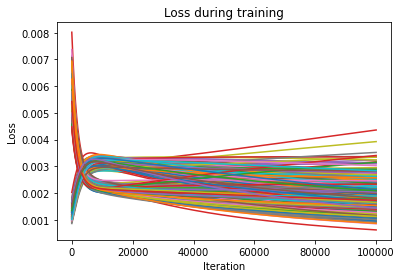

In [35]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly
model = LogitRegression(learning_rate=0.001, iterations=100000)
model.fit(X_train, Y_train)

plt.plot(model.losses)
#px.line(model.losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss during training')
plt.show()

In [39]:
#Updated